In [2]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
#!pip install scalecast
#from scalecast.Forecaster import Forecaster
#!pip install pmdarima
#from pmdarima import auto_arima
#from scalecast.auxmodels import auto_arima


import warnings
warnings.filterwarnings("ignore")


from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error



C:\Users\hp\AppData\Local\Temp\ipykernel_6812\248895396.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
#pip install SomePackage

In [4]:
#pip install SomePackage --upgrade

In [5]:
#conda install SomePackage

In [6]:
#conda update SomePackage

In [7]:
data1 = pd.read_csv('data.csv')    #skiprows=[0]
data1.head()

dataname  22-Jan  22-Feb  22-Mar  \
0                 KPI-HIV-1 # of HIV tests performed  8056.0  6877.0  8491.0   
1     KPI-HIV-2 # of HIV patients currently enrolled     0.0     0.0     0.0   
2      KPI-HIV-3 # of HIV patients lost to follow-up    10.0    13.0    11.0   
3         KPI-HIV-4 # of HIV patients newly enrolled    10.0    11.0    10.0   
4  KPI-MAL-1 # of malnutrition patients currently...     NaN     NaN     NaN   

   21-Jan  21-Feb  21-Mar  21-Apr  21-May  21-Jun  ...   19-Mar   19-Apr  \
0   14787   12518   14356   10238   11807   10610  ...   1388.0   2527.0   
1    9829    9812    9779    9734    9723    9726  ...  10810.0  10730.0   
2      22      19      20      19      13      15  ...     24.0     30.0   
3      25      21      14      23      17      23  ...     35.0     39.0   
4     323     145     161     169     199     164  ...    404.0    369.0   

    19-May  19-Jun   19-Jul   19-Aug   19-Sep   19-Oct   19-Nov   19-Dec  
0   2326.0  2059.0   2059.0   2059.0   2059.0   2059.0   2059.0   2059.0  
1  10283.0  9986.0  10012.0  10023.0  10024.0  10355.0  10355.0  10355.0  
2     31.0    28.0     26.0     28.0     39.0     17.0     17.0     17.0  
3     56.0    39.0     43.0     37.0     40.0     42.0     42.0     42.0  
4    416.0   371.0    135.0    440.0    283.0    592.0    318.0    368.0  

[5 rows x 40 columns]

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataname  26 non-null     object 
 1   22-Jan    22 non-null     float64
 2   22-Feb    22 non-null     float64
 3   22-Mar    22 non-null     float64
 4   21-Jan    26 non-null     int64  
 5   21-Feb    26 non-null     int64  
 6   21-Mar    26 non-null     int64  
 7   21-Apr    26 non-null     int64  
 8   21-May    26 non-null     int64  
 9   21-Jun    26 non-null     int64  
 10  21-Jul    26 non-null     int64  
 11  21-Aug    26 non-null     int64  
 12  21-Sep    26 non-null     int64  
 13  21-Oct    26 non-null     int64  
 14  21-Nov    26 non-null     int64  
 15  21-Dec    26 non-null     int64  
 16  20-Jan    25 non-null     float64
 17  20-Feb    25 non-null     float64
 18  20-Mar    25 non-null     float64
 19  20-Apr    25 non-null     float64
 20  20-May    25 non-null     float64


In [9]:
data1.columns

Index(['dataname', '22-Jan', '22-Feb', '22-Mar', '21-Jan', '21-Feb', '21-Mar',
       '21-Apr', '21-May', '21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct',
       '21-Nov', '21-Dec', '20-Jan', '20-Feb', '20-Mar', '20-Apr', '20-May',
       '20-Jun', '20-Jul', '20-Aug', '20-Sep', '20-Oct', '20-Nov', '20-Dec',
       '19-Jan', '19-Feb', '19-Mar', '19-Apr', '19-May', '19-Jun', '19-Jul',
       '19-Aug', '19-Sep', '19-Oct', '19-Nov', '19-Dec'],
      dtype='object')

In [10]:
data1=data1[['dataname','19-Jan', '19-Feb', '19-Mar', '19-Apr', '19-May', '19-Jun', '19-Jul',
       '19-Aug', '19-Sep', '19-Oct', '19-Nov', '19-Dec','20-Jan', '20-Feb', '20-Mar', '20-Apr', '20-May',
       '20-Jun', '20-Jul', '20-Aug', '20-Sep', '20-Oct', '20-Nov', '20-Dec','21-Jan', '21-Feb', '21-Mar',
       '21-Apr', '21-May', '21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct',
       '21-Nov', '21-Dec', '22-Jan', '22-Feb', '22-Mar']]
data1

dataname   19-Jan   19-Feb  \
0                  KPI-HIV-1 # of HIV tests performed   2700.0   1352.0   
1      KPI-HIV-2 # of HIV patients currently enrolled  10563.0  10765.0   
2       KPI-HIV-3 # of HIV patients lost to follow-up     90.0     19.0   
3          KPI-HIV-4 # of HIV patients newly enrolled     38.0     47.0   
4   KPI-MAL-1 # of malnutrition patients currently...    471.0    531.0   
5   KPI-MAL-2 # of malnutrition patients newly enr...    128.0    163.0   
6        KPI-MAL-3 # of malnutrition patients exiting    138.0    250.0   
7   KPI-MENH-1 # of mental health patients current...    693.0    655.0   
8   KPI-MENH-2 # of newly enrolled patients in men...     52.0    127.0   
9                KPI-MENH-3 # of mental health visits      NaN      NaN   
10                         KPI-MNCH-1 # of ANC visits   2039.0   1741.0   
11          KPI-MNCH-2 # of facility-based deliveries   2087.0   1814.0   
12       KPI-MNCH-3 # of caesarian-section deliveries    323.0    302.0   
13  KPI-MNCH-4 # of children who received all reco...   7682.0   7186.0   
14    KPI-MNCH-5 # of child vaccinations administered   7566.0   7229.0   
15      KPI-MNCH-6 # of Family Planning Consultations   9866.0  10818.0   
16       KPI-MNCH-7 # of women starting new FP method   2176.0   2313.0   
17      KPI-NCD-1 # of NCD patients currently in care   4999.0   5179.0   
18  KPI-NCD-2 # of NCD patients newly enrolled in ...      NaN      NaN   
19                  KPI-NCD-3 # of NCD patient visits      NaN      NaN   
20  KPI-ONC-1 # of women screened for cervical cancer      NaN      NaN   
21  KPI-ONC-2 # of cancer patients currently in tr...   3391.0   3317.0   
22  KPI-ONC-3 # of cancer patients newly enrolled ...    149.0    136.0   
23                  KPI-PCCH-1 # of outpatient visits   4799.0   4489.0   
24               KPI-PCCH-2 # of inpatient admissions   1776.0   1726.0   
25  KPI-SURG-1# of general surgeries performed (ex...    116.0     19.0   

     19-Mar   19-Apr   19-May  19-Jun   19-Jul   19-Aug   19-Sep  ...  21-Jun  \
0    1388.0   2527.0   2326.0  2059.0   2059.0   2059.0   2059.0  ...   10610   
1   10810.0  10730.0  10283.0  9986.0  10012.0  10023.0  10024.0  ...    9726   
2      24.0     30.0     31.0    28.0     26.0     28.0     39.0  ...      15   
3      35.0     39.0     56.0    39.0     43.0     37.0     40.0  ...      23   
4     404.0    369.0    416.0   371.0    135.0    440.0    283.0  ...     164   
5     154.0    109.0    148.0    77.0    150.0     84.0     83.0  ...      73   
6     219.0    106.0    115.0    99.0    147.0     62.0     76.0  ...      50   
7     590.0    608.0    772.0   683.0    683.0    592.0    546.0  ...    6020   
8      36.0     71.0     63.0    78.0    114.0    304.0    463.0  ...     157   
9       NaN      NaN      NaN     NaN      NaN      NaN      NaN  ...    3743   
10   1895.0   2267.0   2139.0  1677.0   1791.0   1585.0   1761.0  ...    2657   
11   2210.0   2235.0   2223.0  2122.0   2249.0   2277.0   2277.0  ...    1770   
12    338.0    347.0    375.0   355.0    401.0    436.0    401.0  ...     502   
13   7468.0   7039.0   8135.0  7385.0   7816.0   7769.0   6950.0  ...    8827   
14   9508.0   6729.0   8269.0  7353.0   7151.0   7091.0   6260.0  ...   33276   
15  10510.0  16445.0  16448.0     NaN  12817.0  12817.0  12817.0  ...  142390   
16   2842.0   2605.0   1967.0  1919.0   1967.0   1803.0   1787.0  ...    2764   
17   5298.0   5888.0   5887.0  6392.0   6392.0   6503.0   8041.0  ...   11296   
18      NaN      NaN      NaN     NaN      NaN      NaN      NaN  ...     198   
19      NaN      NaN      NaN     NaN      NaN      NaN      NaN  ...    6714   
20      NaN      NaN      NaN     NaN      NaN      NaN      NaN  ...     492   
21   3252.0   2644.0   2717.0  2750.0   2750.0   2788.0   2834.0  ...    2776   
22    144.0    146.0    168.0   143.0      NaN    144.0    173.0  ...     121   
23   4820.0   4710.0   4879.0  4329.0   4617.0   3888.0   4387.0  ...  1415

In [11]:
df=data1.T
df.head()

0   \
dataname  KPI-HIV-1 # of HIV tests performed   
19-Jan                                2700.0   
19-Feb                                1352.0   
19-Mar                                1388.0   
19-Apr                                2527.0   

                                                      1   \
dataname  KPI-HIV-2 # of HIV patients currently enrolled   
19-Jan                                           10563.0   
19-Feb                                           10765.0   
19-Mar                                           10810.0   
19-Apr                                           10730.0   

                                                     2   \
dataname  KPI-HIV-3 # of HIV patients lost to follow-up   
19-Jan                                             90.0   
19-Feb                                             19.0   
19-Mar                                             24.0   
19-Apr                                             30.0   

                                                  3   \
dataname  KPI-HIV-4 # of HIV patients newly enrolled   
19-Jan                                          38.0   
19-Feb                                          47.0   
19-Mar                                          35.0   
19-Apr                                          39.0   

                                                         4   \
dataname  KPI-MAL-1 # of malnutrition patients currently...   
19-Jan                                                471.0   
19-Feb                                                531.0   
19-Mar                                                404.0   
19-Apr                                                369.0   

                                                         5   \
dataname  KPI-MAL-2 # of malnutrition patients newly enr...   
19-Jan                                                128.0   
19-Feb                                                163.0   
19-Mar                                                154.0   
19-Apr                                                109.0   

                                                    6   \
dataname  KPI-MAL-3 # of malnutrition patients exiting   
19-Jan                                           138.0   
19-Feb                                           250.0   
19-Mar                                           219.0   
19-Apr                                           106.0   

                                                         7   \
dataname  KPI-MENH-1 # of mental health patients current...   
19-Jan                                                693.0   
19-Feb                                                655.0   
19-Mar                                                590.0   
19-Apr                                                608.0   

                                                         8   \
dataname  KPI-MENH-2 # of newly enrolled patients in men...   
19-Jan                                                 52.0   
19-Feb                                                127.0   
19-Mar                                                 36.0   
19-Apr                                                 71.0   

                                            9   ...  \
dataname  KPI-MENH-3 # of mental health visits  ...   
19-Jan                                     NaN  ...   
19-Feb                                     NaN  ...   
19-Mar                                     NaN  ...   
19-Apr                                     NaN  ...   

                                                    16  \
dataname  KPI-MNCH-7 # of women starting new FP method   
19-Jan                                          2176.0   
19-Feb                                          2313.0   
19-Mar                                          2842.0   
19-Apr                                          2605.0   

                                                     17  \
dataname  KPI-NCD-1 # of NCD patients currently in care   
19-Jan                               

In [12]:
df, df.columns = df[1:] , df.iloc[0]

In [13]:
df.head()

dataname KPI-HIV-1 # of HIV tests performed  \
19-Jan                               2700.0   
19-Feb                               1352.0   
19-Mar                               1388.0   
19-Apr                               2527.0   
19-May                               2326.0   

dataname KPI-HIV-2 # of HIV patients currently enrolled  \
19-Jan                                          10563.0   
19-Feb                                          10765.0   
19-Mar                                          10810.0   
19-Apr                                          10730.0   
19-May                                          10283.0   

dataname KPI-HIV-3 # of HIV patients lost to follow-up  \
19-Jan                                            90.0   
19-Feb                                            19.0   
19-Mar                                            24.0   
19-Apr                                            30.0   
19-May                                            31.0   

dataname KPI-HIV-4 # of HIV patients newly enrolled  \
19-Jan                                         38.0   
19-Feb                                         47.0   
19-Mar                                         35.0   
19-Apr                                         39.0   
19-May                                         56.0   

dataname KPI-MAL-1 # of malnutrition patients currently enrolled  \
19-Jan                                                471.0        
19-Feb                                                531.0        
19-Mar                                                404.0        
19-Apr                                                369.0        
19-May                                                416.0        

dataname KPI-MAL-2 # of malnutrition patients newly enrolled  \
19-Jan                                                128.0    
19-Feb                                                163.0    
19-Mar                                                154.0    
19-Apr                                                109.0    
19-May                                                148.0    

dataname KPI-MAL-3 # of malnutrition patients exiting  \
19-Jan                                          138.0   
19-Feb                                          250.0   
19-Mar                                          219.0   
19-Apr                                          106.0   
19-May                                          115.0   

dataname KPI-MENH-1 # of mental health patients currently in care  \
19-Jan                                                693.0         
19-Feb                                                655.0         
19-Mar                                                590.0         
19-Apr                                                608.0         
19-May                                                772.0         

dataname KPI-MENH-2 # of newly enrolled patients in mental health care  \
19-Jan                                                 52.0              
19-Feb                                                127.0              
19-Mar                                                 36.0              
19-Apr                                                 71.0              
19-May                                                 63.0              

dataname KPI-MENH-3 # of mental health visits  ...  \
19-Jan                                    NaN  ...   
19-Feb                                    NaN  ...   
19-Mar                                    NaN  ...   
19-Apr                                    NaN  ...   
19-May                                    NaN  ...   

dataname KPI-MNCH-7 # of women starting new FP method  \
19-Jan                                         2176.0   
19-Feb                                         2313.0   
19-Mar                                         2842.0   
19-Apr                                         2605.0   
19-May                                         1967.0   

dataname KPI-NCD-

In [14]:
# fixing the names of columns as there are spaces  in columns names
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns = [col.replace("-", "") for col in df.columns]

In [15]:
df.head()

KPIHIV1_#_of_HIV_tests_performed  \
19-Jan                           2700.0   
19-Feb                           1352.0   
19-Mar                           1388.0   
19-Apr                           2527.0   
19-May                           2326.0   

       KPIHIV2_#_of_HIV_patients_currently_enrolled  \
19-Jan                                      10563.0   
19-Feb                                      10765.0   
19-Mar                                      10810.0   
19-Apr                                      10730.0   
19-May                                      10283.0   

       KPIHIV3_#_of_HIV_patients_lost_to_followup  \
19-Jan                                       90.0   
19-Feb                                       19.0   
19-Mar                                       24.0   
19-Apr                                       30.0   
19-May                                       31.0   

       KPIHIV4_#_of_HIV_patients_newly_enrolled  \
19-Jan                                     38.0   
19-Feb                                     47.0   
19-Mar                                     35.0   
19-Apr                                     39.0   
19-May                                     56.0   

       KPIMAL1_#_of_malnutrition_patients_currently_enrolled  \
19-Jan                                              471.0      
19-Feb                                              531.0      
19-Mar                                              404.0      
19-Apr                                              369.0      
19-May                                              416.0      

       KPIMAL2_#_of_malnutrition_patients_newly_enrolled  \
19-Jan                                             128.0   
19-Feb                                             163.0   
19-Mar                                             154.0   
19-Apr                                             109.0   
19-May                                             148.0   

       KPIMAL3_#_of_malnutrition_patients_exiting  \
19-Jan                                      138.0   
19-Feb                                      250.0   
19-Mar                                      219.0   
19-Apr                                      106.0   
19-May                                      115.0   

       KPIMENH1_#_of_mental_health_patients_currently_in_care  \
19-Jan                                              693.0       
19-Feb                                              655.0       
19-Mar                                              590.0       
19-Apr                                              608.0       
19-May                                              772.0       

       KPIMENH2_#_of_newly_enrolled_patients_in_mental_health_care  \
19-Jan                                               52.0            
19-Feb                                              127.0            
19-Mar                                               36.0            
19-Apr                                               71.0            
19-May                                               63.0            

       KPIMENH3_#_of_mental_health_visits  ...  \
19-Jan                                NaN  ...   
19-Feb                                NaN  ...   
19-Mar                                NaN  ...   
19-Apr                                NaN  ...   
19-May                                NaN  ...   

       KPIMNCH7_#_of_women_starting_new_FP_method  \
19-Jan                                     2176.0   
19-Feb                                     2313.0   
19-Mar                                     2842.0   
19-Apr                                     2605.0   
19-May                                     1967.0   

       KPINCD1_#_of_NCD_patients_currently_in_care  \
19-Jan                                      4999.0   
19-Feb                                      5179.0   
19-Mar                                      5298.0   
19-Apr                                      5888.0   
19-May                  

In [16]:
df.columns

Index(['KPIHIV1_#_of_HIV_tests_performed',
       'KPIHIV2_#_of_HIV_patients_currently_enrolled',
       'KPIHIV3_#_of_HIV_patients_lost_to_followup',
       'KPIHIV4_#_of_HIV_patients_newly_enrolled',
       'KPIMAL1_#_of_malnutrition_patients_currently_enrolled',
       'KPIMAL2_#_of_malnutrition_patients_newly_enrolled',
       'KPIMAL3_#_of_malnutrition_patients_exiting',
       'KPIMENH1_#_of_mental_health_patients_currently_in_care',
       'KPIMENH2_#_of_newly_enrolled_patients_in_mental_health_care',
       'KPIMENH3_#_of_mental_health_visits', 'KPIMNCH1_#_of_ANC_visits',
       'KPIMNCH2_#_of_facilitybased_deliveries',
       'KPIMNCH3_#_of_caesariansection_deliveries',
       'KPIMNCH4_#_of_children_who_received_all_recommended_immunizations_by_1_year_of_age',
       'KPIMNCH5_#_of_child_vaccinations_administered',
       'KPIMNCH6_#_of_Family_Planning_Consultations',
       'KPIMNCH7_#_of_women_starting_new_FP_method',
       'KPINCD1_#_of_NCD_patients_currently_in_care',
  

In [17]:
df.rename(columns={
    'KPIHIV1_#_of_HIV_tests_performed': 'HIV_tests_performed',
    'KPIHIV2_#_of_HIV_patients_currently_enrolled': 'HIV_patients_currently_enrolled',
    'KPIHIV3_#_of_HIV_patients_lost_to_followup': 'HIV_patients_lost_to_followup',
    'KPIHIV4_#_of_HIV_patients_newly_enrolled': 'HIV_patients_newly_enrolled',
    'KPIMAL1_#_of_malnutrition_patients_currently_enrolled': 'malnutrition_patients_currently_enrolled',
    'KPIMAL2_#_of_malnutrition_patients_newly_enrolled': 'malnutrition_patients_newly_enrolled' ,
    'KPIMAL3_#_of_malnutrition_patients_exiting': 'malnutrition_patients_exiting' ,
    'KPIMENH1_#_of_mental_health_patients_currently_in_care': 'mental_health_patients_currently_in_care' ,
    'KPIMENH2_#_of_newly_enrolled_patients_in_mental_health_care': 'newly_enrolled_patients_in_mental_health_care' ,
    'KPIMENH3_#_of_mental_health_visits': 'mental_health_visits',
    'KPIMNCH1_#_of_ANC_visits': 'ANC_visits',
    'KPIMNCH2_#_of_facilitybased_deliveries': 'facilitybased_deliveries' ,
    'KPIMNCH3_#_of_caesariansection_deliveries': 'caesariansection_deliveries' ,
    'KPIMNCH4_#_of_children_who_received_all_recommended_immunizations_by_1_year_of_age': 'children_who_received_all_recommended_immunizations_by_1_year_of_age',
    'KPIMNCH5_#_of_child_vaccinations_administered': 'child_vaccinations_administered' ,
    'KPIMNCH6_#_of_Family_Planning_Consultations': 'Family_Planning_Consultations'  ,
    'KPIMNCH7_#_of_women_starting_new_FP_method': 'women_starting_new_FP_method'  ,
    'KPINCD1_#_of_NCD_patients_currently_in_care': 'NCD_patients_currently_in_care' ,
    'KPINCD2_#_of_NCD_patients_newly_enrolled_in_care': 'NCD_patients_newly_enrolled_in_care' ,
    'KPINCD3_#_of_NCD_patient_visits': 'NCD_patient_visits',
    'KPIONC1_#_of_women_screened_for_cervical_cancer': 'women_screened_for_cervical_cancer',
    'KPIONC2_#_of_cancer_patients_currently_in_treatment': 'cancer_patients_currently_in_treatment',
    'KPIONC3_#_of_cancer_patients_newly_enrolled_in_treatment': 'cancer_patients_newly_enrolled_in_treatment',
    'KPIPCCH1_#_of_outpatient_visits': 'outpatient_visits',
    'KPIPCCH2_#_of_inpatient_admissions': 'inpatient_admissions',
    'KPISURG1#_of_general_surgeries_performed_(excluding_Csections)': 'general_surgeries_performed_(excluding_Csections)',
    }, inplace=True)

In [18]:
df.shape

(39, 26)

In [19]:
Time_Stamp = pd.date_range(start='2019-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
df['Time_Stamp'] = Time_Stamp
df.head()

HIV_tests_performed HIV_patients_currently_enrolled  \
19-Jan              2700.0                         10563.0   
19-Feb              1352.0                         10765.0   
19-Mar              1388.0                         10810.0   
19-Apr              2527.0                         10730.0   
19-May              2326.0                         10283.0   

       HIV_patients_lost_to_followup HIV_patients_newly_enrolled  \
19-Jan                          90.0                        38.0   
19-Feb                          19.0                        47.0   
19-Mar                          24.0                        35.0   
19-Apr                          30.0                        39.0   
19-May                          31.0                        56.0   

       malnutrition_patients_currently_enrolled  \
19-Jan                                    471.0   
19-Feb                                    531.0   
19-Mar                                    404.0   
19-Apr                                    369.0   
19-May                                    416.0   

       malnutrition_patients_newly_enrolled malnutrition_patients_exiting  \
19-Jan                                128.0                         138.0   
19-Feb                                163.0                         250.0   
19-Mar                                154.0                         219.0   
19-Apr                                109.0                         106.0   
19-May                                148.0                         115.0   

       mental_health_patients_currently_in_care  \
19-Jan                                    693.0   
19-Feb                                    655.0   
19-Mar                                    590.0   
19-Apr                                    608.0   
19-May                                    772.0   

       newly_enrolled_patients_in_mental_health_care mental_health_visits  \
19-Jan                                          52.0                  NaN   
19-Feb                                         127.0                  NaN   
19-Mar                                          36.0                  NaN   
19-Apr                                          71.0                  NaN   
19-May                                          63.0                  NaN   

        ... NCD_patients_currently_in_care  \
19-Jan  ...                         4999.0   
19-Feb  ...                         5179.0   
19-Mar  ...                         5298.0   
19-Apr  ...                         5888.0   
19-May  ...                         5887.0   

       NCD_patients_newly_enrolled_in_care NCD_patient_visits  \
19-Jan                                 NaN                NaN   
19-Feb                                 NaN                NaN   
19-Mar                                 NaN                NaN   
19-Apr                                 NaN                NaN   
19-May                                 NaN                NaN   

       women_screened_for_cervical_cancer  \
19-Jan                                NaN   
19-Feb                                NaN   
19-Mar                                NaN   
19-Apr                                NaN   
19-May                                NaN   

       cancer_patients_currently_in_treatment  \
19-Jan                                 3391.0   
19-Feb                                 3317.0   
19-Mar                                 3252.0   
19-Apr                                 2644.0   
19-May                                 2717.0   

       cancer_patients_newly_enrolled_in_treatment outpatient_visits  \
19-Jan                                       149.0            4799.0   
19-Feb                                       136.0            4489.0   
19-Mar                                       144.0            4820.0   
19-Apr                                       146.0            4710.0   
19-May                                       168.0            4879.0   

       inpatient_a

In [21]:
df.columns

Index(['HIV_tests_performed', 'HIV_patients_currently_enrolled',
       'HIV_patients_lost_to_followup', 'HIV_patients_newly_enrolled',
       'malnutrition_patients_currently_enrolled',
       'malnutrition_patients_newly_enrolled', 'malnutrition_patients_exiting',
       'mental_health_patients_currently_in_care',
       'newly_enrolled_patients_in_mental_health_care', 'mental_health_visits',
       'ANC_visits', 'facilitybased_deliveries', 'caesariansection_deliveries',
       'children_who_received_all_recommended_immunizations_by_1_year_of_age',
       'child_vaccinations_administered', 'Family_Planning_Consultations',
       'women_starting_new_FP_method', 'NCD_patients_currently_in_care',
       'NCD_patients_newly_enrolled_in_care', 'NCD_patient_visits',
       'women_screened_for_cervical_cancer',
       'cancer_patients_currently_in_treatment',
       'cancer_patients_newly_enrolled_in_treatment', 'outpatient_visits',
       'inpatient_admissions',
       'general_surgeries_p

In [22]:
df.set_index(keys='Time_Stamp',inplace=True)
df

HIV_tests_performed HIV_patients_currently_enrolled  \
Time_Stamp                                                       
2019-01-31              2700.0                         10563.0   
2019-02-28              1352.0                         10765.0   
2019-03-31              1388.0                         10810.0   
2019-04-30              2527.0                         10730.0   
2019-05-31              2326.0                         10283.0   
2019-06-30              2059.0                          9986.0   
2019-07-31              2059.0                         10012.0   
2019-08-31              2059.0                         10023.0   
2019-09-30              2059.0                         10024.0   
2019-10-31              2059.0                         10355.0   
2019-11-30              2059.0                         10355.0   
2019-12-31              2059.0                         10355.0   
2020-01-31             12753.0                          9495.0   
2020-02-29             13153.0                          9496.0   
2020-03-31             14887.0                          9477.0   
2020-04-30             13472.0                          9518.0   
2020-05-31             13447.0                          9521.0   
2020-06-30             14962.0                          9517.0   
2020-07-31             21067.0                          9393.0   
2020-08-31             19774.0                          9720.0   
2020-09-30             18510.0                          9672.0   
2020-10-31             15972.0                          9736.0   
2020-11-30               15880                            9614   
2020-12-31               15485                            9616   
2021-01-31               14787                            9829   
2021-02-28               12518                            9812   
2021-03-31               14356                            9779   
2021-04-30               10238                            9734   
2021-05-31               11807                            9723   
2021-06-30               10610                            9726   
2021-07-31               10706                            9735   
2021-08-31               12214                            9732   
2021-09-30                9117                            9720   
2021-10-31               11719                            9893   
2021-11-30               11858                            9903   
2021-12-31               11861                            9915   
2022-01-31              8056.0                             0.0   
2022-02-28              6877.0                             0.0   
2022-03-31              8491.0                             0.0   

           HIV_patients_lost_to_followup HIV_patients_newly_enrolled  \
Time_Stamp                                                             
2019-01-31                          90.0                        38.0   
2019-02-28                          19.0                        47.0   
2019-03-31                          24.0                        35.0   
2019-04-30                          30.0                        39.0   
2019-05-31                          31.0                        56.0   
2019-06-30                          28.0                        39.0   
2019-07-31                          26.0                        43.0   
2019-08-31                          28.0                        37.0   
2019-09-30                          39.0                        40.0   
2019-10-31                          17.0                        42.0   
2019-11-30                          17.0                        42.0   
2019-12-31                          17.0                        42.0   
2020-01-31                          37.0                        41.0   
2020-02-29                          17.0                        35.0   
2020-03-31                          21.0                        27.0   
2020-04-30                          29.0                        24.0   
2020-05-

In [23]:
df.tail()

HIV_tests_performed HIV_patients_currently_enrolled  \
Time_Stamp                                                       
2021-11-30               11858                            9903   
2021-12-31               11861                            9915   
2022-01-31              8056.0                             0.0   
2022-02-28              6877.0                             0.0   
2022-03-31              8491.0                             0.0   

           HIV_patients_lost_to_followup HIV_patients_newly_enrolled  \
Time_Stamp                                                             
2021-11-30                             6                          19   
2021-12-31                            13                          15   
2022-01-31                          10.0                        10.0   
2022-02-28                          13.0                        11.0   
2022-03-31                          11.0                        10.0   

           malnutrition_patients_currently_enrolled  \
Time_Stamp                                            
2021-11-30                                      503   
2021-12-31                                      485   
2022-01-31                                      NaN   
2022-02-28                                      NaN   
2022-03-31                                      NaN   

           malnutrition_patients_newly_enrolled malnutrition_patients_exiting  \
Time_Stamp                                                                      
2021-11-30                                  164                           110   
2021-12-31                                  144                            51   
2022-01-31                                  NaN                          96.0   
2022-02-28                                  NaN                         143.0   
2022-03-31                                  NaN                         132.0   

           mental_health_patients_currently_in_care  \
Time_Stamp                                            
2021-11-30                                     7479   
2021-12-31                                     7528   
2022-01-31                                   7258.0   
2022-02-28                                   7334.0   
2022-03-31                                   7369.0   

           newly_enrolled_patients_in_mental_health_care mental_health_visits  \
Time_Stamp                                                                      
2021-11-30                                           168                 4200   
2021-12-31                                           119                 3900   
2022-01-31                                           NaN               3950.0   
2022-02-28                                           NaN               3380.0   
2022-03-31                                           NaN               3066.0   

            ... women_starting_new_FP_method NCD_patients_currently_in_care  \
Time_Stamp  ...                                                               
2021-11-30  ...                         1825                          13789   
2021-12-31  ...                         2041                          13888   
2022-01-31  ...                       1848.0                        13538.0   
2022-02-28  ...                       1590.0                        13521.0   
2022-03-31  ...                       1951.0                        13470.0   

           NCD_patients_newly_enrolled_in_care NCD_patient_visits  \
Time_Stamp                                                          
2021-11-30                                 232               7817   
2021-12-31                                 137               6822   
2022-01-31                               132.0             7351.0   
2022-02-28                               118.0             7184.0   
2022-03-31                               102.0             7127.0   

           women_screened_for_cervical_cancer  \
Time_Stamp                                      

In [24]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  39 
The number of columns:  26


In [25]:
df.columns

Index(['HIV_tests_performed', 'HIV_patients_currently_enrolled',
       'HIV_patients_lost_to_followup', 'HIV_patients_newly_enrolled',
       'malnutrition_patients_currently_enrolled',
       'malnutrition_patients_newly_enrolled', 'malnutrition_patients_exiting',
       'mental_health_patients_currently_in_care',
       'newly_enrolled_patients_in_mental_health_care', 'mental_health_visits',
       'ANC_visits', 'facilitybased_deliveries', 'caesariansection_deliveries',
       'children_who_received_all_recommended_immunizations_by_1_year_of_age',
       'child_vaccinations_administered', 'Family_Planning_Consultations',
       'women_starting_new_FP_method', 'NCD_patients_currently_in_care',
       'NCD_patients_newly_enrolled_in_care', 'NCD_patient_visits',
       'women_screened_for_cervical_cancer',
       'cancer_patients_currently_in_treatment',
       'cancer_patients_newly_enrolled_in_treatment', 'outpatient_visits',
       'inpatient_admissions',
       'general_surgeries_p

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2019-01-31 to 2022-03-31
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   HIV_tests_performed                                                   39 non-null     object
 1   HIV_patients_currently_enrolled                                       39 non-null     object
 2   HIV_patients_lost_to_followup                                         39 non-null     object
 3   HIV_patients_newly_enrolled                                           39 non-null     object
 4   malnutrition_patients_currently_enrolled                              36 non-null     object
 5   malnutrition_patients_newly_enrolled                                  36 non-null     object
 6   malnutrition_patients_exiting                                         39 non-null     ob

In [27]:
df = df.astype(float)

# HIV_tests_performed

In [1097]:
HIV_tests_performed=df[['HIV_tests_performed']]
HIV_tests_performed

HIV_tests_performed
Time_Stamp                     
2019-01-31               2700.0
2019-02-28               1352.0
2019-03-31               1388.0
2019-04-30               2527.0
2019-05-31               2326.0
2019-06-30               2059.0
2019-07-31               2059.0
2019-08-31               2059.0
2019-09-30               2059.0
2019-10-31               2059.0
2019-11-30               2059.0
2019-12-31               2059.0
2020-01-31              12753.0
2020-02-29              13153.0
2020-03-31              14887.0
2020-04-30              13472.0
2020-05-31              13447.0
2020-06-30              14962.0
2020-07-31              21067.0
2020-08-31              19774.0
2020-09-30              18510.0
2020-10-31              15972.0
2020-11-30              15880.0
2020-12-31              15485.0
2021-01-31              14787.0
2021-02-28              12518.0
2021-03-31              14356.0
2021-04-30              10238.0
2021-05-31              11807.0
2021-06-30              10610.0
2021-07-31              10706.0
2021-08-31              12214.0
2021-09-30               9117.0
2021-10-31              11719.0
2021-11-30              11858.0
2021-12-31              11861.0
2022-01-31               8056.0
2022-02-28               6877.0
2022-03-31               8491.0

In [1098]:
HIV_tests_performed.isnull().sum()

HIV_tests_performed    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data.

In [1099]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8



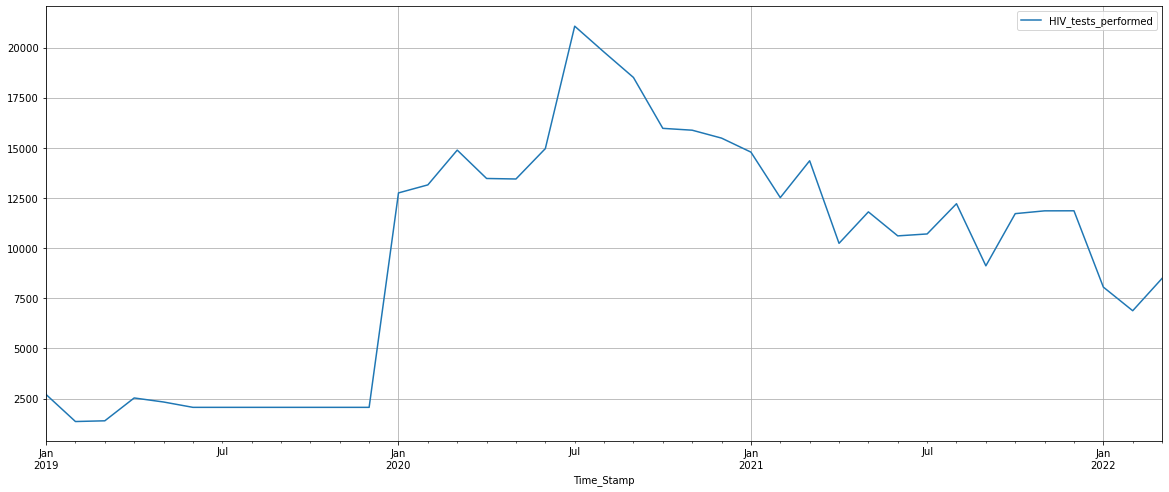

In [1100]:
HIV_tests_performed.plot(grid=True);

## Check the basic measures of descriptive statistics

In [1101]:
HIV_tests_performed.describe()

HIV_tests_performed
count            39.000000
mean           9725.205128
std            5893.688141
min            1352.000000
25%            2426.500000
50%           11719.000000
75%           13914.000000
max           21067.000000

## Decompose the Time Series and plot the different components.

In [1102]:

from    statsmodels.tsa.seasonal import   seasonal_decompose


### Additive Decomposition

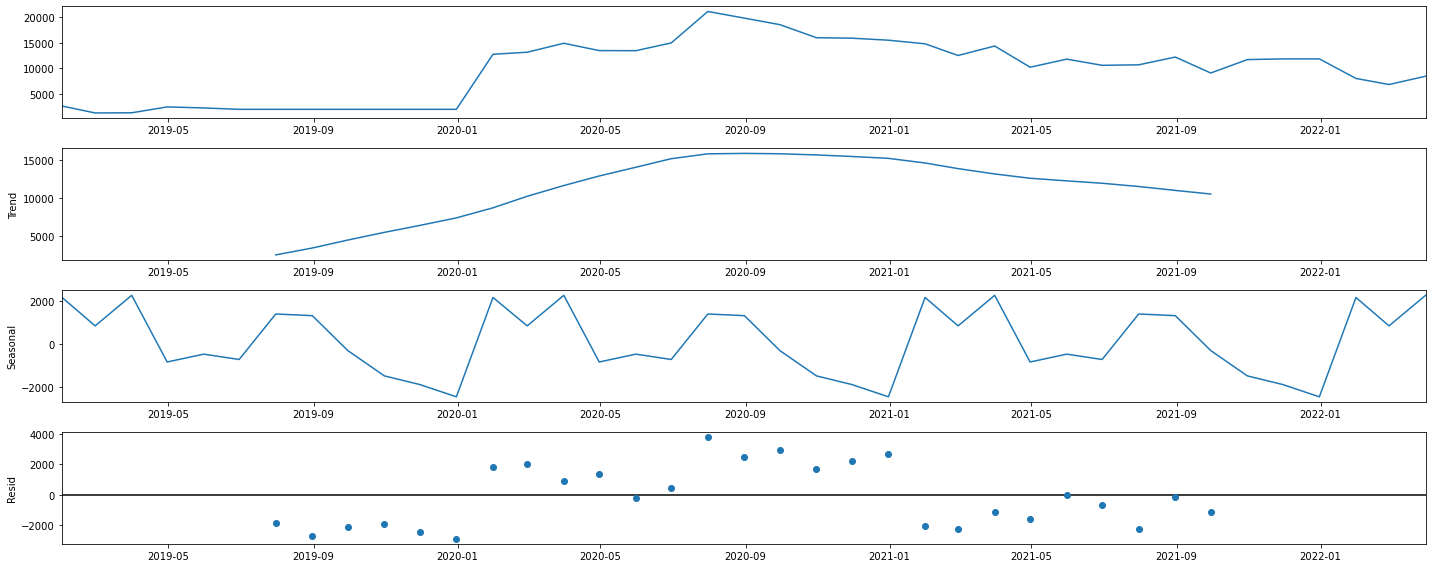

In [1103]:
decomposition = seasonal_decompose(HIV_tests_performed,model='additive')
decomposition.plot();

### Multiplicative Decomposition

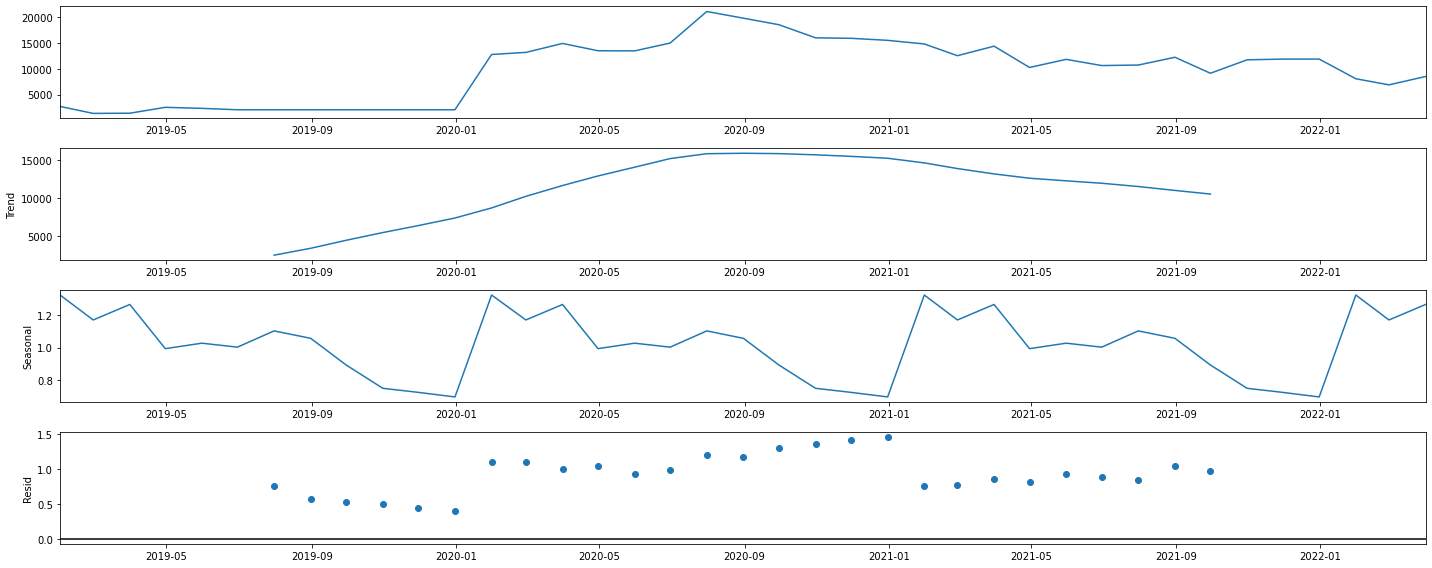

In [1104]:
decomposition = seasonal_decompose(HIV_tests_performed,model='multiplicative')
decomposition.plot();



## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1105]:
from statsmodels.tsa.stattools import adfuller

In [1106]:
HIV_tests_performedtest = adfuller(HIV_tests_performed,regression='ct')
print('DF test statistic is %3.3f' %HIV_tests_performedtest[0])
print('DF test p-value is' ,HIV_tests_performedtest[1])
print('Number of lags used' ,HIV_tests_performedtest[2])

DF test statistic is -1.257
DF test p-value is 0.8980824616420378
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [1107]:
HIV_tests_performedtest = adfuller(HIV_tests_performed.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %HIV_tests_performedtest[0])
print('DF test p-value is' ,HIV_tests_performedtest[1])
print('Number of lags used' ,HIV_tests_performedtest[2])

DF test statistic is -6.615
DF test p-value is 1.0295773998937161e-07
Number of lags used 0


Now we can plot the stationary series.

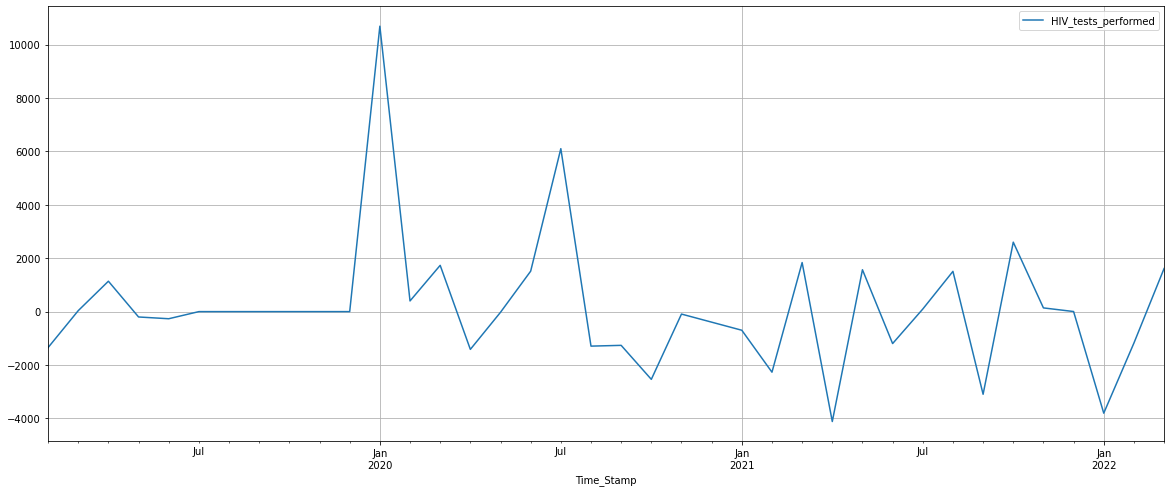

In [1108]:
HIV_tests_performed.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1109]:
train_size = int(len(HIV_tests_performed) * 0.8)
train=HIV_tests_performed[0:train_size] 
test=HIV_tests_performed[train_size:]

In [1110]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

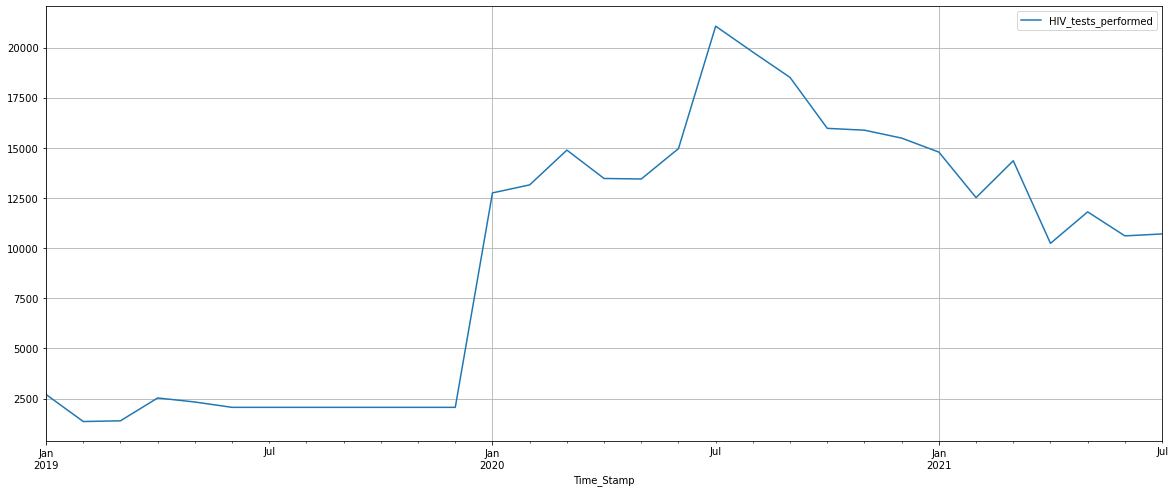

In [1111]:
train.plot(grid=True);

In [1112]:
from statsmodels.tsa.stattools import adfuller

In [1113]:
HIV_tests_performedtest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %HIV_tests_performedtest[0])
print('DF test p-value is' ,HIV_tests_performedtest[1])
print('Number of lags used' ,HIV_tests_performedtest[2])

DF test statistic is -1.165
DF test p-value is 0.9174468465877232
Number of lags used 0


Observation:

* The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [1114]:
HIV_tests_performedtest = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %HIV_tests_performedtest[0])
print('DF test p-value is' ,HIV_tests_performedtest[1])
print('Number of lags used' ,HIV_tests_performedtest[2])

DF test statistic is -3.392
DF test p-value is 0.05241049214971236
Number of lags used 2


We can now plot the differenced training data.

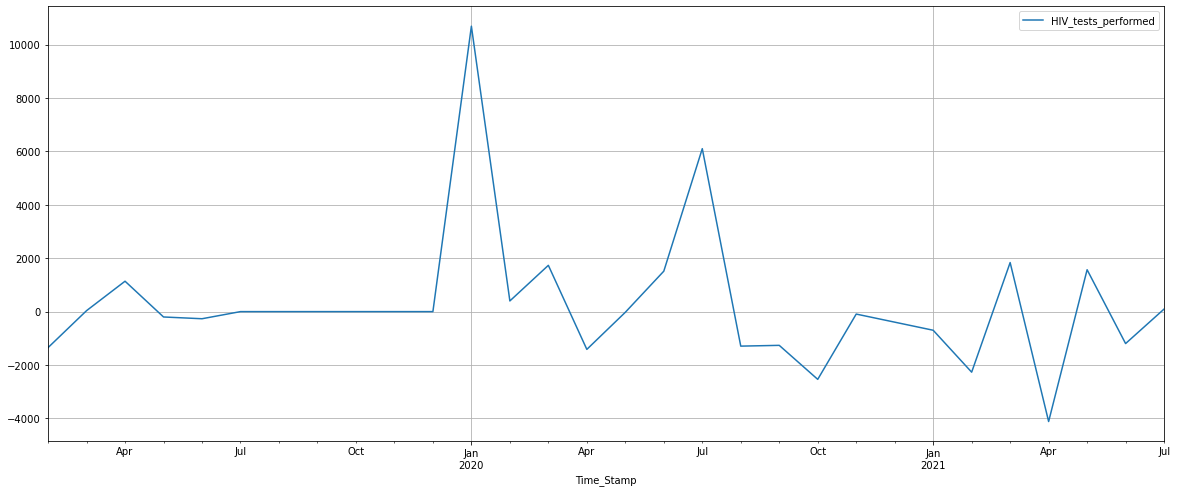

In [1115]:
train.diff().dropna().plot(grid=True);

In [1116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-01-31 to 2021-07-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HIV_tests_performed  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = HIV_tests_performed.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)


In [1117]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)


In [1118]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [405]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['HIV_tests_performed'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:540.9854813035159
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:314.3312389832366
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:94.90573301816009
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:330.8121160718051
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:95.16581841803693
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 1, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:331.5802930166175
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:316.19076188522797
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:96.77722515007893
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:113.95934774291312
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:97.16576390288019
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 1, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:115.139597634138

SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:16.0
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:18.0
SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:20.0
SARIMA(0, 1, 3)x(3, 1, 4, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 0, 0, 12) - AIC:16.0
SARIMA(0, 1, 3)x(4, 0, 1, 12) - AIC:18.0
SARIMA(0, 1, 3)x(4, 0, 2, 12) - AIC:20.0
SARIMA(0, 1, 3)x(4, 0, 3, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 0, 4, 12) - AIC:24.0
SARIMA(0, 1, 3)x(4, 1, 0, 12) - AIC:16.0
SARIMA(0, 1, 3)x(4, 1, 1, 12) - AIC:18.0
SARIMA(0, 1, 3)x(4, 1, 2, 12) - AIC:20.0
SARIMA(0, 1, 3)x(4, 1, 3, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 1, 4, 12) - AIC:24.0
SARIMA(0, 1, 4)x(0, 0, 0, 12) - AIC:475.69695856255913
SARIMA(0, 1, 4)x(0, 0, 1, 12) - AIC:248.9028717058371
SARIMA(0, 1, 4)x(0, 0, 2, 12) - AIC:11.744536277888846
SARIMA(0, 1, 4)x(0, 0, 3, 12) - AIC:16.0
SARIMA(0, 1, 4)x(0, 0, 4, 12) - AIC:18.0
SARIMA(0, 1, 4)x(0, 1, 0, 12) - AIC:263.42036622363173
SARIMA(0, 1, 4)x(0, 1, 1, 12) - AIC:30.754267977460547
SARIMA(0, 1, 4)x(0, 1, 2, 12) - AIC:14.0
SARIMA(0, 1, 4)x(0, 1, 3, 12)

SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:88.36703997825254
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:40.02119421881018
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:12.0
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:14.0
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:16.0
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 1, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 1, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) -

SARIMA(2, 1, 1)x(0, 1, 4, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:300.9187893134553
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:298.7056829085569
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:79.50042119632731
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 0, 4, 12) - AIC:18.0
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:81.78479684947374
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:80.92012524767898
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:14.0
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 1, 4, 12) - AIC:18.0
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:14.250237745147558
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:41.322421267873466
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:21.371015938144613
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 1)x(2, 0, 4, 12) - AIC:20.0
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:12.0
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:14.0
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:16.0
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:18.0
SARIMA(2, 1, 1)x(2, 1, 4, 12) - AIC:20.0
SARIMA(2, 1, 1)x(3, 0, 0, 12) - 

SARIMA(2, 1, 4)x(4, 1, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 1, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 1, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 1, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 1, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:509.9912355095955
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:318.818857941751
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:86.72844642521379
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:298.0144338668928
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:93.23366859764852
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 1, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:280.3063797233438
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:281.17433903062863
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:83.84281086181791
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 4, 12) - AIC:18.0
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:62.294123814188396
SARIMA(3, 1, 0)x(1, 1

SARIMA(3, 1, 3)x(2, 1, 4, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:20.0
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:22.0
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 0, 4, 12) - AIC:28.0
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:20.0
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:22.0
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 1, 4, 12) - AIC:28.0
SARIMA(3, 1, 3)x(4, 0, 0, 12) - AIC:22.0
SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:24.0
SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:26.0
SARIMA(3, 1, 3)x(4, 0, 3, 12) - AIC:28.0
SARIMA(3, 1, 3)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 3)x(4, 1, 0, 12) - AIC:22.0
SARIMA(3, 1, 3)x(4, 1, 1, 12) - AIC:24.0
SARIMA(3, 1, 3)x(4, 1, 2, 12) - AIC:26.0
SARIMA(3, 1, 3)x(4, 1, 3, 12) - AIC:28.0
SARIMA(3, 1, 3)x(4, 1, 4, 12) - AIC:30.0
SARIMA(3, 1, 4)x(0, 0, 0, 12) - AIC:476.9164541977453
SARIMA(3, 1, 4)x(0, 0, 1, 12) - AIC:241.56409690869998
SARIMA(3, 1, 4)x(0, 0, 2, 12) 

SARIMA(4, 1, 2)x(1, 1, 0, 12) - AIC:52.6197865169741
SARIMA(4, 1, 2)x(1, 1, 1, 12) - AIC:54.62738395660174
SARIMA(4, 1, 2)x(1, 1, 2, 12) - AIC:20.0
SARIMA(4, 1, 2)x(1, 1, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 1, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:53.253927383478114
SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:55.26687675891747
SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:57.266936873554954
SARIMA(4, 1, 2)x(2, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 2)x(2, 1, 0, 12) - AIC:18.0
SARIMA(4, 1, 2)x(2, 1, 1, 12) - AIC:20.0
SARIMA(4, 1, 2)x(2, 1, 2, 12) - AIC:22.0
SARIMA(4, 1, 2)x(2, 1, 3, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 1, 4, 12) - AIC:26.0
SARIMA(4, 1, 2)x(3, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 2)x(3, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 2)x(3, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 2)x(3, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 2)x(3, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(3, 1, 0, 12) - AIC:20.0
SARIMA(4, 1, 2)x(3, 1, 1, 12) - AIC:22.0
SARIMA(4, 1, 2)x(3, 1, 2, 12) - 

In [406]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal       AIC
521  (2, 1, 0)  (2, 0, 1, 12) -4.844645
602  (2, 1, 2)  (0, 0, 2, 12) -2.751945
352  (1, 1, 2)  (0, 0, 2, 12) -1.845982
112  (0, 1, 2)  (1, 0, 2, 12) -0.804108
116  (0, 1, 2)  (1, 1, 1, 12)  0.755482

In [1129]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['HIV_tests_performed'],
                                order=(2, 1, 0),
                                seasonal_order=(2, 0, 1, 9),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())


                                      SARIMAX Results                                      
Dep. Variable:                 HIV_tests_performed   No. Observations:                   31
Model:             SARIMAX(2, 1, 0)x(2, 0, [1], 9)   Log Likelihood                 -83.927
Date:                             Tue, 18 Oct 2022   AIC                            179.855
Time:                                     10:24:27   BIC                            181.670
Sample:                                 01-31-2019   HQIC                           177.863
                                      - 07-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6081      0.453     -1.344      0.179      -1.495       0.279
ar.L2          0.0376      

## Predict on the Test Set using this model and evaluate the model.

In [1130]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))


In [1131]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

HIV_tests_performed          mean      mean_se  mean_ci_lower  mean_ci_upper
2021-08-31           10151.088538   995.145903    8200.638408   12101.538668
2021-09-30           10330.618660  1068.853905    8235.703501   12425.533819
2021-10-31           10224.611798  1332.316081    7613.320263   12835.903334
2021-11-30           10403.704275  1432.453611    7596.146788   13211.261762
2021-12-31           10166.535195  1596.583061    7037.289896   13295.780493

In [1132]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [1133]:
rmse = mean_squared_error(test['HIV_tests_performed'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['HIV_tests_performed'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1900.851412582817 
MAPE: 19.759657968052075


## Building the most optimum model on the Full Data.

In [1134]:
full_data_model = sm.tsa.statespace.SARIMAX(HIV_tests_performed['HIV_tests_performed'],
                                order=(2, 1, 0),
                                seasonal_order=(2, 0, 1, 9),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 HIV_tests_performed   No. Observations:                   39
Model:             SARIMAX(2, 1, 0)x(2, 0, [1], 9)   Log Likelihood                -157.454
Date:                             Tue, 18 Oct 2022   AIC                            326.909
Time:                                     10:24:45   BIC                            332.251
Sample:                                 01-31-2019   HQIC                           327.645
                                      - 03-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4765      0.240     -1.985      0.047      -0.947      -0.006
ar.L2         -0.0713      

In [1135]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1136]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

HIV_tests_performed          mean      mean_se  mean_ci_lower  mean_ci_upper
2022-04-30           10311.820630  1455.075017    7459.926001   13163.715258
2022-05-31           10452.165337  1642.381516    7233.156717   13671.173956
2022-06-30           11030.150485  1916.804133    7273.283419   14787.017550
2022-07-31           10881.672133  2130.406546    6706.152030   15057.192236
2022-08-31           11582.488940  2329.173011    7017.393724   16147.584156
2022-09-30           11229.420925  2511.735082    6306.510625   16152.331226
2022-10-31           13679.433167  2681.846505    8423.110604   18935.755729
2022-11-30           13023.924075  2842.260320    7453.196214   18594.651937
2022-12-31           13044.971816  2986.214267    7192.099402   18897.844231
2023-01-31           11413.799856  3114.836567    5308.832368   17518.767345
2023-02-28           10792.574608  3243.380986    4435.664687   17149.484529
2023-03-31           11589.056166  3365.364883    4993.062200   18185.050132
2023-04-30           10663.461346  3483.513341    3835.900659   17491.022033
2023-05-31           10101.084856  3597.694445    3049.733316   17152.436395
2023-06-30           10355.093334  3708.373858    3086.814131   17623.372536
2023-07-31           10098.515142  3815.829743    2619.626274   17577.404010
2023-08-31           11042.065193  3920.230297    3358.555000   18725.575386
2023-09-30           10384.121642  4024.263206    2496.710693   18271.532591
2023-10-31           10838.721822  4040.324781    2919.830765   18757.612879
2023-11-30           11232.114511  4088.094619    3219.596292   19244.632730
2023-12-31           10425.919466  4123.308592    2344.383128   18507.455804

In [1137]:
rmse = mean_squared_error(HIV_tests_performed['HIV_tests_performed'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 2604.294495084051


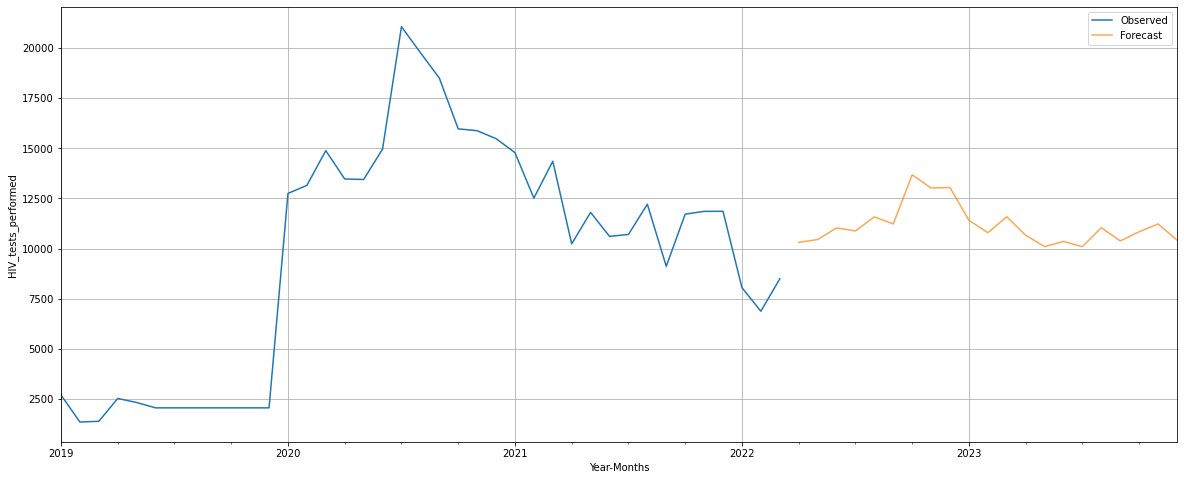

In [1138]:
axis = HIV_tests_performed['HIV_tests_performed'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('HIV_tests_performed')
plt.legend(loc='best')
plt.grid();

# HIV_patients_lost_to_followup

In [1139]:
HIV_patients_lost_to_followup = df[['HIV_patients_lost_to_followup']]
HIV_patients_lost_to_followup

HIV_patients_lost_to_followup
Time_Stamp                               
2019-01-31                           90.0
2019-02-28                           19.0
2019-03-31                           24.0
2019-04-30                           30.0
2019-05-31                           31.0
2019-06-30                           28.0
2019-07-31                           26.0
2019-08-31                           28.0
2019-09-30                           39.0
2019-10-31                           17.0
2019-11-30                           17.0
2019-12-31                           17.0
2020-01-31                           37.0
2020-02-29                           17.0
2020-03-31                           21.0
2020-04-30                           29.0
2020-05-31                           39.0
2020-06-30                           44.0
2020-07-31                           23.0
2020-08-31                           21.0
2020-09-30                           21.0
2020-10-31                           18.0
2020-11-30                           13.0
2020-12-31                           18.0
2021-01-31                           22.0
2021-02-28                           19.0
2021-03-31                           20.0
2021-04-30                           19.0
2021-05-31                           13.0
2021-06-30                           15.0
2021-07-31                           27.0
2021-08-31                           35.0
2021-09-30                           30.0
2021-10-31                            8.0
2021-11-30                            6.0
2021-12-31                           13.0
2022-01-31                           10.0
2022-02-28                           13.0
2022-03-31                           11.0

In [1140]:
df5=HIV_patients_lost_to_followup.copy()

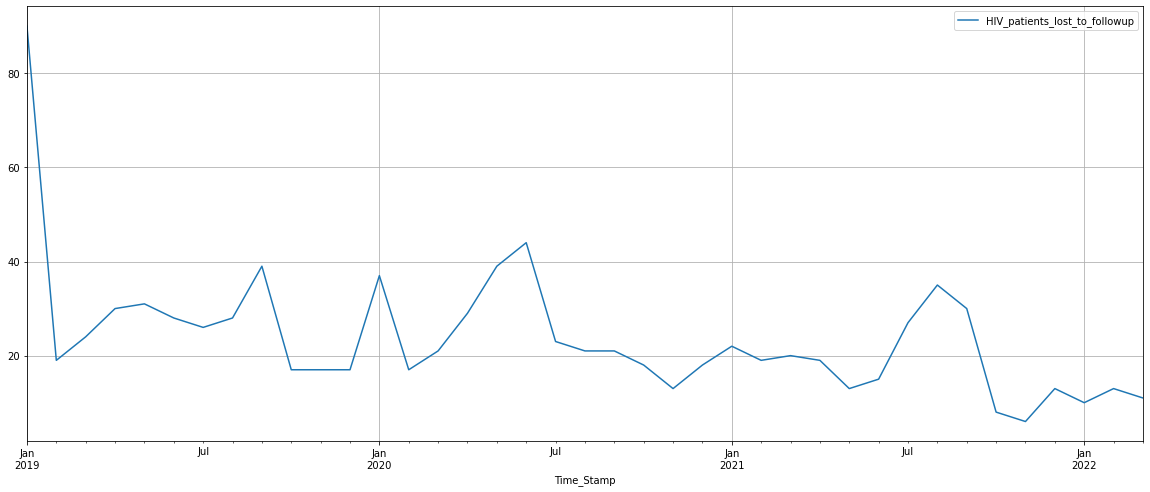

In [1141]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df5.plot(grid=True);

In [1142]:
df5.describe()

HIV_patients_lost_to_followup
count                      39.000000
mean                       23.794872
std                        14.129438
min                         6.000000
25%                        17.000000
50%                        21.000000
75%                        28.500000
max                        90.000000

In [1143]:

from    statsmodels.tsa.seasonal import   seasonal_decompose


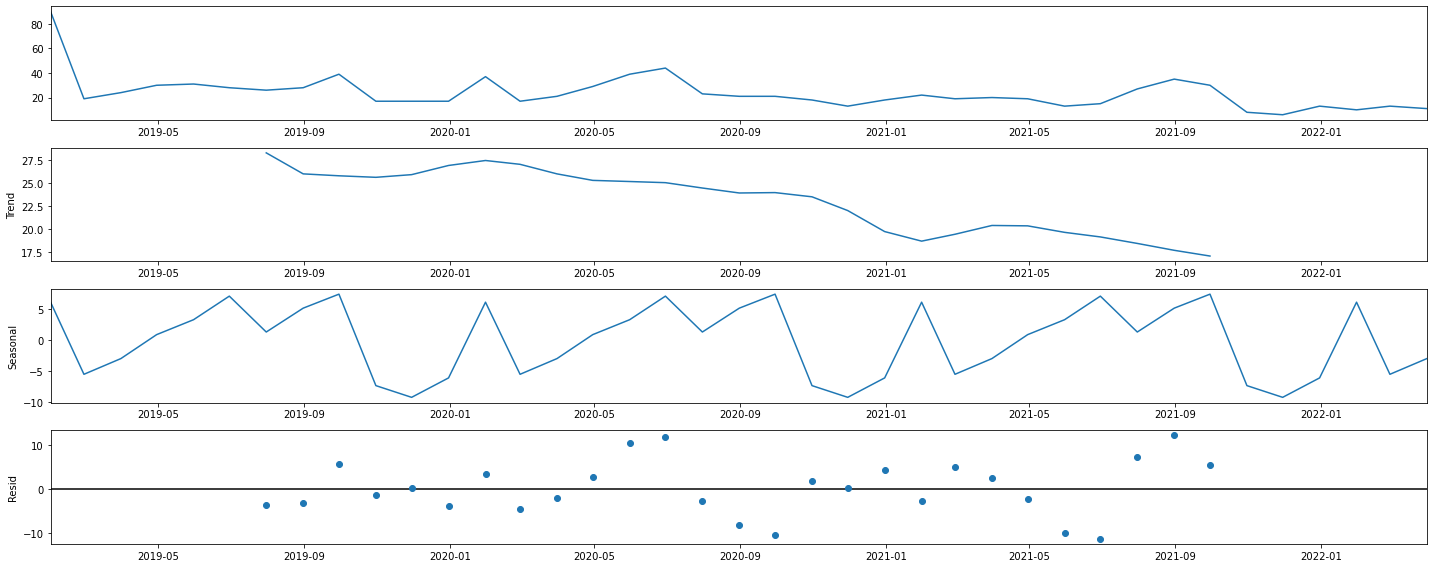

In [1144]:

decomposition = seasonal_decompose(df5,model='additive')
decomposition.plot();


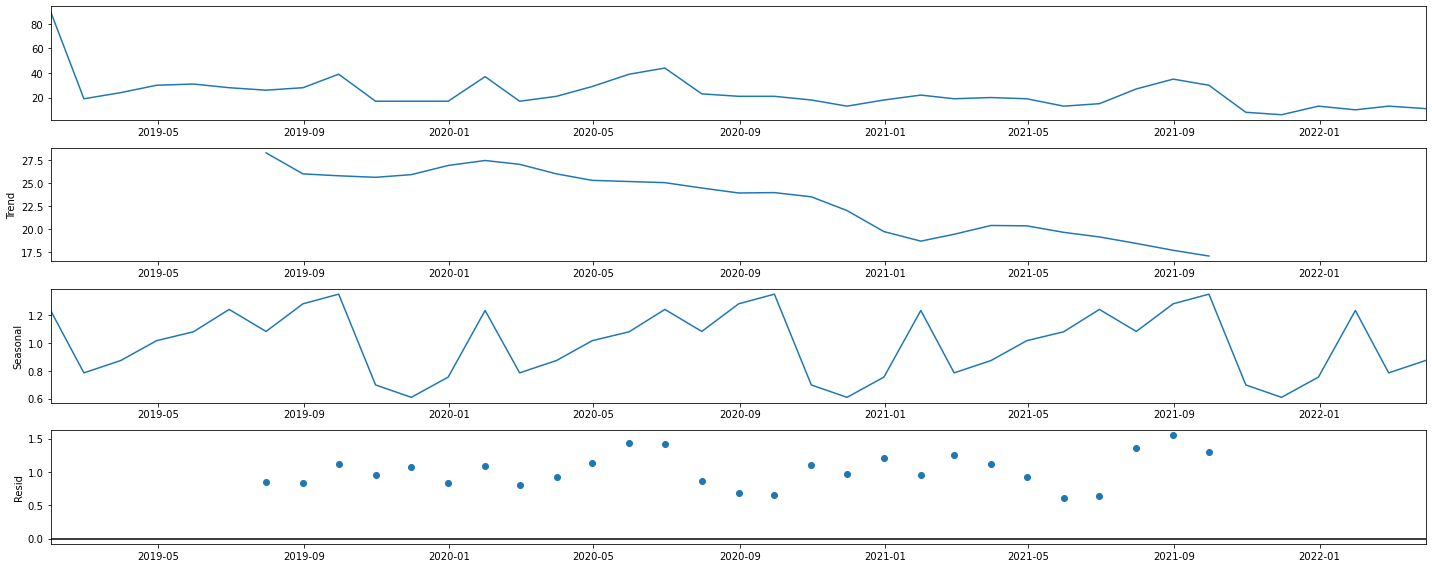

In [1145]:

decomposition = seasonal_decompose(df5,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1146]:
df5test = adfuller(df5,regression='ct')
print('DF test statistic is %3.3f' %df5test[0])
print('DF test p-value is' ,df5test[1])
print('Number of lags used' ,df5test[2])

DF test statistic is -3.401
DF test p-value is 0.05120025772085038
Number of lags used 5


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1147]:
df5test = adfuller(df5.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df5test[0])
print('DF test p-value is' ,df5test[1])
print('Number of lags used' ,df5test[2])

DF test statistic is -5.844
DF test p-value is 4.635999158884671e-06
Number of lags used 2


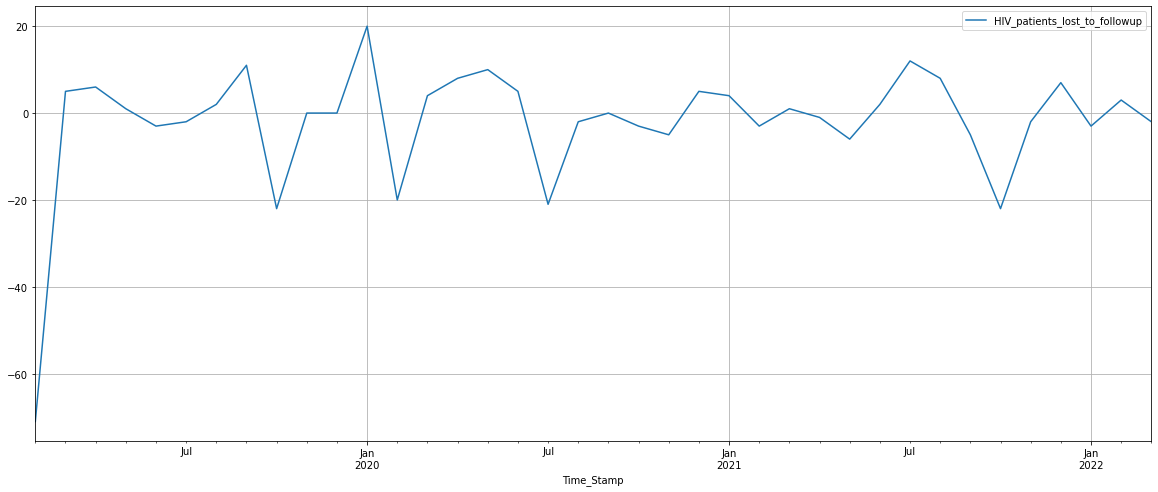

In [1148]:
df5.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1149]:
train_size = int(len(df5) * 0.8)
train=df5[0:train_size] 
test=df5[train_size:]

In [1150]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

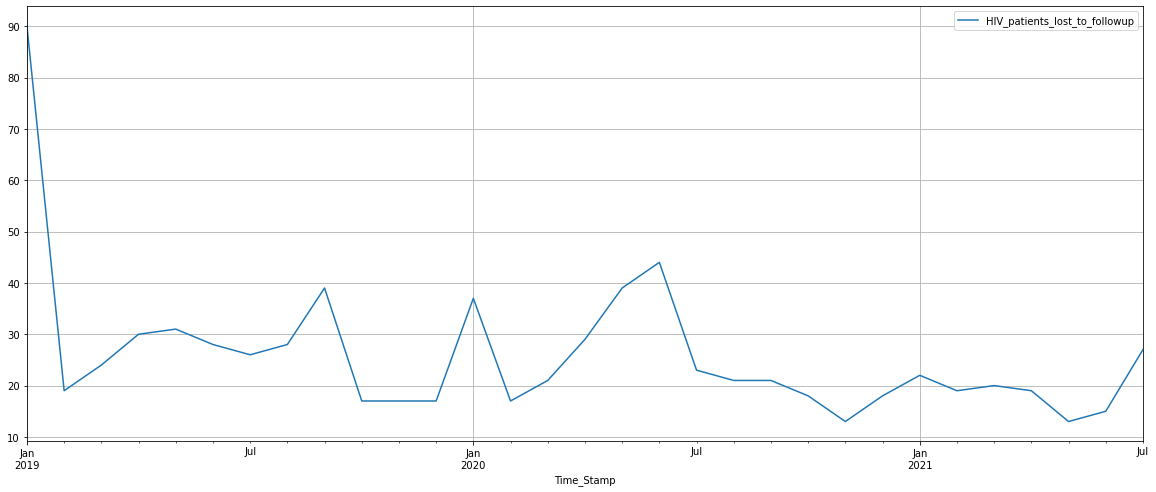

In [1151]:
train.plot(grid=True);

In [1152]:
df5test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df5test[0])
print('DF test p-value is' ,df5test[1])
print('Number of lags used' ,df5test[2])

DF test statistic is -9.240
DF test p-value is 1.0468309327062238e-13
Number of lags used 0


Observation:

* The training data is stationary at 95% confidence level

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df5.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

In [1153]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 0, 4)(0, 0, 4, 6)
Model: (1, 0, 0)(0, 1, 0, 6)
Model: (1, 0, 1)(0, 1, 1, 6)
Model: (1, 0, 2)(0, 1, 2, 6)
Model: (1, 0, 3)(0, 1, 3, 6)
Model: (1, 0, 4)(0, 1, 4, 6)
Model: (2, 0, 0)(1, 0, 0, 6)
Model: (2, 0, 1)(1, 0, 1, 6)
Model: (2, 0, 2)(1, 0, 2, 6)
Model: (2, 0, 3)(1, 0, 3, 6)
Model: (2, 0, 4)(1, 0, 4, 6)
Model: (3, 0, 0)(1, 1, 0, 6)
Model: (3, 0, 1)(1, 1, 1, 6)
Model: (3, 0, 2)(1, 1, 2, 6)
Model: (3, 0, 3)(1, 1, 3, 6)
Model: (3, 0, 4)(1, 1, 4, 6)
Model: (4, 0, 0)(2, 0, 0, 6)
Model: (4, 0, 1)(2, 0, 1, 6)
Model: (4, 0, 2)(2, 0, 2, 6)
Model: (4, 0, 3)(2, 0, 3, 6)
Model: (4, 0, 4)(2, 0, 4, 6)


In [1154]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [434]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['HIV_patients_lost_to_followup'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:280.3232122413122
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:213.83010593612224
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:158.32230925526642
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:99.93767124665226
SARIMA(0, 0, 0)x(0, 0, 4, 6) - AIC:62.56460169950185
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:195.4029944084684
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:137.75176752558895
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:90.53459840781287
SARIMA(0, 0, 0)x(0, 1, 3, 6) - AIC:36.10901705151653
SARIMA(0, 0, 0)x(0, 1, 4, 6) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:208.6675266369266
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:180.63944368243693
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:137.7596391485441
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:93.85853822550483
SARIMA(0, 0, 0)x(1, 0, 4, 6) - AIC:40.40163486976425
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:149.15029085846814
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:139.83087999392936
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:89.13504351503832
SARIMA(0, 0, 0)x(1, 1, 3, 6) - AIC:38.104147075703345

SARIMA(0, 0, 3)x(0, 1, 3, 6) - AIC:-5.1986177014315516
SARIMA(0, 0, 3)x(0, 1, 4, 6) - AIC:16.0
SARIMA(0, 0, 3)x(1, 0, 0, 6) - AIC:200.41528851455
SARIMA(0, 0, 3)x(1, 0, 1, 6) - AIC:159.8383096297192
SARIMA(0, 0, 3)x(1, 0, 2, 6) - AIC:121.60783322626848
SARIMA(0, 0, 3)x(1, 0, 3, 6) - AIC:72.58734443451308
SARIMA(0, 0, 3)x(1, 0, 4, 6) - AIC:30.777273278662783
SARIMA(0, 0, 3)x(1, 1, 0, 6) - AIC:148.22362597343823
SARIMA(0, 0, 3)x(1, 1, 1, 6) - AIC:115.46685514877635
SARIMA(0, 0, 3)x(1, 1, 2, 6) - AIC:54.215106641534625
SARIMA(0, 0, 3)x(1, 1, 3, 6) - AIC:-8.07791290185035
SARIMA(0, 0, 3)x(1, 1, 4, 6) - AIC:18.0
SARIMA(0, 0, 3)x(2, 0, 0, 6) - AIC:144.10253772251076
SARIMA(0, 0, 3)x(2, 0, 1, 6) - AIC:143.14697923193052
SARIMA(0, 0, 3)x(2, 0, 2, 6) - AIC:116.18926192615875
SARIMA(0, 0, 3)x(2, 0, 3, 6) - AIC:68.74147338310107
SARIMA(0, 0, 3)x(2, 0, 4, 6) - AIC:28.201769276491717
SARIMA(0, 0, 3)x(2, 1, 0, 6) - AIC:100.18271430846477
SARIMA(0, 0, 3)x(2, 1, 1, 6) - AIC:96.27410274480062
SARIMA(0,

SARIMA(1, 0, 1)x(1, 1, 2, 6) - AIC:77.91084567603875
SARIMA(1, 0, 1)x(1, 1, 3, 6) - AIC:32.63164176829152
SARIMA(1, 0, 1)x(1, 1, 4, 6) - AIC:16.0
SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:131.73384322573537
SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:129.91178709985206
SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:113.29442189806701
SARIMA(1, 0, 1)x(2, 0, 3, 6) - AIC:72.58079675264301
SARIMA(1, 0, 1)x(2, 0, 4, 6) - AIC:34.49666069348814
SARIMA(1, 0, 1)x(2, 1, 0, 6) - AIC:88.1500490543942
SARIMA(1, 0, 1)x(2, 1, 1, 6) - AIC:85.76860697951474
SARIMA(1, 0, 1)x(2, 1, 2, 6) - AIC:73.5826402942981
SARIMA(1, 0, 1)x(2, 1, 3, 6) - AIC:-14.410252023316637
SARIMA(1, 0, 1)x(2, 1, 4, 6) - AIC:18.0
SARIMA(1, 0, 1)x(3, 0, 0, 6) - AIC:77.49772989110042
SARIMA(1, 0, 1)x(3, 0, 1, 6) - AIC:75.57089640991677
SARIMA(1, 0, 1)x(3, 0, 2, 6) - AIC:76.07368215349962
SARIMA(1, 0, 1)x(3, 0, 3, 6) - AIC:65.21800361385891
SARIMA(1, 0, 1)x(3, 0, 4, 6) - AIC:32.479293551945034
SARIMA(1, 0, 1)x(3, 1, 0, 6) - AIC:31.780187394708463
SARIMA(1, 0, 1

SARIMA(1, 0, 4)x(2, 1, 3, 6) - AIC:0.12790535899923228
SARIMA(1, 0, 4)x(2, 1, 4, 6) - AIC:24.0
SARIMA(1, 0, 4)x(3, 0, 0, 6) - AIC:71.45384182480782
SARIMA(1, 0, 4)x(3, 0, 1, 6) - AIC:69.7172000976772
SARIMA(1, 0, 4)x(3, 0, 2, 6) - AIC:70.89599365131399
SARIMA(1, 0, 4)x(3, 0, 3, 6) - AIC:57.062875083883824
SARIMA(1, 0, 4)x(3, 0, 4, 6) - AIC:12.073385585229996
SARIMA(1, 0, 4)x(3, 1, 0, 6) - AIC:-8.115775398485802
SARIMA(1, 0, 4)x(3, 1, 1, 6) - AIC:34.23455283925818
SARIMA(1, 0, 4)x(3, 1, 2, 6) - AIC:1.5188376384266071
SARIMA(1, 0, 4)x(3, 1, 3, 6) - AIC:6.905604632376935
SARIMA(1, 0, 4)x(3, 1, 4, 6) - AIC:26.0
SARIMA(1, 0, 4)x(4, 0, 0, 6) - AIC:22.92475566094134
SARIMA(1, 0, 4)x(4, 0, 1, 6) - AIC:40.03487546944342
SARIMA(1, 0, 4)x(4, 0, 2, 6) - AIC:22.9120759557244
SARIMA(1, 0, 4)x(4, 0, 3, 6) - AIC:23.239904018502152
SARIMA(1, 0, 4)x(4, 0, 4, 6) - AIC:-0.2687036967081724
SARIMA(1, 0, 4)x(4, 1, 0, 6) - AIC:20.0
SARIMA(1, 0, 4)x(4, 1, 1, 6) - AIC:22.0
SARIMA(1, 0, 4)x(4, 1, 2, 6) - AIC:24.

SARIMA(2, 0, 2)x(3, 1, 3, 6) - AIC:-8.527259757078891
SARIMA(2, 0, 2)x(3, 1, 4, 6) - AIC:24.0
SARIMA(2, 0, 2)x(4, 0, 0, 6) - AIC:-45.03242202837704
SARIMA(2, 0, 2)x(4, 0, 1, 6) - AIC:-47.17912255144276
SARIMA(2, 0, 2)x(4, 0, 2, 6) - AIC:-37.99197483547135
SARIMA(2, 0, 2)x(4, 0, 3, 6) - AIC:-36.064168362250875
SARIMA(2, 0, 2)x(4, 0, 4, 6) - AIC:-26.384633677923148
SARIMA(2, 0, 2)x(4, 1, 0, 6) - AIC:18.0
SARIMA(2, 0, 2)x(4, 1, 1, 6) - AIC:20.0
SARIMA(2, 0, 2)x(4, 1, 2, 6) - AIC:22.0
SARIMA(2, 0, 2)x(4, 1, 3, 6) - AIC:24.0
SARIMA(2, 0, 2)x(4, 1, 4, 6) - AIC:26.0
SARIMA(2, 0, 3)x(0, 0, 0, 6) - AIC:196.9000944742915
SARIMA(2, 0, 3)x(0, 0, 1, 6) - AIC:154.1831598944203
SARIMA(2, 0, 3)x(0, 0, 2, 6) - AIC:110.79160771212241
SARIMA(2, 0, 3)x(0, 0, 3, 6) - AIC:63.95406699938047
SARIMA(2, 0, 3)x(0, 0, 4, 6) - AIC:38.52154379854219
SARIMA(2, 0, 3)x(0, 1, 0, 6) - AIC:169.95806074399238
SARIMA(2, 0, 3)x(0, 1, 1, 6) - AIC:112.82560129013912
SARIMA(2, 0, 3)x(0, 1, 2, 6) - AIC:55.74130003727488
SARIMA(

SARIMA(3, 0, 1)x(0, 0, 0, 6) - AIC:202.27378735307207
SARIMA(3, 0, 1)x(0, 0, 1, 6) - AIC:171.96640275337145
SARIMA(3, 0, 1)x(0, 0, 2, 6) - AIC:123.8702602095328
SARIMA(3, 0, 1)x(0, 0, 3, 6) - AIC:76.89879951746482
SARIMA(3, 0, 1)x(0, 0, 4, 6) - AIC:45.28020991789174
SARIMA(3, 0, 1)x(0, 1, 0, 6) - AIC:182.85148871126302
SARIMA(3, 0, 1)x(0, 1, 1, 6) - AIC:131.77724826857798
SARIMA(3, 0, 1)x(0, 1, 2, 6) - AIC:80.77762255798534
SARIMA(3, 0, 1)x(0, 1, 3, 6) - AIC:0.8976233399163256
SARIMA(3, 0, 1)x(0, 1, 4, 6) - AIC:18.0
SARIMA(3, 0, 1)x(1, 0, 0, 6) - AIC:163.66305124728282
SARIMA(3, 0, 1)x(1, 0, 1, 6) - AIC:166.19871996057168
SARIMA(3, 0, 1)x(1, 0, 2, 6) - AIC:118.95443511721575
SARIMA(3, 0, 1)x(1, 0, 3, 6) - AIC:78.89499459832538
SARIMA(3, 0, 1)x(1, 0, 4, 6) - AIC:31.5032507906836
SARIMA(3, 0, 1)x(1, 1, 0, 6) - AIC:125.13983973368158
SARIMA(3, 0, 1)x(1, 1, 1, 6) - AIC:125.66889539433197
SARIMA(3, 0, 1)x(1, 1, 2, 6) - AIC:76.11943606814492
SARIMA(3, 0, 1)x(1, 1, 3, 6) - AIC:-1.591731305740

SARIMA(3, 0, 4)x(1, 0, 0, 6) - AIC:167.96919682937664
SARIMA(3, 0, 4)x(1, 0, 1, 6) - AIC:149.25781169769346
SARIMA(3, 0, 4)x(1, 0, 2, 6) - AIC:99.86014189292077
SARIMA(3, 0, 4)x(1, 0, 3, 6) - AIC:59.89010544300216
SARIMA(3, 0, 4)x(1, 0, 4, 6) - AIC:-4.141158042586493
SARIMA(3, 0, 4)x(1, 1, 0, 6) - AIC:130.571897727026
SARIMA(3, 0, 4)x(1, 1, 1, 6) - AIC:112.39613913503557
SARIMA(3, 0, 4)x(1, 1, 2, 6) - AIC:42.20105708426193
SARIMA(3, 0, 4)x(1, 1, 3, 6) - AIC:19.043536628468505
SARIMA(3, 0, 4)x(1, 1, 4, 6) - AIC:26.0
SARIMA(3, 0, 4)x(2, 0, 0, 6) - AIC:105.69480956355383
SARIMA(3, 0, 4)x(2, 0, 1, 6) - AIC:98.5550047878128
SARIMA(3, 0, 4)x(2, 0, 2, 6) - AIC:89.8179728058331
SARIMA(3, 0, 4)x(2, 0, 3, 6) - AIC:54.26355111746149
SARIMA(3, 0, 4)x(2, 0, 4, 6) - AIC:-11.750991868632951
SARIMA(3, 0, 4)x(2, 1, 0, 6) - AIC:58.86758404887073
SARIMA(3, 0, 4)x(2, 1, 1, 6) - AIC:58.637732274645984
SARIMA(3, 0, 4)x(2, 1, 2, 6) - AIC:57.620509455959706
SARIMA(3, 0, 4)x(2, 1, 3, 6) - AIC:11.06279771975369

SARIMA(4, 0, 2)x(2, 0, 0, 6) - AIC:102.6488167955216
SARIMA(4, 0, 2)x(2, 0, 1, 6) - AIC:100.33590270192485
SARIMA(4, 0, 2)x(2, 0, 2, 6) - AIC:101.96070697668222
SARIMA(4, 0, 2)x(2, 0, 3, 6) - AIC:66.51441587248765
SARIMA(4, 0, 2)x(2, 0, 4, 6) - AIC:-16.880973595711424
SARIMA(4, 0, 2)x(2, 1, 0, 6) - AIC:50.399425906090094
SARIMA(4, 0, 2)x(2, 1, 1, 6) - AIC:75.46556331981533
SARIMA(4, 0, 2)x(2, 1, 2, 6) - AIC:44.052938326294765
SARIMA(4, 0, 2)x(2, 1, 3, 6) - AIC:-8.367708422577522
SARIMA(4, 0, 2)x(2, 1, 4, 6) - AIC:26.0
SARIMA(4, 0, 2)x(3, 0, 0, 6) - AIC:44.15131068365411
SARIMA(4, 0, 2)x(3, 0, 1, 6) - AIC:46.126825923451456
SARIMA(4, 0, 2)x(3, 0, 2, 6) - AIC:53.75782673883992
SARIMA(4, 0, 2)x(3, 0, 3, 6) - AIC:54.67804356220951
SARIMA(4, 0, 2)x(3, 0, 4, 6) - AIC:-10.332928758678207
SARIMA(4, 0, 2)x(3, 1, 0, 6) - AIC:32.41718216860163
SARIMA(4, 0, 2)x(3, 1, 1, 6) - AIC:39.13188789932725
SARIMA(4, 0, 2)x(3, 1, 2, 6) - AIC:11.371817946575753
SARIMA(4, 0, 2)x(3, 1, 3, 6) - AIC:2.80448097977

In [435]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
1034  (4, 0, 0)  (3, 0, 4, 6) -64.079509
590   (2, 0, 1)  (4, 0, 0, 6) -60.125466
784   (3, 0, 0)  (3, 0, 4, 6) -58.525858
1024  (4, 0, 0)  (2, 0, 4, 6) -53.914000
535   (2, 0, 0)  (3, 1, 0, 6) -50.105392

In [1183]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['HIV_patients_lost_to_followup'],
                                order=(4, 0, 0),
                                seasonal_order=(3, 0, 4, 9),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                          SARIMAX Results                                           
Dep. Variable:                HIV_patients_lost_to_followup   No. Observations:                   31
Model:             SARIMAX(4, 0, 0)x(3, 0, [1, 2, 3, 4], 9)   Log Likelihood                   0.000
Date:                                      Tue, 18 Oct 2022   AIC                             24.000
Time:                                              10:50:21   BIC                                nan
Sample:                                          01-31-2019   HQIC                               nan
                                               - 07-31-2021                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5424         -0  

## Predict on the Test Set using this model and evaluate the model.

In [1184]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1185]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

HIV_patients_lost_to_followup       mean      mean_se  mean_ci_lower  \
2021-08-31                     20.995935  1000.032530   -1939.031807   
2021-09-30                     17.363057  1137.655742   -2212.401224   
2021-10-31                     17.483323  1185.312127   -2305.685756   
2021-11-30                     18.763042  1239.537515   -2410.685846   
2021-12-31                     17.713900  1333.062120   -2595.039845   

HIV_patients_lost_to_followup  mean_ci_upper  
2021-08-31                       1981.023676  
2021-09-30                       2247.127338  
2021-10-31                       2340.652402  
2021-11-30                       2448.211930  
2021-12-31                       2630.467645

In [1186]:
rmse = mean_squared_error(test['HIV_patients_lost_to_followup'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['HIV_patients_lost_to_followup'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 9.39302037923584 
MAPE: 72.76045453661074


## Building the most optimum model on the Full Data.

In [1192]:
full_data_model = sm.tsa.statespace.SARIMAX(df5['HIV_patients_lost_to_followup'],
                                order=(4, 1, 0),
                                seasonal_order=(3, 0, 4, 9),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                          SARIMAX Results                                           
Dep. Variable:                HIV_patients_lost_to_followup   No. Observations:                   39
Model:             SARIMAX(4, 1, 0)x(3, 0, [1, 2, 3, 4], 9)   Log Likelihood                   6.175
Date:                                      Tue, 18 Oct 2022   AIC                             11.650
Time:                                              10:51:22   BIC                            -12.350
Sample:                                          01-31-2019   HQIC                              -inf
                                               - 03-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0957   1.57e-10  

## Evaluate the model on the whole data and predict 21 months into the future (till the end of next year).

In [1193]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1194]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

HIV_patients_lost_to_followup       mean   mean_se  mean_ci_lower  \
2022-04-30                     14.156793  0.000830      14.155167   
2022-05-31                     13.520185  0.001119      13.517993   
2022-06-30                     12.187735  0.001381      12.185028   
2022-07-31                     13.388413  0.001520      13.385434   
2022-08-31                     15.741312  0.001568      15.738239   
2022-09-30                     16.050157  0.001621      16.046979   
2022-10-31                     12.959510  0.001672      12.956232   
2022-11-30                     13.917686  0.001752      13.914253   
2022-12-31                     13.481365  0.001849      13.477741   
2023-01-31                      9.787191  0.001938       9.783392   
2023-02-28                      6.872175  0.002020       6.868217   
2023-03-31                      9.128689  0.002084       9.124604   
2023-04-30                     15.687399  0.002143      15.683199   
2023-05-31                     15.730362  0.002201      15.726049   
2023-06-30                     13.953567  0.002260      13.949137   
2023-07-31                     14.584220  0.002323      14.579667   
2023-08-31                     12.823243  0.002385      12.818569   
2023-09-30                     13.698465  0.002445      13.693674   
2023-10-31                     14.797935  0.002463      14.793106   
2023-11-30                     16.262786  0.002484      16.257918   
2023-12-31                     15.809131  0.002502      15.804227   

HIV_patients_lost_to_followup  mean_ci_upper  
2022-04-30                         14.158420  
2022-05-31                         13.522378  
2022-06-30                         12.190442  
2022-07-31                         13.391392  
2022-08-31                         15.744385  
2022-09-30                         16.053335  
2022-10-31                         12.962788  
2022-11-30                         13.921120  
2022-12-31                         13.484989  
2023-01-31                          9.790990  
2023-02-28                          6.876134  
2023-03-31                          9.132775  
2023-04-30                         15.691599  
2023-05-31                         15.734675  
2023-06-30                         13.957997  
2023-07-31                         14.588773  
2023-08-31                         12.827918  
2023-09-30                         13.703257  
2023-10-31                         14.802763  
2023-11-30                         16.267654  
2023-12-31                         15.814035

In [1195]:
rmse = mean_squared_error(df5['HIV_patients_lost_to_followup'],results_full_data_model.fittedvalues,squared=False)
print('HIV_patients_lost_to_followup',rmse)

HIV_patients_lost_to_followup 21.00531376820057


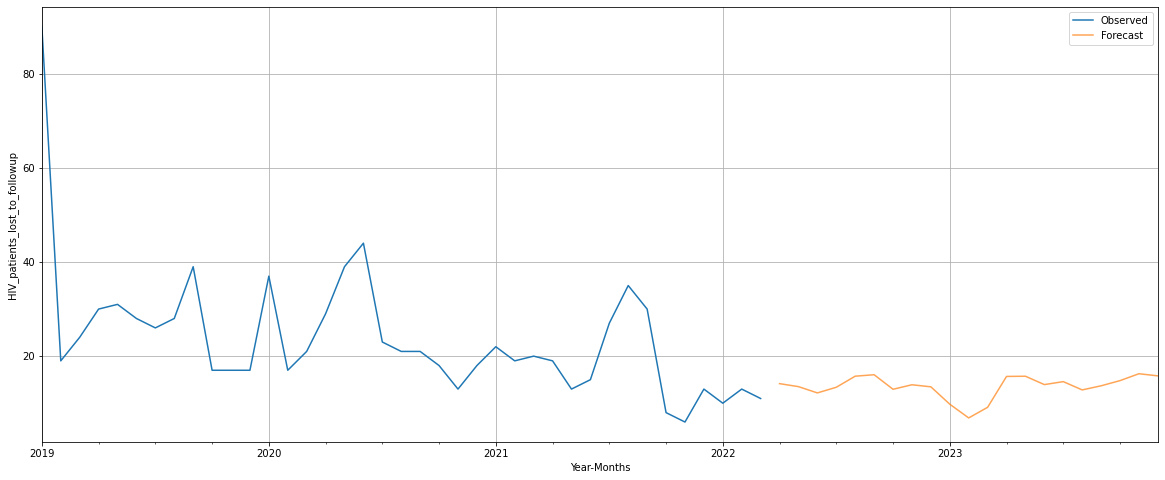

In [1196]:
axis = df5['HIV_patients_lost_to_followup'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('HIV_patients_lost_to_followup')
plt.legend(loc='best')
plt.grid();

# malnutrition_patients_currently_enrolled

In [1197]:
malnutrition_patients_exiting = df[['malnutrition_patients_exiting']]
malnutrition_patients_exiting

malnutrition_patients_exiting
Time_Stamp                               
2019-01-31                          138.0
2019-02-28                          250.0
2019-03-31                          219.0
2019-04-30                          106.0
2019-05-31                          115.0
2019-06-30                           99.0
2019-07-31                          147.0
2019-08-31                           62.0
2019-09-30                           76.0
2019-10-31                          105.0
2019-11-30                          105.0
2019-12-31                          112.0
2020-01-31                          193.0
2020-02-29                          193.0
2020-03-31                           71.0
2020-04-30                          141.0
2020-05-31                          117.0
2020-06-30                           90.0
2020-07-31                           69.0
2020-08-31                           50.0
2020-09-30                          105.0
2020-10-31                           68.0
2020-11-30                           71.0
2020-12-31                           78.0
2021-01-31                           37.0
2021-02-28                          128.0
2021-03-31                          124.0
2021-04-30                           31.0
2021-05-31                           59.0
2021-06-30                           50.0
2021-07-31                          110.0
2021-08-31                          107.0
2021-09-30                          137.0
2021-10-31                          108.0
2021-11-30                          110.0
2021-12-31                           51.0
2022-01-31                           96.0
2022-02-28                          143.0
2022-03-31                          132.0

In [1198]:
df6=malnutrition_patients_exiting.copy()

In [1199]:
df6.describe()

malnutrition_patients_exiting
count                      39.000000
mean                      107.769231
std                        48.046831
min                        31.000000
25%                        71.000000
50%                       106.000000
75%                       130.000000
max                       250.000000

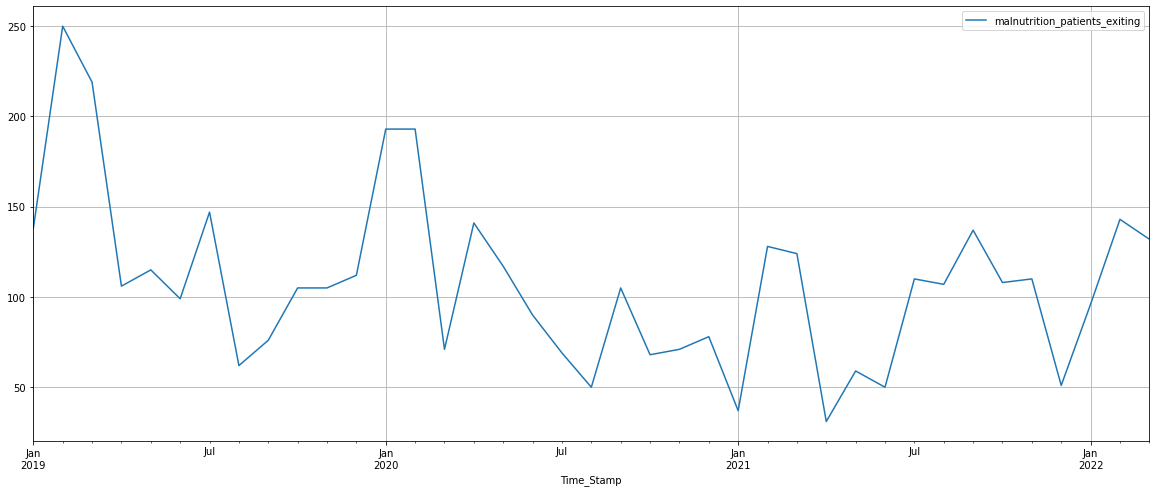

In [1200]:
malnutrition_patients_exiting = df[['malnutrition_patients_exiting']]
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df6.plot(grid=True);

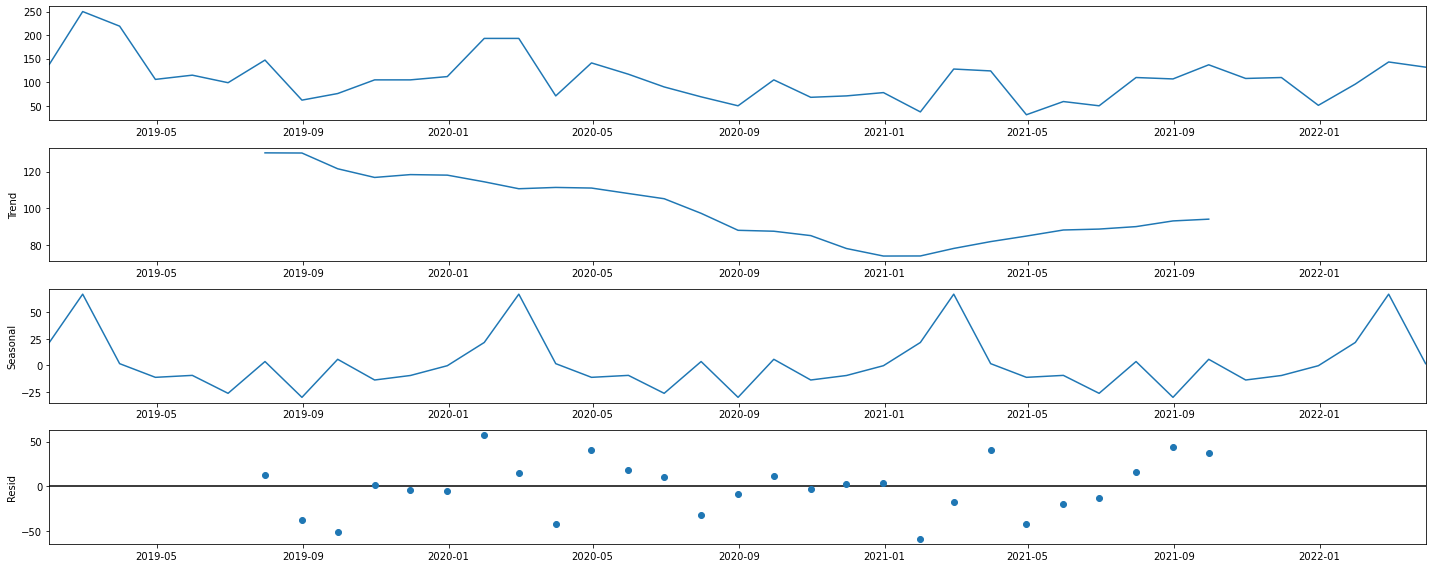

In [1201]:
decomposition = seasonal_decompose(df6,model='additive')
decomposition.plot();

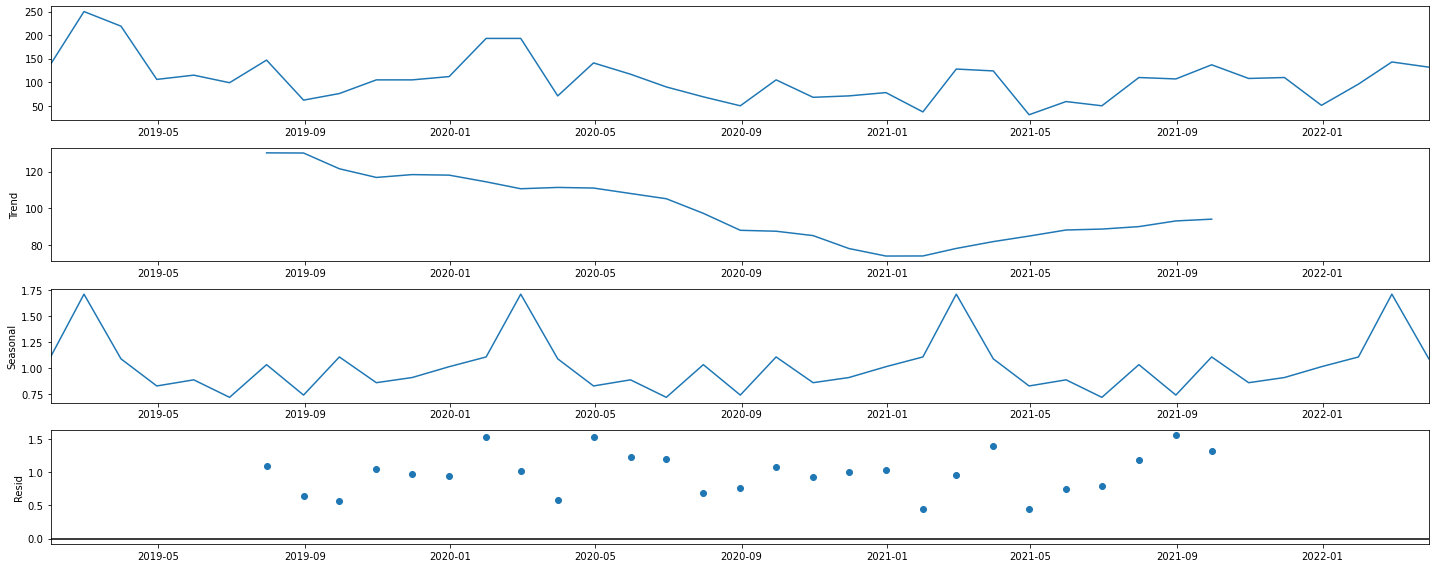

In [1202]:
decomposition = seasonal_decompose(df6,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1203]:
df6test = adfuller(df6,regression='ct')
print('DF test statistic is %3.3f' %df6test[0])
print('DF test p-value is' ,df6test[1])
print('Number of lags used' ,df6test[2])

DF test statistic is -4.114
DF test p-value is 0.00601993842184293
Number of lags used 0


Observation:

* The data is stationary at 95% confidence level.

## Split the data into train and test and plot the training and test data.

In [1204]:
train_size = int(len(df6) * 0.8)
train=df6[0:train_size] 
test=df6[train_size:]

In [1205]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

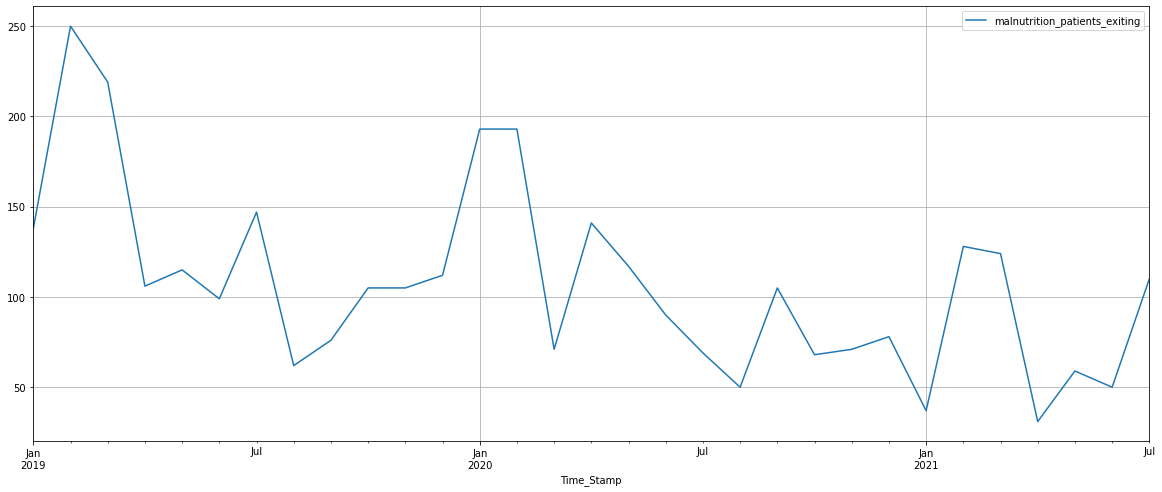

In [1206]:
train.plot(grid=True);

In [1207]:
df6 = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df6test[0])
print('DF test p-value is' ,df6test[1])
print('Number of lags used' ,df6test[2])

DF test statistic is -4.114
DF test p-value is 0.00601993842184293
Number of lags used 0


Observation:

* The training data is stationary at 95% confidence level.

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, ]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df6.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 101.125 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 101.125

 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 101.125
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 101.125
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 101.125
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 76.157
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 74.881
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 50.599
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 39.034
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 47.135
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 96.451
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 50.529
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 39.690
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 79.762
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 32.075
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 52.268
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 48.958 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 49.280

 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 56.421
 > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 54.150
 > Model[[(0, 0, 0), (0

In [74]:
import itertools
p = q = range(0, 5)
d=range(0,1)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 0, 4)(0, 0, 4, 6)
Model: (1, 0, 0)(0, 1, 0, 6)
Model: (1, 0, 1)(0, 1, 1, 6)
Model: (1, 0, 2)(0, 1, 2, 6)
Model: (1, 0, 3)(0, 1, 3, 6)
Model: (1, 0, 4)(0, 1, 4, 6)
Model: (2, 0, 0)(1, 0, 0, 6)
Model: (2, 0, 1)(1, 0, 1, 6)
Model: (2, 0, 2)(1, 0, 2, 6)
Model: (2, 0, 3)(1, 0, 3, 6)
Model: (2, 0, 4)(1, 0, 4, 6)
Model: (3, 0, 0)(1, 1, 0, 6)
Model: (3, 0, 1)(1, 1, 1, 6)
Model: (3, 0, 2)(1, 1, 2, 6)
Model: (3, 0, 3)(1, 1, 3, 6)
Model: (3, 0, 4)(1, 1, 4, 6)
Model: (4, 0, 0)(2, 0, 0, 6)
Model: (4, 0, 1)(2, 0, 1, 6)
Model: (4, 0, 2)(2, 0, 2, 6)
Model: (4, 0, 3)(2, 0, 3, 6)
Model: (4, 0, 4)(2, 0, 4, 6)


In [75]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [464]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['malnutrition_patients_exiting'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:373.3946928004984
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:284.69779624827095
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:211.85913566895104
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:140.95858555169772
SARIMA(0, 0, 0)x(0, 0, 4, 6) - AIC:81.08928853346761
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:277.69337657467213
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:199.13629336577284
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:134.40308201604395
SARIMA(0, 0, 0)x(0, 1, 3, 6) - AIC:70.23413083994927
SARIMA(0, 0, 0)x(0, 1, 4, 6) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:281.4274291067064
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:261.50898722807506
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:200.7837612169655
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:137.0771390698696
SARIMA(0, 0, 0)x(1, 0, 4, 6) - AIC:75.4287298253478
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:209.25772885624843
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:200.7532221226044
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:134.05121936982275
SARIMA(0, 0, 0)x(1, 1, 3, 6) - AIC:72.0816481107883

SARIMA(0, 0, 3)x(0, 1, 2, 6) - AIC:98.79862918367945
SARIMA(0, 0, 3)x(0, 1, 3, 6) - AIC:38.27448284151245
SARIMA(0, 0, 3)x(0, 1, 4, 6) - AIC:16.0
SARIMA(0, 0, 3)x(1, 0, 0, 6) - AIC:280.3002931198198
SARIMA(0, 0, 3)x(1, 0, 1, 6) - AIC:233.19356747991222
SARIMA(0, 0, 3)x(1, 0, 2, 6) - AIC:167.62305044288792
SARIMA(0, 0, 3)x(1, 0, 3, 6) - AIC:104.19931025046212
SARIMA(0, 0, 3)x(1, 0, 4, 6) - AIC:47.269618171837095
SARIMA(0, 0, 3)x(1, 1, 0, 6) - AIC:209.73469685610118
SARIMA(0, 0, 3)x(1, 1, 1, 6) - AIC:166.5461366142895
SARIMA(0, 0, 3)x(1, 1, 2, 6) - AIC:101.6973672993081
SARIMA(0, 0, 3)x(1, 1, 3, 6) - AIC:42.384578167260685
SARIMA(0, 0, 3)x(1, 1, 4, 6) - AIC:18.0
SARIMA(0, 0, 3)x(2, 0, 0, 6) - AIC:204.3313328357609
SARIMA(0, 0, 3)x(2, 0, 1, 6) - AIC:204.2186973716931
SARIMA(0, 0, 3)x(2, 0, 2, 6) - AIC:158.63198296282434
SARIMA(0, 0, 3)x(2, 0, 3, 6) - AIC:97.72746243017258
SARIMA(0, 0, 3)x(2, 0, 4, 6) - AIC:48.23130935808036
SARIMA(0, 0, 3)x(2, 1, 0, 6) - AIC:151.02480183697975
SARIMA(0, 0

SARIMA(1, 0, 1)x(1, 1, 2, 6) - AIC:122.6997596249397
SARIMA(1, 0, 1)x(1, 1, 3, 6) - AIC:41.359108036808664
SARIMA(1, 0, 1)x(1, 1, 4, 6) - AIC:16.0
SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:190.0984275601308
SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:189.60586835142513
SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:181.08857349791452
SARIMA(1, 0, 1)x(2, 0, 3, 6) - AIC:121.75839648370017
SARIMA(1, 0, 1)x(2, 0, 4, 6) - AIC:61.344610413128265
SARIMA(1, 0, 1)x(2, 1, 0, 6) - AIC:134.3919315202594
SARIMA(1, 0, 1)x(2, 1, 1, 6) - AIC:130.54711227210652
SARIMA(1, 0, 1)x(2, 1, 2, 6) - AIC:124.69661558460707
SARIMA(1, 0, 1)x(2, 1, 3, 6) - AIC:52.82504933235329
SARIMA(1, 0, 1)x(2, 1, 4, 6) - AIC:18.0
SARIMA(1, 0, 1)x(3, 0, 0, 6) - AIC:127.42305707291715
SARIMA(1, 0, 1)x(3, 0, 1, 6) - AIC:129.12757483492544
SARIMA(1, 0, 1)x(3, 0, 2, 6) - AIC:127.23430662794003
SARIMA(1, 0, 1)x(3, 0, 3, 6) - AIC:115.03993220088564
SARIMA(1, 0, 1)x(3, 0, 4, 6) - AIC:55.39899782490466
SARIMA(1, 0, 1)x(3, 1, 0, 6) - AIC:43.905154130013955
SARIMA(

SARIMA(1, 0, 4)x(2, 1, 2, 6) - AIC:81.45819899794772
SARIMA(1, 0, 4)x(2, 1, 3, 6) - AIC:30.155942261265764
SARIMA(1, 0, 4)x(2, 1, 4, 6) - AIC:24.0
SARIMA(1, 0, 4)x(3, 0, 0, 6) - AIC:128.11938212426196
SARIMA(1, 0, 4)x(3, 0, 1, 6) - AIC:129.3982028626582
SARIMA(1, 0, 4)x(3, 0, 2, 6) - AIC:130.22136238090008
SARIMA(1, 0, 4)x(3, 0, 3, 6) - AIC:91.67203143848087
SARIMA(1, 0, 4)x(3, 0, 4, 6) - AIC:0.3348455294998054
SARIMA(1, 0, 4)x(3, 1, 0, 6) - AIC:44.17267154417068
SARIMA(1, 0, 4)x(3, 1, 1, 6) - AIC:45.72731807569443
SARIMA(1, 0, 4)x(3, 1, 2, 6) - AIC:48.17318426619268
SARIMA(1, 0, 4)x(3, 1, 3, 6) - AIC:31.536208055473907
SARIMA(1, 0, 4)x(3, 1, 4, 6) - AIC:26.0
SARIMA(1, 0, 4)x(4, 0, 0, 6) - AIC:51.748309429339955
SARIMA(1, 0, 4)x(4, 0, 1, 6) - AIC:56.2788126788684
SARIMA(1, 0, 4)x(4, 0, 2, 6) - AIC:50.30114098591422
SARIMA(1, 0, 4)x(4, 0, 3, 6) - AIC:54.48545365460606
SARIMA(1, 0, 4)x(4, 0, 4, 6) - AIC:0.3788422907991844
SARIMA(1, 0, 4)x(4, 1, 0, 6) - AIC:20.0
SARIMA(1, 0, 4)x(4, 1, 1, 

SARIMA(2, 0, 2)x(3, 1, 2, 6) - AIC:29.99206765058325
SARIMA(2, 0, 2)x(3, 1, 3, 6) - AIC:13.006083190963405
SARIMA(2, 0, 2)x(3, 1, 4, 6) - AIC:24.0
SARIMA(2, 0, 2)x(4, 0, 0, 6) - AIC:10.569607055425163
SARIMA(2, 0, 2)x(4, 0, 1, 6) - AIC:-41.86262578652925
SARIMA(2, 0, 2)x(4, 0, 2, 6) - AIC:-4.4271589321331
SARIMA(2, 0, 2)x(4, 0, 3, 6) - AIC:-0.9945348143491728
SARIMA(2, 0, 2)x(4, 0, 4, 6) - AIC:-3.8898282923981746
SARIMA(2, 0, 2)x(4, 1, 0, 6) - AIC:18.0
SARIMA(2, 0, 2)x(4, 1, 1, 6) - AIC:20.0
SARIMA(2, 0, 2)x(4, 1, 2, 6) - AIC:22.0
SARIMA(2, 0, 2)x(4, 1, 3, 6) - AIC:24.0
SARIMA(2, 0, 2)x(4, 1, 4, 6) - AIC:26.0
SARIMA(2, 0, 3)x(0, 0, 0, 6) - AIC:282.8131090248021
SARIMA(2, 0, 3)x(0, 0, 1, 6) - AIC:219.77568680569323
SARIMA(2, 0, 3)x(0, 0, 2, 6) - AIC:158.2020714842931
SARIMA(2, 0, 3)x(0, 0, 3, 6) - AIC:106.4303137026189
SARIMA(2, 0, 3)x(0, 0, 4, 6) - AIC:44.683352924309915
SARIMA(2, 0, 3)x(0, 1, 0, 6) - AIC:241.43899105427568
SARIMA(2, 0, 3)x(0, 1, 1, 6) - AIC:171.8083542448627
SARIMA(2,

SARIMA(3, 0, 0)x(4, 1, 4, 6) - AIC:24.0
SARIMA(3, 0, 1)x(0, 0, 0, 6) - AIC:297.13019784730807
SARIMA(3, 0, 1)x(0, 0, 1, 6) - AIC:241.29617321686706
SARIMA(3, 0, 1)x(0, 0, 2, 6) - AIC:178.15112396551396
SARIMA(3, 0, 1)x(0, 0, 3, 6) - AIC:124.00443823613392
SARIMA(3, 0, 1)x(0, 0, 4, 6) - AIC:66.89133116887578
SARIMA(3, 0, 1)x(0, 1, 0, 6) - AIC:249.54866492818593
SARIMA(3, 0, 1)x(0, 1, 1, 6) - AIC:187.29759195763083
SARIMA(3, 0, 1)x(0, 1, 2, 6) - AIC:124.24577650570973
SARIMA(3, 0, 1)x(0, 1, 3, 6) - AIC:0.7418545265759953
SARIMA(3, 0, 1)x(0, 1, 4, 6) - AIC:18.0
SARIMA(3, 0, 1)x(1, 0, 0, 6) - AIC:231.23861650264718
SARIMA(3, 0, 1)x(1, 0, 1, 6) - AIC:232.7818118377403
SARIMA(3, 0, 1)x(1, 0, 2, 6) - AIC:174.74622373318712
SARIMA(3, 0, 1)x(1, 0, 3, 6) - AIC:122.25342875828568
SARIMA(3, 0, 1)x(1, 0, 4, 6) - AIC:68.25807100340141
SARIMA(3, 0, 1)x(1, 1, 0, 6) - AIC:179.30009503624905
SARIMA(3, 0, 1)x(1, 1, 1, 6) - AIC:179.2245850515213
SARIMA(3, 0, 1)x(1, 1, 2, 6) - AIC:122.92286981224125
SARIMA

SARIMA(3, 0, 4)x(1, 0, 0, 6) - AIC:232.39394834479162
SARIMA(3, 0, 4)x(1, 0, 1, 6) - AIC:213.75024729015541
SARIMA(3, 0, 4)x(1, 0, 2, 6) - AIC:147.00774301695031
SARIMA(3, 0, 4)x(1, 0, 3, 6) - AIC:100.15654134279201
SARIMA(3, 0, 4)x(1, 0, 4, 6) - AIC:10.90421508945358
SARIMA(3, 0, 4)x(1, 1, 0, 6) - AIC:179.12394047449664
SARIMA(3, 0, 4)x(1, 1, 1, 6) - AIC:158.34241066678965
SARIMA(3, 0, 4)x(1, 1, 2, 6) - AIC:82.78567983232142
SARIMA(3, 0, 4)x(1, 1, 3, 6) - AIC:25.430738356510865
SARIMA(3, 0, 4)x(1, 1, 4, 6) - AIC:26.0
SARIMA(3, 0, 4)x(2, 0, 0, 6) - AIC:166.24076957721286
SARIMA(3, 0, 4)x(2, 0, 1, 6) - AIC:165.01324537174395
SARIMA(3, 0, 4)x(2, 0, 2, 6) - AIC:146.86201761545448
SARIMA(3, 0, 4)x(2, 0, 3, 6) - AIC:100.37095140081573
SARIMA(3, 0, 4)x(2, 0, 4, 6) - AIC:17.83999537863749
SARIMA(3, 0, 4)x(2, 1, 0, 6) - AIC:117.01149924322262
SARIMA(3, 0, 4)x(2, 1, 1, 6) - AIC:114.27803862548677
SARIMA(3, 0, 4)x(2, 1, 2, 6) - AIC:84.71739488332625
SARIMA(3, 0, 4)x(2, 1, 3, 6) - AIC:34.45693326

SARIMA(4, 0, 2)x(2, 0, 0, 6) - AIC:155.45395605832923
SARIMA(4, 0, 2)x(2, 0, 1, 6) - AIC:156.45643519890794
SARIMA(4, 0, 2)x(2, 0, 2, 6) - AIC:157.27598444665304
SARIMA(4, 0, 2)x(2, 0, 3, 6) - AIC:114.95526615160509
SARIMA(4, 0, 2)x(2, 0, 4, 6) - AIC:-8.035174356807445
SARIMA(4, 0, 2)x(2, 1, 0, 6) - AIC:101.81814946447273
SARIMA(4, 0, 2)x(2, 1, 1, 6) - AIC:103.14456753046211
SARIMA(4, 0, 2)x(2, 1, 2, 6) - AIC:100.52126365102586
SARIMA(4, 0, 2)x(2, 1, 3, 6) - AIC:61.63129198313595
SARIMA(4, 0, 2)x(2, 1, 4, 6) - AIC:26.0
SARIMA(4, 0, 2)x(3, 0, 0, 6) - AIC:93.93640144391333
SARIMA(4, 0, 2)x(3, 0, 1, 6) - AIC:93.32227955952018
SARIMA(4, 0, 2)x(3, 0, 2, 6) - AIC:99.76435670240231
SARIMA(4, 0, 2)x(3, 0, 3, 6) - AIC:95.93605405125336
SARIMA(4, 0, 2)x(3, 0, 4, 6) - AIC:0.014585650464841393
SARIMA(4, 0, 2)x(3, 1, 0, 6) - AIC:22.786140491545236
SARIMA(4, 0, 2)x(3, 1, 1, 6) - AIC:10.87698817745844
SARIMA(4, 0, 2)x(3, 1, 2, 6) - AIC:39.423835870235365
SARIMA(4, 0, 2)x(3, 1, 3, 6) - AIC:47.73191786

In [465]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
641  (2, 0, 2)  (4, 0, 1, 6) -41.862626
585  (2, 0, 1)  (3, 1, 0, 6) -37.113294
540  (2, 0, 0)  (4, 0, 0, 6) -34.814012
543  (2, 0, 0)  (4, 0, 3, 6) -34.230574
535  (2, 0, 0)  (3, 1, 0, 6) -30.069135

In [1208]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['malnutrition_patients_exiting'],
                                 order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:     malnutrition_patients_exiting   No. Observations:                   31
Model:                     SARIMAX(0, 1, [1], 6)   Log Likelihood                 -97.568
Date:                           Tue, 18 Oct 2022   AIC                            199.136
Time:                                   10:55:28   BIC                            200.917
Sample:                               01-31-2019   HQIC                           199.382
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -1.8761      1.063     -1.765      0.078      -3.959       0.207
sigma2       826.7875    989.674      0.835

## Predict on the Test Set using this model and evaluate the model.

In [1209]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1210]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

malnutrition_patients_exiting        mean    mean_se  mean_ci_lower  \
2021-08-31                     118.994395  53.979716      13.196096   
2021-09-30                     113.433647  53.979716       7.635348   
2021-10-31                      65.964975  53.979716     -39.833324   
2021-11-30                      77.060596  53.979716     -28.737703   
2021-12-31                      70.504205  53.979716     -35.294094   

malnutrition_patients_exiting  mean_ci_upper  
2021-08-31                        224.792694  
2021-09-30                        219.231946  
2021-10-31                        171.763274  
2021-11-30                        182.858895  
2021-12-31                        176.302504

In [1211]:
rmse = mean_squared_error(test['malnutrition_patients_exiting'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['malnutrition_patients_exiting'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 24.632326765607832 
MAPE: 20.952613819331393


## Building the most optimum model on the Full Data.

In [1212]:
full_data_model = sm.tsa.statespace.SARIMAX(malnutrition_patients_exiting['malnutrition_patients_exiting'],
                                 order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:     malnutrition_patients_exiting   No. Observations:                   39
Model:                     SARIMAX(0, 1, [1], 6)   Log Likelihood                -137.021
Date:                           Tue, 18 Oct 2022   AIC                            278.043
Time:                                   10:56:02   BIC                            280.559
Sample:                               01-31-2019   HQIC                           278.767
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -1.4628      0.707     -2.070      0.038      -2.848      -0.078
sigma2       979.4748    933.775      1.049

## Evaluate the model on the whole data and predict 21 months into the future (till the end of next year).

In [1213]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1214]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

malnutrition_patients_exiting        mean    mean_se  mean_ci_lower  \
2022-04-30                      87.659588  45.908680      -2.319772   
2022-05-31                      93.013284  45.908680       3.033924   
2022-06-30                      69.140853  45.908680     -20.838507   
2022-07-31                      99.596899  45.908608       9.617680   
2022-08-31                     127.406518  45.840152      37.561472   
2022-09-30                     125.314439  45.840152      35.469393   
2022-10-31                      87.659588  48.139313      -6.691730   
2022-11-30                      93.013284  48.139313      -1.338034   
2022-12-31                      69.140853  48.139313     -25.210466   
2023-01-31                      99.596899  48.139244       5.245715   
2023-02-28                     127.406518  48.073964      33.183281   
2023-03-31                     125.314439  48.073964      31.091202   
2023-04-30                      87.659588  50.271064     -10.869887   
2023-05-31                      93.013284  50.271064      -5.516191   
2023-06-30                      69.140853  50.271064     -29.388622   
2023-07-31                      99.596899  50.270998       1.067553   
2023-08-31                     127.406518  50.208490      28.999686   
2023-09-30                     125.314439  50.208490      26.907607   
2023-10-31                      87.659588  52.316024     -14.877934   
2023-11-30                      93.013284  52.316024      -9.524238   
2023-12-31                      69.140853  52.316024     -33.396670   

malnutrition_patients_exiting  mean_ci_upper  
2022-04-30                        177.638948  
2022-05-31                        182.992645  
2022-06-30                        159.120213  
2022-07-31                        189.576117  
2022-08-31                        217.251564  
2022-09-30                        215.159485  
2022-10-31                        182.010907  
2022-11-30                        187.364603  
2022-12-31                        163.492172  
2023-01-31                        193.948083  
2023-02-28                        221.629756  
2023-03-31                        219.537676  
2023-04-30                        186.189063  
2023-05-31                        191.542760  
2023-06-30                        167.670328  
2023-07-31                        198.126245  
2023-08-31                        225.813350  
2023-09-30                        223.721271  
2023-10-31                        190.197111  
2023-11-30                        195.550807  
2023-12-31                        171.678376

In [1215]:
rmse = mean_squared_error(malnutrition_patients_exiting['malnutrition_patients_exiting'],results_full_data_model.fittedvalues,squared=False)
print('malnutrition_patients_exiting',rmse)

malnutrition_patients_exiting 84.83554690533504


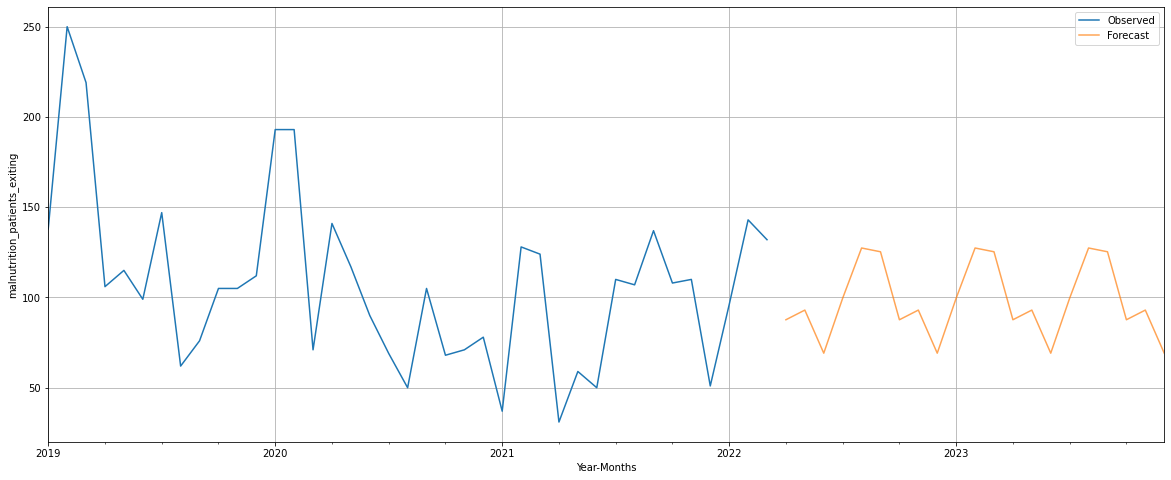

In [1216]:
axis = malnutrition_patients_exiting['malnutrition_patients_exiting'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('malnutrition_patients_exiting')
plt.legend(loc='best')
plt.grid();

# *HIV_patients_newly_enrolled* 

In [1217]:
HIV_patients_newly_enrolled = df[['HIV_patients_newly_enrolled']]
HIV_patients_newly_enrolled

HIV_patients_newly_enrolled
Time_Stamp                             
2019-01-31                         38.0
2019-02-28                         47.0
2019-03-31                         35.0
2019-04-30                         39.0
2019-05-31                         56.0
2019-06-30                         39.0
2019-07-31                         43.0
2019-08-31                         37.0
2019-09-30                         40.0
2019-10-31                         42.0
2019-11-30                         42.0
2019-12-31                         42.0
2020-01-31                         41.0
2020-02-29                         35.0
2020-03-31                         27.0
2020-04-30                         24.0
2020-05-31                         25.0
2020-06-30                         39.0
2020-07-31                         34.0
2020-08-31                         32.0
2020-09-30                         37.0
2020-10-31                         31.0
2020-11-30                         20.0
2020-12-31                         27.0
2021-01-31                         25.0
2021-02-28                         21.0
2021-03-31                         14.0
2021-04-30                         23.0
2021-05-31                         17.0
2021-06-30                         23.0
2021-07-31                         28.0
2021-08-31                         19.0
2021-09-30                         11.0
2021-10-31                         24.0
2021-11-30                         19.0
2021-12-31                         15.0
2022-01-31                         10.0
2022-02-28                         11.0
2022-03-31                         10.0

In [1218]:
df7=HIV_patients_newly_enrolled.copy()

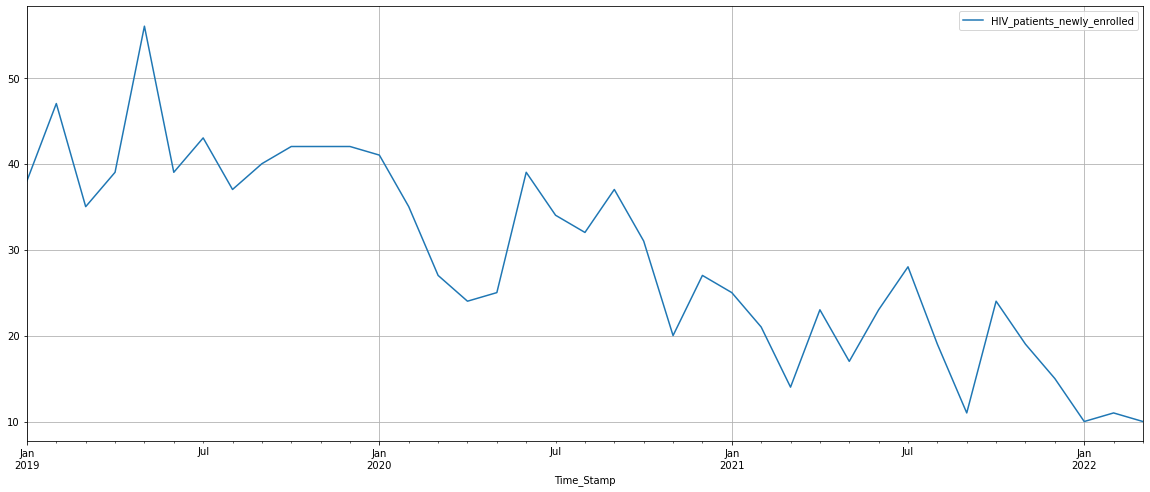

In [1219]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df7 .plot(grid=True);

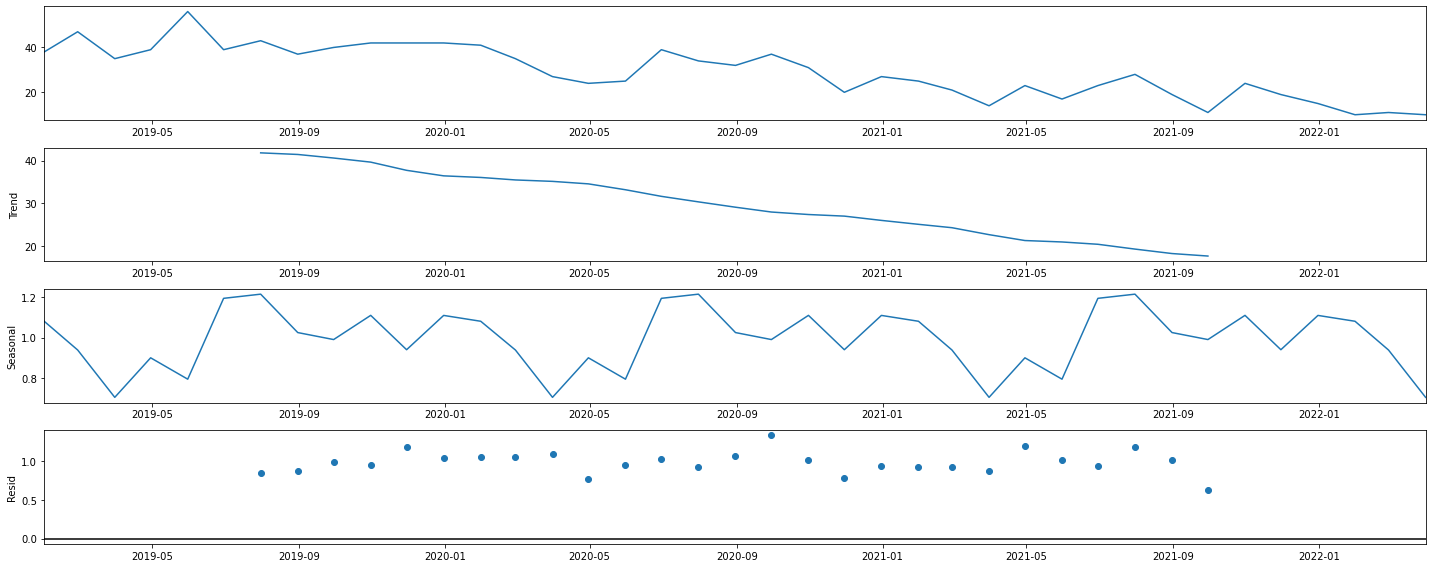

In [1220]:
decomposition = seasonal_decompose(df7,model='multiplicative')
decomposition.plot();

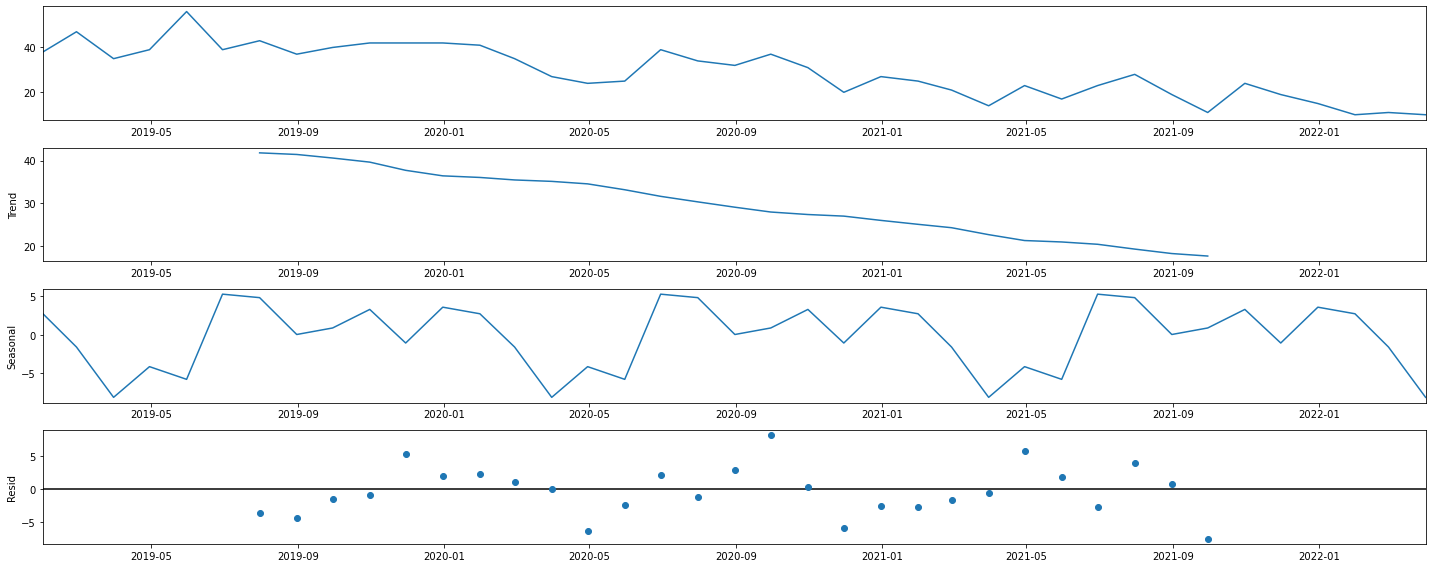

In [1221]:
decomposition = seasonal_decompose(df7,model='additive')
decomposition.plot();

In [1222]:
df7.describe()

HIV_patients_newly_enrolled
count                    39.000000
mean                     29.282051
std                      11.562072
min                      10.000000
25%                      20.500000
50%                      28.000000
75%                      39.000000
max                      56.000000

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1223]:
df7test = adfuller(df7,regression='ct')
print('DF test statistic is %3.3f' %df7test[0])
print('DF test p-value is' ,df7test[1])
print('Number of lags used' ,df7test[2])


DF test statistic is -3.835
DF test p-value is 0.01487017498875162
Number of lags used 10


Observation:

* The data is stationary at 95% confidence level.

## Split the data into train and test and plot the training and test data.

In [1224]:
train_size = int(len(df7) * 0.8)
train=df7[0:train_size] 
test=df7[train_size:]

In [1225]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

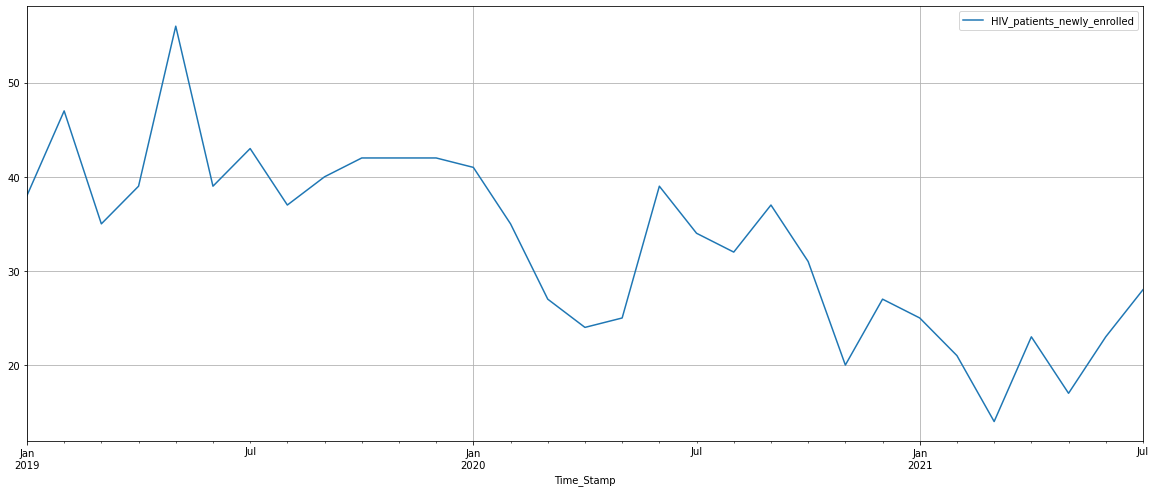

In [1226]:
train.plot(grid=True);

In [1227]:
df7 = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df7test[0])
print('DF test p-value is' ,df7test[1])
print('Number of lags used' ,df7test[2])

DF test statistic is -3.835
DF test p-value is 0.01487017498875162
Number of lags used 10


Observation:

* The training data is stationary at 95% confidence level.

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, ]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df7.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 18.475
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 18.475
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 18.475
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 18.475
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 18.475
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 11.196
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 12.433
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 7.762
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 16.424
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 7.533
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 6.886
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 11.121
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 12.031
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 7.847
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 6.941
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 11.333
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 10.500
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 6.569
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 5.290
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 7.972
 > Model[[(0, 0, 0), (1, 0, 0, 12), 

In [1228]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 0, 4)(0, 0, 4, 6)
Model: (1, 0, 0)(1, 0, 0, 6)
Model: (1, 0, 1)(1, 0, 1, 6)
Model: (1, 0, 2)(1, 0, 2, 6)
Model: (1, 0, 3)(1, 0, 3, 6)
Model: (1, 0, 4)(1, 0, 4, 6)
Model: (2, 0, 0)(2, 0, 0, 6)
Model: (2, 0, 1)(2, 0, 1, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 0, 3)(2, 0, 3, 6)
Model: (2, 0, 4)(2, 0, 4, 6)
Model: (3, 0, 0)(3, 0, 0, 6)
Model: (3, 0, 1)(3, 0, 1, 6)
Model: (3, 0, 2)(3, 0, 2, 6)
Model: (3, 0, 3)(3, 0, 3, 6)
Model: (3, 0, 4)(3, 0, 4, 6)
Model: (4, 0, 0)(4, 0, 0, 6)
Model: (4, 0, 1)(4, 0, 1, 6)
Model: (4, 0, 2)(4, 0, 2, 6)
Model: (4, 0, 3)(4, 0, 3, 6)
Model: (4, 0, 4)(4, 0, 4, 6)


In [1229]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [491]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['HIV_patients_newly_enrolled'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:299.0884833666311
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:222.07738174536144
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:158.77558993903054
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:110.44588937520223
SARIMA(0, 0, 0)x(0, 0, 4, 6) - AIC:63.81525557183562
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:177.76475554018572
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:165.21911097075377
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:120.51836022240998
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:86.45052933558604
SARIMA(0, 0, 0)x(1, 0, 4, 6) - AIC:52.113099535837094
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:130.83770500866578
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:129.3583901906192
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:122.26558261162138
SARIMA(0, 0, 0)x(2, 0, 3, 6) - AIC:84.72515380594739
SARIMA(0, 0, 0)x(2, 0, 4, 6) - AIC:48.33627814540992
SARIMA(0, 0, 0)x(3, 0, 0, 6) - AIC:87.13117068280124
SARIMA(0, 0, 0)x(3, 0, 1, 6) - AIC:87.00857159140972
SARIMA(0, 0, 0)x(3, 0, 2, 6) - AIC:88.83014919927729
SARIMA(0, 0, 0)x(3, 0, 3, 6) - AIC:86

SARIMA(1, 0, 1)x(0, 0, 4, 6) - AIC:43.811164706718685
SARIMA(1, 0, 1)x(1, 0, 0, 6) - AIC:159.81095280215257
SARIMA(1, 0, 1)x(1, 0, 1, 6) - AIC:155.25494860181746
SARIMA(1, 0, 1)x(1, 0, 2, 6) - AIC:118.72013088287832
SARIMA(1, 0, 1)x(1, 0, 3, 6) - AIC:82.4143425526823
SARIMA(1, 0, 1)x(1, 0, 4, 6) - AIC:45.72077160897861
SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:125.05949649676141
SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:123.85414412544971
SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:120.66722240298454
SARIMA(1, 0, 1)x(2, 0, 3, 6) - AIC:79.26770511965131
SARIMA(1, 0, 1)x(2, 0, 4, 6) - AIC:47.0174050733238
SARIMA(1, 0, 1)x(3, 0, 0, 6) - AIC:81.49574623676948
SARIMA(1, 0, 1)x(3, 0, 1, 6) - AIC:81.88333058952396
SARIMA(1, 0, 1)x(3, 0, 2, 6) - AIC:83.8239775587621
SARIMA(1, 0, 1)x(3, 0, 3, 6) - AIC:81.28138154427774
SARIMA(1, 0, 1)x(3, 0, 4, 6) - AIC:48.22373855027971
SARIMA(1, 0, 1)x(4, 0, 0, 6) - AIC:36.32045392521475
SARIMA(1, 0, 1)x(4, 0, 1, 6) - AIC:38.09028108216796
SARIMA(1, 0, 1)x(4, 0, 2, 6) - AIC:48.8203

SARIMA(2, 0, 2)x(1, 0, 3, 6) - AIC:72.14305377905482
SARIMA(2, 0, 2)x(1, 0, 4, 6) - AIC:33.813709694930544
SARIMA(2, 0, 2)x(2, 0, 0, 6) - AIC:116.12245522574072
SARIMA(2, 0, 2)x(2, 0, 1, 6) - AIC:114.9681043342757
SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:117.84643553309607
SARIMA(2, 0, 2)x(2, 0, 3, 6) - AIC:73.13965938864439
SARIMA(2, 0, 2)x(2, 0, 4, 6) - AIC:-39.79181438857375
SARIMA(2, 0, 2)x(3, 0, 0, 6) - AIC:78.7062770532477
SARIMA(2, 0, 2)x(3, 0, 1, 6) - AIC:75.82065737629446
SARIMA(2, 0, 2)x(3, 0, 2, 6) - AIC:80.74577517311266
SARIMA(2, 0, 2)x(3, 0, 3, 6) - AIC:77.73337127355961
SARIMA(2, 0, 2)x(3, 0, 4, 6) - AIC:-36.119065066708075
SARIMA(2, 0, 2)x(4, 0, 0, 6) - AIC:-49.96196795926116
SARIMA(2, 0, 2)x(4, 0, 1, 6) - AIC:-33.775628071184414
SARIMA(2, 0, 2)x(4, 0, 2, 6) - AIC:-12.535475041921373
SARIMA(2, 0, 2)x(4, 0, 3, 6) - AIC:-2.1902748816072446
SARIMA(2, 0, 2)x(4, 0, 4, 6) - AIC:-30.205530676160386
SARIMA(2, 0, 3)x(0, 0, 0, 6) - AIC:183.61735852350387
SARIMA(2, 0, 3)x(0, 0, 1, 6) - 

SARIMA(3, 0, 3)x(2, 0, 1, 6) - AIC:118.53576320814615
SARIMA(3, 0, 3)x(2, 0, 2, 6) - AIC:106.30043254648304
SARIMA(3, 0, 3)x(2, 0, 3, 6) - AIC:58.62606761551367
SARIMA(3, 0, 3)x(2, 0, 4, 6) - AIC:-20.749180880550995
SARIMA(3, 0, 3)x(3, 0, 0, 6) - AIC:54.40819233914545
SARIMA(3, 0, 3)x(3, 0, 1, 6) - AIC:54.40600558623276
SARIMA(3, 0, 3)x(3, 0, 2, 6) - AIC:65.51975041431723
SARIMA(3, 0, 3)x(3, 0, 3, 6) - AIC:54.481664292887764
SARIMA(3, 0, 3)x(3, 0, 4, 6) - AIC:-18.116173241375016
SARIMA(3, 0, 3)x(4, 0, 0, 6) - AIC:-36.58330216610932
SARIMA(3, 0, 3)x(4, 0, 1, 6) - AIC:-26.19850837576432
SARIMA(3, 0, 3)x(4, 0, 2, 6) - AIC:-23.672427014185104
SARIMA(3, 0, 3)x(4, 0, 3, 6) - AIC:-25.54805933814675
SARIMA(3, 0, 3)x(4, 0, 4, 6) - AIC:-15.74634955569497
SARIMA(3, 0, 4)x(0, 0, 0, 6) - AIC:171.02879365828
SARIMA(3, 0, 4)x(0, 0, 1, 6) - AIC:140.9524441885012
SARIMA(3, 0, 4)x(0, 0, 2, 6) - AIC:105.21592908672791
SARIMA(3, 0, 4)x(0, 0, 3, 6) - AIC:60.380680280750006
SARIMA(3, 0, 4)x(0, 0, 4, 6) - AI

SARIMA(4, 0, 4)x(2, 0, 4, 6) - AIC:0.44423476678754525
SARIMA(4, 0, 4)x(3, 0, 0, 6) - AIC:54.7109387463671
SARIMA(4, 0, 4)x(3, 0, 1, 6) - AIC:55.115819184477076
SARIMA(4, 0, 4)x(3, 0, 2, 6) - AIC:50.20261865985808
SARIMA(4, 0, 4)x(3, 0, 3, 6) - AIC:45.290577772567815
SARIMA(4, 0, 4)x(3, 0, 4, 6) - AIC:24.31735011842366
SARIMA(4, 0, 4)x(4, 0, 0, 6) - AIC:29.105596180454484
SARIMA(4, 0, 4)x(4, 0, 1, 6) - AIC:-19.087721407774296
SARIMA(4, 0, 4)x(4, 0, 2, 6) - AIC:-11.999366034317909
SARIMA(4, 0, 4)x(4, 0, 3, 6) - AIC:-10.22427566785904
SARIMA(4, 0, 4)x(4, 0, 4, 6) - AIC:6.191202883477594
CPU times: total: 17min
Wall time: 17min 19s


In [492]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
514  (4, 0, 0)  (2, 0, 4, 6) -58.842763
544  (4, 0, 1)  (3, 0, 4, 6) -55.622568
320  (2, 0, 2)  (4, 0, 0, 6) -49.961968
519  (4, 0, 0)  (3, 0, 4, 6) -49.249607
539  (4, 0, 1)  (2, 0, 4, 6) -44.082985

In [1230]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['HIV_patients_newly_enrolled'],
                                order=(0, 0, 2),
                                seasonal_order=(1, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:        HIV_patients_newly_enrolled   No. Observations:                   31
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 6)   Log Likelihood                 -85.084
Date:                            Tue, 18 Oct 2022   AIC                            178.168
Time:                                    10:58:27   BIC                            183.043
Sample:                                01-31-2019   HQIC                           179.520
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         86.0819   4263.260      0.020      0.984   -8269.754    8441.918
ma.L2        190.6073   9492.038   

In [1231]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1232]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

HIV_patients_newly_enrolled       mean   mean_se  mean_ci_lower  mean_ci_upper
2021-08-31                   20.458162  7.243524       6.261115      34.655209
2021-09-30                   11.632712  7.947965      -3.945014      27.210437
2021-10-31                   19.052556  7.948056       3.474653      34.630460
2021-11-30                   14.082324  7.948056      -1.495579      29.660228
2021-12-31                   19.052556  7.948056       3.474653      34.630460

In [1233]:
rmse = mean_squared_error(test['HIV_patients_newly_enrolled'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['HIV_patients_newly_enrolled'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 5.886445309571786 
MAPE: 34.573217534442755


## Building the most optimum model on the Full Data.

In [1234]:
full_data_model = sm.tsa.statespace.SARIMAX(HIV_patients_newly_enrolled['HIV_patients_newly_enrolled'],
                                 order=(0, 0, 2),
                                seasonal_order=(1, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:        HIV_patients_newly_enrolled   No. Observations:                   39
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 6)   Log Likelihood                -109.686
Date:                            Tue, 18 Oct 2022   AIC                            227.372
Time:                                    10:58:45   BIC                            233.358
Sample:                                01-31-2019   HQIC                           229.386
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4998      0.225      2.226      0.026       0.060       0.940
ma.L2         -0.0423      0.223   

In [1235]:
predicted_manual_ARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1236]:
pred_full_manual_ARIMA_date = predicted_manual_ARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_ARIMA_date.head(30)

HIV_patients_newly_enrolled       mean    mean_se  mean_ci_lower  \
2022-04-30                   19.776172   6.685975       6.671902   
2022-05-31                   15.509648   7.474663       0.859577   
2022-06-30                   12.256688   7.480003      -2.403848   
2022-07-31                    8.171125   7.480003      -6.489411   
2022-08-31                    8.988238   7.480003      -5.672298   
2022-09-30                    8.171125   7.480003      -6.489411   
2022-10-31                   16.159358   9.262663      -1.995128   
2022-11-30                   12.673127   9.656796      -6.253846   
2022-12-31                   10.015093   9.659556      -8.917290   
2023-01-31                    6.676729   9.659556     -12.255654   
2023-02-28                    7.344401   9.659556     -11.587981   
2023-03-31                    6.676729   9.659556     -12.255654   
2023-04-30                   13.204013  10.641180      -7.652317   
2023-05-31                   10.355371  10.872599     -10.954532   
2023-06-30                    8.183458  10.874236     -13.129653   
2023-07-31                    5.455638  10.874236     -15.857473   
2023-08-31                    6.001202  10.874236     -15.311909   
2023-09-30                    5.455638  10.874236     -15.857473   
2023-10-31                   10.789164  11.469707     -11.691049   
2023-11-30                    8.461503  11.613713     -14.300956   
2023-12-31                    6.686806  11.614736     -16.077659   

HIV_patients_newly_enrolled  mean_ci_upper  
2022-04-30                       32.880442  
2022-05-31                       30.159719  
2022-06-30                       26.917223  
2022-07-31                       22.831661  
2022-08-31                       23.648773  
2022-09-30                       22.831661  
2022-10-31                       34.313843  
2022-11-30                       31.600101  
2022-12-31                       28.947475  
2023-01-31                       25.609111  
2023-02-28                       26.276784  
2023-03-31                       25.609111  
2023-04-30                       34.060343  
2023-05-31                       31.665274  
2023-06-30                       29.496569  
2023-07-31                       26.768749  
2023-08-31                       27.314313  
2023-09-30                       26.768749  
2023-10-31                       33.269378  
2023-11-30                       31.223962  
2023-12-31                       29.451270

In [1237]:
rmse = mean_squared_error(HIV_patients_newly_enrolled['HIV_patients_newly_enrolled'],results_full_data_model.fittedvalues,squared=False)
print('HIV_patients_newly_enrolled',rmse)

HIV_patients_newly_enrolled 17.950390872107995


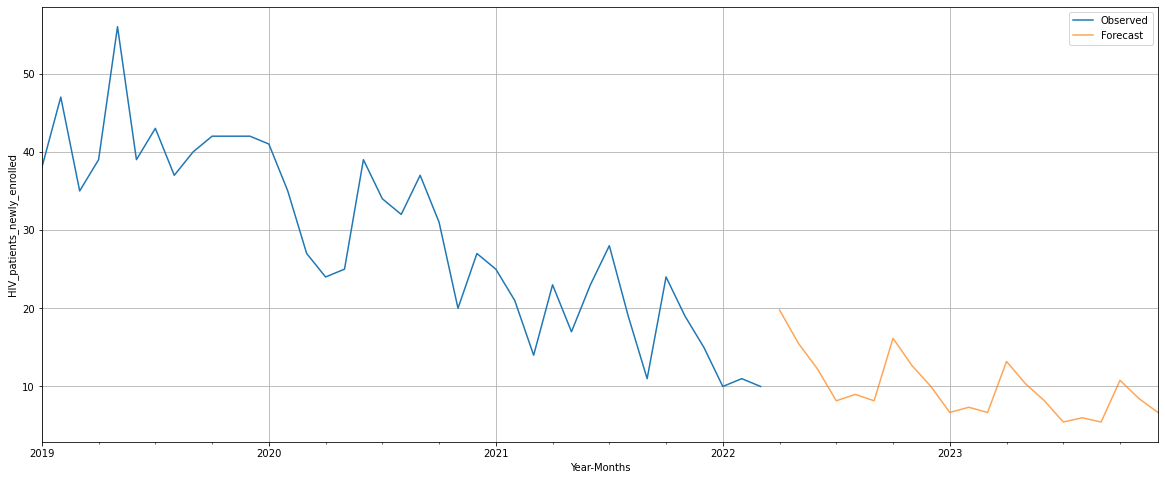

In [1238]:
axis = HIV_patients_newly_enrolled['HIV_patients_newly_enrolled'].plot(label='Observed')
pred_full_manual_ARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('HIV_patients_newly_enrolled')
plt.legend(loc='best')
plt.grid();

# mental_health_patients_currently_in_care

In [1239]:
mental_health_patients_currently_in_care=df[['mental_health_patients_currently_in_care']]
mental_health_patients_currently_in_care

mental_health_patients_currently_in_care
Time_Stamp                                          
2019-01-31                                     693.0
2019-02-28                                     655.0
2019-03-31                                     590.0
2019-04-30                                     608.0
2019-05-31                                     772.0
2019-06-30                                     683.0
2019-07-31                                     683.0
2019-08-31                                     592.0
2019-09-30                                     546.0
2019-10-31                                     647.0
2019-11-30                                     647.0
2019-12-31                                     647.0
2020-01-31                                    5201.0
2020-02-29                                    5146.0
2020-03-31                                    5269.0
2020-04-30                                    5445.0
2020-05-31                                    6018.0
2020-06-30                                    6151.0
2020-07-31                                    6256.0
2020-08-31                                    6367.0
2020-09-30                                    6290.0
2020-10-31                                    6542.0
2020-11-30                                    6525.0
2020-12-31                                    6521.0
2021-01-31                                    6541.0
2021-02-28                                    6553.0
2021-03-31                                    6591.0
2021-04-30                                    5987.0
2021-05-31                                    6003.0
2021-06-30                                    6020.0
2021-07-31                                    6991.0
2021-08-31                                    7077.0
2021-09-30                                    7152.0
2021-10-31                                    7423.0
2021-11-30                                    7479.0
2021-12-31                                    7528.0
2022-01-31                                    7258.0
2022-02-28                                    7334.0
2022-03-31                                    7369.0

In [1240]:
mental_health_patients_currently_in_care.isnull().sum()

mental_health_patients_currently_in_care    0
dtype: int64

In [1241]:
df8=mental_health_patients_currently_in_care.copy()

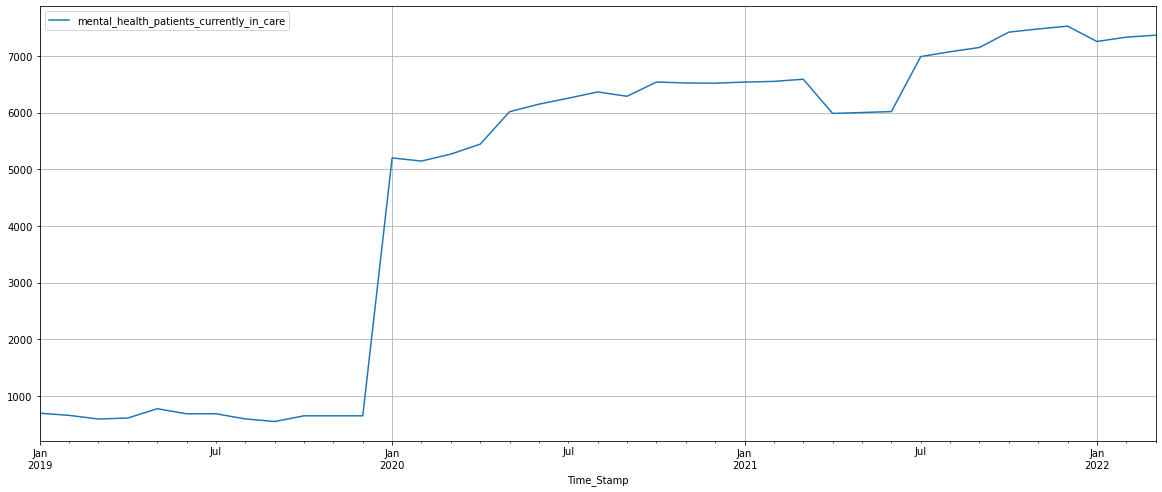

In [1242]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df8.plot(grid=True);

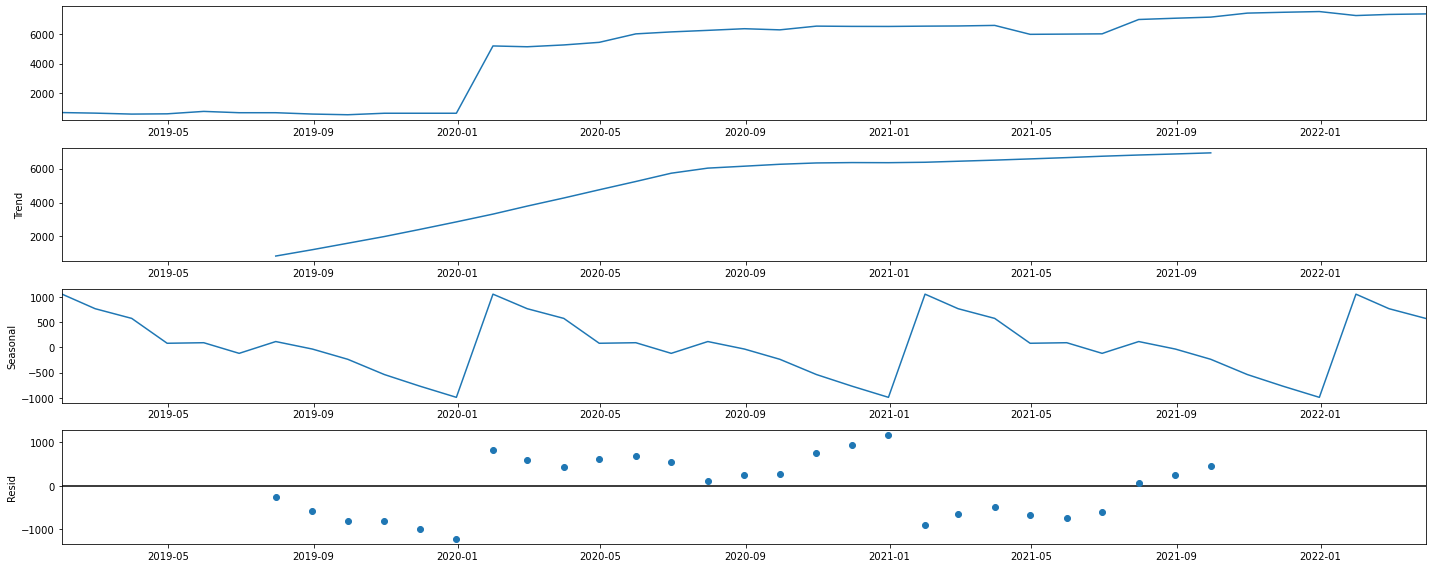

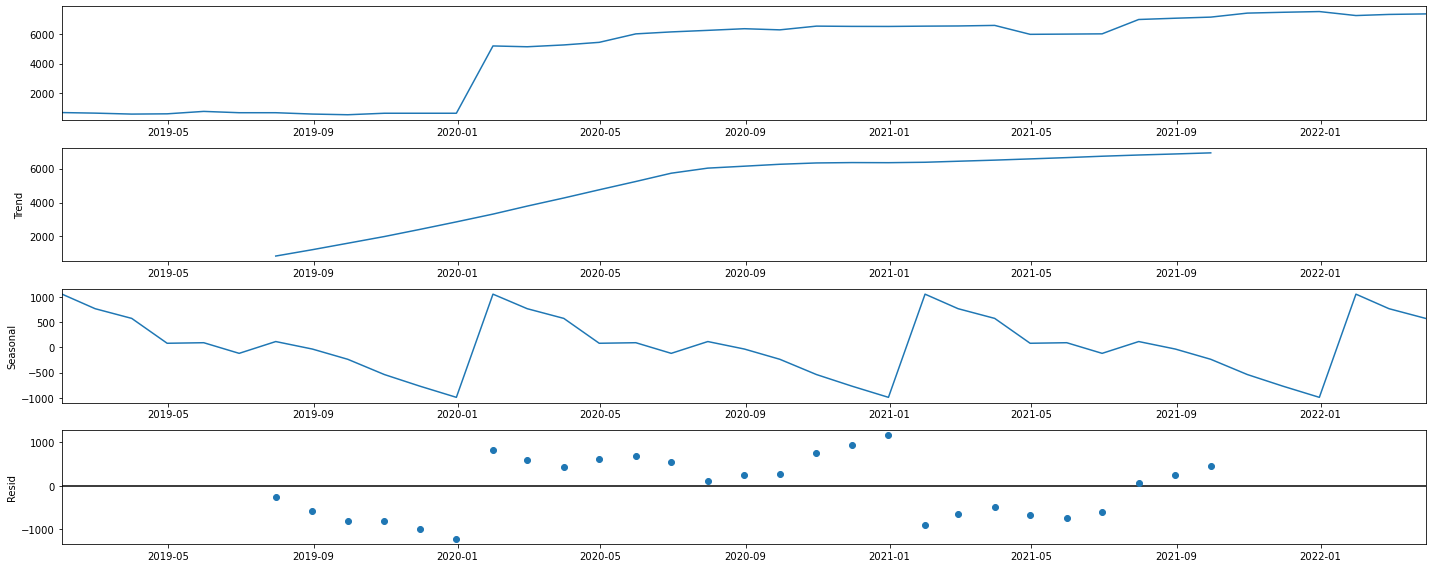

In [1243]:
decomposition= seasonal_decompose(mental_health_patients_currently_in_care,model='additive')
decomposition.plot()


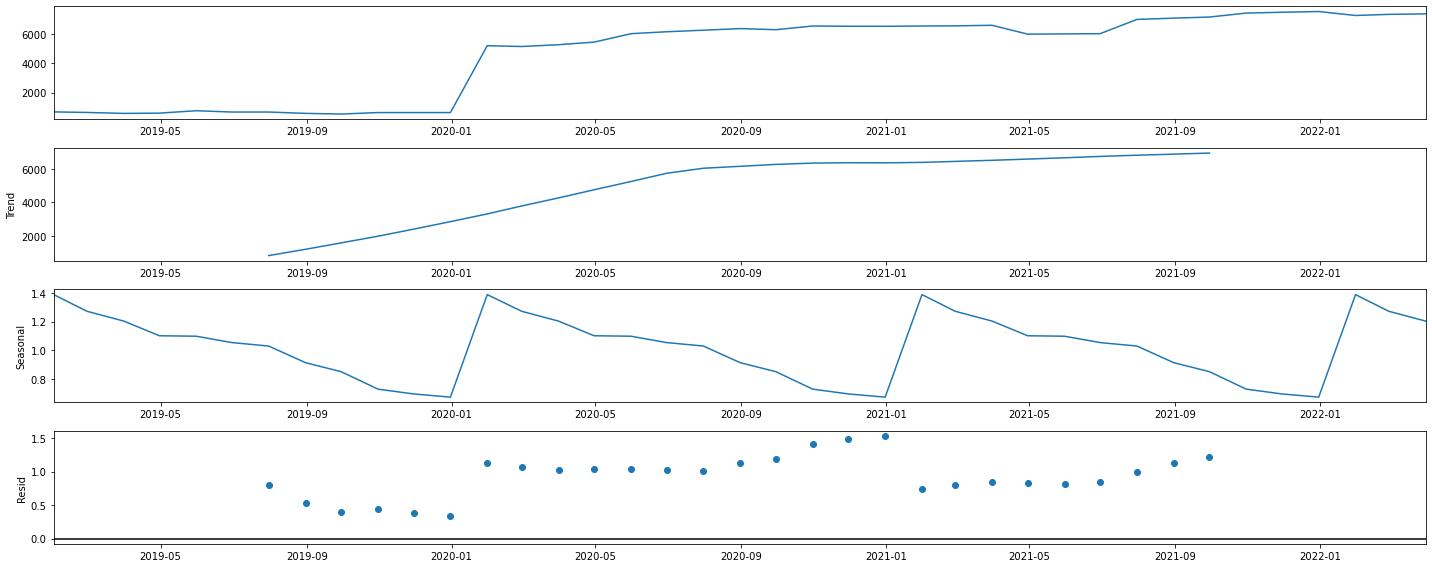

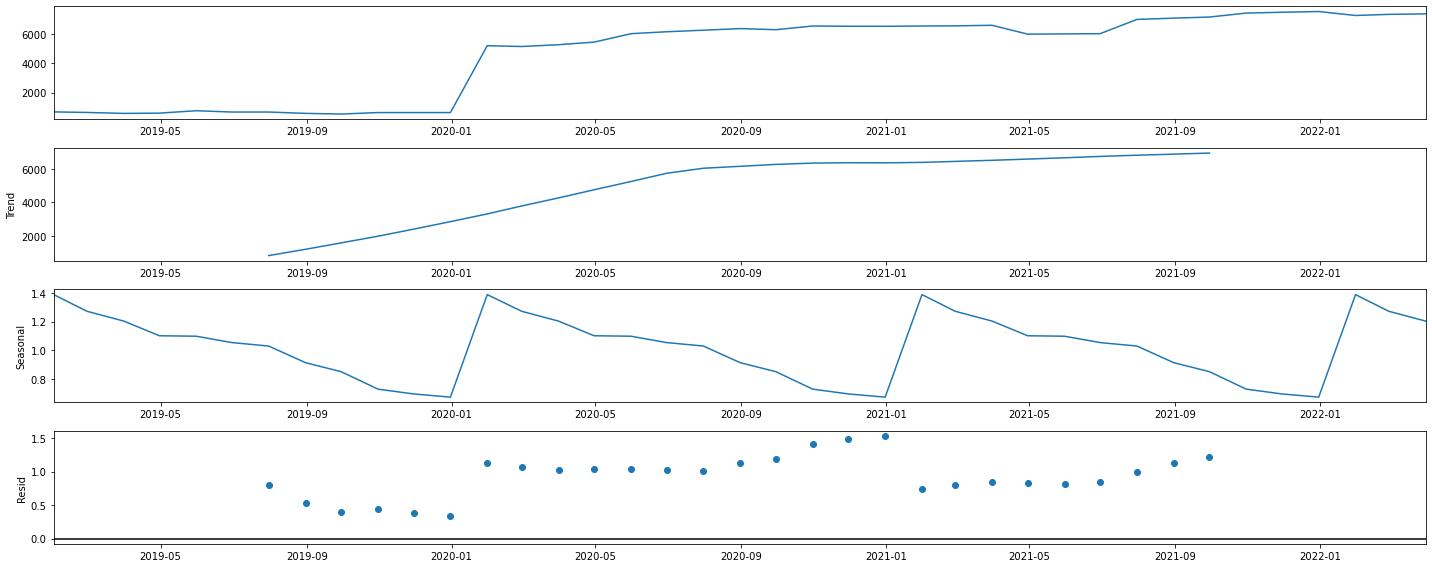

In [1244]:
decomposition=seasonal_decompose(mental_health_patients_currently_in_care,model='multiplicative')
decomposition.plot()

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1245]:
df8test = adfuller(df8,regression='ct')
print('DF test statistic is %3.3f' %df8test[0])
print('DF test p-value is' ,df8test[1])
print('Number of lags used' ,df8test[2])

DF test statistic is -1.636
DF test p-value is 0.778093027745147
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1246]:
df8test = adfuller(df8.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df8test[0])
print('DF test p-value is' ,df8test[1])
print('Number of lags used' ,df8test[2])

DF test statistic is -6.229
DF test p-value is 7.152356548137369e-07
Number of lags used 0


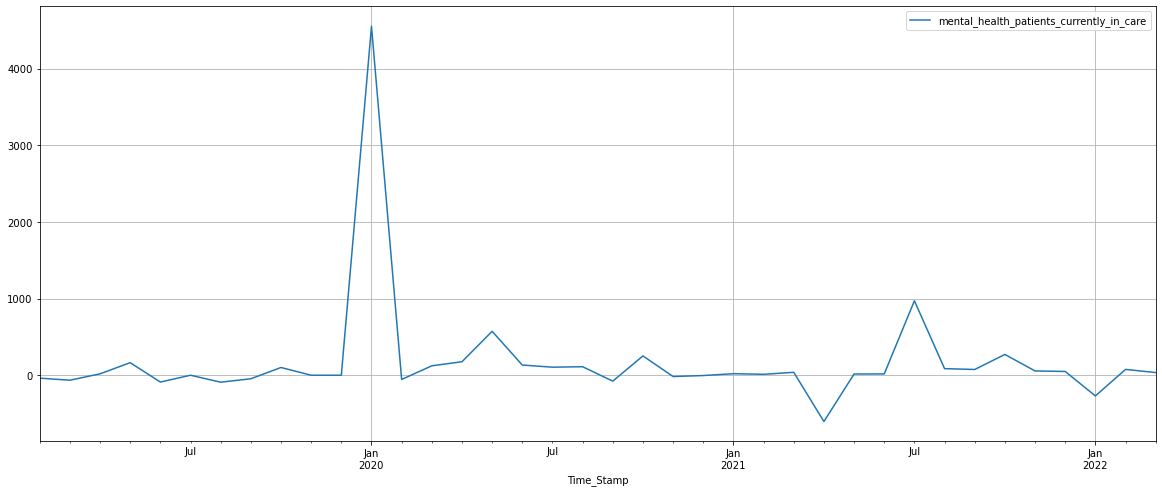

In [1247]:
df8.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1248]:
train_size = int(len(df8) * 0.8)
train=df8[0:train_size] 
test=df8[train_size:]

In [1249]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

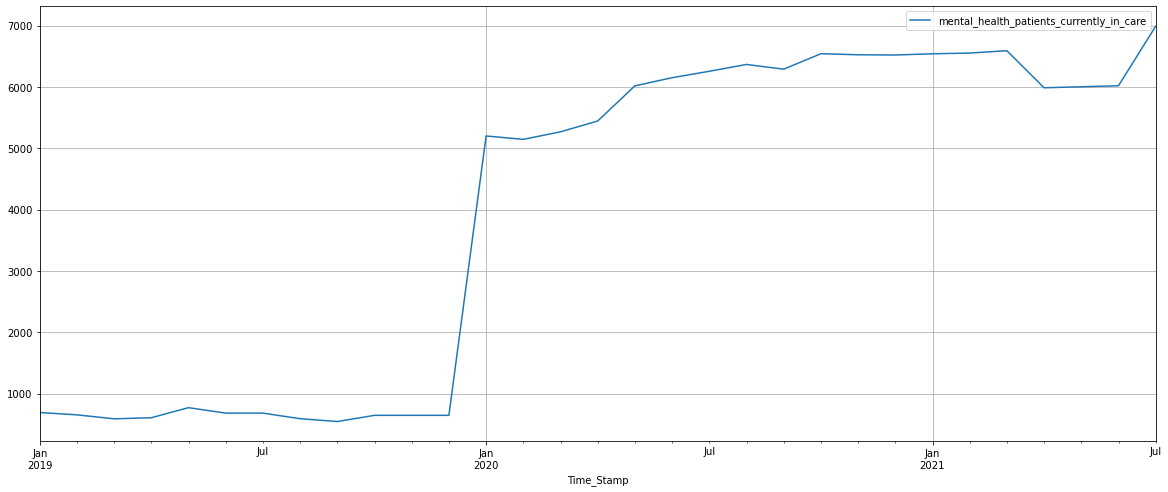

In [1250]:
train.plot(grid=True);

In [1251]:
df8test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df8test[0])
print('DF test p-value is' ,df8test[1])
print('Number of lags used' ,df8test[2])

DF test statistic is -1.768
DF test p-value is 0.7201922108619653
Number of lags used 0


Observation:

* The training data is non-stationary at 95% confidence level

In [1252]:
df8test = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df8test[0])
print('DF test p-value is' ,df8test[1])
print('Number of lags used' ,df8test[2])

DF test statistic is -5.358
DF test p-value is 4.3779451418693694e-05
Number of lags used 0


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, ]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, ]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df8.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 6992.288 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 6992.288

 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 6992.288 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 6992.288

 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 6992.288
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 4093.525
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 4080.350
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 705.231
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 6389.722
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 832.790
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 854.571
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 737.574
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 3872.192
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 745.567
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 853.893
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 923.137
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 746.341
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 886.746
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 974.134
 > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 1768.51

In [1253]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [1254]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [626]:
%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['mental_health_patients_currently_in_care'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

CPU times: total: 0 ns
Wall time: 0 ns
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:477.71401131661224
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:248.88454300766557
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:82.55806117728557
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:262.2796820620329
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:250.8746705240418
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:84.55500578139635
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:96.74746308310637
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:98.747463083854
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:86.5344686595511
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 1, 0)x(4, 0, 0, 1

SARIMA(1, 1, 2)x(0, 0, 4, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:250.11079912765942
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:224.56976641633074
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:58.31785989132558
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:83.7923559521003
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:85.89256910194965
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:62.91913748512087
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:439.18266857169044
SARIM

SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:8.141899618856558
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:73.40539151774276
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:20.446216892205182
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:452.7696580686185
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:254.27576371050878
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:77.02386806944918
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:222.7795439670315
SARIM

SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:442.9176559686442
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:217.3604879652936
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:6.579651868732997
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:210.9383019921453
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:211.83368509436082
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:49.4581031944599
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:21.34749053696668
SARIMA(

In [627]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
285  (2, 1, 1)  (2, 0, 0, 12) -15.592301
385  (3, 1, 0)  (2, 0, 0, 12) -14.581059
286  (2, 1, 1)  (2, 0, 1, 12) -11.862627
287  (2, 1, 1)  (2, 0, 2, 12)  -9.826392
386  (3, 1, 0)  (2, 0, 1, 12)  -8.955224

In [1272]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['mental_health_patients_currently_in_care'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                          SARIMAX Results                                           
Dep. Variable:     mental_health_patients_currently_in_care   No. Observations:                   31
Model:                        SARIMAX(1, 0, 1)x(1, 0, 1, 6)   Log Likelihood                -188.577
Date:                                      Tue, 18 Oct 2022   AIC                            387.154
Time:                                              11:03:27   BIC                            392.832
Sample:                                          01-31-2019   HQIC                           388.582
                                               - 07-31-2021                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0101      0.125  

## Predict on the Test Set using this model and evaluate the model.

In [1273]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1274]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

mental_health_patients_currently_in_care         mean      mean_se  \
2021-08-31                                7048.578230   820.596966   
2021-09-30                                7126.749287  1156.391832   
2021-10-31                                7282.604779  1419.336978   
2021-11-30                                7367.396112  1644.840854   
2021-12-31                                7443.295513  1846.746185   

mental_health_patients_currently_in_care  mean_ci_lower  mean_ci_upper  
2021-08-31                                  5440.237731    8656.918728  
2021-09-30                                  4860.262944    9393.235629  
2021-10-31                                  4500.755419   10064.454139  
2021-11-30                                  4143.567278   10591.224945  
2021-12-31                                  3823.739502   11062.851524

In [1275]:
rmse = mean_squared_error(test['mental_health_patients_currently_in_care'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['mental_health_patients_currently_in_care'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 200.89362910298993 
MAPE: 2.2250517375241765


## Building the most optimum model on the Full Data.

In [1282]:
full_data_model = sm.tsa.statespace.SARIMAX(mental_health_patients_currently_in_care['mental_health_patients_currently_in_care'],
                                rder=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                          SARIMAX Results                                           
Dep. Variable:     mental_health_patients_currently_in_care   No. Observations:                   39
Model:                      SARIMAX(1, 0, 0)x(1, 0, [1], 6)   Log Likelihood                -257.140
Date:                                      Tue, 18 Oct 2022   AIC                            522.279
Time:                                              11:04:37   BIC                            528.142
Sample:                                          01-31-2019   HQIC                           524.223
                                               - 03-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0092      0.119  

## Evaluate the model on the whole data and predict 21 months into the future (till the end of next year).

In [1283]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1284]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

mental_health_patients_currently_in_care         mean      mean_se  \
2022-04-30                                7467.819611   786.864958   
2022-05-31                                7541.328214  1117.901141   
2022-06-30                                7615.703742  1375.445030   
2022-07-31                                7713.699971  1595.558855   
2022-08-31                                7780.329671  1790.067801   
2022-09-30                                7861.789726  1968.499898   
2022-10-31                                7953.380780  2078.884510   
2022-11-30                                8029.413035  2185.577395   
2022-12-31                                8106.262712  2289.127842   
2023-01-31                                8198.164322  2389.976560   
2023-02-28                                8270.727095  2485.917216   
2023-03-31                                8352.848739  2579.958616   
2023-04-30                                8441.592498  2647.867470   
2023-05-31                                8520.892580  2715.280595   
2023-06-30                                8600.994589  2782.255616   
2023-07-31                                8690.804562  2848.844906   
2023-08-31                                8768.814510  2913.122883   
2023-09-30                                8853.102026  2977.157347   
2023-10-31                                8941.832972  3028.487660   
2023-11-30                                9024.961302  3079.883136   
2023-12-31                                9108.898206  3131.357223   

mental_health_patients_currently_in_care  mean_ci_lower  mean_ci_upper  
2022-04-30                                  5925.592633    9010.046589  
2022-05-31                                  5350.282239    9732.374190  
2022-06-30                                  4919.881019   10311.526464  
2022-07-31                                  4586.462081   10840.937861  
2022-08-31                                  4271.861251   11288.798091  
2022-09-30                                  4003.600822   11719.978630  
2022-10-31                                  3878.842012   12027.919548  
2022-11-30                                  3745.760055   12313.066016  
2022-12-31                                  3619.654586   12592.870839  
2023-01-31                                  3513.896339   12882.432304  
2023-02-28                                  3398.418883   13143.035306  
2023-03-31                                  3296.222770   13409.474707  
2023-04-30                                  3251.867621   13631.317376  
2023-05-31                                  3199.040406   13842.744755  
2023-06-30                                  3147.873787   14054.115392  
2023-07-31                                  3107.171149   14274.437975  
2023-08-31                                  3059.198576   14478.430443  
2023-09-30                                  3017.980849   14688.223204  
2023-10-31                                  3006.106230   14877.559714  
2023-11-30                                  2988.501280   15061.421325  
2023-12-31                                  2971.550827   15246.245586

In [1285]:
rmse = mean_squared_error(mental_health_patients_currently_in_care['mental_health_patients_currently_in_care'],results_full_data_model.fittedvalues,squared=False)
print('mental_health_patients_currently_in_care',rmse)

mental_health_patients_currently_in_care 746.7857533666352


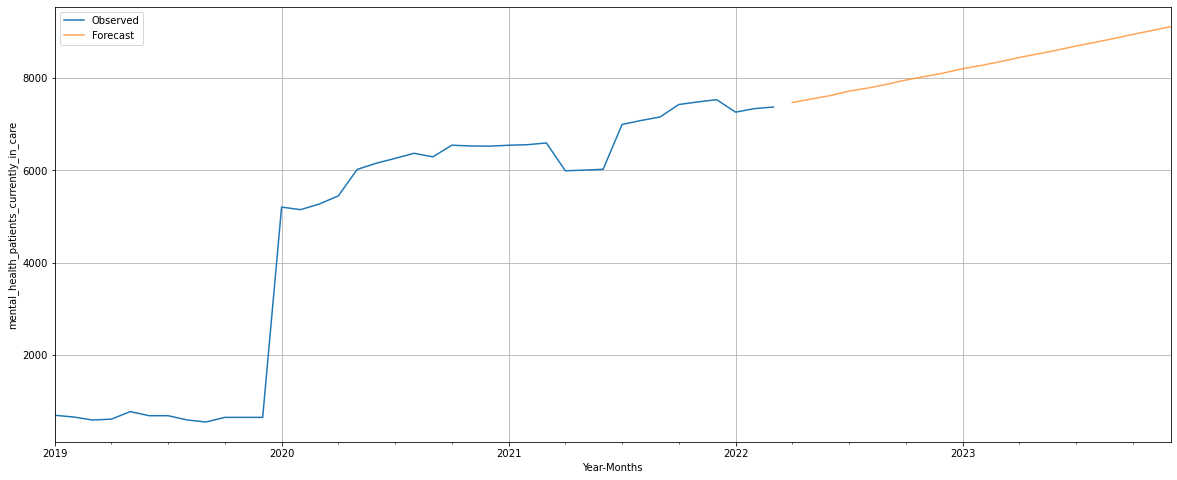

In [1286]:
axis = mental_health_patients_currently_in_care['mental_health_patients_currently_in_care'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('mental_health_patients_currently_in_care')
plt.legend(loc='best')
plt.grid();

# NAC_Visits

In [1289]:
ANC_visits=df[['ANC_visits']]
ANC_visits

ANC_visits
Time_Stamp            
2019-01-31      2039.0
2019-02-28      1741.0
2019-03-31      1895.0
2019-04-30      2267.0
2019-05-31      2139.0
2019-06-30      1677.0
2019-07-31      1791.0
2019-08-31      1585.0
2019-09-30      1761.0
2019-10-31      1920.0
2019-11-30      1894.0
2019-12-31      1874.0
2020-01-31      1853.0
2020-02-29      1608.0
2020-03-31      2015.0
2020-04-30      2133.0
2020-05-31      2196.0
2020-06-30      2320.0
2020-07-31      2111.0
2020-08-31      2272.0
2020-09-30      2458.0
2020-10-31      2276.0
2020-11-30      2465.0
2020-12-31      2539.0
2021-01-31      2383.0
2021-02-28      2448.0
2021-03-31      3055.0
2021-04-30      2492.0
2021-05-31      2477.0
2021-06-30      2657.0
2021-07-31      2413.0
2021-08-31      2756.0
2021-09-30      2927.0
2021-10-31      2740.0
2021-11-30      2777.0
2021-12-31      2919.0
2022-01-31      2708.0
2022-02-28      2374.0
2022-03-31      2904.0

In [1290]:
df9=ANC_visits.copy()

In [1291]:
df9.describe()

ANC_visits
count    39.000000
mean   2278.435897
std     403.533850
min    1585.000000
25%    1907.500000
50%    2276.000000
75%    2515.500000
max    3055.000000

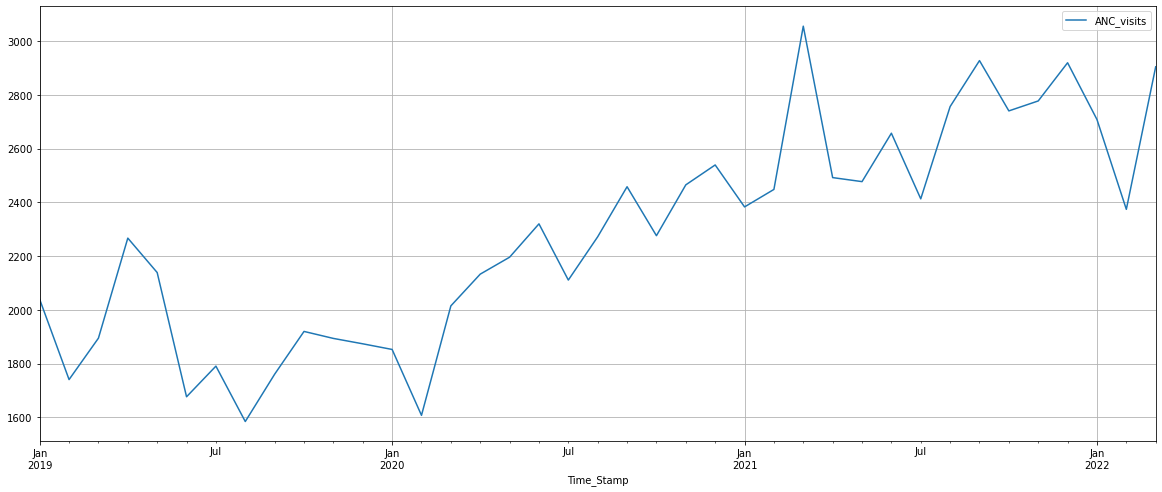

In [1292]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

ANC_visits.plot(grid=True);

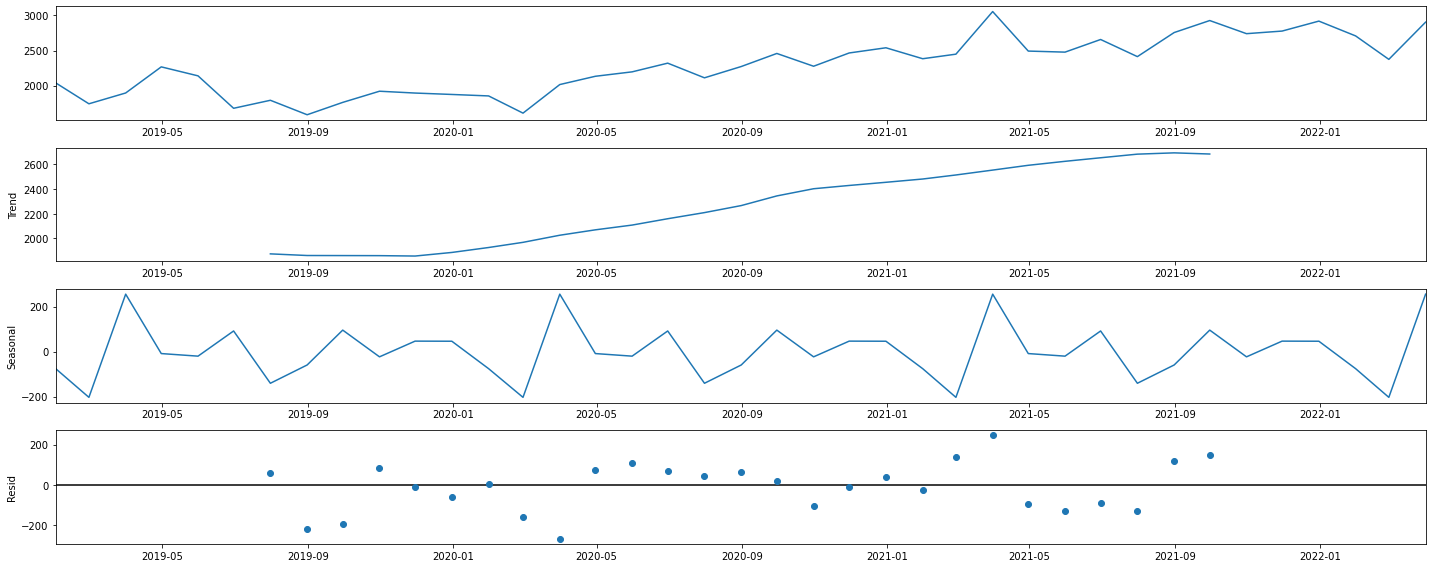

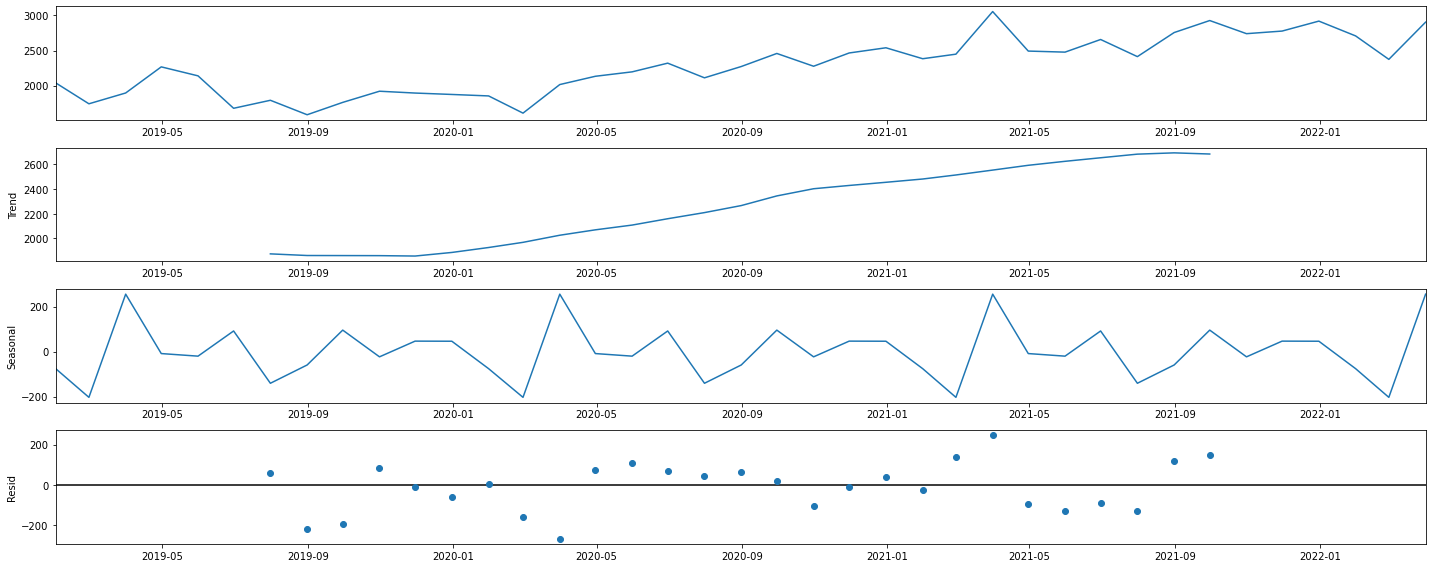

In [1293]:
decomposition=seasonal_decompose(ANC_visits,model='additive')
decomposition.plot()

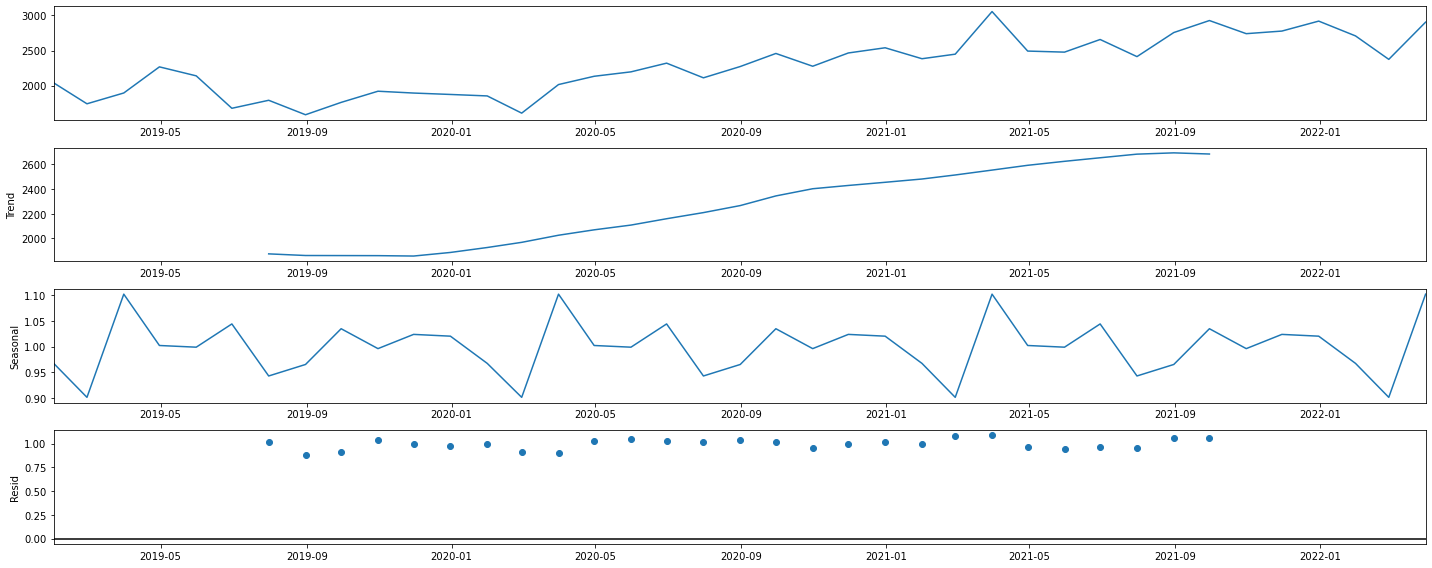

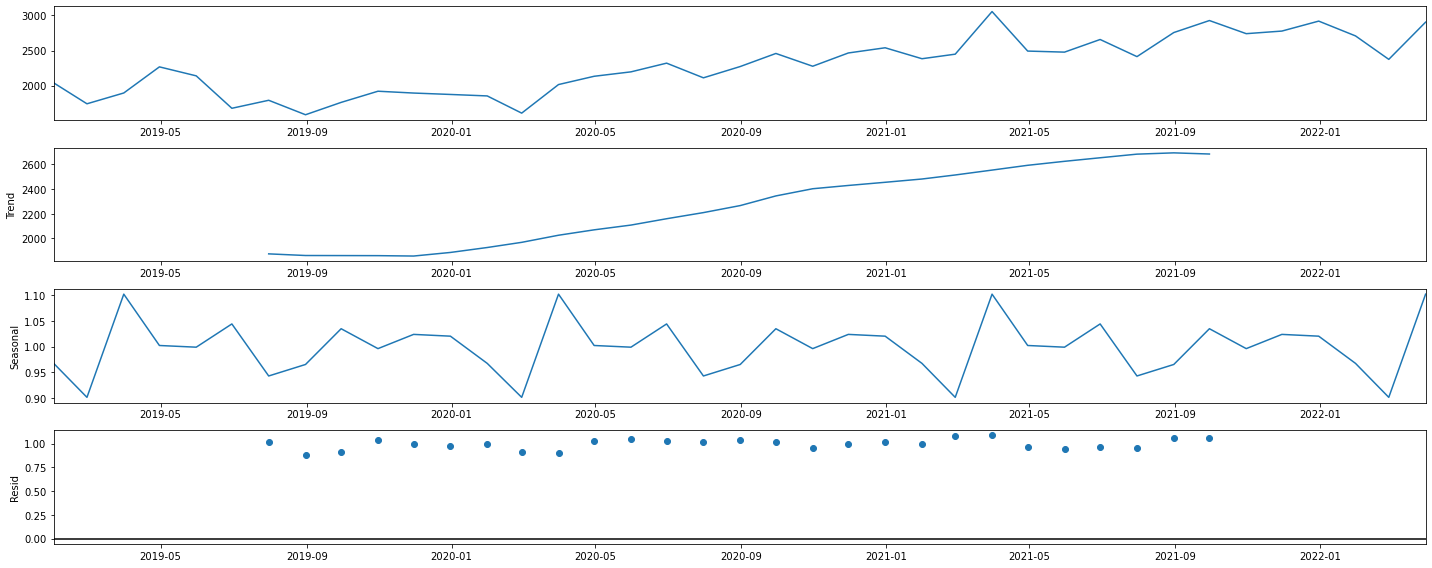

In [1294]:
decomposition=seasonal_decompose(ANC_visits,model='multiplicative')
decomposition.plot()

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1295]:
df9test = adfuller(df9,regression='ct')
print('DF test statistic is %3.3f' %df9test[0])
print('DF test p-value is' ,df9test[1])
print('Number of lags used' ,df9test[2])

DF test statistic is -4.677
DF test p-value is 0.0007645637795905396
Number of lags used 0


Observation:

* At 95% confidence level the Time Series is stationary.

## Split the data into train and test and plot the training and test data.

In [1296]:
train_size = int(len(df9) * 0.8)
train=df9[0:train_size] 
test=df9[train_size:]

In [1297]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

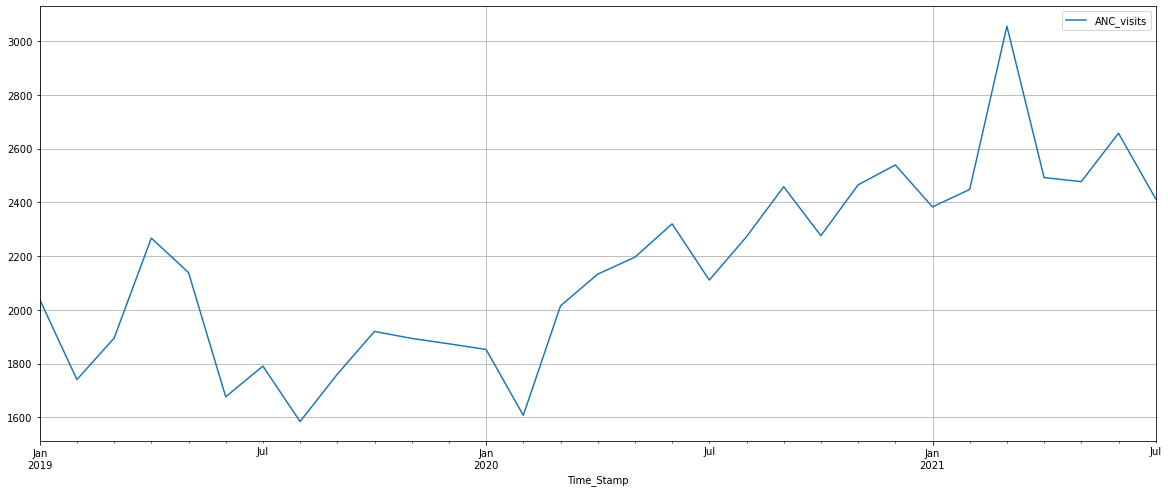

In [1298]:
train.plot(grid=True);

In [1299]:
df9test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df9test[0])
print('DF test p-value is' ,df9test[1])
print('Number of lags used' ,df9test[2])

DF test statistic is -2.980
DF test p-value is 0.13783353511026097
Number of lags used 3


Observation:

* The training data is non-stationary at 95% confidence level

In [1300]:
df9test = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df9test[0])
print('DF test p-value is' ,df9test[1])
print('Number of lags used' ,df9test[2])

DF test statistic is -3.807
DF test p-value is 0.016214169016092912
Number of lags used 4


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:

%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, ]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, ]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = ANC_visits.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 2685.345 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 2685.345

 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 2685.345
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 2685.345
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 2685.345
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 1431.715
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 2272.329
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 1499.697
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 303.189
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 228.491
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 323.916
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 348.541
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 2174.019
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 295.278
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 308.532
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 264.813
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 322.487
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 230.063
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 301.587
 > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 263.374

In [1301]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [1302]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [654]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['ANC_visits'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:403.504566552647
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:316.73547359392495
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:239.7119696780887
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:160.96361384999233
SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:83.32507727307133
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:326.26905619405755
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:315.48000924993704
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:237.321772728476
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:159.93623329206687
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:80.2778929168254
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:250.2957629514758
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:251.2182441522003
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:238.78641353383804
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:160.59706180297698
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:82.10658413458853
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:169.85815077209685
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:171.81931821390612
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:173.699252361492
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:161.37

SARIMA(1, 1, 1)x(0, 0, 4, 6) - AIC:65.26081644474979
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:311.44227617191837
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:300.1082539540757
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:222.80328172453207
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:145.55156015267065
SARIMA(1, 1, 1)x(1, 0, 4, 6) - AIC:65.89888220157994
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:234.2963697424521
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:235.4954418946654
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:221.9794935718661
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:147.30987546438126
SARIMA(1, 1, 1)x(2, 0, 4, 6) - AIC:67.07642142264046
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:155.01243671467518
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:156.31982816250783
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:157.32248568092632
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:147.7470082058276
SARIMA(1, 1, 1)x(3, 0, 4, 6) - AIC:65.71138861630808
SARIMA(1, 1, 1)x(4, 0, 0, 6) - AIC:77.16918940350266
SARIMA(1, 1, 1)x(4, 0, 1, 6) - AIC:80.5502638145731
SARIMA(1, 1, 1)x(4, 0, 2, 6) - AIC:78.28

SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:133.95510440223543
SARIMA(2, 1, 2)x(1, 0, 4, 6) - AIC:18.600446158684864
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:223.20919847839627
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:225.19381570178336
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:206.2742786070136
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:127.29070859835431
SARIMA(2, 1, 2)x(2, 0, 4, 6) - AIC:57.84400027456492
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:144.85179914133687
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:145.314937417225
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:146.42755912239886
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:132.18622933739493
SARIMA(2, 1, 2)x(3, 0, 4, 6) - AIC:56.08587895883305
SARIMA(2, 1, 2)x(4, 0, 0, 6) - AIC:-16.696347543983727
SARIMA(2, 1, 2)x(4, 0, 1, 6) - AIC:61.27843824379639
SARIMA(2, 1, 2)x(4, 0, 2, 6) - AIC:-10.63900736553753
SARIMA(2, 1, 2)x(4, 0, 3, 6) - AIC:7.693491169093846
SARIMA(2, 1, 2)x(4, 0, 4, 6) - AIC:35.833332139030624
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:359.1253198681392
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:

SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:199.80560042522694
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:119.90591876422769
SARIMA(3, 1, 3)x(2, 0, 4, 6) - AIC:25.743356907833462
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:121.82078683461881
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:120.48354216494153
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:137.31154501484866
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:121.83150529479002
SARIMA(3, 1, 3)x(3, 0, 4, 6) - AIC:25.174317270815465
SARIMA(3, 1, 3)x(4, 0, 0, 6) - AIC:44.46535815073026
SARIMA(3, 1, 3)x(4, 0, 1, 6) - AIC:53.858059310721316
SARIMA(3, 1, 3)x(4, 0, 2, 6) - AIC:43.661233607492356
SARIMA(3, 1, 3)x(4, 0, 3, 6) - AIC:47.714940542220134
SARIMA(3, 1, 3)x(4, 0, 4, 6) - AIC:24.436817755568025
SARIMA(3, 1, 4)x(0, 0, 0, 6) - AIC:346.53364794422185
SARIMA(3, 1, 4)x(0, 0, 1, 6) - AIC:268.03848145661004
SARIMA(3, 1, 4)x(0, 0, 2, 6) - AIC:186.6159722550686
SARIMA(3, 1, 4)x(0, 0, 3, 6) - AIC:112.53362987878198
SARIMA(3, 1, 4)x(0, 0, 4, 6) - AIC:18.765206987336057
SARIMA(3, 1, 4)x(1, 0, 0, 6) -

SARIMA(4, 1, 4)x(3, 0, 1, 6) - AIC:113.73007748236503
SARIMA(4, 1, 4)x(3, 0, 2, 6) - AIC:111.03937805452699
SARIMA(4, 1, 4)x(3, 0, 3, 6) - AIC:-0.9668151325503267
SARIMA(4, 1, 4)x(3, 0, 4, 6) - AIC:32.82897558205146
SARIMA(4, 1, 4)x(4, 0, 0, 6) - AIC:25.337006843875656
SARIMA(4, 1, 4)x(4, 0, 1, 6) - AIC:43.29422265146754
SARIMA(4, 1, 4)x(4, 0, 2, 6) - AIC:43.35029498499227
SARIMA(4, 1, 4)x(4, 0, 3, 6) - AIC:43.69776473308491
SARIMA(4, 1, 4)x(4, 0, 4, 6) - AIC:39.644972014103104
CPU times: total: 16min 23s
Wall time: 16min 34s


In [655]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
320  (2, 1, 2)  (4, 0, 0, 6) -16.696348
272  (2, 1, 0)  (4, 0, 2, 6) -13.692906
322  (2, 1, 2)  (4, 0, 2, 6) -10.639007
299  (2, 1, 1)  (4, 0, 4, 6) -10.074785
270  (2, 1, 0)  (4, 0, 0, 6) -10.052642

In [1307]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['ANC_visits'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         ANC_visits   No. Observations:                   31
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -24.178
Date:                            Tue, 18 Oct 2022   AIC                             56.356
Time:                                    11:09:54   BIC                             53.902
Sample:                                01-31-2019   HQIC                            50.970
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      2.187     -0.457      0.647      -5.286       3.286
ar.S.L12    8.153e-05     10.502   

In [1308]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1309]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

ANC_visits         mean     mean_se  mean_ci_lower  mean_ci_upper
2021-08-31  2745.781035  102.024752    2545.816196    2945.745874
2021-09-30  2933.490634  102.024771    2733.525757    3133.455511
2021-10-31  2690.936375  102.024769    2490.971503    2890.901247
2021-11-30  2918.130210  102.024766    2718.165344    3118.095077
2021-12-31  3008.552042  102.024702    2808.587300    3208.516784

In [1310]:
rmse = mean_squared_error(test['ANC_visits'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['ANC_visits'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 333.7205778035142 
MAPE: 8.028646762785431


## Building the most optimum model on the Full Data.

In [1324]:
full_data_model = sm.tsa.statespace.SARIMAX(ANC_visits['ANC_visits'],
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         ANC_visits   No. Observations:                   39
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 -88.314
Date:                            Tue, 18 Oct 2022   AIC                            184.629
Time:                                    11:11:50   BIC                            186.889
Sample:                                01-31-2019   HQIC                           184.164
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7261      0.259      2.804      0.005       0.219       1.234
ar.S.L12       0.5525      0.395   

## Evaluate the model on the whole data and predict 21 months into the future (till the end of next year).

In [1325]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1326]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

ANC_visits         mean     mean_se  mean_ci_lower  mean_ci_upper
2022-04-30  2465.205888  201.406266    2070.456861    2859.954915
2022-05-31  2554.213976  246.109353    2071.848507    3036.579444
2022-06-30  2846.667531  246.115600    2364.289820    3329.045242
2022-07-31  2500.030387  246.115665    2017.652547    2982.408227
2022-08-31  2927.815447  246.115666    2445.437605    3410.193288
2022-09-30  3099.313946  246.115660    2616.936117    3581.691775
2022-10-31  2846.096494  246.115138    2363.719688    3328.473301
2022-11-30  2945.119609  246.072686    2462.826007    3427.413210
2022-12-31  3014.349478  243.763655    2536.581493    3492.117463
2023-01-31  2654.605698  237.139380    2189.821054    3119.390343
2023-02-28  2387.683695  236.754125    1923.654136    2851.713253
2023-03-31  2989.626279  235.059154    2528.918803    3450.333756
2023-04-30  2498.714681  291.371074    1927.637870    3069.791492
2023-05-31  2596.875582  315.189884    1979.114762    3214.636402
2023-06-30  2951.461016  315.201639    2333.677156    3569.244877
2023-07-31  2548.115674  315.201763    1930.331570    3165.899777
2023-08-31  3022.745451  315.201764    2404.961345    3640.529557
2023-09-30  3194.519377  315.201753    2576.735295    3812.303460
2023-10-31  2904.716024  315.200771    2286.933866    3522.498182
2023-11-30  3038.007620  315.120872    2420.382060    3655.633180
2023-12-31  3067.031158  310.765202    2457.942555    3676.119760

In [1327]:
rmse = mean_squared_error(ANC_visits['ANC_visits'],results_full_data_model.fittedvalues,squared=False)
print('ANC_visits',rmse)

ANC_visits 1079.0798452963986


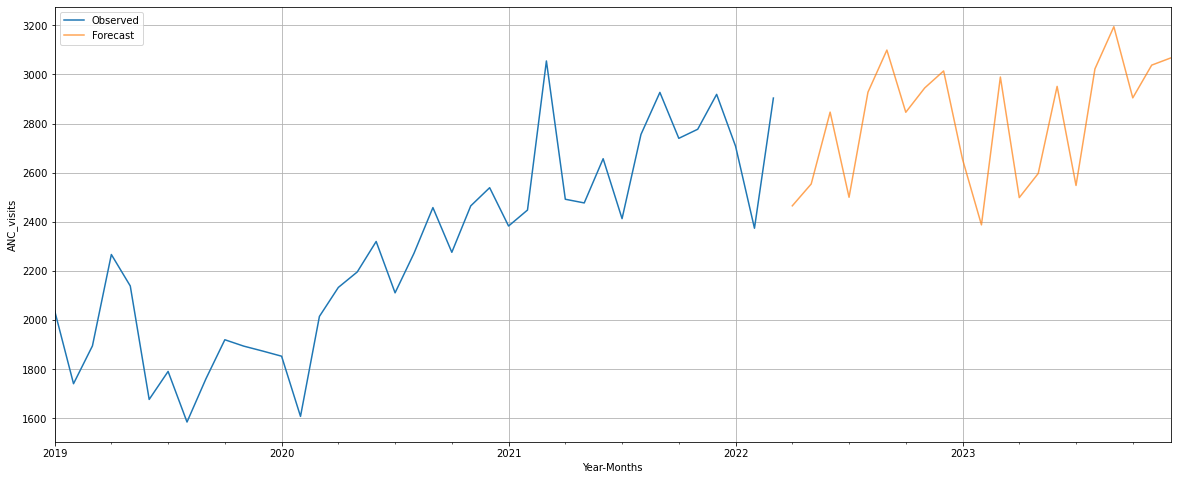

In [1328]:
axis = ANC_visits['ANC_visits'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('ANC_visits')
plt.legend(loc='best')
plt.grid();

# facilitybased_deliveries

In [1329]:
facilitybased_deliveries=df[['facilitybased_deliveries']]
facilitybased_deliveries

facilitybased_deliveries
Time_Stamp                          
2019-01-31                    2087.0
2019-02-28                    1814.0
2019-03-31                    2210.0
2019-04-30                    2235.0
2019-05-31                    2223.0
2019-06-30                    2122.0
2019-07-31                    2249.0
2019-08-31                    2277.0
2019-09-30                    2277.0
2019-10-31                    2199.0
2019-11-30                    2149.0
2019-12-31                    2194.0
2020-01-31                    2049.0
2020-02-29                    1969.0
2020-03-31                    2147.0
2020-04-30                    2091.0
2020-05-31                    2280.0
2020-06-30                    2092.0
2020-07-31                    2164.0
2020-08-31                    2008.0
2020-09-30                    2089.0
2020-10-31                    2061.0
2020-11-30                    1918.0
2020-12-31                    2028.0
2021-01-31                    1967.0
2021-02-28                    1969.0
2021-03-31                    2285.0
2021-04-30                    1732.0
2021-05-31                    1842.0
2021-06-30                    1770.0
2021-07-31                    2099.0
2021-08-31                    2068.0
2021-09-30                    2022.0
2021-10-31                    2197.0
2021-11-30                    2138.0
2021-12-31                    2326.0
2022-01-31                    2202.0
2022-02-28                    1994.0
2022-03-31                    2364.0

In [1330]:
df11=facilitybased_deliveries.copy()

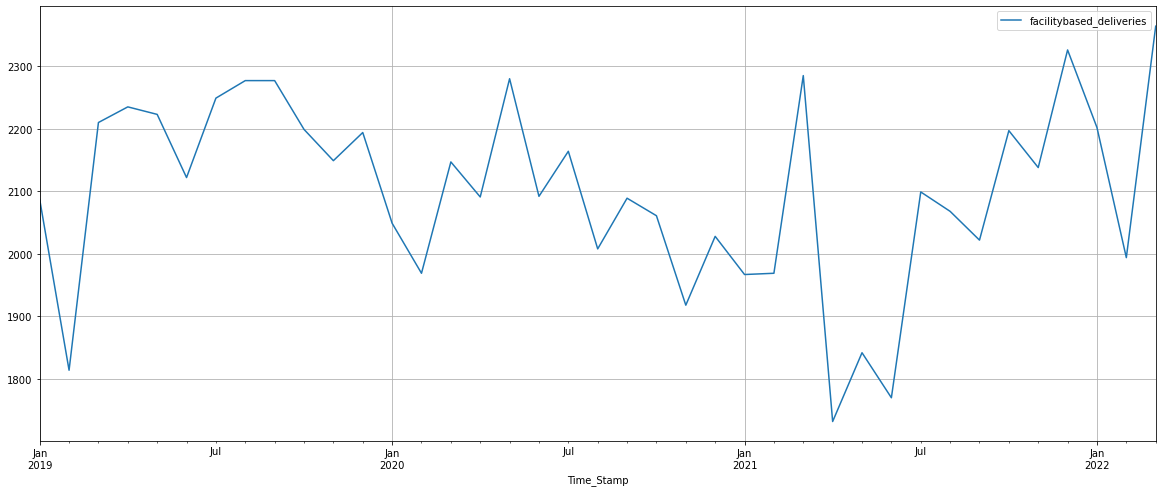

In [1331]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
facilitybased_deliveries.plot(grid=True);

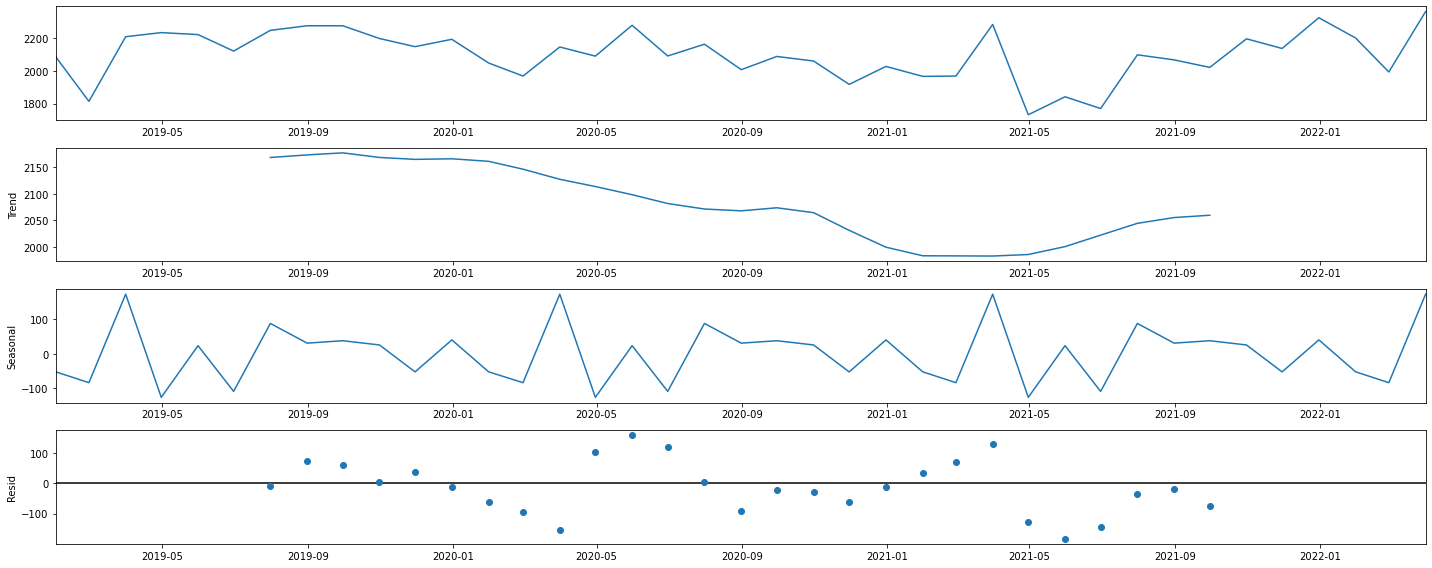

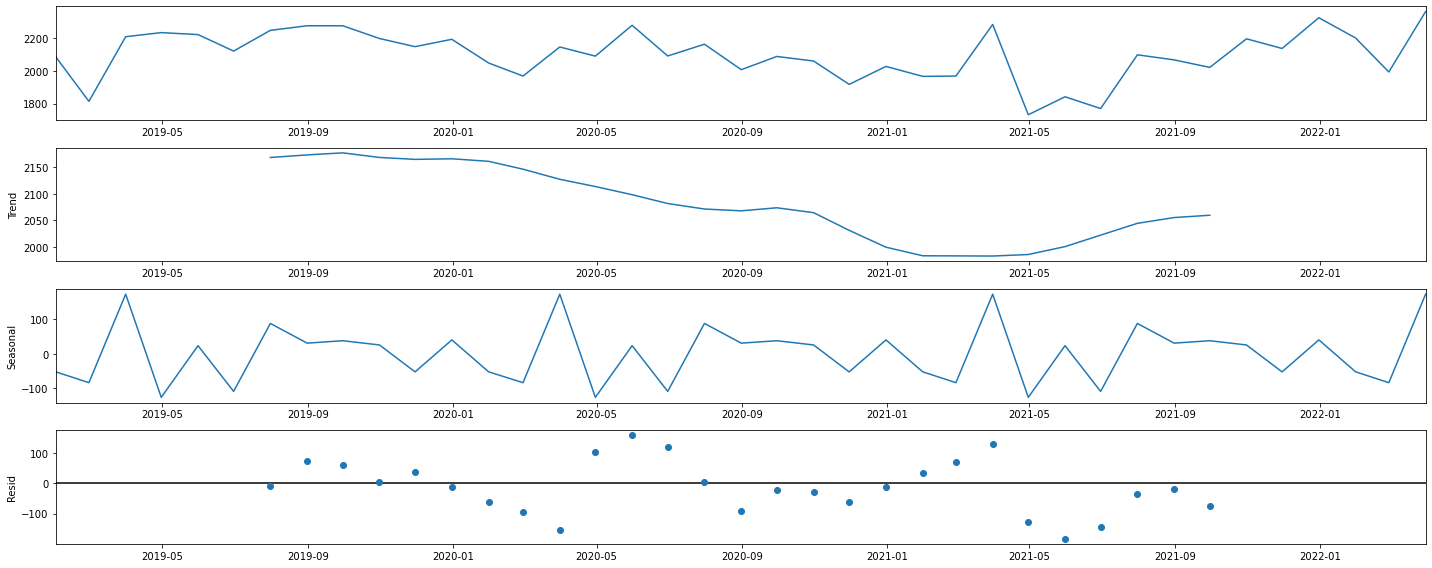

In [1332]:
decomposition=seasonal_decompose(facilitybased_deliveries,model='additive')
decomposition.plot()

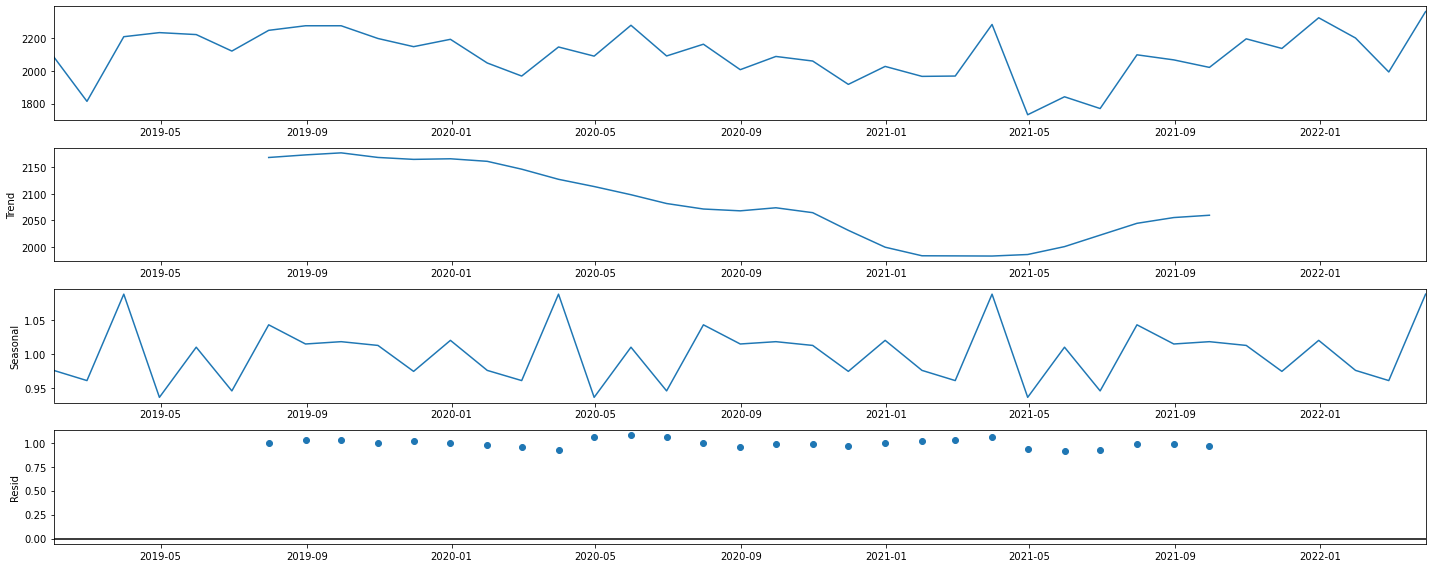

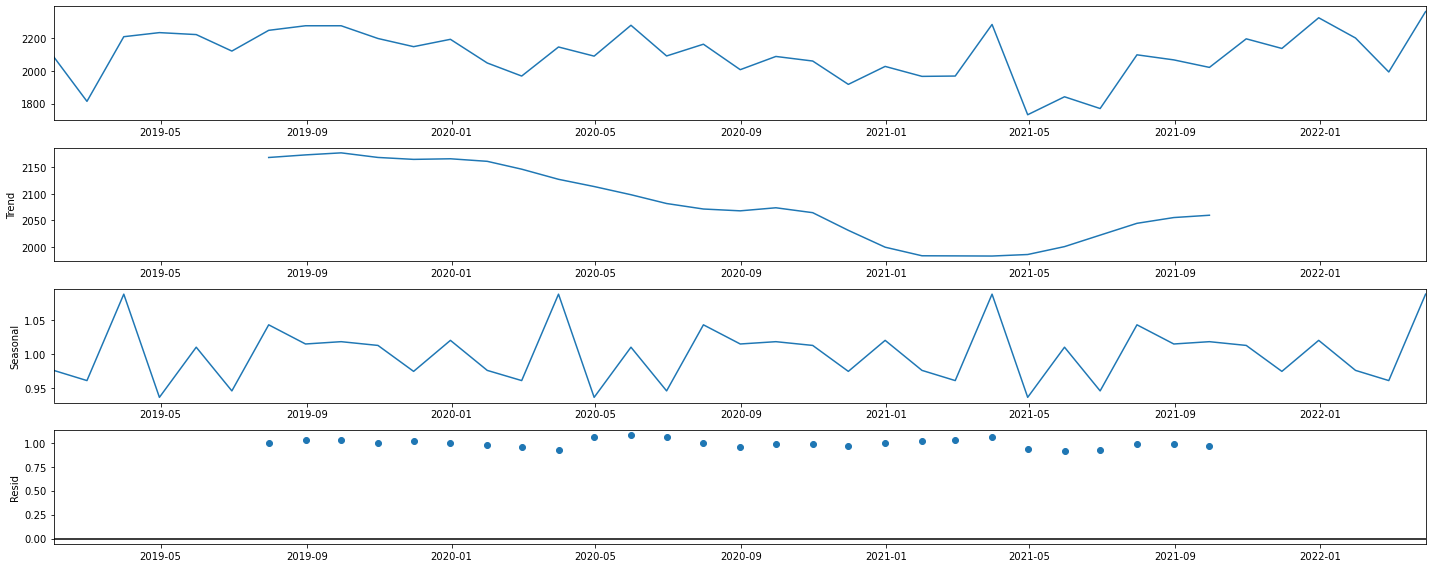

In [1333]:
decomposition=seasonal_decompose(facilitybased_deliveries,model='multiplicative')
decomposition.plot()

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1334]:
df11test = adfuller(df11,regression='ct')
print('DF test statistic is %3.3f' %df11test[0])
print('DF test p-value is' ,df11test[1])
print('Number of lags used' ,df11test[2])

DF test statistic is -4.379
DF test p-value is 0.0023640313800059637
Number of lags used 0


Observation:

* The data is stationary at 95% confidence level.

## Split the data into train and test and plot the training and test data.

In [1335]:
train_size = int(len(df11) * 0.8)
train=df11[0:train_size] 
test=df11[train_size:]

In [1336]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

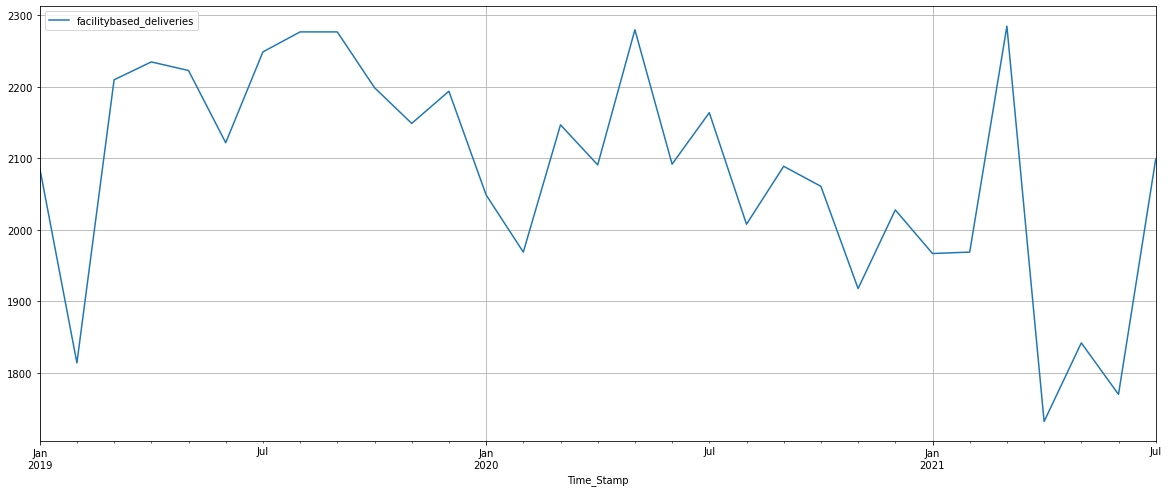

In [1337]:
train.plot(grid=True);

In [1338]:
df11 = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df11test[0])
print('DF test p-value is' ,df11test[1])
print('Number of lags used' ,df11test[2])

DF test statistic is -4.379
DF test p-value is 0.0023640313800059637
Number of lags used 0


Observation:

* The training data is stationary at 95% confidence level.

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = facilitybased_deliveries.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[4,6,8,9,10,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 2071.997
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 2071.997
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 2071.997
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 2071.997
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 2071.997
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 1723.500
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 1856.885
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 1609.483
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 241.149
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 291.976
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 1673.340
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 279.237
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 233.544
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 216.963
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 208.712
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 282.703
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 244.845
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 298.753
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 246.342
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 291.135

In [1339]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 0, 4)(0, 0, 4, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (1, 0, 4)(1, 0, 4, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (2, 0, 4)(2, 0, 4, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)
Model: (3, 0, 4)(3, 0, 4, 12)
Model: (4, 0, 0)(4, 0, 0, 12)
Model: (4, 0, 1)(4, 0, 1, 12)
Model: (4, 0, 2)(4, 0, 2, 12)
Model: (4, 0, 3)(4, 0, 3, 12)
Model: (4, 0, 4)(4, 0, 4, 12)


In [1340]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [681]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['facilitybased_deliveries'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:545.812103634813
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:306.1731627144495
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:100.67009657670881
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 0, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:248.71298902883993
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:238.50395156339482
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:89.03245021911137
SARIMA(0, 0, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:99.60123917422737
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:101.59847479172201
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:90.98029118835849
SARIMA(0, 0, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 0, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 0, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 0, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 0, 0)x(4, 0, 0, 12) - AIC:10.0
SARIMA(0, 0, 0)x(4, 0

SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:235.65848967804897
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:212.39724804356268
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:62.78557484792826
SARIMA(1, 0, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 0, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:90.37016085790732
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:93.11411528507732
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:59.655604577624736
SARIMA(1, 0, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 0, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 0, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 0, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 0, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 0, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 0, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 0, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 0, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 0, 3)x(0, 0, 0, 12) - AIC:345.58654556859744
SARIMA(1, 0, 3)x(0, 0, 1, 12) - AIC:200.4195

SARIMA(2, 0, 4)x(2, 0, 0, 12) - AIC:69.74271746487095
SARIMA(2, 0, 4)x(2, 0, 1, 12) - AIC:84.70402344211168
SARIMA(2, 0, 4)x(2, 0, 2, 12) - AIC:16.95777678027809
SARIMA(2, 0, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 0, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 0, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 0, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 0, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 0, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 0, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 0, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 0, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 0, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 0, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 0, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 0, 0)x(0, 0, 0, 12) - AIC:365.8404939507029
SARIMA(3, 0, 0)x(0, 0, 1, 12) - AIC:243.7236032594443
SARIMA(3, 0, 0)x(0, 0, 2, 12) - AIC:94.64753307923576
SARIMA(3, 0, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 0, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 0, 0)x(1, 0, 0, 12) - AIC:211.25129576366035
SARIMA(3, 0, 0)x(1, 0, 1, 12) - AIC:218.2825274

SARIMA(4, 0, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 0, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 0, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 0, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 0, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 0, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 0, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 0, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 0, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 0, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 0, 2)x(0, 0, 0, 12) - AIC:348.1390632507409
SARIMA(4, 0, 2)x(0, 0, 1, 12) - AIC:213.91228620215938
SARIMA(4, 0, 2)x(0, 0, 2, 12) - AIC:7.7915636227515925
SARIMA(4, 0, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 0, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 0, 2)x(1, 0, 0, 12) - AIC:194.0065901926575
SARIMA(4, 0, 2)x(1, 0, 1, 12) - AIC:203.3200100626673
SARIMA(4, 0, 2)x(1, 0, 2, 12) - AIC:6.101277408065885
SARIMA(4, 0, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 0, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 0, 2)x(2, 0, 0, 12) - AIC:15.845072642330466
SARIMA(4, 0, 2)x(2, 0, 1, 12) - AIC:3.6977847

In [682]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal       AIC
410  (3, 0, 1)  (2, 0, 0, 12) -8.459279
461  (3, 0, 3)  (2, 0, 1, 12) -7.260309
460  (3, 0, 3)  (2, 0, 0, 12) -5.591772
385  (3, 0, 0)  (2, 0, 0, 12) -4.679669
562  (4, 0, 2)  (2, 0, 2, 12) -3.154431

In [1341]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['facilitybased_deliveries'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:           facilitybased_deliveries   No. Observations:                   31
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -116.767
Date:                            Tue, 18 Oct 2022   AIC                            237.535
Time:                                    11:14:15   BIC                            239.315
Sample:                                01-31-2019   HQIC                           237.780
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6101      0.230      2.658      0.008       0.160       1.060
sigma2      2.524e+04   7407.114   

## Predict on the Test Set using this model and evaluate the model.

In [1342]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1343]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

facilitybased_deliveries         mean     mean_se  mean_ci_lower  \
2021-08-31                1968.340649  158.878069    1656.945356   
2021-09-30                2064.802091  186.116387    1700.020676   
2021-10-31                2046.235794  195.288525    1663.477318   
2021-11-30                1908.991711  198.594912    1519.752836   
2021-12-31                2022.503648  199.811824    1630.879669   

facilitybased_deliveries  mean_ci_upper  
2021-08-31                  2279.735943  
2021-09-30                  2429.583506  
2021-10-31                  2428.994270  
2021-11-30                  2298.230586  
2021-12-31                  2414.127626

In [1344]:
rmse = mean_squared_error(test['facilitybased_deliveries'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['facilitybased_deliveries'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 174.29587423012092 
MAPE: 6.6416167897692375


## Building the most optimum model on the Full Data.

In [1345]:
full_data_model = sm.tsa.statespace.SARIMAX(facilitybased_deliveries['facilitybased_deliveries'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:          facilitybased_deliveries   No. Observations:                   39
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 6)   Log Likelihood                -218.523
Date:                           Tue, 18 Oct 2022   AIC                            441.046
Time:                                   11:14:39   BIC                            443.978
Sample:                               01-31-2019   HQIC                           442.018
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.192      1.151      0.250      -0.156       0.598
sigma2          5e+04   1.24e+04      4.022

In [1346]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1347]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

facilitybased_deliveries         mean     mean_se  mean_ci_lower  \
2022-04-30                2272.639655  223.612096    1834.368001   
2022-05-31                2154.729115  229.015856    1705.866286   
2022-06-30                2329.699955  229.276917    1880.325456   
2022-07-31                2202.818314  229.289679    1753.418801   
2022-08-31                1994.180985  229.290303    1544.780249   
2022-09-30                2364.040028  229.290334    1914.639232   
2022-10-31                2272.648508  320.293821    1644.884154   
2022-11-30                2154.731073  324.090415    1519.525531   
2022-12-31                2329.700388  324.274988    1694.133091   
2023-01-31                2202.818410  324.284013    1567.233423   
2023-02-28                1994.181006  324.284455    1358.595154   
2023-03-31                2364.040033  324.284476    1728.454138   
2023-04-30                2272.648509  393.921944    1500.575686   
2023-05-31                2154.731073  397.015067    1376.595841   
2023-06-30                2329.700388  397.165751    1551.269820   
2023-07-31                2202.818410  397.173120    1424.373399   
2023-08-31                1994.181006  397.173481    1215.735289   
2023-09-30                2364.040033  397.173498    1585.594281   
2023-10-31                2272.648509  455.807924    1379.281394   
2023-11-30                2154.731073  458.483729    1256.119478   
2023-12-31                2329.700388  458.614216    1430.833041   

facilitybased_deliveries  mean_ci_upper  
2022-04-30                  2710.911309  
2022-05-31                  2603.591945  
2022-06-30                  2779.074454  
2022-07-31                  2652.217826  
2022-08-31                  2443.581721  
2022-09-30                  2813.440824  
2022-10-31                  2900.412862  
2022-11-30                  2789.936615  
2022-12-31                  2965.267684  
2023-01-31                  2838.403396  
2023-02-28                  2629.766859  
2023-03-31                  2999.625927  
2023-04-30                  3044.721331  
2023-05-31                  2932.866306  
2023-06-30                  3108.130955  
2023-07-31                  2981.263420  
2023-08-31                  2772.626724  
2023-09-30                  3142.485785  
2023-10-31                  3166.015624  
2023-11-30                  3053.342669  
2023-12-31                  3228.567735

In [1348]:

rmse = mean_squared_error(facilitybased_deliveries['facilitybased_deliveries'],results_full_data_model.fittedvalues,squared=False)
print('facilitybased_deliveries',rmse)

facilitybased_deliveries 832.3216938008055


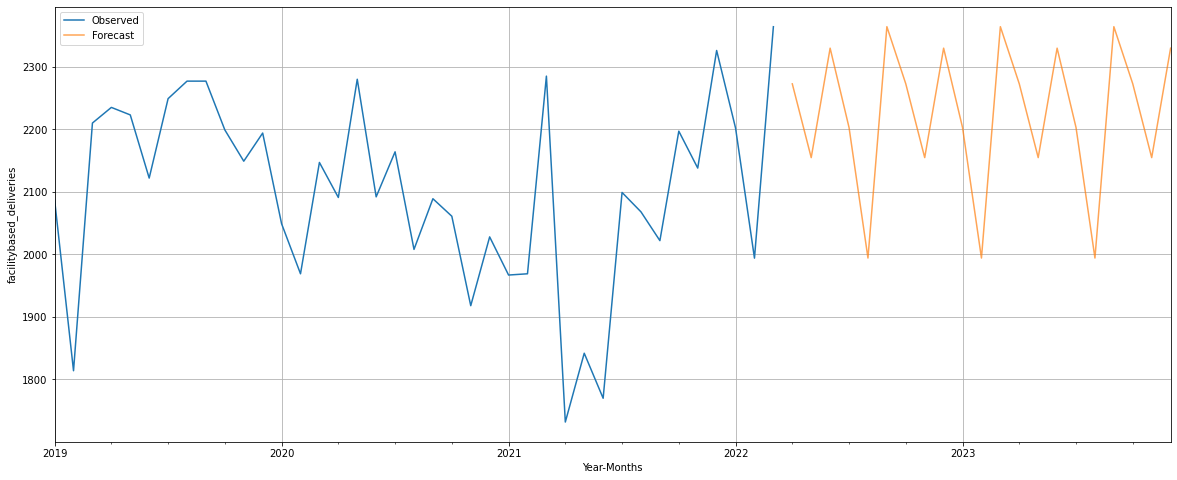

In [1349]:
axis = facilitybased_deliveries['facilitybased_deliveries'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('facilitybased_deliveries')
plt.legend(loc='best')
plt.grid();

# caesariansection_deliveries

In [1350]:
caesariansection_deliveries=df[['caesariansection_deliveries']]
caesariansection_deliveries

caesariansection_deliveries
Time_Stamp                             
2019-01-31                        323.0
2019-02-28                        302.0
2019-03-31                        338.0
2019-04-30                        347.0
2019-05-31                        375.0
2019-06-30                        355.0
2019-07-31                        401.0
2019-08-31                        436.0
2019-09-30                        401.0
2019-10-31                        384.0
2019-11-30                        363.0
2019-12-31                        373.0
2020-01-31                        347.0
2020-02-29                        346.0
2020-03-31                        413.0
2020-04-30                        446.0
2020-05-31                        478.0
2020-06-30                        438.0
2020-07-31                        471.0
2020-08-31                        442.0
2020-09-30                        467.0
2020-10-31                        490.0
2020-11-30                        424.0
2020-12-31                        429.0
2021-01-31                        446.0
2021-02-28                        387.0
2021-03-31                        476.0
2021-04-30                        434.0
2021-05-31                        526.0
2021-06-30                        502.0
2021-07-31                        521.0
2021-08-31                        508.0
2021-09-30                        504.0
2021-10-31                        497.0
2021-11-30                        534.0
2021-12-31                        540.0
2022-01-31                        490.0
2022-02-28                        424.0
2022-03-31                        552.0

In [1351]:
df12=caesariansection_deliveries.copy()

In [1352]:
df12.describe()

caesariansection_deliveries
count                    39.000000
mean                    434.102564
std                      67.051353
min                     302.000000
25%                     379.500000
50%                     436.000000
75%                     490.000000
max                     552.000000

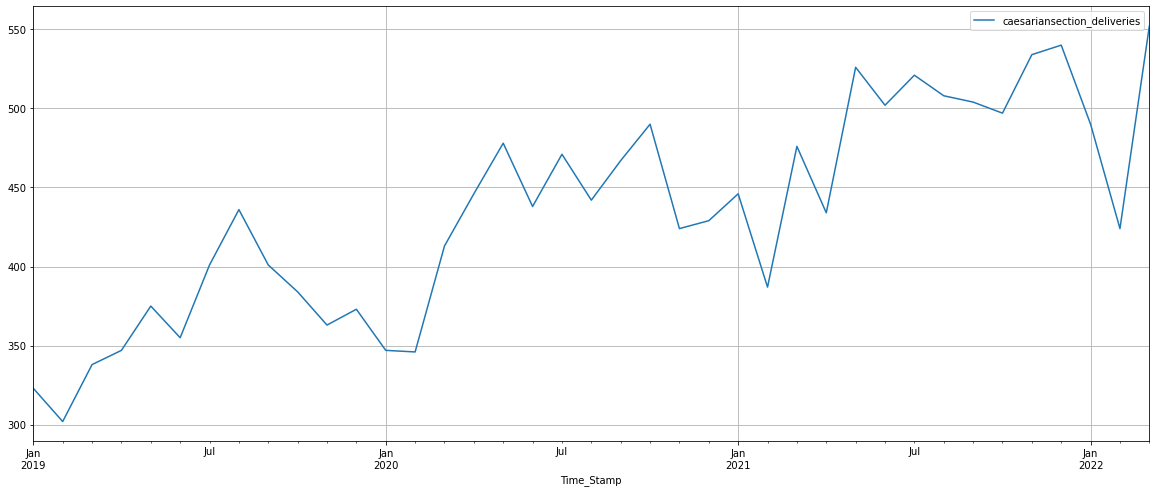

In [1353]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

caesariansection_deliveries.plot(grid=True);

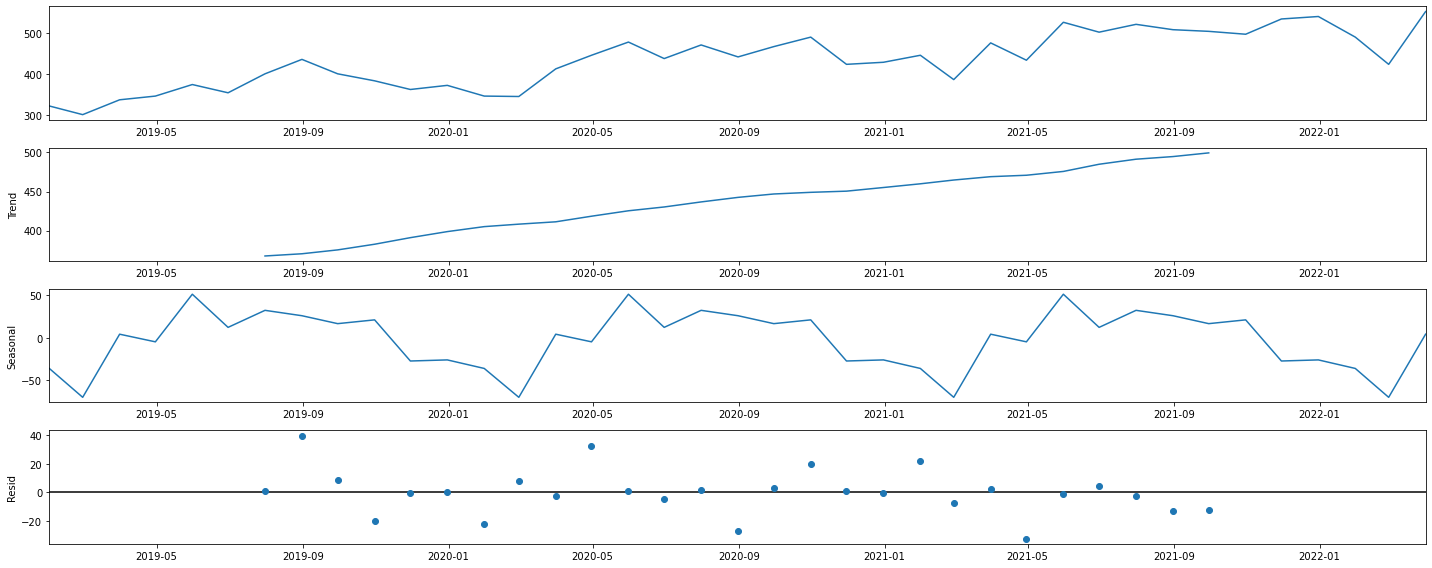

In [1354]:
decomposition = seasonal_decompose(caesariansection_deliveries,model='additive')
decomposition.plot();

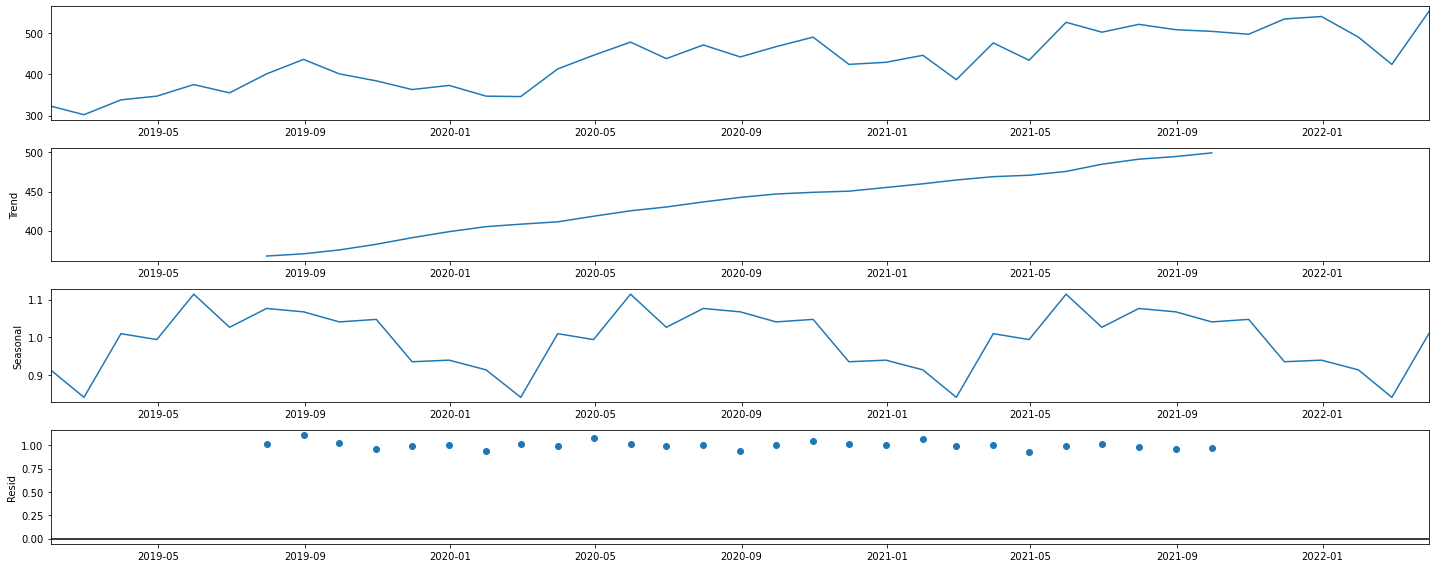

In [1355]:
decomposition = seasonal_decompose(caesariansection_deliveries,model='multiplicative')
decomposition.plot();

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1356]:
df12test = adfuller(df12,regression='ct')
print('DF test statistic is %3.3f' %df12test[0])
print('DF test p-value is' ,df12test[1])
print('Number of lags used' ,df12test[2])

DF test statistic is -4.408
DF test p-value is 0.0021255196421245915
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is stationary.

## Split the data into train and test and plot the training and test data.

In [1357]:
train_size = int(len(df12) * 0.8)
train=df12[0:train_size] 
test=df12[train_size:]

In [1358]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.
Let us plot the training data once.

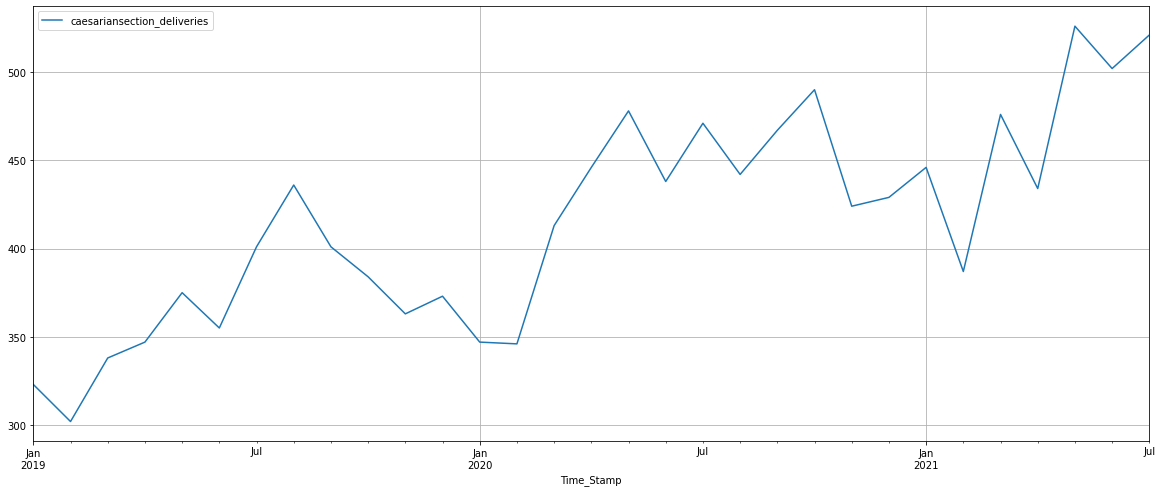

In [1359]:
train.plot(grid=True);

In [1360]:
df12test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df12test[0])
print('DF test p-value is' ,df12test[1])
print('Number of lags used' ,df12test[2])

DF test statistic is -3.373
DF test p-value is 0.05511863400156057
Number of lags used 3


Observation:

* The training data is non-stationary at 95% confidence level.

In [1361]:
df12test = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df12test[0])
print('DF test p-value is' ,df12test[1])
print('Number of lags used' ,df12test[2])

DF test statistic is -8.387
DF test p-value is 9.1082410799565e-12
Number of lags used 0


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = caesariansection_deliveries.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 504.059 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 504.059

 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 504.059
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 504.059
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 504.059
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 326.771
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 357.704
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 428.088
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 330.031
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 53.776
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 68.140
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 69.369
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 63.456
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 53.269
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 67.901
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 70.191
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 51.375
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 49.930
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 60.262 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 63.833

 > Model[[(0, 0, 0)

In [1362]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [1363]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [716]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['caesariansection_deliveries'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:298.72275029904284
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:181.12972988552164
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:61.40910399845389
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:187.450544234789
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:180.0225323813802
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:60.27011282429856
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:67.58172183220027
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:69.58172183296446
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:61.753318902883755
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:10.0
SARIMA(0, 1, 0)x(4, 0,

SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:175.51170459498977
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:153.74012331943428
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:35.50866705271995
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:55.55898218127349
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:61.124652941066486
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:30.434120253510045
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:270.1986200587786
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:148.0595

SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:-15.46195774095424
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:2.960752373041693
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:12.542208981255182
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:279.481473527307
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:181.5567233302603
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:61.58624263232204
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:156.99790516943196
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:158.983181

SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:273.81923269621353
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:161.01666155930275
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:-1.3721643324107156
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:147.4969387595023
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:147.099117142249
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:-2.8395764124929315
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:-0.5241430043343769


In [717]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
260  (2, 1, 0)  (2, 0, 0, 12) -39.652404
386  (3, 1, 0)  (2, 0, 1, 12) -27.722725
410  (3, 1, 1)  (2, 0, 0, 12) -27.094740
285  (2, 1, 1)  (2, 0, 0, 12) -25.150272
335  (2, 1, 3)  (2, 0, 0, 12) -24.899694

In [1364]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['caesariansection_deliveries'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())  

                                     SARIMAX Results                                      
Dep. Variable:        caesariansection_deliveries   No. Observations:                   31
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 6)   Log Likelihood                 -88.577
Date:                            Tue, 18 Oct 2022   AIC                            185.153
Time:                                    11:18:11   BIC                            188.715
Sample:                                01-31-2019   HQIC                           185.644
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9805      0.025     39.818      0.000       0.932       1.029
ma.L1         -1.0000      0.428   

In [1365]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1366]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

caesariansection_deliveries        mean    mean_se  mean_ci_lower  \
2021-08-31                   486.748345  31.579180     424.854290   
2021-09-30                   514.310356  31.554424     452.464823   
2021-10-31                   532.852231  31.530604     471.053383   
2021-11-30                   474.578746  31.507686     412.824817   
2021-12-31                   477.119944  31.485636     415.409232   

caesariansection_deliveries  mean_ci_upper  
2021-08-31                      548.642401  
2021-09-30                      576.155890  
2021-10-31                      594.651079  
2021-11-30                      536.332675  
2021-12-31                      538.830656

In [1367]:
rmse = mean_squared_error(test['caesariansection_deliveries'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['caesariansection_deliveries'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.230418012436225 
MAPE: 5.66494593272056


## Building the most optimum model on the Full Data

In [1368]:
full_data_model = sm.tsa.statespace.SARIMAX(caesariansection_deliveries['caesariansection_deliveries'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:        caesariansection_deliveries   No. Observations:                   39
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 6)   Log Likelihood                -160.183
Date:                            Tue, 18 Oct 2022   AIC                            328.367
Time:                                    11:18:38   BIC                            334.230
Sample:                                01-31-2019   HQIC                           330.310
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0107      0.001    916.392      0.000       1.009       1.013
ma.L1         -1.0000      0.285   

In [1369]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1370]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

caesariansection_deliveries        mean    mean_se  mean_ci_lower  \
2022-04-30                   540.860605  34.714749     472.820946   
2022-05-31                   530.727661  34.727703     462.662614   
2022-06-30                   536.287790  34.740931     468.196816   
2022-07-31                   570.124205  34.754440     502.006756   
2022-08-31                   612.106318  34.768234     543.961831   
2022-09-30                   556.544338  34.782321     488.372242   
2022-10-31                   571.104823  38.271428     496.094202   
2022-11-30                   585.254866  38.275151     510.236947   
2022-12-31                   591.603875  38.278954     516.578503   
2023-01-31                   583.819894  38.282839     508.786909   
2023-02-28                   572.035490  38.286807     496.994728   
2023-03-31                   609.444287  38.290860     534.395580   
2023-04-30                   611.662547  39.476306     534.290409   
2023-05-31                   614.189828  39.484602     536.801429   
2023-06-30                   620.746836  39.493076     543.341829   
2023-07-31                   634.521489  39.501730     557.099520   
2023-08-31                   650.415296  39.510570     572.976002   
2023-09-30                   641.657603  39.519598     564.200614   
2023-10-31                   650.719002  39.635969     573.033930   
2023-11-30                   659.734100  39.642914     582.035416   
2023-12-31                   666.831477  39.650007     589.118891   

caesariansection_deliveries  mean_ci_upper  
2022-04-30                      608.900263  
2022-05-31                      598.792708  
2022-06-30                      604.378763  
2022-07-31                      638.241655  
2022-08-31                      680.250804  
2022-09-30                      624.716433  
2022-10-31                      646.115444  
2022-11-30                      660.272784  
2022-12-31                      666.629246  
2023-01-31                      658.852879  
2023-02-28                      647.076253  
2023-03-31                      684.492993  
2023-04-30                      689.034684  
2023-05-31                      691.578226  
2023-06-30                      698.151842  
2023-07-31                      711.943458  
2023-08-31                      727.854590  
2023-09-30                      719.114592  
2023-10-31                      728.404075  
2023-11-30                      737.432784  
2023-12-31                      744.544064

In [1371]:
rmse = mean_squared_error(caesariansection_deliveries['caesariansection_deliveries'],results_full_data_model.fittedvalues,squared=False)
print('caesariansection_deliveries',rmse)

caesariansection_deliveries 69.68608655196745


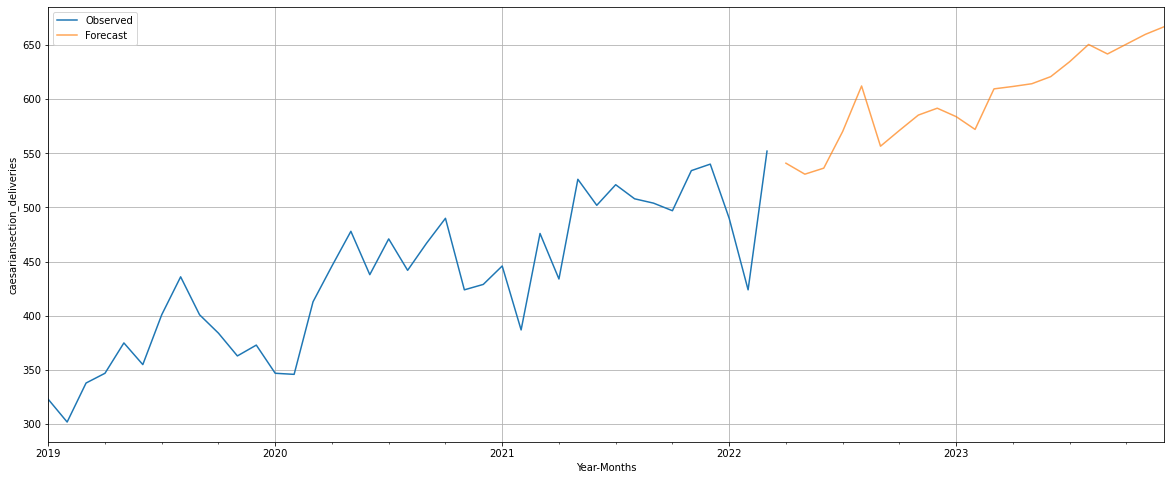

In [1372]:
axis = caesariansection_deliveries['caesariansection_deliveries'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('caesariansection_deliveries')
plt.legend(loc='best')
plt.grid();

# children_who_received_all_recommended_immunizations_by_1_year_of_age

In [1373]:
children_who_received_all_recommended_immunizations_by_1_year_of_age=df[['children_who_received_all_recommended_immunizations_by_1_year_of_age']]
children_who_received_all_recommended_immunizations_by_1_year_of_age

children_who_received_all_recommended_immunizations_by_1_year_of_age
Time_Stamp                                                                      
2019-01-31                                             7682.0                   
2019-02-28                                             7186.0                   
2019-03-31                                             7468.0                   
2019-04-30                                             7039.0                   
2019-05-31                                             8135.0                   
2019-06-30                                             7385.0                   
2019-07-31                                             7816.0                   
2019-08-31                                             7769.0                   
2019-09-30                                             6950.0                   
2019-10-31                                             7405.0                   
2019-11-30                                             7093.0                   
2019-12-31                                             6178.0                   
2020-01-31                                             8776.0                   
2020-02-29                                             7754.0                   
2020-03-31                                             7347.0                   
2020-04-30                                             8985.0                   
2020-05-31                                             8406.0                   
2020-06-30                                             8518.0                   
2020-07-31                                             8518.0                   
2020-08-31                                             8796.0                   
2020-09-30                                             8460.0                   
2020-10-31                                             8734.0                   
2020-11-30                                             8362.0                   
2020-12-31                                             8001.0                   
2021-01-31                                             8306.0                   
2021-02-28                                             7917.0                   
2021-03-31                                             8917.0                   
2021-04-30                                             8799.0                   
2021-05-31                                             8527.0                   
2021-06-30                                             8827.0                   
2021-07-31                                             9118.0                   
2021-08-31                                             8926.0                   
2021-09-30                                             8853.0                   
2021-10-31                                             8517.0                   
2021-11-30                                             8237.0                   
2021-12-31                                             9154.0                   
2022-01-31                                             8573.0                   
2022-02-28                                             7979.0                   
2022-03-31                                             9456.0

In [1374]:
df10=children_who_received_all_recommended_immunizations_by_1_year_of_age.copy()

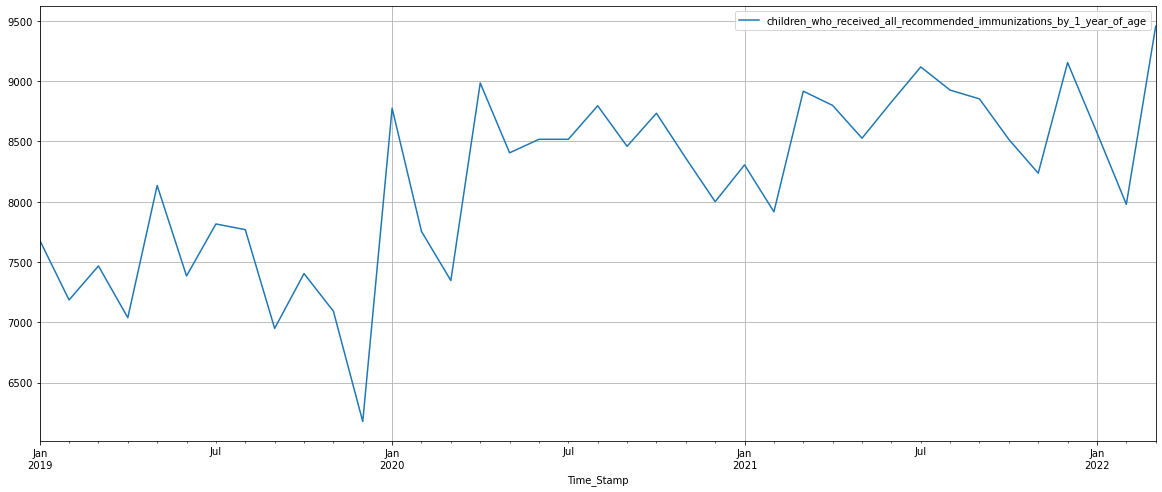

In [1375]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df10.plot(grid=True);

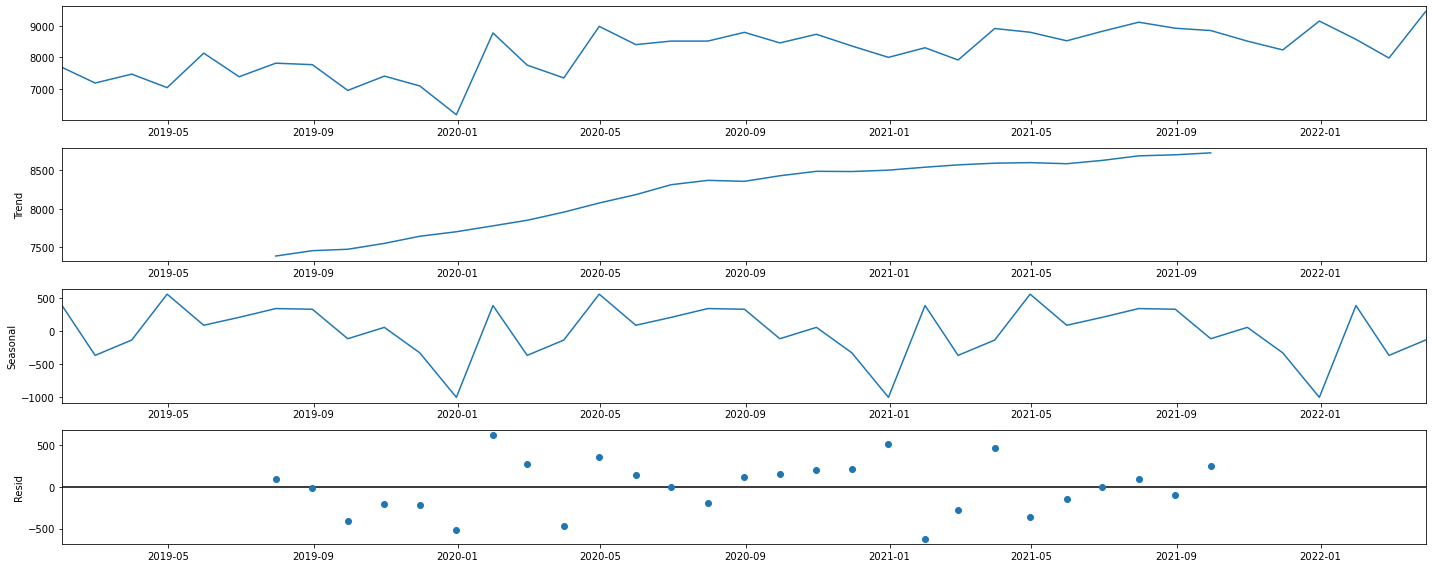

In [1376]:
decomposition = seasonal_decompose(df10,model='additive')
decomposition.plot();


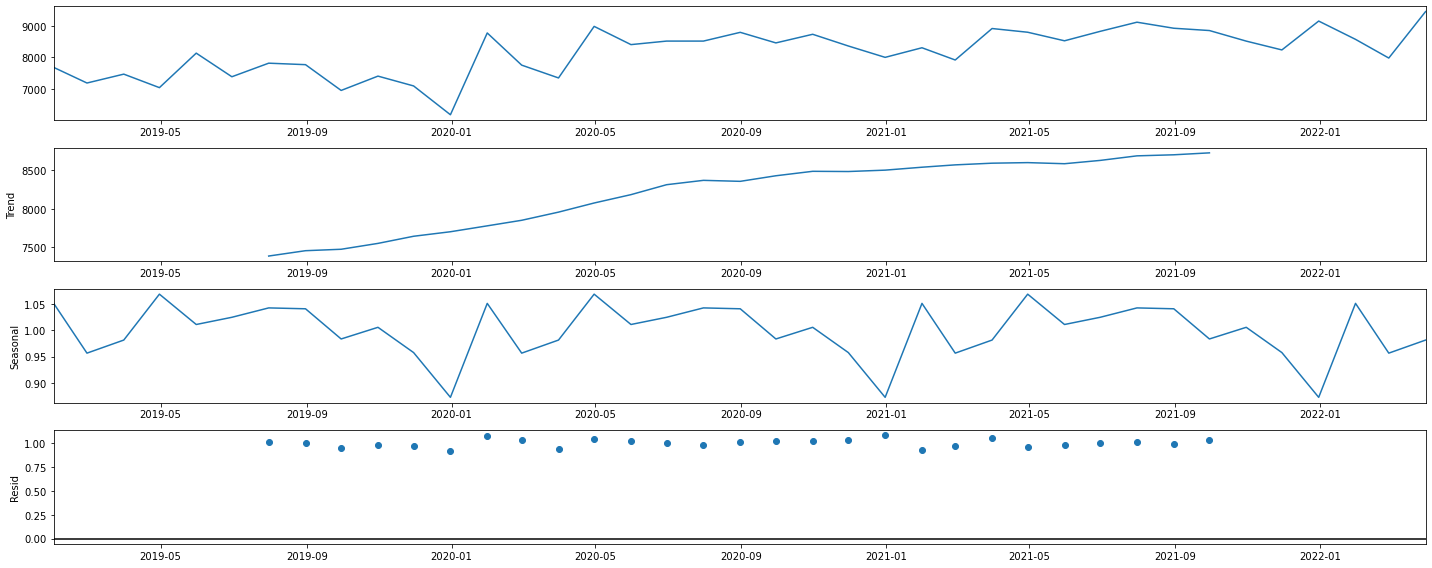

In [1377]:
decomposition = seasonal_decompose(df10,model='multiplicative')
decomposition.plot();

In [1378]:
df10.describe()

children_who_received_all_recommended_immunizations_by_1_year_of_age
count                                          39.000000                   
mean                                         8176.128205                   
std                                           736.262867                   
min                                          6178.000000                   
25%                                          7718.000000                   
50%                                          8362.000000                   
75%                                          8786.000000                   
max                                          9456.000000

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1379]:
df10test = adfuller(df10,regression='ct')
print('DF test statistic is %3.3f' %df10test[0])
print('DF test p-value is' ,df10test[1])
print('Number of lags used' ,df10test[2])

DF test statistic is -1.958
DF test p-value is 0.6242663568124889
Number of lags used 2


Observation:

* At 95% confidence level the Time Series is non-stationary.

In [1380]:
df10test = adfuller(df10.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df10test[0])
print('DF test p-value is' ,df10test[1])
print('Number of lags used' ,df10test[2])

DF test statistic is -5.363
DF test p-value is 4.272704096499662e-05
Number of lags used 10


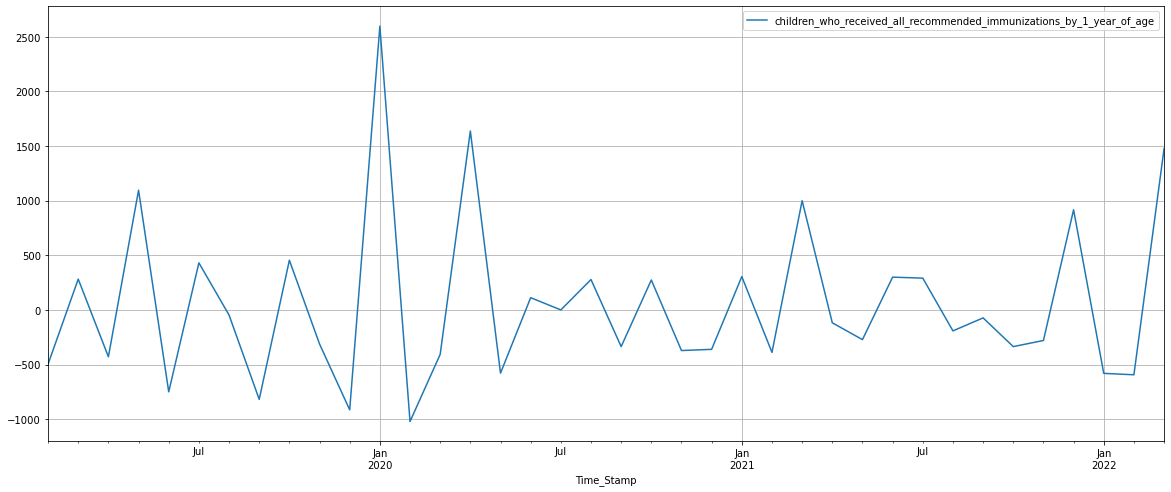

In [1381]:
df10.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1382]:
train_size = int(len(df10) * 0.8)
train=df10[0:train_size] 
test=df10[train_size:]

In [1383]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

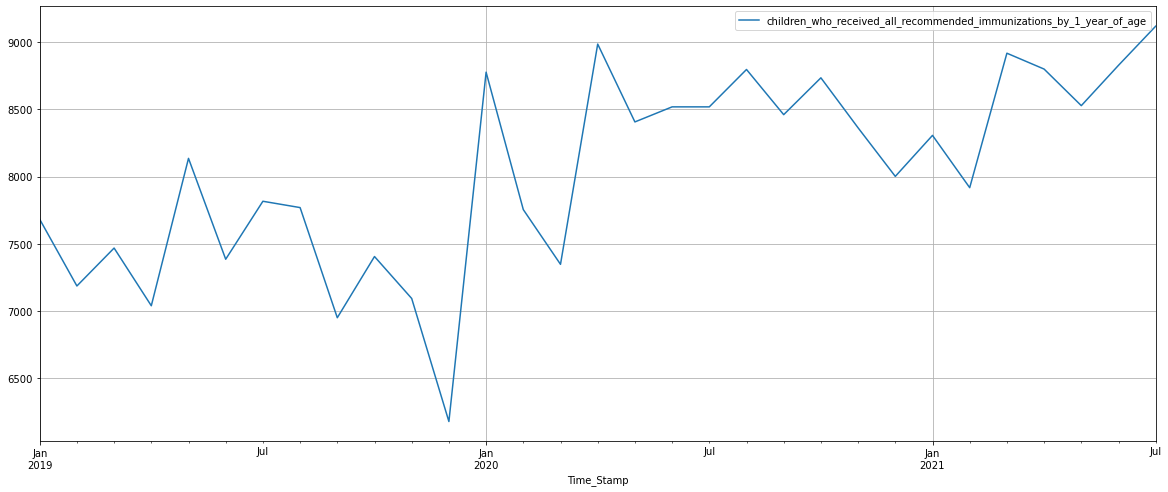

In [1384]:
train.plot(grid=True);

In [1385]:
df10test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df10test[0])
print('DF test p-value is' ,df10test[1])
print('Number of lags used' ,df10test[2])

DF test statistic is -2.148
DF test p-value is 0.5189884019397987
Number of lags used 3


Observation:

* The training data is non-stationary at 95% confidence level

In [1386]:
df10test = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df10test[0])
print('DF test p-value is' ,df10test[1])
print('Number of lags used' ,df10test[2])

DF test statistic is -7.861
DF test p-value is 1.5009678557909054e-10
Number of lags used 1


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, ]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df10.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 8755.926 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 8755.926

 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 8755.926
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 8755.926
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 8755.926
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 5010.731
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 5272.239
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 7778.489
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 8738.966
 > Model[[(0, 0, 0), (0, 0, 2, 4), 'n']] 11271.151
 > Model[[(0, 0, 0), (0, 0, 2, 12), 'n']] 2147.686
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 609.276
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 593.243
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 541.865
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 450.356
 > Model[[(0, 0, 0), (0, 0, 2, 8), 'n']] 5092.136
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 516.856
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 558.431
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 551.221
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 42

In [1387]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [1388]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1389]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['children_who_received_all_recommended_immunizations_by_1_year_of_age'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:469.560522611428
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:267.09184330732523
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:82.155776328281
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:284.7479629887673
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:269.0884576281564
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:84.00530830573584
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:97.21767460427375
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:99.21767460595979
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:85.97806442330292
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:10.0
SARIMA(0, 1, 0)x(4, 0, 1, 

SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:263.60465329756073
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:224.3326058455707
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:7.906895908962851
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:85.17699778681822
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:86.31992404657854
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:60.55390312440365
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:411.03780451191574
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:213.126580

SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:-12.048727249217215
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:-5.913885724299508
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:26.188623027637227
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:426.21334160455797
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:259.624573014793
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:85.28055022802894
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:225.38640635040406
SA

SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:410.17076786908
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:226.92330674067313
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:53.44331035330597
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:215.13864584120063
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:214.0620766797929
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:63.40163960831375
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:46.93610550901876
SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:48.934437009

In [1390]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
287  (2, 1, 1)  (2, 0, 2, 12) -19.243771
285  (2, 1, 1)  (2, 0, 0, 12) -17.138131
260  (2, 1, 0)  (2, 0, 0, 12) -16.371334
310  (2, 1, 2)  (2, 0, 0, 12) -15.275185
261  (2, 1, 0)  (2, 0, 1, 12) -13.794106

In [1391]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['children_who_received_all_recommended_immunizations_by_1_year_of_age'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                                        SARIMAX Results                                                         
Dep. Variable:     children_who_received_all_recommended_immunizations_by_1_year_of_age   No. Observations:                   31
Model:                                                  SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -135.964
Date:                                                                  Tue, 18 Oct 2022   AIC                            277.928
Time:                                                                          11:24:57   BIC                            280.599
Sample:                                                                      01-31-2019   HQIC                           278.296
                                                                           - 07-31-2021                                         
Covariance Type:                                                                    opg          

In [1392]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1393]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

children_who_received_all_recommended_immunizations_by_1_year_of_age         mean  \
2021-08-31                                                            8901.147863   
2021-09-30                                                            8859.106139   
2021-10-31                                                            8893.390164   
2021-11-30                                                            8846.843970   
2021-12-31                                                            8801.674142   

children_who_received_all_recommended_immunizations_by_1_year_of_age     mean_se  \
2021-08-31                                                            459.590981   
2021-09-30                                                            496.034496   
2021-10-31                                                            529.977897   
2021-11-30                                                            561.874472   
2021-12-31                                                            592.055127   

children_who_received_all_recommended_immunizations_by_1_year_of_age  mean_ci_lower  \
2021-08-31                                                              8000.366092   
2021-09-30                                                              7886.896393   
2021-10-31                                                              7854.652573   
2021-11-30                                                              7745.590241   
2021-12-31                                                              7641.267417   

children_who_received_all_recommended_immunizations_by_1_year_of_age  mean_ci_upper  
2021-08-31                                                              9801.929634  
2021-09-30                                                              9831.315886  
2021-10-31                                                              9932.127755  
2021-11-30                                                              9948.097699  
2021-12-31                                                              9962.080867

In [1394]:
rmse = mean_squared_error(test['children_who_received_all_recommended_immunizations_by_1_year_of_age'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['children_who_received_all_recommended_immunizations_by_1_year_of_age'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 455.5859821692053 
MAPE: 4.3772718062149805


## Building the most optimum model on the Full Data.

In [554]:
full_data_model = sm.tsa.statespace.SARIMAX(df10['children_who_received_all_recommended_immunizations_by_1_year_of_age'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                                        SARIMAX Results                                                         
Dep. Variable:     children_who_received_all_recommended_immunizations_by_1_year_of_age   No. Observations:                   39
Model:                                                  SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -108.840
Date:                                                                  Mon, 17 Oct 2022   AIC                            223.680
Time:                                                                          21:36:01   BIC                            225.598
Sample:                                                                      01-31-2019   HQIC                           223.503
                                                                           - 03-31-2022                                         
Covariance Type:                                                                    opg          

In [555]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [556]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

children_who_received_all_recommended_immunizations_by_1_year_of_age         mean  \
2022-04-30                                                            9166.162702   
2022-05-31                                                            8890.576402   
2022-06-30                                                            9188.380231   
2022-07-31                                                            9475.980839   
2022-08-31                                                            9289.471266   
2022-09-30                                                            9213.398963   
2022-10-31                                                            8884.524837   
2022-11-30                                                            8603.450115   
2022-12-31                                                            9505.520825   
2023-01-31                                                            8934.870865   
2023-02-28                                                            8343.265626   
2023-03-31                                                            9814.693426   
2023-04-30                                                            9526.863490   
2023-05-31                                                            9251.319084   
2023-06-30                                                            9549.148568   
2023-07-31                                                            9836.788887   
2023-08-31                                                            9650.215176   
2023-09-30                                                            9574.178763   
2023-10-31                                                            9245.221394   
2023-11-30                                                            8964.159227   
2023-12-31                                                            9866.404338   

children_who_received_all_recommended_immunizations_by_1_year_of_age      mean_se  \
2022-04-30                                                             574.484448   
2022-05-31                                                             595.282169   
2022-06-30                                                             615.377397   
2022-07-31                                                             634.836846   
2022-08-31                                                             653.717294   
2022-09-30                                                             672.067542   
2022-10-31                                                             689.929895   
2022-11-30                                                             707.341318   
2022-12-31                                                             724.334329   
2023-01-31                                                             740.937717   
2023-02-28                                                             757.177113   
2023-03-31                                                             773.075456   
2023-04-30                                                            1058.989526   
2023-05-31                                                            1103.466926   
2023-06-30                                                            1146.219743   
2023-07-31                                                            1187.434268   
2023-08-31                                                            1227.265490   
2023-09-30                                                            1265.843997   
2023-10-31                                                            1303.281039   
2023-11-30                                                            1339.672314   
2023-12-31                                                            1375.100851   

children_who_received_all_recommended_immunizations_by_1_year_of_age  mean_ci_lower  \
2022-04-30                                                              8040.193875   
2022-05-31                                                              7723.844790 

In [557]:
rmse = mean_squared_error(df10['children_who_received_all_recommended_immunizations_by_1_year_of_age'],results_full_data_model.fittedvalues,squared=False)
print('HIV_patients_lost_to_followup',rmse)

HIV_patients_lost_to_followup 1463.9958819831625


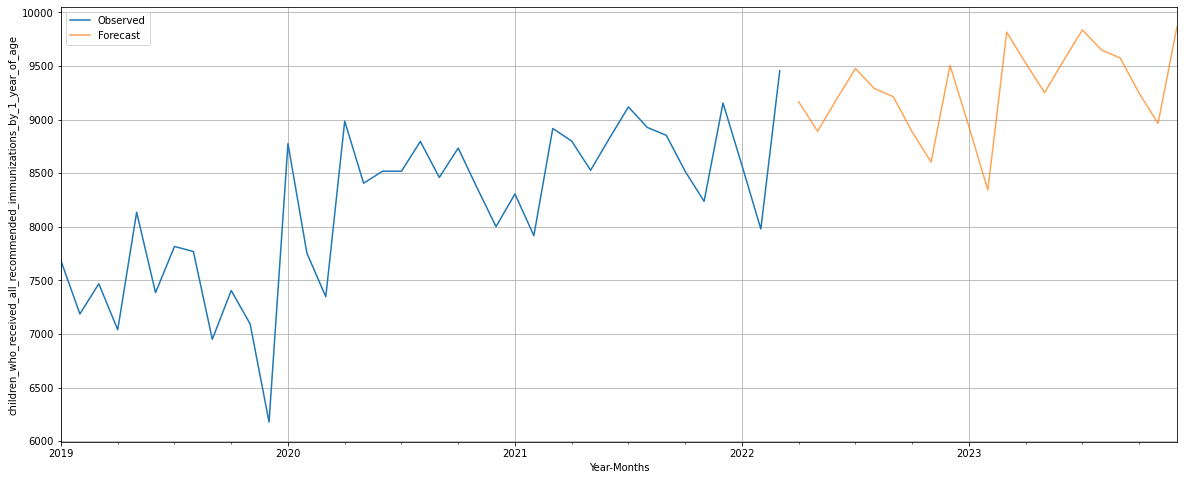

In [558]:
axis = df10['children_who_received_all_recommended_immunizations_by_1_year_of_age'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('children_who_received_all_recommended_immunizations_by_1_year_of_age')
plt.legend(loc='best')
plt.grid();

# child_vaccinations_administered

In [1395]:
child_vaccinations_administered=df[['child_vaccinations_administered']]
child_vaccinations_administered

child_vaccinations_administered
Time_Stamp                                 
2019-01-31                           7566.0
2019-02-28                           7229.0
2019-03-31                           9508.0
2019-04-30                           6729.0
2019-05-31                           8269.0
2019-06-30                           7353.0
2019-07-31                           7151.0
2019-08-31                           7091.0
2019-09-30                           6260.0
2019-10-31                           6799.0
2019-11-30                           6471.0
2019-12-31                           5543.0
2020-01-31                          13967.0
2020-02-29                          12562.0
2020-03-31                          12688.0
2020-04-30                          13008.0
2020-05-31                          11963.0
2020-06-30                          14685.0
2020-07-31                          22383.0
2020-08-31                          21104.0
2020-09-30                          20017.0
2020-10-31                          19416.0
2020-11-30                          18646.0
2020-12-31                          19070.0
2021-01-31                          25710.0
2021-02-28                          23071.0
2021-03-31                          25209.0
2021-04-30                          29168.0
2021-05-31                          28280.0
2021-06-30                          33276.0
2021-07-31                          29938.0
2021-08-31                          29207.0
2021-09-30                          29665.0
2021-10-31                          25264.0
2021-11-30                          25308.0
2021-12-31                          26740.0
2022-01-31                          28045.0
2022-02-28                          26586.0
2022-03-31                          32473.0

In [1396]:
df20=child_vaccinations_administered.copy()

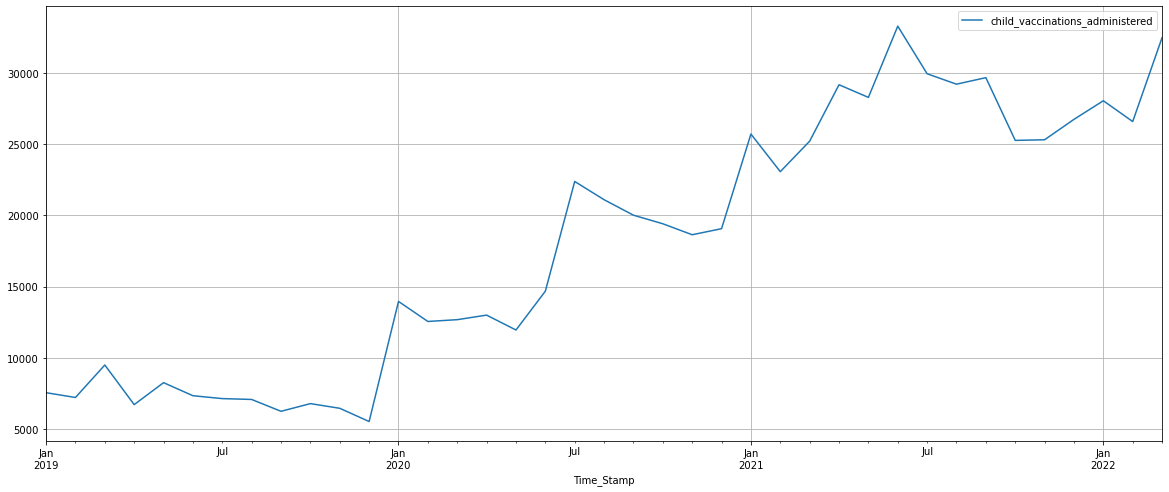

In [1397]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df20.plot(grid=True);

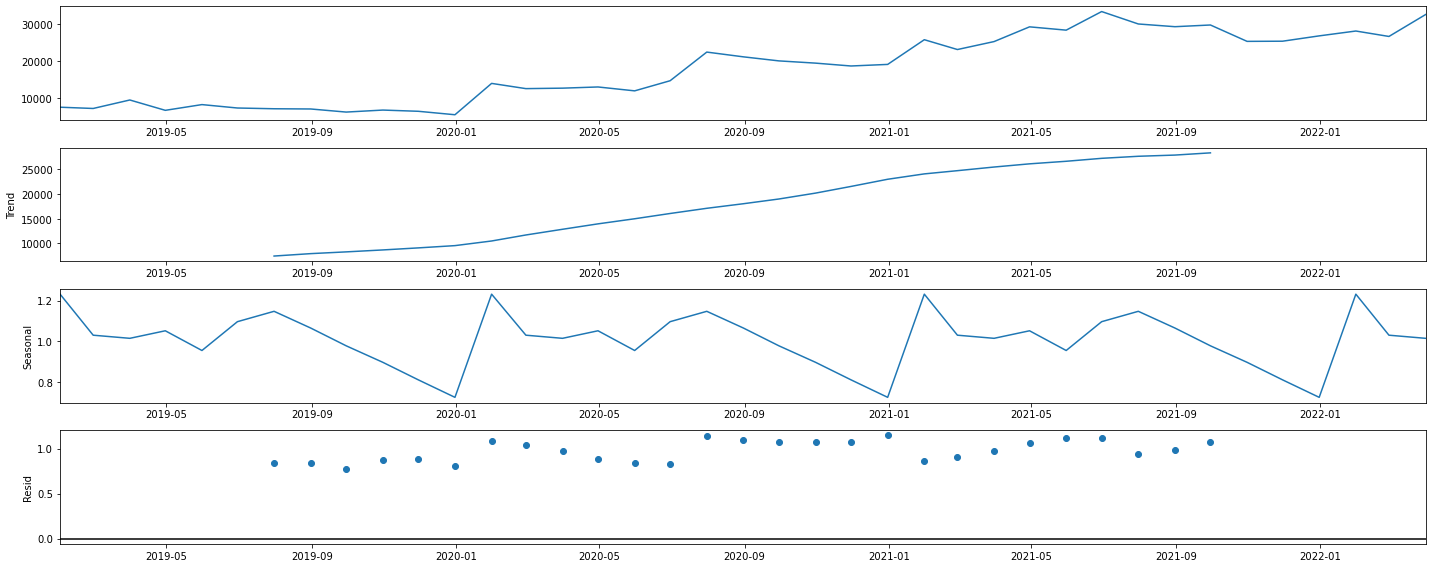

In [1398]:
decomposition = seasonal_decompose(df20,model='multiplicative')
decomposition.plot();

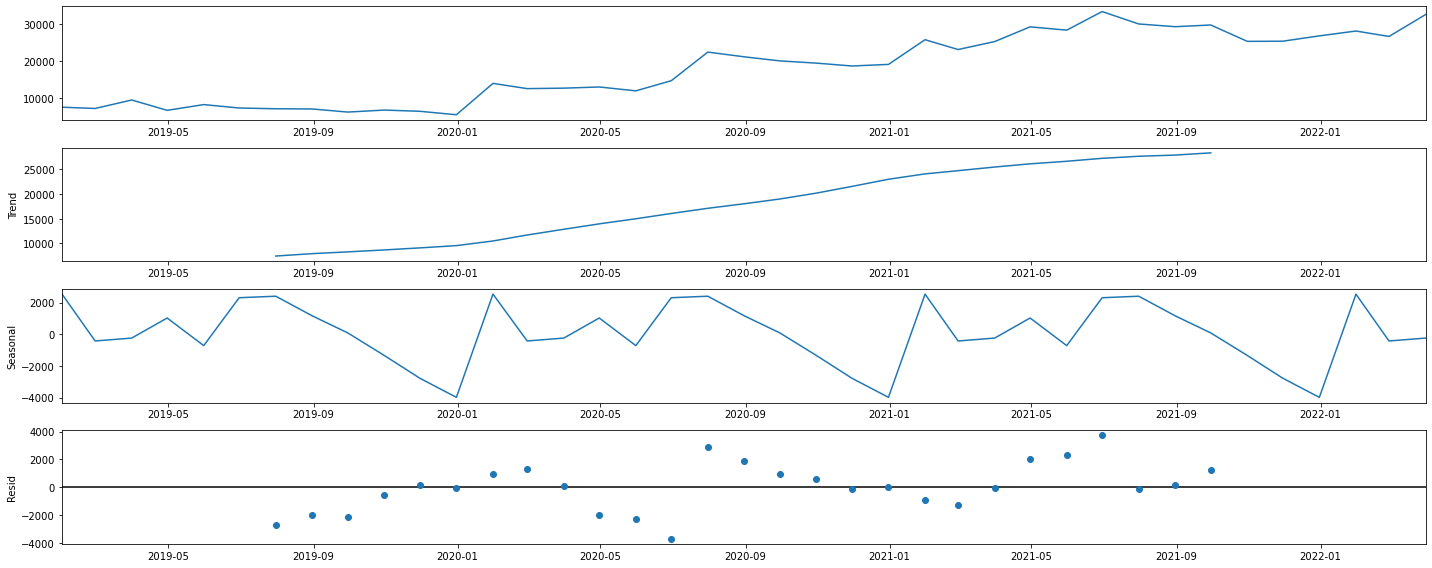

In [1399]:
decomposition = seasonal_decompose(df20,model='additive')
decomposition.plot();

In [1400]:
df20.describe()

child_vaccinations_administered
count                        39.000000
mean                      18036.358974
std                        9140.331877
min                        5543.000000
25%                        7917.500000
50%                       19070.000000
75%                       26148.000000
max                       33276.000000

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1401]:
df20test = adfuller(df20,regression='ct')
print('DF test statistic is %3.3f' %df20test[0])
print('DF test p-value is' ,df20test[1])
print('Number of lags used' ,df20test[2])

DF test statistic is -3.019
DF test p-value is 0.12686486946614534
Number of lags used 0


Observation:

* At 95% confidence level the Time Series is non-stationary.

In [1402]:
df20test = adfuller(df20.diff(23).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df20test[0])
print('DF test p-value is' ,df20test[1])
print('Number of lags used' ,df20test[2])

DF test statistic is -4.539
DF test p-value is 0.0013047838599208256
Number of lags used 3


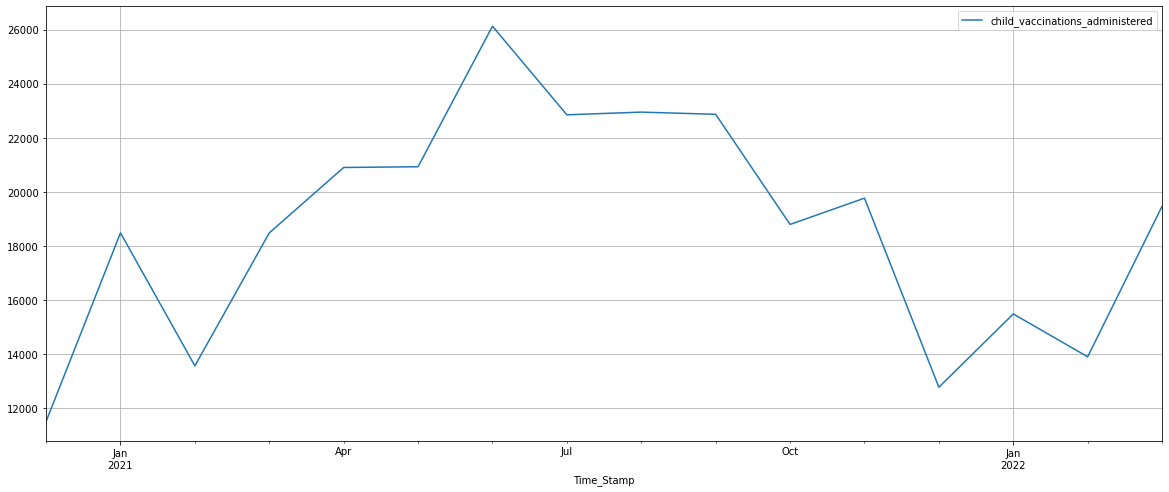

In [1403]:
df20.diff(23).dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1404]:
train_size = int(len(df20) * 0.8)
train=df20[0:train_size] 
test=df20[train_size:]

In [1405]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

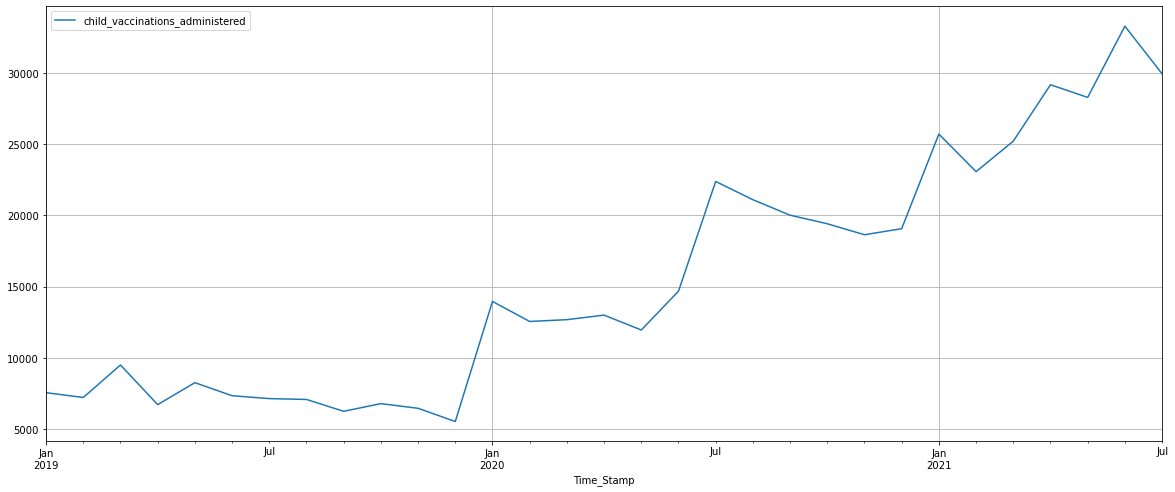

In [1406]:
train.plot(grid=True);

In [1407]:
df20test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df20test[0])
print('DF test p-value is' ,df20test[1])
print('Number of lags used' ,df20test[2])

DF test statistic is -2.408
DF test p-value is 0.37546640989097535
Number of lags used 3


Observation:

* The training data is non-stationary at 95% confidence level. 

In [1408]:
df20test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df20test[0])
print('DF test p-value is' ,df20test[1])
print('Number of lags used' ,df20test[2])

DF test statistic is -4.449
DF test p-value is 0.0018244848307830566
Number of lags used 3


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

##Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, ]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df20.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 28764.551
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 28764.551
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 28764.551
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 28764.551
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 28764.551
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 17555.952
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 16877.679
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 5659.978
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 25109.477
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 6771.506
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 7264.449
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 10395.589
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 5814.478
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 20720.174
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 7401.173
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 6317.341
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 7863.643
 > Model[[(0, 0, 0), (1, 0, 0, 8), 'n']] 8374.899
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 6185.043
 > Model[[(0, 0, 0), (1, 0, 0

In [1409]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 4)
Model: (0, 1, 2)(0, 0, 2, 4)
Model: (0, 1, 3)(0, 0, 3, 4)
Model: (0, 1, 4)(0, 0, 4, 4)
Model: (1, 1, 0)(1, 0, 0, 4)
Model: (1, 1, 1)(1, 0, 1, 4)
Model: (1, 1, 2)(1, 0, 2, 4)
Model: (1, 1, 3)(1, 0, 3, 4)
Model: (1, 1, 4)(1, 0, 4, 4)
Model: (2, 1, 0)(2, 0, 0, 4)
Model: (2, 1, 1)(2, 0, 1, 4)
Model: (2, 1, 2)(2, 0, 2, 4)
Model: (2, 1, 3)(2, 0, 3, 4)
Model: (2, 1, 4)(2, 0, 4, 4)
Model: (3, 1, 0)(3, 0, 0, 4)
Model: (3, 1, 1)(3, 0, 1, 4)
Model: (3, 1, 2)(3, 0, 2, 4)
Model: (3, 1, 3)(3, 0, 3, 4)
Model: (3, 1, 4)(3, 0, 4, 4)
Model: (4, 1, 0)(4, 0, 0, 4)
Model: (4, 1, 1)(4, 0, 1, 4)
Model: (4, 1, 2)(4, 0, 2, 4)
Model: (4, 1, 3)(4, 0, 3, 4)
Model: (4, 1, 4)(4, 0, 4, 4)


In [1410]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [800]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['child_vaccinations_administered'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:549.7667874392134
SARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:476.86067826114015
SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:809.746989532074
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:326.828896978909
SARIMA(0, 1, 0)x(0, 0, 4, 4) - AIC:255.2158097897833
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:494.6657605962525
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:478.66266331486133
SARIMA(0, 1, 0)x(1, 0, 2, 4) - AIC:759.1400621185775
SARIMA(0, 1, 0)x(1, 0, 3, 4) - AIC:328.7583360181902
SARIMA(0, 1, 0)x(1, 0, 4, 4) - AIC:255.13522827956976
SARIMA(0, 1, 0)x(2, 0, 0, 4) - AIC:424.6496107666443
SARIMA(0, 1, 0)x(2, 0, 1, 4) - AIC:421.7809912940679
SARIMA(0, 1, 0)x(2, 0, 2, 4) - AIC:823.3732112493936
SARIMA(0, 1, 0)x(2, 0, 3, 4) - AIC:330.52969205149043
SARIMA(0, 1, 0)x(2, 0, 4, 4) - AIC:257.8043973698084
SARIMA(0, 1, 0)x(3, 0, 0, 4) - AIC:346.365602499681
SARIMA(0, 1, 0)x(3, 0, 1, 4) - AIC:347.2634497507669
SARIMA(0, 1, 0)x(3, 0, 2, 4) - AIC:827.0288148779979
SARIMA(0, 1, 0)x(3, 0, 3, 4) - AIC:328.174212

ValueError: Invalid model: moving average lag(s) {4} are in both the seasonal and non-seasonal moving average components.

In [801]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
79  (0, 1, 3)  (0, 0, 4, 4)  191.882280
89  (0, 1, 3)  (2, 0, 4, 4)  192.218689
99  (0, 1, 3)  (4, 0, 4, 4)  195.231457
84  (0, 1, 3)  (1, 0, 4, 4)  197.377751
94  (0, 1, 3)  (3, 0, 4, 4)  198.236802

In [1425]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['child_vaccinations_administered'],
                                order=(0, 1, 3),
                                seasonal_order=(0, 0, 4, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                          SARIMAX Results                                           
Dep. Variable:              child_vaccinations_administered   No. Observations:                   31
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2, 3, 4], 4)   Log Likelihood                 -87.941
Date:                                      Tue, 18 Oct 2022   AIC                            191.882
Time:                                              11:30:16   BIC                            194.303
Sample:                                          01-31-2019   HQIC                           189.227
                                               - 07-31-2021                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4824      1.596  

In [1426]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1427]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

child_vaccinations_administered          mean      mean_se  mean_ci_lower  \
2021-08-31                       33519.208878  2049.266052   29502.721221   
2021-09-30                       28933.751002  2365.871139   24296.728777   
2021-10-31                       32696.914691  3628.890323   25584.420354   
2021-11-30                       31428.338074  4097.736676   23396.921770   
2021-12-31                       32742.101441  4676.340836   23576.641823   

child_vaccinations_administered  mean_ci_upper  
2021-08-31                        37535.696536  
2021-09-30                        33570.773227  
2021-10-31                        39809.409028  
2021-11-30                        39459.754378  
2021-12-31                        41907.561059

In [1428]:
rmse = mean_squared_error(test['child_vaccinations_administered'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['child_vaccinations_administered'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4940.599472158299 
MAPE: 16.469013761393754


## Building the most optimum model on the Full Data

In [1429]:
full_data_model = sm.tsa.statespace.SARIMAX(df20['child_vaccinations_administered'],
                                order=(0, 1, 3),
                                seasonal_order=(0, 0, 4, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                          SARIMAX Results                                           
Dep. Variable:              child_vaccinations_administered   No. Observations:                   39
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2, 3, 4], 4)   Log Likelihood                -162.651
Date:                                      Tue, 18 Oct 2022   AIC                            341.302
Time:                                              11:30:42   BIC                            348.425
Sample:                                          01-31-2019   HQIC                           342.284
                                               - 03-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3312      0.361  

In [1430]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1431]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

child_vaccinations_administered          mean      mean_se  mean_ci_lower  \
2022-04-30                       33238.026462  1931.543920   29452.269944   
2022-05-31                       32382.389314  2321.002157   27833.308678   
2022-06-30                       36244.194079  2755.670567   30843.179015   
2022-07-31                       32144.886920  3561.607013   25164.265447   
2022-08-31                       32150.607557  3787.339792   24727.557967   
2022-09-30                       32180.358851  4124.552461   24096.384574   
2022-10-31                       29934.348409  4416.401411   21278.360702   
2022-11-30                       29469.428583  4575.269048   20502.066029   
2022-12-31                       29707.376682  4654.973539   20583.796197   
2023-01-31                       30301.909418  4767.241284   20958.288196   
2023-02-28                       29881.480210  4858.434899   20359.122786   
2023-03-31                       31063.771493  4921.208172   21418.380715   
2023-04-30                       31136.902553  5356.734007   20637.896825   
2023-05-31                       30960.446104  5605.333026   19974.195252   
2023-06-30                       31449.786296  5880.584423   19924.052618   
2023-07-31                       31195.242142  6330.176506   18788.324174   
2023-08-31                       31135.039736  6626.333180   18147.665352   
2023-09-30                       31133.881646  6947.477124   17517.076700   
2023-10-31                       31061.384790  7244.488222   16862.448789   
2023-11-30                       31061.384790  7488.155542   16384.869617   
2023-12-31                       31061.384790  7724.139904   15922.348767   

child_vaccinations_administered  mean_ci_upper  
2022-04-30                        37023.782979  
2022-05-31                        36931.469950  
2022-06-30                        41645.209144  
2022-07-31                        39125.508392  
2022-08-31                        39573.657148  
2022-09-30                        40264.333127  
2022-10-31                        38590.336115  
2022-11-30                        38436.791136  
2022-12-31                        38830.957166  
2023-01-31                        39645.530640  
2023-02-28                        39403.837635  
2023-03-31                        40709.162270  
2023-04-30                        41635.908281  
2023-05-31                        41946.696956  
2023-06-30                        42975.519973  
2023-07-31                        43602.160110  
2023-08-31                        44122.414119  
2023-09-30                        44750.686592  
2023-10-31                        45260.320792  
2023-11-30                        45737.899964  
2023-12-31                        46200.420813

In [1432]:
rmse = mean_squared_error(df20['child_vaccinations_administered'],results_full_data_model.fittedvalues,squared=False)
print('child_vaccinations_administered',rmse)

child_vaccinations_administered 2792.1893352490556


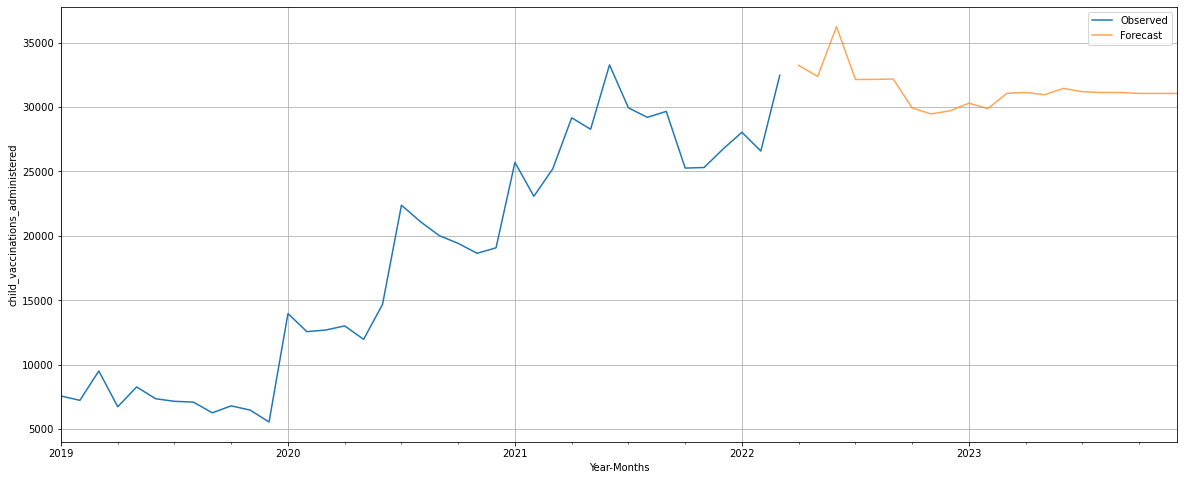

In [1433]:
axis = df20['child_vaccinations_administered'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('child_vaccinations_administered')
plt.legend(loc='best')
plt.grid();

# Family_Planning_Consultations

In [1434]:
Family_Planning_Consultations=df[['Family_Planning_Consultations']]
Family_Planning_Consultations

Family_Planning_Consultations
Time_Stamp                               
2019-01-31                         9866.0
2019-02-28                        10818.0
2019-03-31                        10510.0
2019-04-30                        16445.0
2019-05-31                        16448.0
2019-06-30                            NaN
2019-07-31                        12817.0
2019-08-31                        12817.0
2019-09-30                        12817.0
2019-10-31                        12817.0
2019-11-30                        12817.0
2019-12-31                        12817.0
2020-01-31                       139690.0
2020-02-29                       138574.0
2020-03-31                       137815.0
2020-04-30                       136919.0
2020-05-31                       137664.0
2020-06-30                       136195.0
2020-07-31                       138196.0
2020-08-31                       133135.0
2020-09-30                       136235.0
2020-10-31                       146386.0
2020-11-30                       146897.0
2020-12-31                       141248.0
2021-01-31                       143633.0
2021-02-28                       144198.0
2021-03-31                       141805.0
2021-04-30                       144692.0
2021-05-31                       141428.0
2021-06-30                       142390.0
2021-07-31                       144900.0
2021-08-31                       145567.0
2021-09-30                       144629.0
2021-10-31                       136958.0
2021-11-30                       143608.0
2021-12-31                       141434.0
2022-01-31                       146659.0
2022-02-28                       147598.0
2022-03-31                       147610.0

In [1435]:
Family_Planning_Consultations['Family_Planning_Consultations']=Family_Planning_Consultations['Family_Planning_Consultations'].fillna(Family_Planning_Consultations['Family_Planning_Consultations'].median())

In [1436]:
df30=Family_Planning_Consultations.copy()

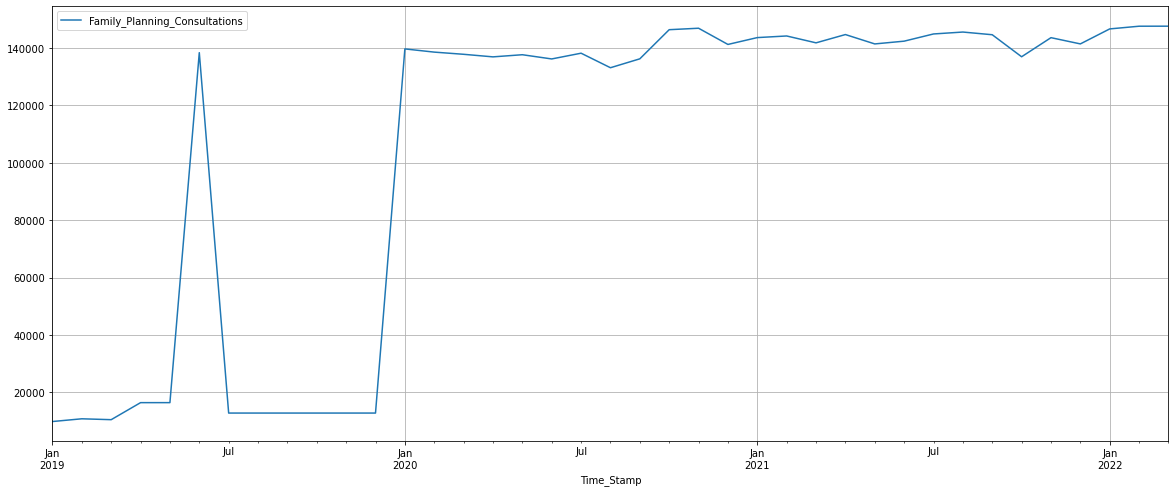

In [1437]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df30.plot(grid=True);

In [1438]:
df30.describe()

Family_Planning_Consultations
count                      39.000000
mean                   105267.615385
std                     58814.007280
min                      9866.000000
25%                     16446.500000
50%                    138385.000000
75%                    143915.500000
max                    147610.000000

In [1439]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [1440]:
df30.isnull().sum()

Family_Planning_Consultations    0
dtype: int64

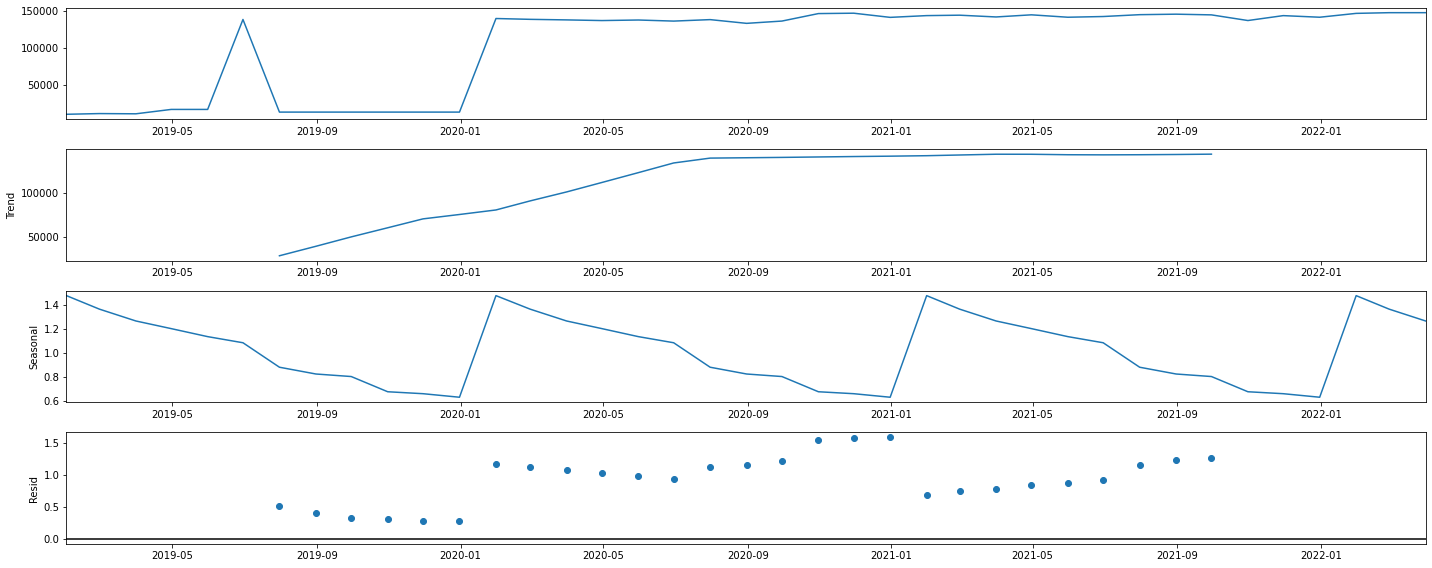

In [1441]:
decomposition = seasonal_decompose(df30,model='multiplicative')
decomposition.plot();

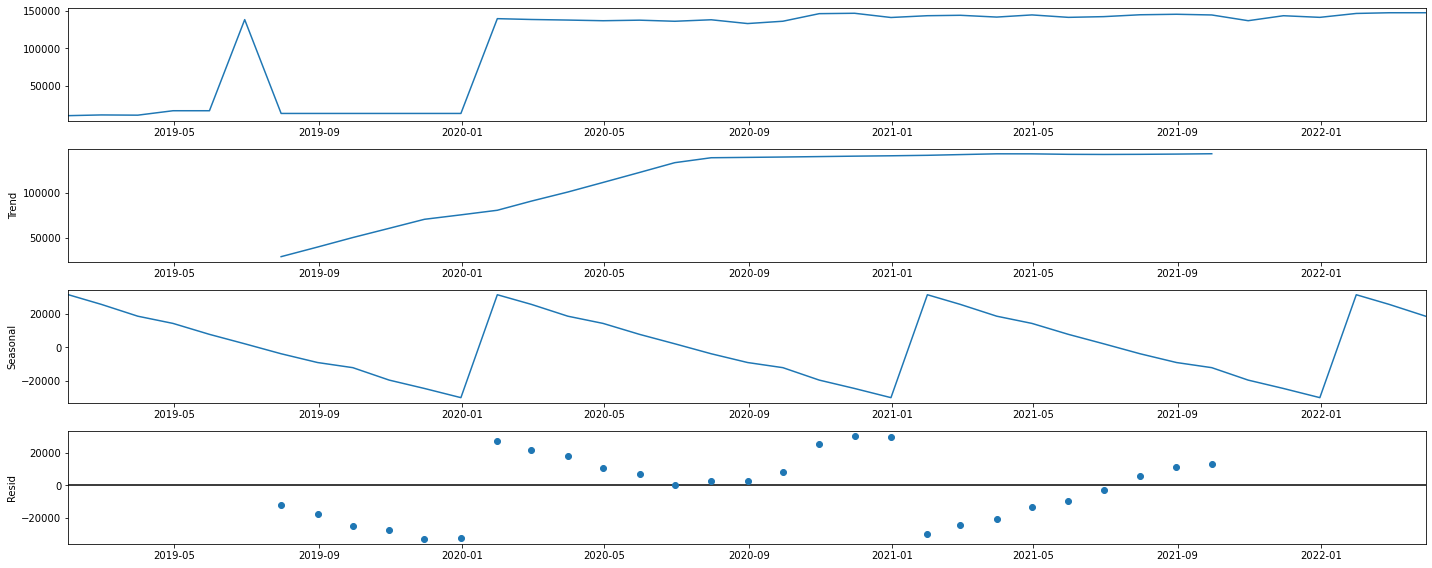

In [1442]:
decomposition = seasonal_decompose(df30,model='additive')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1443]:
df30test = adfuller(df30,regression='ct')
print('DF test statistic is %3.3f' %df30test[0])
print('DF test p-value is' ,df30test[1])
print('Number of lags used' ,df30test[2])

DF test statistic is -0.637
DF test p-value is 0.9769943927981627
Number of lags used 6


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1444]:
df30test = adfuller(df30.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df30test[0])
print('DF test p-value is' ,df30test[1])
print('Number of lags used' ,df30test[2])

DF test statistic is -6.111
DF test p-value is 1.2790172300739085e-06
Number of lags used 5


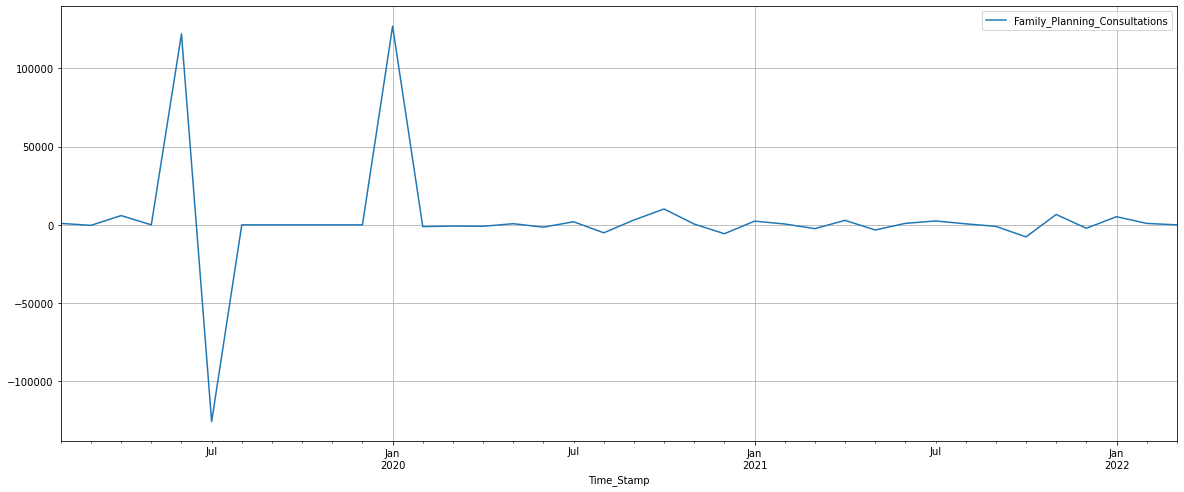

In [1445]:
df30.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1446]:
train_size = int(len(df30) * 0.8)
train=df30[0:train_size] 
test=df30[train_size:]

In [1447]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

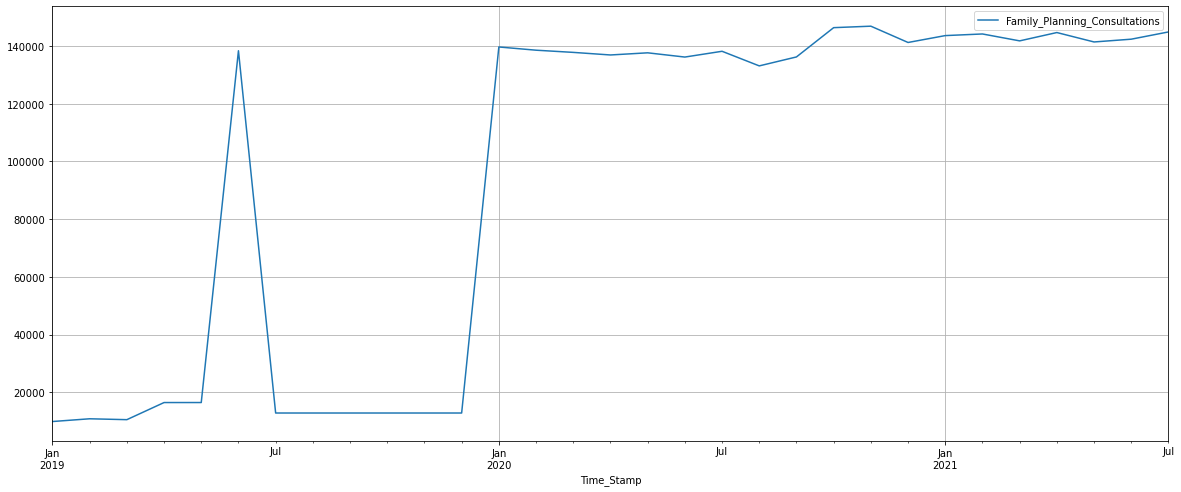

In [1448]:
train.plot(grid=True);

In [1449]:
df30test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df30test[0])
print('DF test p-value is' ,df30test[1])
print('Number of lags used' ,df30test[2])

DF test statistic is -0.336
DF test p-value is 0.9886463245630576
Number of lags used 6


Observation:

* The training data is non-stationary at 95% confidence level. 

In [1450]:
df30test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df30test[0])
print('DF test p-value is' ,df30test[1])
print('Number of lags used' ,df30test[2])

DF test statistic is -5.042
DF test p-value is 0.00017228981024060308
Number of lags used 5


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df30.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 143985.806
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 143985.806
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 143985.806
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 143985.806
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 143985.806
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 86569.848
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 1216746.198
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 84931.957
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 4302.975
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 3254.800
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 847551.527
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 5230.097
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 6690.022
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 4266.771
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 4591.945
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 3253.862
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 6492.896
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 5159.587
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 7893.573
 > Model[[(0, 0, 0), 

In [1451]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [1452]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [840]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Family_Planning_Consultations'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:699.3329693765568
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:527.1606425129152
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:395.99375655515945
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:260.0394600776331
SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:124.37334906187071
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:550.9546377625418
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:529.0213428047913
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:397.9937995530709
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:262.03933399462437
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:126.37326044113111
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:350.1833332352192
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:351.45911805656897
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:399.98070843881885
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:264.0326261926226
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:128.3724639334642
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:241.40739844116803
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:242.47561075419668
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:287.3172684230096
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:266

SARIMA(1, 1, 1)x(0, 0, 4, 6) - AIC:106.08880319657575
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:543.9583185199215
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:521.4268330175237
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:380.48281792828885
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:244.25514095446113
SARIMA(1, 1, 1)x(1, 0, 4, 6) - AIC:108.08885840514779
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:401.5085487811817
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:403.50428104458035
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:382.4726074878002
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:246.25376705198863
SARIMA(1, 1, 1)x(2, 0, 4, 6) - AIC:110.08885846980898
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:265.3113353616334
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:267.33795680110256
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:269.3113182764306
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:248.25371063598925
SARIMA(1, 1, 1)x(3, 0, 4, 6) - AIC:112.08886731090091
SARIMA(1, 1, 1)x(4, 0, 0, 6) - AIC:129.1110161253092
SARIMA(1, 1, 1)x(4, 0, 1, 6) - AIC:131.11102366738044
SARIMA(1, 1, 1)x(4, 0, 2, 6) - AIC:

SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:218.13552950952652
SARIMA(2, 1, 2)x(1, 0, 4, 6) - AIC:86.6879972020264
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:369.55348894203485
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:374.7294774397793
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:363.6084859716237
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:220.07305066021664
SARIMA(2, 1, 2)x(2, 0, 4, 6) - AIC:88.77952465917258
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:238.1257302005283
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:242.3050465700691
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:242.2718183360867
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:221.90336245443999
SARIMA(2, 1, 2)x(3, 0, 4, 6) - AIC:90.64947168352144
SARIMA(2, 1, 2)x(4, 0, 0, 6) - AIC:107.25824282125252
SARIMA(2, 1, 2)x(4, 0, 1, 6) - AIC:109.03325845871736
SARIMA(2, 1, 2)x(4, 0, 2, 6) - AIC:111.1305224706691
SARIMA(2, 1, 2)x(4, 0, 3, 6) - AIC:112.99979321004774
SARIMA(2, 1, 2)x(4, 0, 4, 6) - AIC:92.63981555767492
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:631.4387035471462
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:608.0

SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:311.6571139184331
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:189.32992219692667
SARIMA(3, 1, 3)x(2, 0, 4, 6) - AIC:67.3305522017018
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:206.00465768653976
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:257.44104651679623
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:209.9919795675386
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:191.32637712325152
SARIMA(3, 1, 3)x(3, 0, 4, 6) - AIC:69.33057990339812
SARIMA(3, 1, 3)x(4, 0, 0, 6) - AIC:83.99573364628465
SARIMA(3, 1, 3)x(4, 0, 1, 6) - AIC:85.9987281767391
SARIMA(3, 1, 3)x(4, 0, 2, 6) - AIC:87.99578162382815
SARIMA(3, 1, 3)x(4, 0, 3, 6) - AIC:89.99573900512249
SARIMA(3, 1, 3)x(4, 0, 4, 6) - AIC:71.33056160072246
SARIMA(3, 1, 4)x(0, 0, 0, 6) - AIC:600.9556816370559
SARIMA(3, 1, 4)x(0, 0, 1, 6) - AIC:507.5041039671643
SARIMA(3, 1, 4)x(0, 0, 2, 6) - AIC:248.94264983222487
SARIMA(3, 1, 4)x(0, 0, 3, 6) - AIC:140.1065370742867
SARIMA(3, 1, 4)x(0, 0, 4, 6) - AIC:40.871452035815125
SARIMA(3, 1, 4)x(1, 0, 0, 6) - AIC:494.901

SARIMA(4, 1, 4)x(3, 0, 1, 6) - AIC:180.05050552445618
SARIMA(4, 1, 4)x(3, 0, 2, 6) - AIC:161.94359043435253
SARIMA(4, 1, 4)x(3, 0, 3, 6) - AIC:147.1436987774922
SARIMA(4, 1, 4)x(3, 0, 4, 6) - AIC:48.73016232629743
SARIMA(4, 1, 4)x(4, 0, 0, 6) - AIC:59.45862630114514
SARIMA(4, 1, 4)x(4, 0, 1, 6) - AIC:61.466625063298686
SARIMA(4, 1, 4)x(4, 0, 2, 6) - AIC:63.455834043304336
SARIMA(4, 1, 4)x(4, 0, 3, 6) - AIC:65.45588452696155
SARIMA(4, 1, 4)x(4, 0, 4, 6) - AIC:50.729483835846295


In [841]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
104  (0, 1, 4)  (0, 0, 4, 6)  35.243915
229  (1, 1, 4)  (0, 0, 4, 6)  37.068256
109  (0, 1, 4)  (1, 0, 4, 6)  37.243962
354  (2, 1, 4)  (0, 0, 4, 6)  39.023051
234  (1, 1, 4)  (1, 0, 4, 6)  39.068262

In [1453]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Family_Planning_Consultations'],
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:     Family_Planning_Consultations   No. Observations:                   31
Model:                     SARIMAX(0, 1, [1], 6)   Log Likelihood                -225.324
Date:                           Tue, 18 Oct 2022   AIC                            454.649
Time:                                   11:32:22   BIC                            456.429
Sample:                               01-31-2019   HQIC                           454.894
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6      455.1879   5637.304      0.081      0.936   -1.06e+04    1.15e+04
sigma2      2.094e+04   5.22e+05      0.040

In [1454]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1455]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Family_Planning_Consultations           mean       mean_se  mean_ci_lower  \
2021-08-31                     144222.331833  65870.182133   15119.147197   
2021-09-30                     141817.245657  65870.182133   12714.061021   
2021-10-31                     144688.234087  65870.182133   15585.049451   
2021-11-30                     141415.941946  65870.182133   12312.757310   
2021-12-31                     142392.485793  65870.182133   13289.301157   

Family_Planning_Consultations  mean_ci_upper  
2021-08-31                     273325.516469  
2021-09-30                     270920.430293  
2021-10-31                     273791.418723  
2021-11-30                     270519.126582  
2021-12-31                     271495.670429

In [1456]:
rmse = mean_squared_error(test['Family_Planning_Consultations'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Family_Planning_Consultations'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3924.7604184106453 
MAPE: 2.2656425876889585


## Building the most optimum model on the Full Data.

In [1457]:
full_data_model = sm.tsa.statespace.SARIMAX(df30['Family_Planning_Consultations'],
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:     Family_Planning_Consultations   No. Observations:                   39
Model:                     SARIMAX(0, 1, [1], 6)   Log Likelihood                -320.397
Date:                           Tue, 18 Oct 2022   AIC                            644.794
Time:                                   11:34:26   BIC                            647.310
Sample:                               01-31-2019   HQIC                           645.518
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -0.0908      0.242     -0.375      0.708      -0.566       0.384
sigma2      2.959e+09   3.53e-11   8.37e+19

In [1458]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1459]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

Family_Planning_Consultations           mean        mean_se  mean_ci_lower  \
2022-04-30                     137658.705071   54394.214495   31048.003693   
2022-05-31                     143439.760561   54394.214495   36829.059183   
2022-06-30                     141499.917721   54394.214495   34889.216343   
2022-07-31                     146484.083144   54394.214495   39873.381766   
2022-08-31                     147393.607856   54394.214495   40782.906478   
2022-09-30                     147311.206091   54394.214495   40700.504713   
2022-10-31                     137658.705071   73515.634625   -6429.291096   
2022-11-30                     143439.760561   73515.634625    -648.235606   
2022-12-31                     141499.917721   73515.634625   -2588.078445   
2023-01-31                     146484.083144   73515.634625    2396.086977   
2023-02-28                     147393.607856   73515.634625    3305.611690   
2023-03-31                     147311.206091   73515.634625    3223.209924   
2023-04-30                     137658.705071   88602.293978  -35998.600074   
2023-05-31                     143439.760561   88602.293978  -30217.544584   
2023-06-30                     141499.917721   88602.293978  -32157.387424   
2023-07-31                     146484.083144   88602.293978  -27173.222001   
2023-08-31                     147393.607856   88602.293978  -26263.697289   
2023-09-30                     147311.206091   88602.293978  -26346.099054   
2023-10-31                     137658.705071  101470.116103  -61219.067999   
2023-11-30                     143439.760561  101470.116103  -55438.012509   
2023-12-31                     141499.917721  101470.116103  -57377.855349   

Family_Planning_Consultations  mean_ci_upper  
2022-04-30                     244269.406449  
2022-05-31                     250050.461939  
2022-06-30                     248110.619099  
2022-07-31                     253094.784522  
2022-08-31                     254004.309234  
2022-09-30                     253921.907469  
2022-10-31                     281746.701237  
2022-11-30                     287527.756727  
2022-12-31                     285587.913888  
2023-01-31                     290572.079310  
2023-02-28                     291481.604023  
2023-03-31                     291399.202257  
2023-04-30                     311316.010216  
2023-05-31                     317097.065706  
2023-06-30                     315157.222866  
2023-07-31                     320141.388289  
2023-08-31                     321050.913001  
2023-09-30                     320968.511236  
2023-10-31                     336536.478141  
2023-11-30                     342317.533630  
2023-12-31                     340377.690791

In [1460]:
rmse = mean_squared_error(df30['Family_Planning_Consultations'],results_full_data_model.fittedvalues,squared=False)
print('Family_Planning_Consultations',rmse)

Family_Planning_Consultations 56821.37115083391


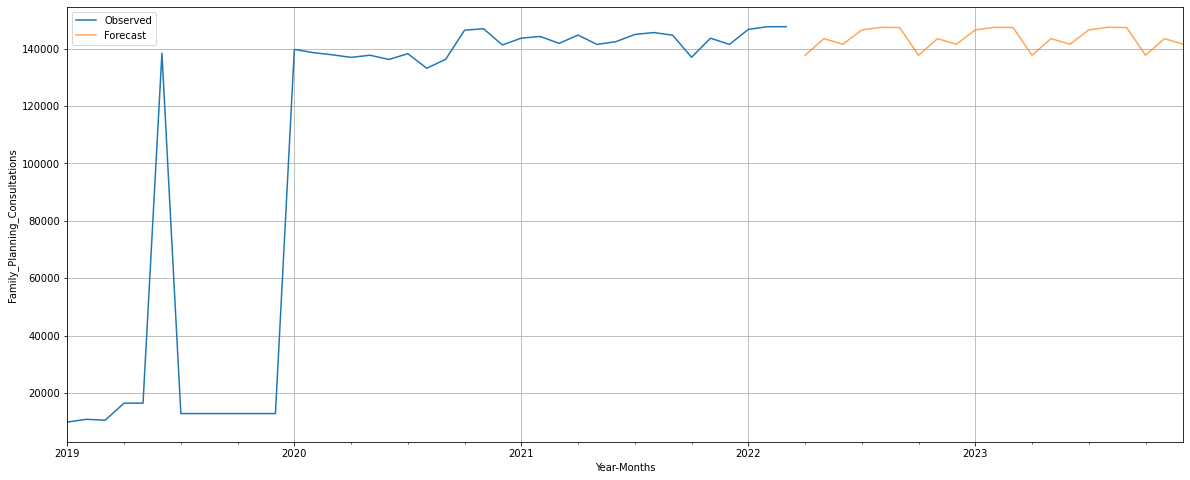

In [1461]:
axis = df30['Family_Planning_Consultations'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Family_Planning_Consultations')
plt.legend(loc='best')
plt.grid();

# women_starting_new_FP_method

In [1462]:
women_starting_new_FP_method=df[['women_starting_new_FP_method']]
women_starting_new_FP_method

women_starting_new_FP_method
Time_Stamp                              
2019-01-31                        2176.0
2019-02-28                        2313.0
2019-03-31                        2842.0
2019-04-30                        2605.0
2019-05-31                        1967.0
2019-06-30                        1919.0
2019-07-31                        1967.0
2019-08-31                        1803.0
2019-09-30                        1787.0
2019-10-31                        2230.0
2019-11-30                        1316.0
2019-12-31                        1579.0
2020-01-31                        1418.0
2020-02-29                        1502.0
2020-03-31                        1347.0
2020-04-30                        1590.0
2020-05-31                        1717.0
2020-06-30                        1831.0
2020-07-31                        1604.0
2020-08-31                        1630.0
2020-09-30                        1686.0
2020-10-31                        1476.0
2020-11-30                        1361.0
2020-12-31                        1423.0
2021-01-31                        1402.0
2021-02-28                        1356.0
2021-03-31                        1610.0
2021-04-30                        2596.0
2021-05-31                        2290.0
2021-06-30                        2764.0
2021-07-31                        1750.0
2021-08-31                        1683.0
2021-09-30                        1492.0
2021-10-31                        1576.0
2021-11-30                        1825.0
2021-12-31                        2041.0
2022-01-31                        1848.0
2022-02-28                        1590.0
2022-03-31                        1951.0

In [1463]:
df40=women_starting_new_FP_method.copy()

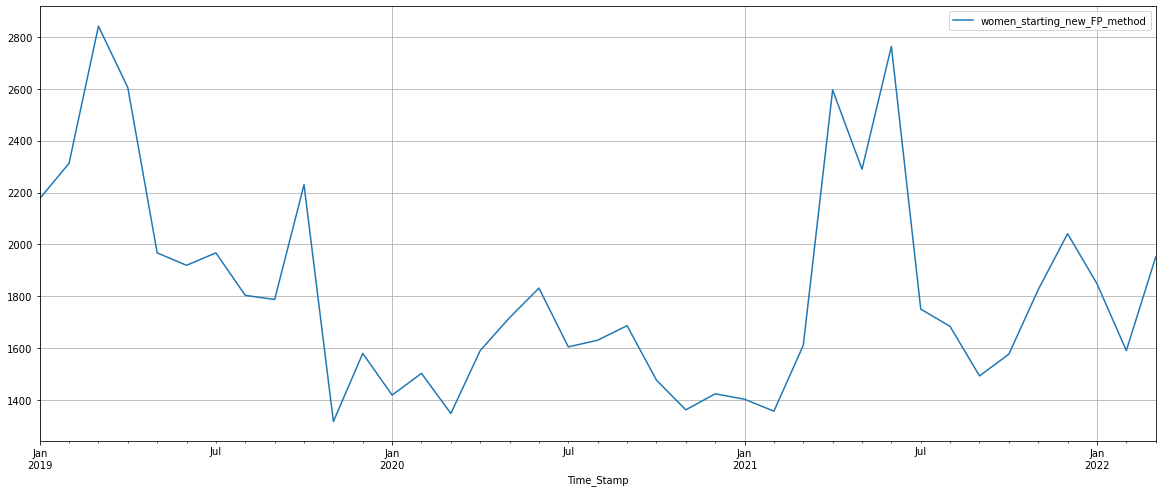

In [1464]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df40.plot(grid=True);

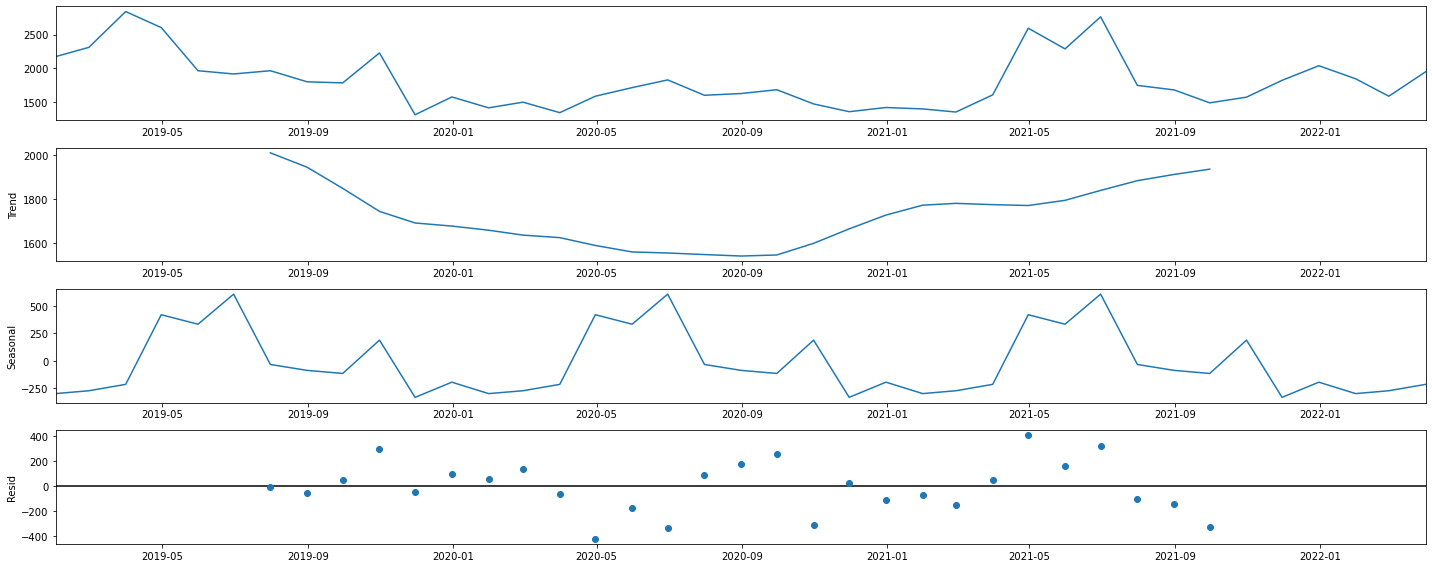

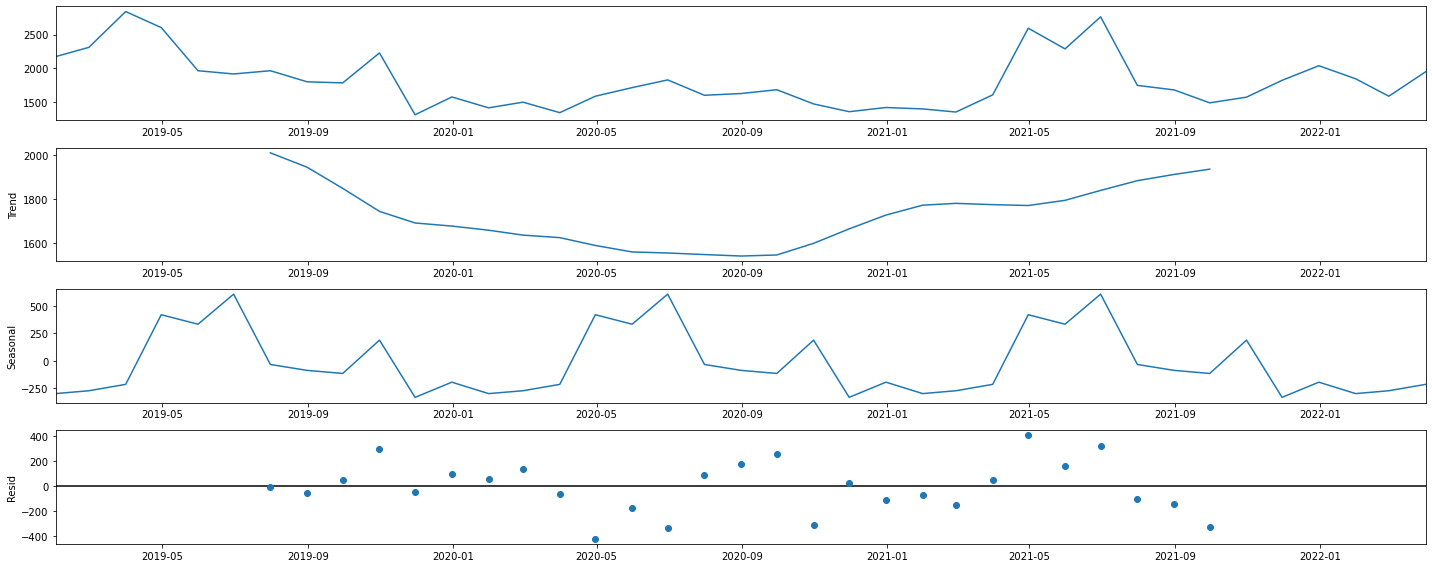

In [1465]:
decomposition=seasonal_decompose(df40,model='additive')
decomposition.plot()

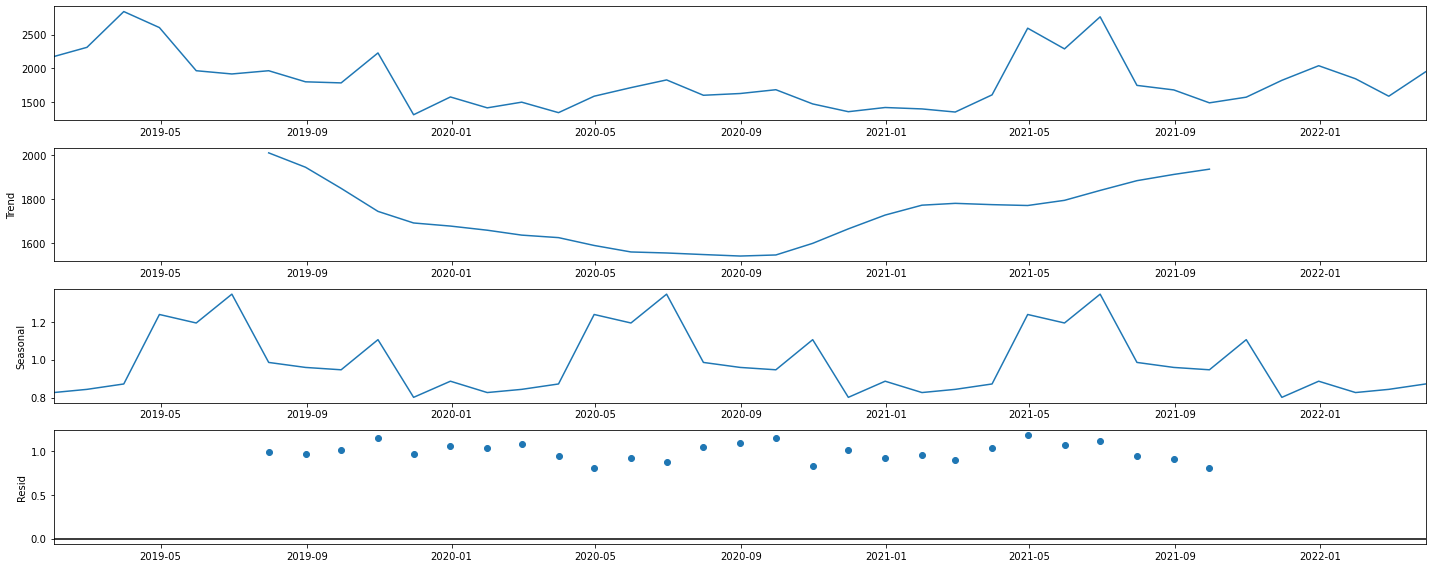

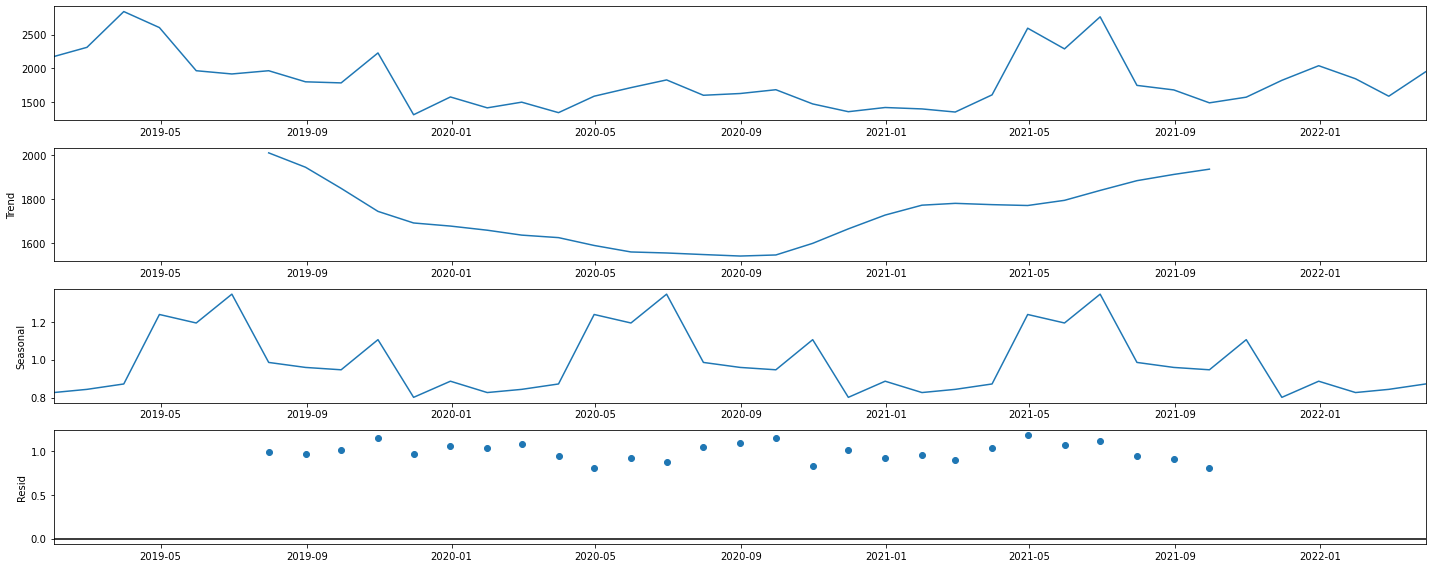

In [1466]:
decomposition=seasonal_decompose(df40,model='multiplicative')
decomposition.plot()

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1467]:
df40test = adfuller(df40,regression='ct')
print('DF test statistic is %3.3f' %df40test[0])
print('DF test p-value is' ,df40test[1])
print('Number of lags used' ,df40test[2])

DF test statistic is -3.457
DF test p-value is 0.044199101687679695
Number of lags used 2


Observation:

* At 95% confidence level the Time Series is stationary.

## Split the data into train and test and plot the training and test data.

In [1468]:
train_size = int(len(df40) * 0.8)
train=df40[0:train_size] 
test=df40[train_size:]

In [1469]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

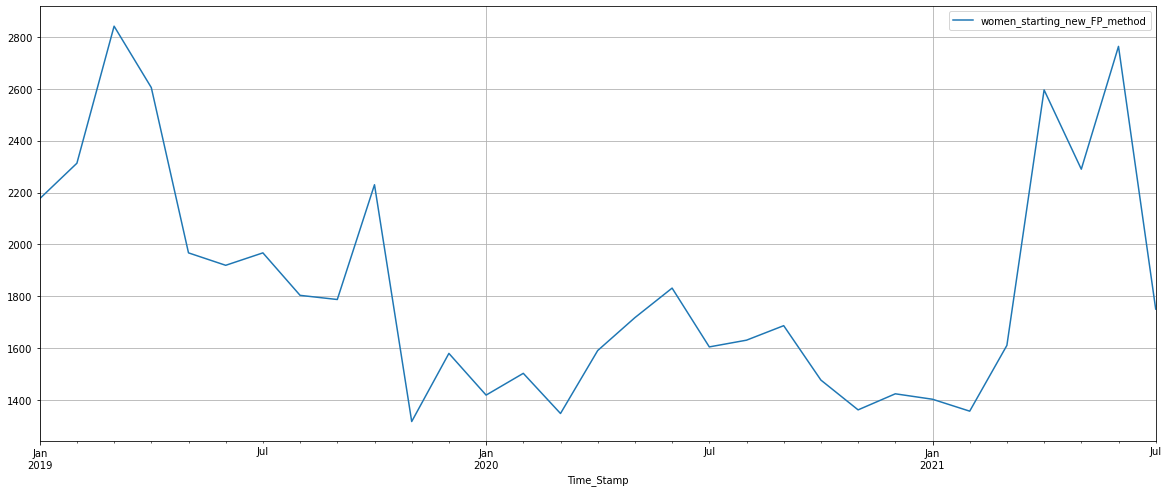

In [1470]:
train.plot(grid=True);

In [1471]:
df40test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df40test[0])
print('DF test p-value is' ,df40test[1])
print('Number of lags used' ,df40test[2])

DF test statistic is -1.539
DF test p-value is 0.8152609901283603
Number of lags used 4


Observation:

* The training data is non-stationary at 95% confidence level. 

In [1472]:
df40test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df40test[0])
print('DF test p-value is' ,df40test[1])
print('Number of lags used' ,df40test[2])

DF test statistic is -3.567
DF test p-value is 0.032709411642816544
Number of lags used 5


In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1, ]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df40.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)


In [1473]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [1474]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1475]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['women_starting_new_FP_method'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:431.0634405379213
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:345.29268648678146
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:256.0763620909324
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:173.68003647347058
SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:88.6945969145423
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:359.01618149325157
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:346.1896652560727
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:256.71431997039963
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:174.27972750095816
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:87.53592669166927
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:270.733965533542
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:272.57493852186593
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:258.57464227130765
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:175.16014785392437
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:86.02345896754974
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:184.45185118964838
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:186.42767777969522
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:186.41413465392844
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:17

SARIMA(1, 1, 1)x(0, 0, 4, 6) - AIC:75.91390711562752
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:343.11099291096707
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:331.4251776296362
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:240.55393242673617
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:158.25179205108378
SARIMA(1, 1, 1)x(1, 0, 4, 6) - AIC:72.81338053472606
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:253.83931539826585
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:255.30870105960778
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:242.3096601793461
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:160.13086154600666
SARIMA(1, 1, 1)x(2, 0, 4, 6) - AIC:72.28202467385184
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:170.81969267621872
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:170.3212386330065
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:173.09013068559148
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:162.11332937451235
SARIMA(1, 1, 1)x(3, 0, 4, 6) - AIC:71.86821503777885
SARIMA(1, 1, 1)x(4, 0, 0, 6) - AIC:71.87178467219749
SARIMA(1, 1, 1)x(4, 0, 1, 6) - AIC:56.35576972369323
SARIMA(1, 1, 1)x(4, 0, 2, 6) - AIC:7.

SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:145.1245721551149
SARIMA(2, 1, 2)x(1, 0, 4, 6) - AIC:13.111287700979256
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:244.02790919301336
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:240.33267204621623
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:230.19989400090995
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:146.10811411668894
SARIMA(2, 1, 2)x(2, 0, 4, 6) - AIC:61.903009022040905
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:155.5263649584928
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:160.03146078604712
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:161.02539769474004
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:149.30677933334306
SARIMA(2, 1, 2)x(3, 0, 4, 6) - AIC:21.501029150510742
SARIMA(2, 1, 2)x(4, 0, 0, 6) - AIC:63.08557048658833
SARIMA(2, 1, 2)x(4, 0, 1, 6) - AIC:60.648233060632414
SARIMA(2, 1, 2)x(4, 0, 2, 6) - AIC:75.69598084582508
SARIMA(2, 1, 2)x(4, 0, 3, 6) - AIC:77.5198182056265
SARIMA(2, 1, 2)x(4, 0, 4, 6) - AIC:61.44310807305993
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:386.4738912218009
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2

SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:204.9482741918026
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:100.49254100141474
SARIMA(3, 1, 3)x(2, 0, 4, 6) - AIC:23.78871870247577
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:127.63324799548391
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:125.69801846020917
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:124.81175200179953
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:114.69506403429031
SARIMA(3, 1, 3)x(3, 0, 4, 6) - AIC:33.29864266495202
SARIMA(3, 1, 3)x(4, 0, 0, 6) - AIC:51.161255857964406
SARIMA(3, 1, 3)x(4, 0, 1, 6) - AIC:56.441992156161824
SARIMA(3, 1, 3)x(4, 0, 2, 6) - AIC:24.648519244811986
SARIMA(3, 1, 3)x(4, 0, 3, 6) - AIC:25.80557996887204
SARIMA(3, 1, 3)x(4, 0, 4, 6) - AIC:46.129645549744204
SARIMA(3, 1, 4)x(0, 0, 0, 6) - AIC:373.6150758384781
SARIMA(3, 1, 4)x(0, 0, 1, 6) - AIC:285.5151469029152
SARIMA(3, 1, 4)x(0, 0, 2, 6) - AIC:202.38655580918285
SARIMA(3, 1, 4)x(0, 0, 3, 6) - AIC:115.67660890157799
SARIMA(3, 1, 4)x(0, 0, 4, 6) - AIC:24.33541832948355
SARIMA(3, 1, 4)x(1, 0, 0, 6) - AIC:

SARIMA(4, 1, 4)x(3, 0, 1, 6) - AIC:107.51294059349269
SARIMA(4, 1, 4)x(3, 0, 2, 6) - AIC:105.65775682072942
SARIMA(4, 1, 4)x(3, 0, 3, 6) - AIC:122.43677457498423
SARIMA(4, 1, 4)x(3, 0, 4, 6) - AIC:33.67905245053495
SARIMA(4, 1, 4)x(4, 0, 0, 6) - AIC:42.9300340359524
SARIMA(4, 1, 4)x(4, 0, 1, 6) - AIC:53.12771018061789
SARIMA(4, 1, 4)x(4, 0, 2, 6) - AIC:23.650090497396178
SARIMA(4, 1, 4)x(4, 0, 3, 6) - AIC:33.70373288495852
SARIMA(4, 1, 4)x(4, 0, 4, 6) - AIC:43.460241912554785
CPU times: total: 16min 54s
Wall time: 16min 33s


In [1476]:
SARIMA_AIC.sort_values(by=['AIC']).head()


param      seasonal       AIC
271  (2, 1, 0)  (4, 0, 1, 6) -9.453712
272  (2, 1, 0)  (4, 0, 2, 6) -6.476020
145  (1, 1, 0)  (4, 0, 0, 6) -0.487566
49   (0, 1, 1)  (4, 0, 4, 6)  0.650802
493  (3, 1, 4)  (3, 0, 3, 6)  1.438980

In [1477]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['women_starting_new_FP_method'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=100)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:      women_starting_new_FP_method   No. Observations:                   31
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 6)   Log Likelihood                -125.504
Date:                           Tue, 18 Oct 2022   AIC                            261.008
Time:                                   11:58:14   BIC                            265.174
Sample:                               01-31-2019   HQIC                           261.422
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5688      0.338      1.685      0.092      -0.093       1.230
ma.L1          0.0979      0.698      0.140

In [715]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [716]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

women_starting_new_FP_method         mean     mean_se  mean_ci_lower  \
2021-08-31                    1632.396471  379.721201     888.156593   
2021-09-30                    1695.742397  455.767014     802.455464   
2021-10-31                    1907.833115  477.722505     971.514211   
2021-11-30                    1649.421807  484.601453     699.620411   
2021-12-31                    1833.111337  486.781728     879.036681   

women_starting_new_FP_method  mean_ci_upper  
2021-08-31                      2376.636349  
2021-09-30                      2589.029331  
2021-10-31                      2844.152020  
2021-11-30                      2599.223203  
2021-12-31                      2787.185993

In [717]:
rmse = mean_squared_error(test['women_starting_new_FP_method'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['women_starting_new_FP_method'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 218.4266904310365 
MAPE: 11.136868419689717


## Building the most optimum model on the Full Data

In [739]:
full_data_model = sm.tsa.statespace.SARIMAX(df40['women_starting_new_FP_method'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:      women_starting_new_FP_method   No. Observations:                   39
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 6)   Log Likelihood                -226.142
Date:                           Mon, 17 Oct 2022   AIC                            462.283
Time:                                   22:35:58   BIC                            469.453
Sample:                               01-31-2019   HQIC                           464.621
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6341      0.280      2.265      0.024       0.085       1.183
ma.L1         -0.0471      0.484     -0.097

In [740]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [741]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

women_starting_new_FP_method         mean     mean_se  mean_ci_lower  \
2022-04-30                    2043.042610  347.021969    1362.892049   
2022-05-31                    1808.957062  402.386114    1020.294771   
2022-06-30                    1955.071313  422.606338    1126.778110   
2022-07-31                    1650.039759  430.468493     806.337016   
2022-08-31                    1537.455374  433.593142     687.628431   
2022-09-30                    1656.715899  434.137606     805.821827   
2022-10-31                    1852.420072  447.039547     976.238660   
2022-11-30                    1678.329381  451.523324     793.359928   
2022-12-31                    1856.888590  453.313536     968.410384   
2023-01-31                    1579.986311  454.031343     690.101231   
2023-02-28                    1483.702314  454.329044     593.233750   
2023-03-31                    1609.676048  453.710979     720.418870   
2023-04-30                    1807.355202  462.620262     900.636149   
2023-05-31                    1640.182718  465.670330     727.485641   
2023-06-30                    1817.638238  466.890996     902.548700   
2023-07-31                    1547.449030  467.380900     631.399298   
2023-08-31                    1453.914959  467.586904     537.461467   
2023-09-30                    1578.078620  466.974431     662.825554   
2023-10-31                    1772.371644  475.139627     841.115087   
2023-11-30                    1608.610319  477.934096     671.876705   
2023-12-31                    1782.842718  479.053019     843.916055   

women_starting_new_FP_method  mean_ci_upper  
2022-04-30                      2723.193171  
2022-05-31                      2597.619353  
2022-06-30                      2783.364515  
2022-07-31                      2493.742503  
2022-08-31                      2387.282316  
2022-09-30                      2507.609972  
2022-10-31                      2728.601485  
2022-11-30                      2563.298835  
2022-12-31                      2745.366795  
2023-01-31                      2469.871390  
2023-02-28                      2374.170878  
2023-03-31                      2498.933225  
2023-04-30                      2714.074254  
2023-05-31                      2552.879794  
2023-06-30                      2732.727776  
2023-07-31                      2463.498761  
2023-08-31                      2370.368451  
2023-09-30                      2493.331685  
2023-10-31                      2703.628201  
2023-11-30                      2545.343933  
2023-12-31                      2721.769381

In [742]:
rmse = mean_squared_error(df40['women_starting_new_FP_method'],results_full_data_model.fittedvalues,squared=False)
print('HIV_patients_lost_to_followup',rmse)

HIV_patients_lost_to_followup 612.1099856264321


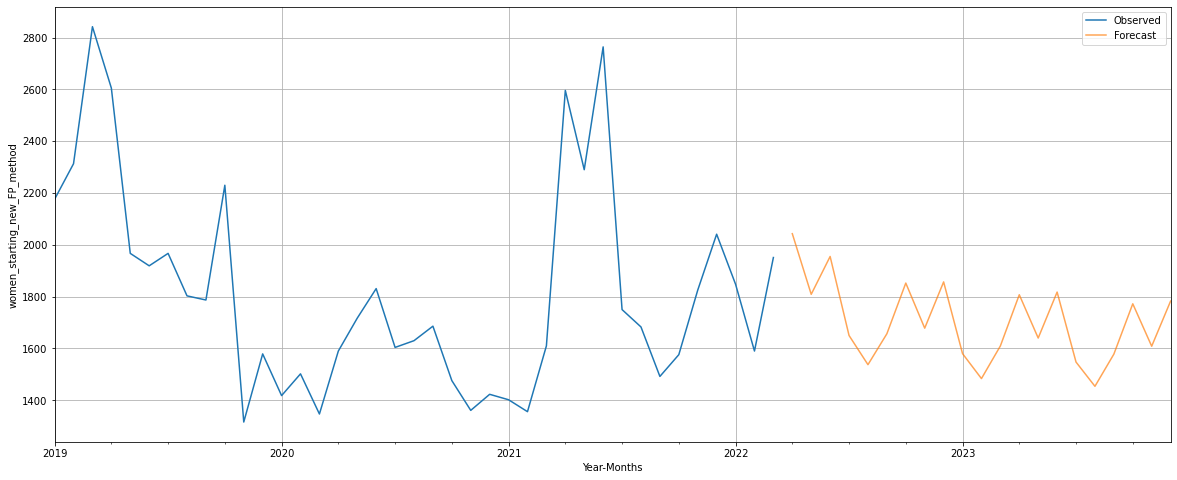

In [743]:
axis = df40['women_starting_new_FP_method'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('women_starting_new_FP_method')
plt.legend(loc='best')
plt.grid();

# NCD_patients_currently_in_care

In [1478]:
NCD_patients_currently_in_care=df[['NCD_patients_currently_in_care']]
NCD_patients_currently_in_care

NCD_patients_currently_in_care
Time_Stamp                                
2019-01-31                          4999.0
2019-02-28                          5179.0
2019-03-31                          5298.0
2019-04-30                          5888.0
2019-05-31                          5887.0
2019-06-30                          6392.0
2019-07-31                          6392.0
2019-08-31                          6503.0
2019-09-30                          8041.0
2019-10-31                          6979.0
2019-11-30                          7096.0
2019-12-31                          7368.0
2020-01-31                          7518.0
2020-02-29                          7639.0
2020-03-31                          7728.0
2020-04-30                          7971.0
2020-05-31                          8302.0
2020-06-30                          8501.0
2020-07-31                          8535.0
2020-08-31                          8853.0
2020-09-30                          8680.0
2020-10-31                          9303.0
2020-11-30                          9626.0
2020-12-31                          9751.0
2021-01-31                         10100.0
2021-02-28                         10230.0
2021-03-31                         10391.0
2021-04-30                         10917.0
2021-05-31                         11140.0
2021-06-30                         11296.0
2021-07-31                         11320.0
2021-08-31                         10787.0
2021-09-30                         11302.0
2021-10-31                         13599.0
2021-11-30                         13789.0
2021-12-31                         13888.0
2022-01-31                         13538.0
2022-02-28                         13521.0
2022-03-31                         13470.0

In [1479]:
df50=NCD_patients_currently_in_care.copy()

In [1480]:
df50.describe()

NCD_patients_currently_in_care
count                       39.000000
mean                      9172.230769
std                       2633.601141
min                       4999.000000
25%                       7232.000000
50%                       8680.000000
75%                      11028.500000
max                      13888.000000

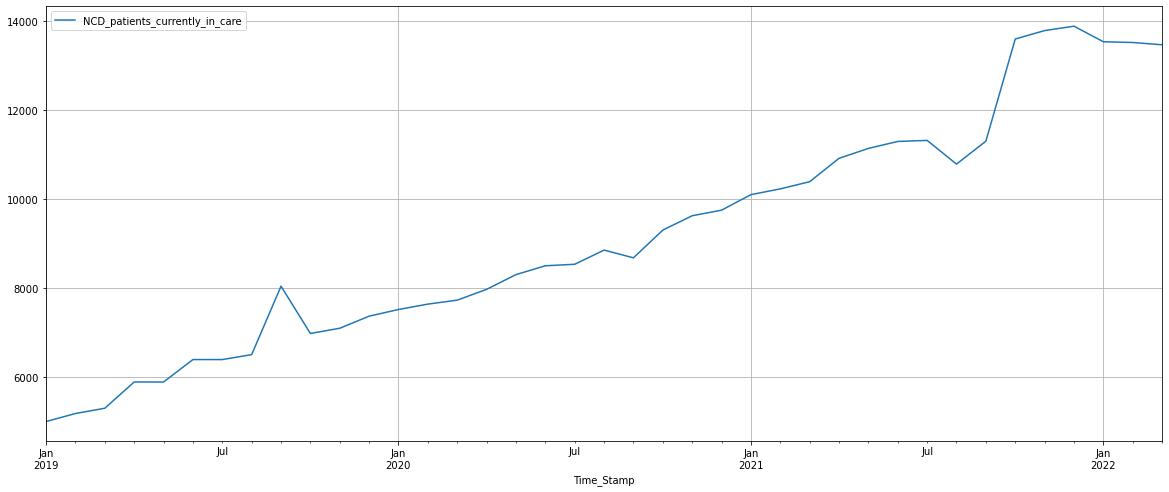

In [1481]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

df50.plot(grid=True);

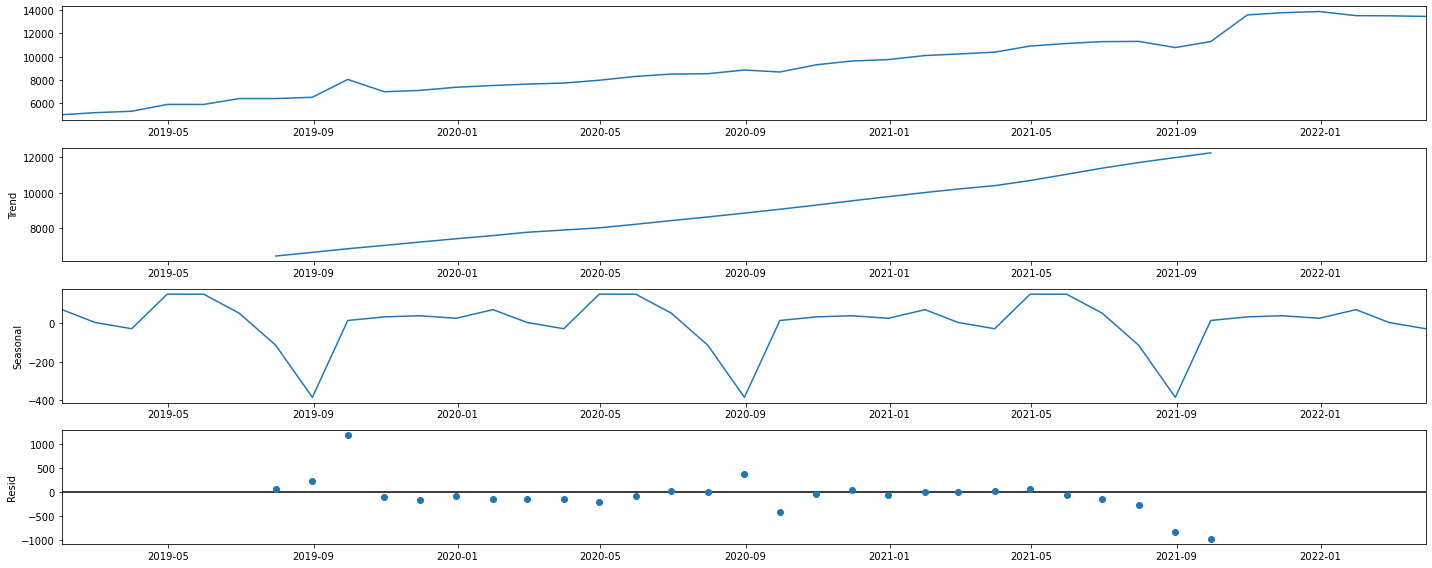

In [1482]:
decomposition = seasonal_decompose(df50,model='additive')
decomposition.plot();

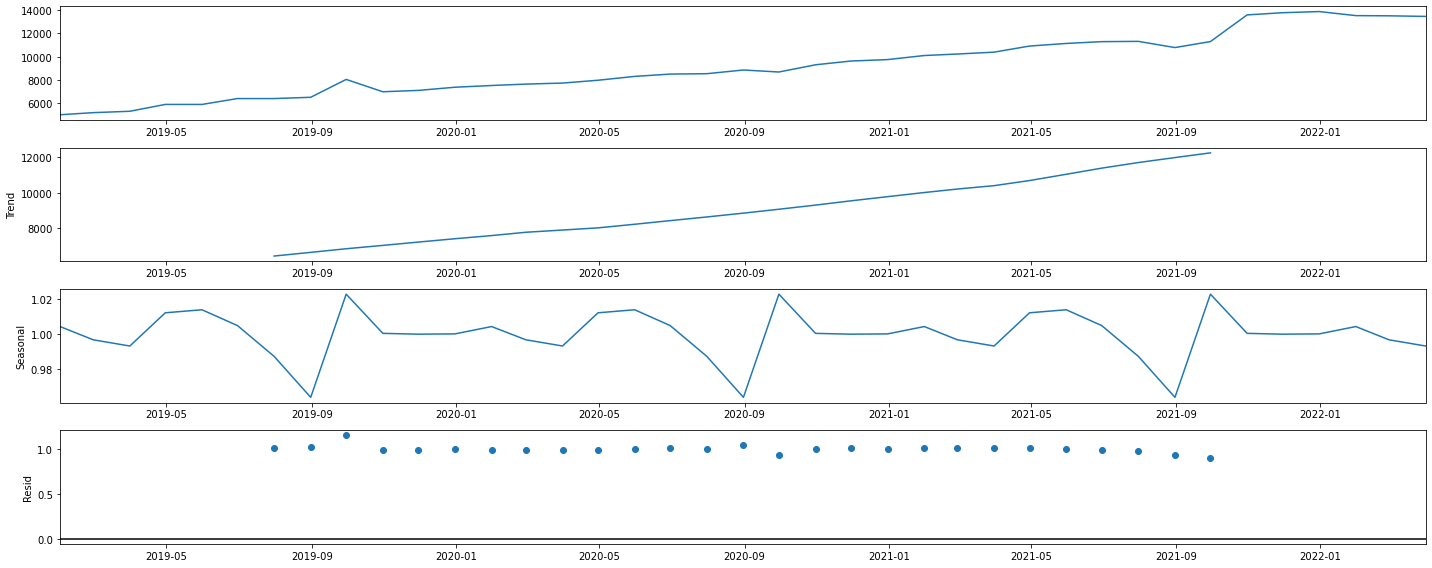

In [1483]:
decomposition = seasonal_decompose(df50,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1484]:
df50test = adfuller(df50,regression='ct')
print('DF test statistic is %3.3f' %df50test[0])
print('DF test p-value is' ,df50test[1])
print('Number of lags used' ,df50test[2])

DF test statistic is -3.148
DF test p-value is 0.09527515651206103
Number of lags used 1


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1485]:
df50test = adfuller(df50.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df50test[0])
print('DF test p-value is' ,df50test[1])
print('Number of lags used' ,df50test[2])

DF test statistic is -4.045
DF test p-value is 0.007583788609378057
Number of lags used 4


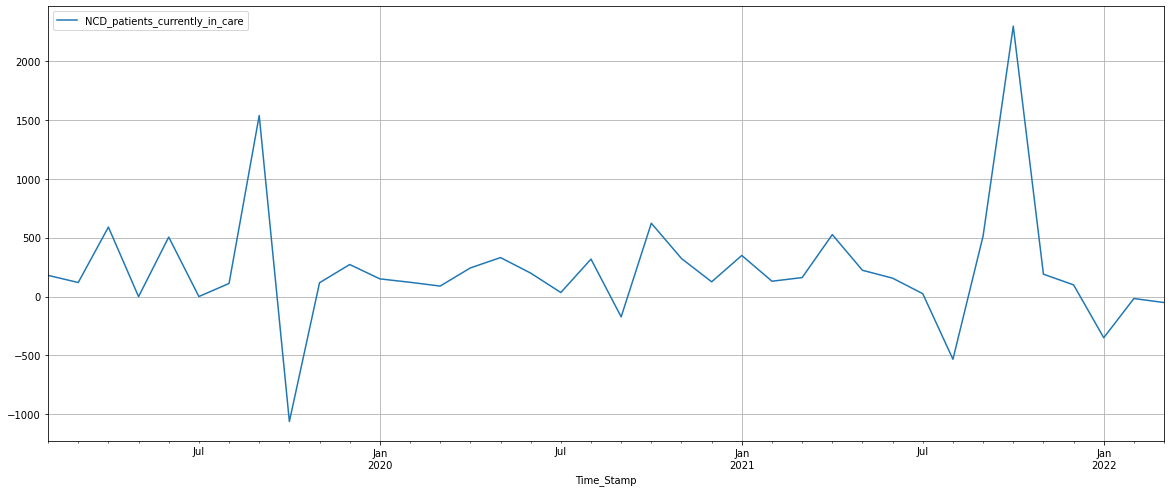

In [1486]:
df50.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1487]:
train_size = int(len(df50) * 0.8)
train=df50[0:train_size] 
test=df50[train_size:]

In [1488]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

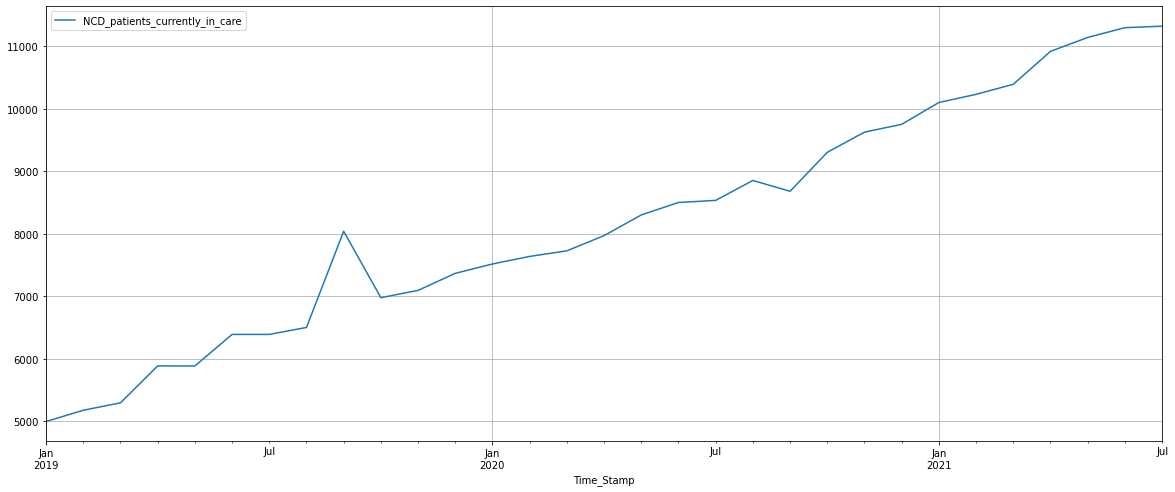

In [1489]:
train.plot(grid=True);

In [1490]:
df50test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df50test[0])
print('DF test p-value is' ,df50test[1])
print('Number of lags used' ,df50test[2])

DF test statistic is -4.381
DF test p-value is 0.0023459694943619457
Number of lags used 0


Observation:

* The training data is stationary at 95% confidence level.

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [139]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, ]
	d_params = [0, 1]
	q_params = [0, 1, ]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, ]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df50.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(39, 1)
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 12445.209
 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 12445.209
 > Model[[(0, 0, 0), (0, 0, 0, 8), 'n']] 12445.209
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 12445.209
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 12445.209
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 9246.923
 > Model[[(0, 0, 0), (0, 0, 1, 6), 'n']] 8737.936
 > Model[[(0, 0, 0), (0, 0, 1, 8), 'n']] 11161.241
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 10689.815
 > Model[[(0, 0, 0), (0, 0, 2, 4), 'n']] 3991563793.117
 > Model[[(0, 0, 0), (0, 0, 2, 8), 'n']] 4019.708
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 1597.060
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 1998.668
 > Model[[(0, 0, 0), (0, 1, 0, 8), 'n']] 2357.937
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 3265.328
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 1543.863
 > Model[[(0, 0, 0), (0, 0, 2, 12), 'n']] 3217.876
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 1733.040
 > Model[[(0, 0, 0), (0, 1, 1, 8), 'n']] 2267.697
 > Model[[(0, 0, 0), (0, 

In [1491]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 0, 4)(0, 0, 4, 6)
Model: (1, 0, 0)(1, 0, 0, 6)
Model: (1, 0, 1)(1, 0, 1, 6)
Model: (1, 0, 2)(1, 0, 2, 6)
Model: (1, 0, 3)(1, 0, 3, 6)
Model: (1, 0, 4)(1, 0, 4, 6)
Model: (2, 0, 0)(2, 0, 0, 6)
Model: (2, 0, 1)(2, 0, 1, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 0, 3)(2, 0, 3, 6)
Model: (2, 0, 4)(2, 0, 4, 6)
Model: (3, 0, 0)(3, 0, 0, 6)
Model: (3, 0, 1)(3, 0, 1, 6)
Model: (3, 0, 2)(3, 0, 2, 6)
Model: (3, 0, 3)(3, 0, 3, 6)
Model: (3, 0, 4)(3, 0, 4, 6)
Model: (4, 0, 0)(4, 0, 0, 6)
Model: (4, 0, 1)(4, 0, 1, 6)
Model: (4, 0, 2)(4, 0, 2, 6)
Model: (4, 0, 3)(4, 0, 3, 6)
Model: (4, 0, 4)(4, 0, 4, 6)


In [1492]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1493]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['NCD_patients_currently_in_care'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:629.9092792523965
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:509.2787129105433
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:351.1797928717442
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:215.65858158968402
SARIMA(0, 0, 0)x(0, 0, 4, 6) - AIC:103.6313516489908
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:389.6706587864888
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:376.0549306876699
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:271.6712664236917
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:163.988523732998
SARIMA(0, 0, 0)x(1, 0, 4, 6) - AIC:91.3626430358626
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:278.8893365825081
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:284.6002045519167
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:264.16533656148215
SARIMA(0, 0, 0)x(2, 0, 3, 6) - AIC:166.01743922637073
SARIMA(0, 0, 0)x(2, 0, 4, 6) - AIC:87.33279060057708
SARIMA(0, 0, 0)x(3, 0, 0, 6) - AIC:173.6129579647801
SARIMA(0, 0, 0)x(3, 0, 1, 6) - AIC:173.44906518796975
SARIMA(0, 0, 0)x(3, 0, 2, 6) - AIC:174.31002625852327
SARIMA(0, 0, 0)x(3, 0, 3, 6) - AIC:164.9075

SARIMA(1, 0, 1)x(0, 0, 4, 6) - AIC:79.23971220384506
SARIMA(1, 0, 1)x(1, 0, 0, 6) - AIC:370.35022791592803
SARIMA(1, 0, 1)x(1, 0, 1, 6) - AIC:350.26091630331297
SARIMA(1, 0, 1)x(1, 0, 2, 6) - AIC:244.21926511069984
SARIMA(1, 0, 1)x(1, 0, 3, 6) - AIC:158.13071437933516
SARIMA(1, 0, 1)x(1, 0, 4, 6) - AIC:78.73912984224029
SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:234.6461936222203
SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:268.5750538081138
SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:244.96262346687865
SARIMA(1, 0, 1)x(2, 0, 3, 6) - AIC:153.08417368984738
SARIMA(1, 0, 1)x(2, 0, 4, 6) - AIC:79.47007242017969
SARIMA(1, 0, 1)x(3, 0, 0, 6) - AIC:150.95184336786247
SARIMA(1, 0, 1)x(3, 0, 1, 6) - AIC:150.28588187609506
SARIMA(1, 0, 1)x(3, 0, 2, 6) - AIC:151.74446135183427
SARIMA(1, 0, 1)x(3, 0, 3, 6) - AIC:166.55108065779558
SARIMA(1, 0, 1)x(3, 0, 4, 6) - AIC:81.59558151711482
SARIMA(1, 0, 1)x(4, 0, 0, 6) - AIC:78.39058619436507
SARIMA(1, 0, 1)x(4, 0, 1, 6) - AIC:86.90258558761477
SARIMA(1, 0, 1)x(4, 0, 2, 6) - AIC:8

SARIMA(2, 0, 2)x(1, 0, 3, 6) - AIC:144.10302477109013
SARIMA(2, 0, 2)x(1, 0, 4, 6) - AIC:62.75076311479729
SARIMA(2, 0, 2)x(2, 0, 0, 6) - AIC:235.01676597710556
SARIMA(2, 0, 2)x(2, 0, 1, 6) - AIC:253.20659890637506
SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:236.0400627614199
SARIMA(2, 0, 2)x(2, 0, 3, 6) - AIC:156.09150610394477
SARIMA(2, 0, 2)x(2, 0, 4, 6) - AIC:62.350507223674704
SARIMA(2, 0, 2)x(3, 0, 0, 6) - AIC:164.7258831211539
SARIMA(2, 0, 2)x(3, 0, 1, 6) - AIC:149.5104647614857
SARIMA(2, 0, 2)x(3, 0, 2, 6) - AIC:168.713425727252
SARIMA(2, 0, 2)x(3, 0, 3, 6) - AIC:157.22050445706375
SARIMA(2, 0, 2)x(3, 0, 4, 6) - AIC:38.594167936201956
SARIMA(2, 0, 2)x(4, 0, 0, 6) - AIC:39.94278810077383
SARIMA(2, 0, 2)x(4, 0, 1, 6) - AIC:37.07509328075752
SARIMA(2, 0, 2)x(4, 0, 2, 6) - AIC:32.631221210333514
SARIMA(2, 0, 2)x(4, 0, 3, 6) - AIC:78.11342624952492
SARIMA(2, 0, 2)x(4, 0, 4, 6) - AIC:79.62482953216099
SARIMA(2, 0, 3)x(0, 0, 0, 6) - AIC:395.19512673509735
SARIMA(2, 0, 3)x(0, 0, 1, 6) - AIC:282

SARIMA(3, 0, 3)x(2, 0, 2, 6) - AIC:212.47827943904264
SARIMA(3, 0, 3)x(2, 0, 3, 6) - AIC:124.33489020879057
SARIMA(3, 0, 3)x(2, 0, 4, 6) - AIC:44.96670458730817
SARIMA(3, 0, 3)x(3, 0, 0, 6) - AIC:143.17128488758658
SARIMA(3, 0, 3)x(3, 0, 1, 6) - AIC:145.16339816068677
SARIMA(3, 0, 3)x(3, 0, 2, 6) - AIC:145.45369718433196
SARIMA(3, 0, 3)x(3, 0, 3, 6) - AIC:136.3220652867695
SARIMA(3, 0, 3)x(3, 0, 4, 6) - AIC:64.26910935764705
SARIMA(3, 0, 3)x(4, 0, 0, 6) - AIC:70.35871662228706
SARIMA(3, 0, 3)x(4, 0, 1, 6) - AIC:72.35461508364826
SARIMA(3, 0, 3)x(4, 0, 2, 6) - AIC:71.46393800683694
SARIMA(3, 0, 3)x(4, 0, 3, 6) - AIC:30.762698887484273
SARIMA(3, 0, 3)x(4, 0, 4, 6) - AIC:32.7842788167185
SARIMA(3, 0, 4)x(0, 0, 0, 6) - AIC:387.4171397909596
SARIMA(3, 0, 4)x(0, 0, 1, 6) - AIC:273.29775702391476
SARIMA(3, 0, 4)x(0, 0, 2, 6) - AIC:201.1096699839304
SARIMA(3, 0, 4)x(0, 0, 3, 6) - AIC:122.83762461654636
SARIMA(3, 0, 4)x(0, 0, 4, 6) - AIC:29.857236339971546
SARIMA(3, 0, 4)x(1, 0, 0, 6) - AIC:339

SARIMA(4, 0, 4)x(3, 0, 1, 6) - AIC:122.54476498755494
SARIMA(4, 0, 4)x(3, 0, 2, 6) - AIC:138.20240931312503
SARIMA(4, 0, 4)x(3, 0, 3, 6) - AIC:126.85797262312829
SARIMA(4, 0, 4)x(3, 0, 4, 6) - AIC:55.804169575118635
SARIMA(4, 0, 4)x(4, 0, 0, 6) - AIC:33.243127718400544
SARIMA(4, 0, 4)x(4, 0, 1, 6) - AIC:47.900352580331386
SARIMA(4, 0, 4)x(4, 0, 2, 6) - AIC:59.84301576585745
SARIMA(4, 0, 4)x(4, 0, 3, 6) - AIC:45.649464439777816
SARIMA(4, 0, 4)x(4, 0, 4, 6) - AIC:56.251763912383595
CPU times: total: 23min 7s
Wall time: 23min 22s


In [1494]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal        AIC
398  (3, 0, 0)  (4, 0, 3, 6)   9.651134
234  (1, 0, 4)  (1, 0, 4, 6)  18.022746
399  (3, 0, 0)  (4, 0, 4, 6)  18.040204
274  (2, 0, 0)  (4, 0, 4, 6)  19.581219
497  (3, 0, 4)  (4, 0, 2, 6)  20.477871

In [1495]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['NCD_patients_currently_in_care'],
                                order=(0, 0, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:      NCD_patients_currently_in_care   No. Observations:                   31
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                -146.935
Date:                             Tue, 18 Oct 2022   AIC                            299.871
Time:                                     12:25:31   BIC                            302.704
Sample:                                 01-31-2019   HQIC                           300.350
                                      - 07-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          4.9426      6.466      0.764      0.445      -7.731      17.616
ar.S.L12       1.3344      

In [1496]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1497]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

NCD_patients_currently_in_care          mean     mean_se  mean_ci_lower  \
2021-08-31                      11801.315980  561.052363   10701.673554   
2021-09-30                      11582.396410  572.420583   10460.472683   
2021-10-31                      12413.713572  572.420583   11291.789845   
2021-11-30                      12844.717494  572.420583   11722.793766   
2021-12-31                      13011.514677  572.420583   11889.590950   

NCD_patients_currently_in_care  mean_ci_upper  
2021-08-31                       12900.958406  
2021-09-30                       12704.320138  
2021-10-31                       13535.637299  
2021-11-30                       13966.641221  
2021-12-31                       14133.438405

In [1498]:
rmse = mean_squared_error(test['NCD_patients_currently_in_care'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['NCD_patients_currently_in_care'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 737.3266295994686 
MAPE: 4.762955688283004


In [1499]:
full_data_model = sm.tsa.statespace.SARIMAX(df50['NCD_patients_currently_in_care'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:      NCD_patients_currently_in_care   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -108.457
Date:                             Tue, 18 Oct 2022   AIC                            222.914
Time:                                     12:25:32   BIC                            224.832
Sample:                                 01-31-2019   HQIC                           222.737
                                      - 03-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1722      0.737      0.234      0.815      -1.273       1.617
ar.S.L12       0.1522      

In [1500]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1501]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

NCD_patients_currently_in_care          mean      mean_se  mean_ci_lower  \
2022-04-30                      14001.301329   559.933342   12903.852146   
2022-05-31                      14207.865679   862.734087   12516.937939   
2022-06-30                      14357.321855  1084.017926   12232.685762   
2022-07-31                      14379.800036  1267.233058   11896.068883   
2022-08-31                      13717.293201  1427.117508   10920.194283   
2022-09-30                      14336.994379  1570.811618   11258.260181   
2022-10-31                      16888.746955  1702.420012   13552.065044   
2022-11-30                      17058.506757  1824.559853   13482.435157   
2022-12-31                      17153.550026  1939.021252   13353.138207   
2023-01-31                      16697.174846  2047.092615   12684.947048   
2023-02-28                      16657.804100  2149.737875   12444.395288   
2023-03-31                      16574.541528  2247.700534   12169.129433   
2023-04-30                      17106.649624  2597.311342   12016.012938   
2023-05-31                      17310.712764  2956.581232   11515.920032   
2023-06-30                      17459.173089  3276.693297   11036.972239   
2023-07-31                      17481.419676  3568.201975   10487.872315   
2023-08-31                      16799.204239  3837.631003    9277.585687   
2023-09-30                      17434.839046  4089.346903    9419.866396   
2023-10-31                      20025.360365  4326.442473   11545.688937   
2023-11-30                      20192.039973  4551.203231   11271.845555   
2023-12-31                      20286.481100  4765.374825   10946.518070   

NCD_patients_currently_in_care  mean_ci_upper  
2022-04-30                       15098.750512  
2022-05-31                       15898.793419  
2022-06-30                       16481.957949  
2022-07-31                       16863.531189  
2022-08-31                       16514.392118  
2022-09-30                       17415.728577  
2022-10-31                       20225.428866  
2022-11-30                       20634.578356  
2022-12-31                       20953.961845  
2023-01-31                       20709.402645  
2023-02-28                       20871.212912  
2023-03-31                       20979.953623  
2023-04-30                       22197.286310  
2023-05-31                       23105.505497  
2023-06-30                       23881.373939  
2023-07-31                       24474.967037  
2023-08-31                       24320.822790  
2023-09-30                       25449.811696  
2023-10-31                       28505.031792  
2023-11-30                       29112.234391  
2023-12-31                       29626.444130

In [1502]:
rmse = mean_squared_error(df50['NCD_patients_currently_in_care'],results_full_data_model.fittedvalues,squared=False)
print('NCD_patients_currently_in_care',rmse)

NCD_patients_currently_in_care 1177.828390232318


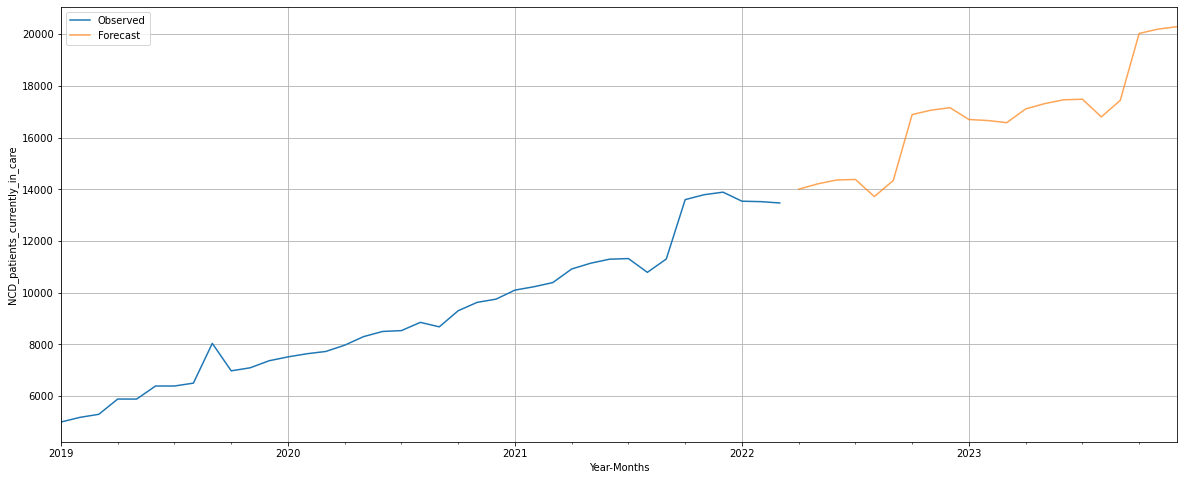

In [1503]:
axis = df50['NCD_patients_currently_in_care'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('NCD_patients_currently_in_care')
plt.legend(loc='best')
plt.grid();

# cancer_patients_currently_in_treatment

In [1504]:
cancer_patients_currently_in_treatment=df[['cancer_patients_currently_in_treatment']]
cancer_patients_currently_in_treatment

cancer_patients_currently_in_treatment
Time_Stamp                                        
2019-01-31                                  3391.0
2019-02-28                                  3317.0
2019-03-31                                  3252.0
2019-04-30                                  2644.0
2019-05-31                                  2717.0
2019-06-30                                  2750.0
2019-07-31                                  2750.0
2019-08-31                                  2788.0
2019-09-30                                  2834.0
2019-10-31                                  2938.0
2019-11-30                                  2938.0
2019-12-31                                  2938.0
2020-01-31                                  2527.0
2020-02-29                                  2527.0
2020-03-31                                  2506.0
2020-04-30                                  2419.0
2020-05-31                                  2392.0
2020-06-30                                  2416.0
2020-07-31                                  2323.0
2020-08-31                                  2327.0
2020-09-30                                  2305.0
2020-10-31                                  2347.0
2020-11-30                                  2355.0
2020-12-31                                  2296.0
2021-01-31                                  2237.0
2021-02-28                                  2295.0
2021-03-31                                  2453.0
2021-04-30                                  2572.0
2021-05-31                                  2678.0
2021-06-30                                  2776.0
2021-07-31                                  3048.0
2021-08-31                                  3020.0
2021-09-30                                  2998.0
2021-10-31                                  2952.0
2021-11-30                                  2936.0
2021-12-31                                  2929.0
2022-01-31                                  2865.0
2022-02-28                                  2910.0
2022-03-31                                  2910.0

In [1505]:
df60=cancer_patients_currently_in_treatment.copy()

In [1506]:
df60.isnull().sum()

cancer_patients_currently_in_treatment    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data.

In [1507]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8


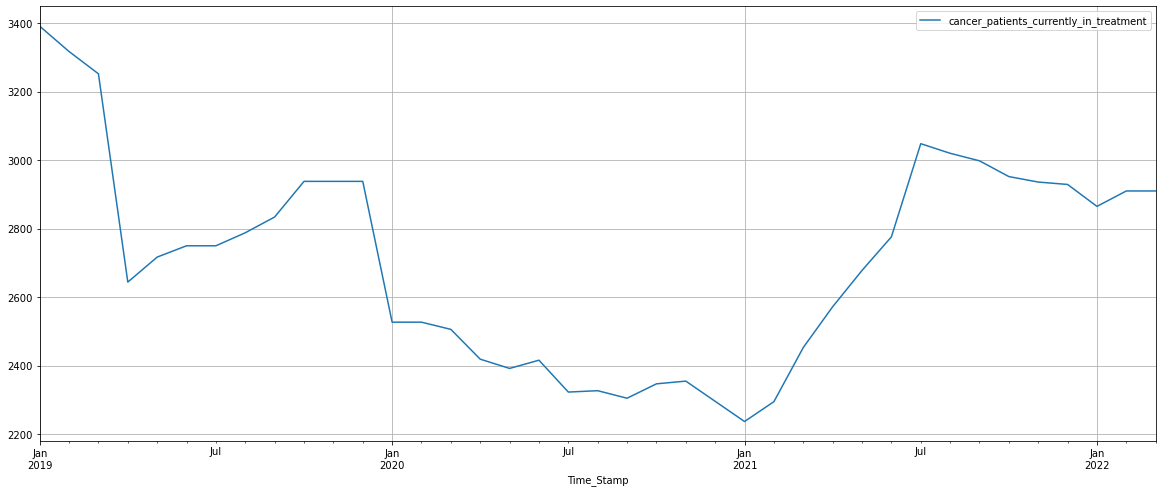

In [1508]:
df60.plot(grid=True);

In [1509]:
df60.describe()

cancer_patients_currently_in_treatment
count                               39.000000
mean                              2707.076923
std                                308.754151
min                               2237.000000
25%                               2417.500000
50%                               2750.000000
75%                               2937.000000
max                               3391.000000

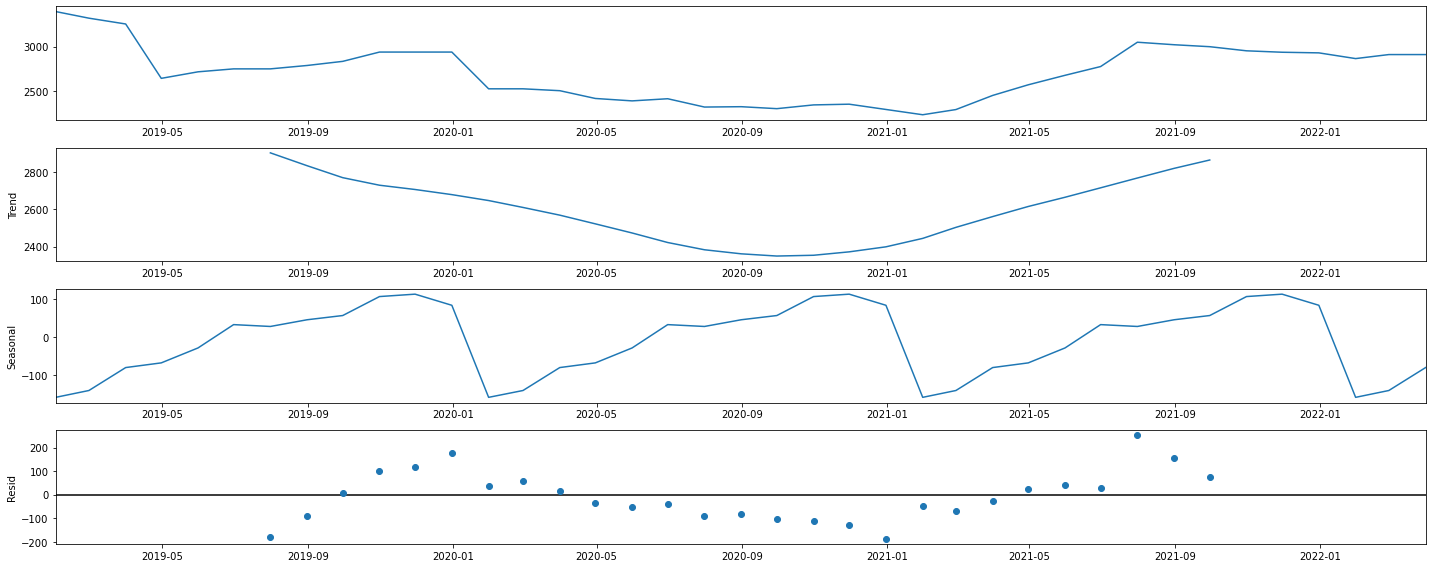

In [1510]:
decomposition = seasonal_decompose(df60,model='additive')
decomposition.plot();

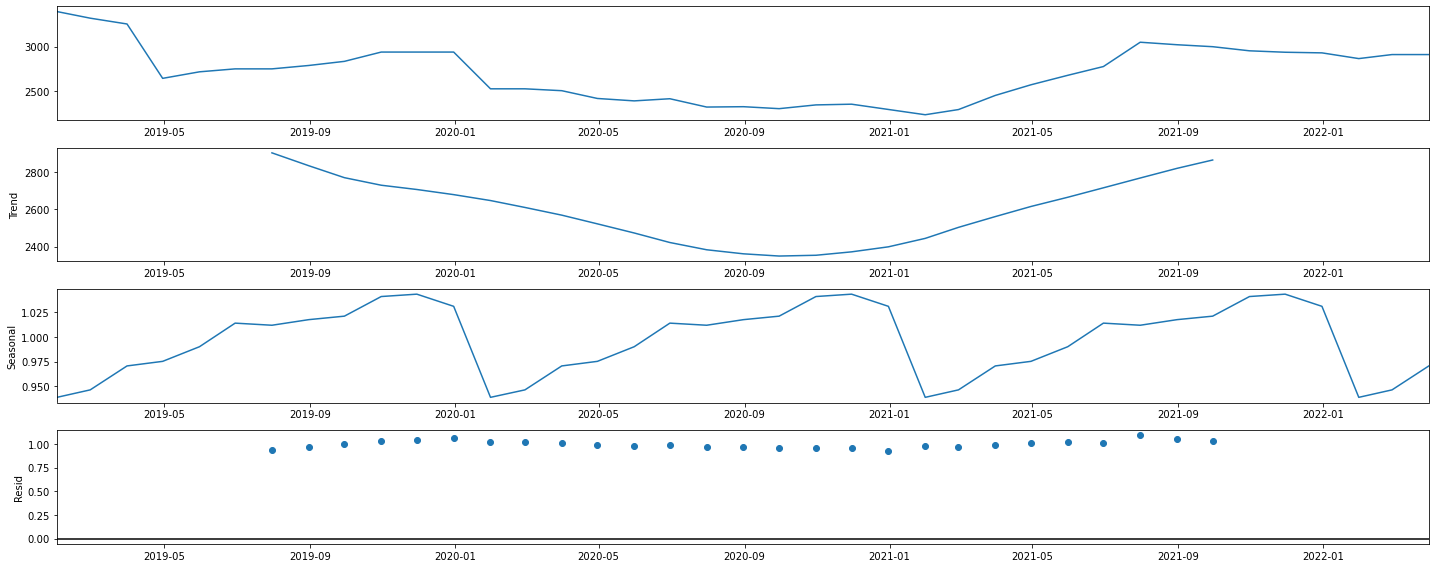

In [1511]:
decomposition = seasonal_decompose(df60,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1512]:
df60test = adfuller(df60,regression='ct')
print('DF test statistic is %3.3f' %df60test[0])
print('DF test p-value is' ,df60test[1])
print('Number of lags used' ,df60test[2])

DF test statistic is -2.114
DF test p-value is 0.538299254238071
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1513]:
df60test = adfuller(df60.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df60test[0])
print('DF test p-value is' ,df60test[1])
print('Number of lags used' ,df60test[2])

DF test statistic is -5.744
DF test p-value is 7.458525754254619e-06
Number of lags used 0


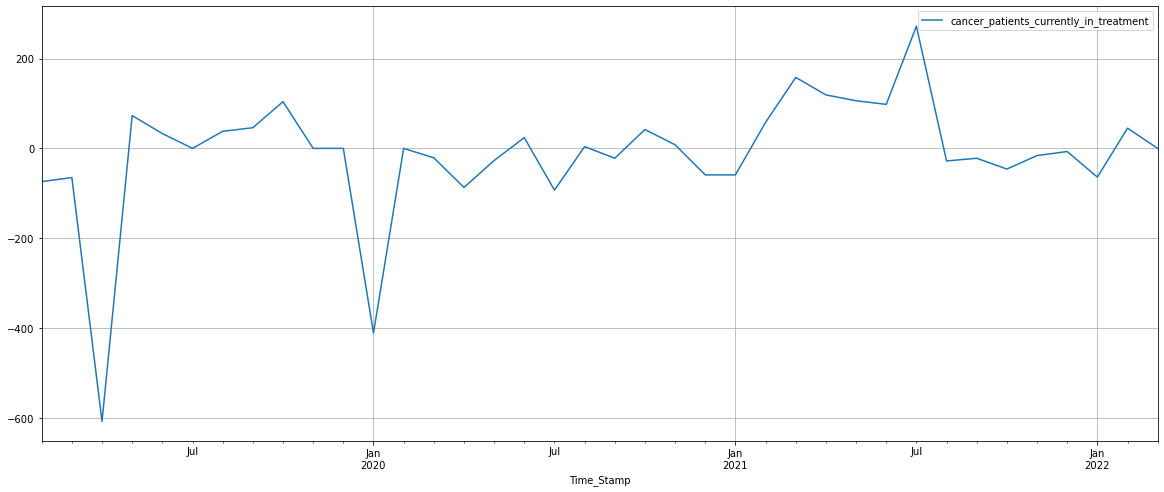

In [1514]:
df60.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1515]:
train_size = int(len(df60) * 0.8)
train=df60[0:train_size] 
test=df60[train_size:]

In [1516]:
train.shape,test.shape

((31, 1), (8, 1))

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

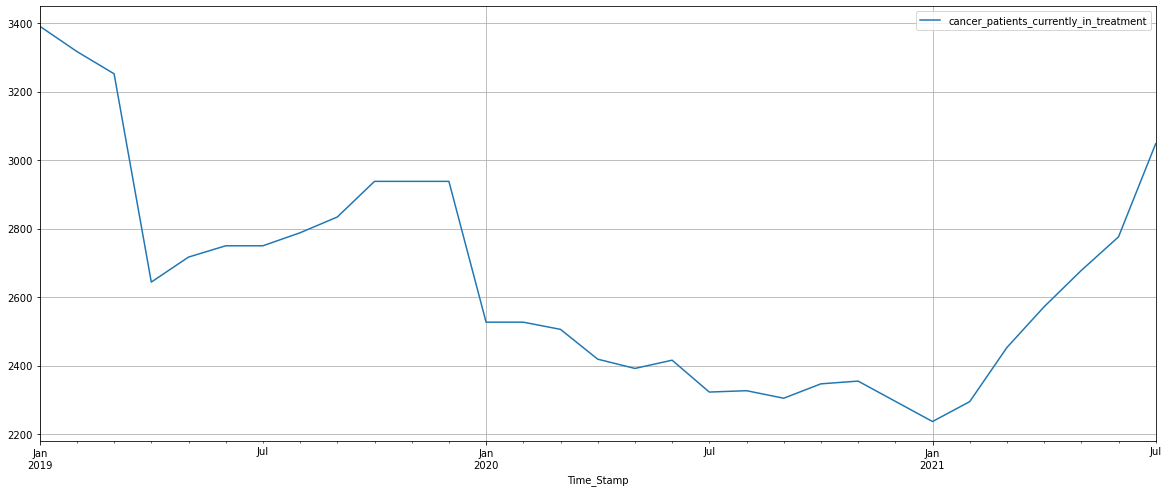

In [1517]:
train.plot(grid=True);

In [1518]:
df60test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df60test[0])
print('DF test p-value is' ,df60test[1])
print('Number of lags used' ,df60test[2])

DF test statistic is 2.337
DF test p-value is 1.0
Number of lags used 8


Observation:

* The training data is non-stationary at 95% confidence level.

In [1519]:
df60test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df60test[0])
print('DF test p-value is' ,df60test[1])
print('Number of lags used' ,df60test[2])

DF test statistic is -5.254
DF test p-value is 6.912815035863599e-05
Number of lags used 0


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df60.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

In [1520]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)


In [1521]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [115]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['cancer_patients_currently_in_treatment'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:378.09730083105455
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:206.39291327383054
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:71.0996041396241
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:229.9669132008539
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:71.53990911822106
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 1, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:218.93279567889056
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:208.34844731341465
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:67.85649539822481
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:84.00294905857533
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:73.52674640432723
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 1, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:76.335046245323

SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:14.0
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:16.0
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:18.0
SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:20.0
SARIMA(0, 1, 3)x(3, 1, 4, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 0, 0, 12) - AIC:16.0
SARIMA(0, 1, 3)x(4, 0, 1, 12) - AIC:18.0
SARIMA(0, 1, 3)x(4, 0, 2, 12) - AIC:20.0
SARIMA(0, 1, 3)x(4, 0, 3, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 0, 4, 12) - AIC:24.0
SARIMA(0, 1, 3)x(4, 1, 0, 12) - AIC:16.0
SARIMA(0, 1, 3)x(4, 1, 1, 12) - AIC:18.0
SARIMA(0, 1, 3)x(4, 1, 2, 12) - AIC:20.0
SARIMA(0, 1, 3)x(4, 1, 3, 12) - AIC:22.0
SARIMA(0, 1, 3)x(4, 1, 4, 12) - AIC:24.0
SARIMA(0, 1, 4)x(0, 0, 0, 12) - AIC:316.6965410389432
SARIMA(0, 1, 4)x(0, 0, 1, 12) - AIC:159.97927883253783
SARIMA(0, 1, 4)x(0, 0, 2, 12) - AIC:27.237724527654095
SARIMA(0, 1, 4)x(0, 0, 3, 12) - AIC:16.0
SARIMA(0, 1, 4)x(0, 0, 4, 12) - AIC:18.0
SARIMA(0, 1, 4)x(0, 1, 0, 12) - AIC:174.49358935961197
SARIMA(0, 1, 4)x(0, 1, 1, 12) - AIC:10.202820246220131
SARIMA(0, 1, 4)x(0, 1, 2, 12)

SARIMA(1, 1, 2)x(1, 1, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:61.275848151904746
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:69.63491579922797
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:4.033523146333739
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:12.0
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:14.0
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:16.0
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 1, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 1, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(

SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:220.99403651534877
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:47.971048364334216
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:12.0
SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:14.0
SARIMA(2, 1, 1)x(0, 1, 4, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:190.3279500887882
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:192.40898085094813
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:44.06934926441632
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 0, 4, 12) - AIC:18.0
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:53.11482803667622
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:54.68044922626668
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:14.0
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(1, 1, 4, 12) - AIC:18.0
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:47.20876792299288
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:44.0044119919536
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:46.004633041439924
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 1)x(2, 0, 4, 12) - AIC:20.0
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:12.0
SARIMA

SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(2, 1, 4)x(4, 1, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 1, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 1, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 1, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 1, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:340.196017195667
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:202.99709891224464
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:68.70159133267293
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:200.09132265974412
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:68.95408332499251
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 1, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:180.90317403807794
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:180.4350537877536
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:58.4092806

SARIMA(3, 1, 3)x(2, 0, 4, 12) - AIC:26.0
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:18.0
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:20.0
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:22.0
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:24.0
SARIMA(3, 1, 3)x(2, 1, 4, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:20.0
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:22.0
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 0, 4, 12) - AIC:28.0
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:20.0
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:22.0
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:26.0
SARIMA(3, 1, 3)x(3, 1, 4, 12) - AIC:28.0
SARIMA(3, 1, 3)x(4, 0, 0, 12) - AIC:22.0
SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:24.0
SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:26.0
SARIMA(3, 1, 3)x(4, 0, 3, 12) - AIC:28.0
SARIMA(3, 1, 3)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 3)x(4, 1, 0, 12) - AIC:22.0
SARIMA(3, 1, 3)x(4, 1, 1, 12) - AIC:24.0
SARIMA(3, 1, 3)x(4, 1, 2, 12) - AIC:26.0
SARIMA(3, 1, 3)x

SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:171.6417440942767
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:44.95382739229881
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(1, 1, 0, 12) - AIC:38.159534012744686
SARIMA(4, 1, 2)x(1, 1, 1, 12) - AIC:28.06076310262893
SARIMA(4, 1, 2)x(1, 1, 2, 12) - AIC:20.0
SARIMA(4, 1, 2)x(1, 1, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 1, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:39.120640894775455
SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:30.36767749447722
SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:22.52461458657952
SARIMA(4, 1, 2)x(2, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 2)x(2, 1, 0, 12) - AIC:18.0
SARIMA(4, 1, 2)x(2, 1, 1, 12) - AIC:20.0
SARIMA(4, 1, 2)x(2, 1, 2, 12) - AIC:22.0
SARIMA(4, 1, 2)x(2, 1, 3, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 1, 4, 12) - AIC:26.0
SARIMA(4, 1, 2)x(3, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 2)x(3, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 2)x(3, 0, 2, 12) - AIC:24.0
SARIM

In [116]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
812  (3, 1, 1)  (1, 0, 2, 12) -13.307768
770  (3, 1, 0)  (2, 0, 0, 12)  -9.967350
412  (1, 1, 3)  (1, 0, 2, 12)  -4.496660
771  (3, 1, 0)  (2, 0, 1, 12)  -4.403892
765  (3, 1, 0)  (1, 1, 0, 12)  -3.479263

In [1541]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['cancer_patients_currently_in_treatment'],
                                order=(3, 1, 1),
                                seasonal_order=(1, 0, 2, 10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                         SARIMAX Results                                          
Dep. Variable:     cancer_patients_currently_in_treatment   No. Observations:                   31
Model:                SARIMAX(3, 1, 1)x(1, 0, [1, 2], 10)   Log Likelihood                 -42.251
Date:                                    Tue, 18 Oct 2022   AIC                            100.502
Time:                                            13:18:43   BIC                            101.138
Sample:                                        01-31-2019   HQIC                            96.216
                                             - 07-31-2021                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5068      1.039      2.412      0

In [1542]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1543]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

cancer_patients_currently_in_treatment          mean     mean_se  \
2021-08-31                               3625.773114   45.469713   
2021-09-30                               4586.686791  126.518176   
2021-10-31                               6040.465012  229.420289   
2021-11-30                               8303.494551  356.891654   
2021-12-31                              12016.472846  549.949008   

cancer_patients_currently_in_treatment  mean_ci_lower  mean_ci_upper  
2021-08-31                                3536.654113    3714.892114  
2021-09-30                                4338.715722    4834.657860  
2021-10-31                                5590.809507    6490.120516  
2021-11-30                                7603.999763    9002.989339  
2021-12-31                               10938.592597   13094.353096

In [1544]:
rmse = mean_squared_error(test['cancer_patients_currently_in_treatment'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['cancer_patients_currently_in_treatment'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18703.36099729381 
MAPE: 442.1002508729055


## Building the most optimum model on the Full Data.

In [1536]:
full_data_model = sm.tsa.statespace.SARIMAX(cancer_patients_currently_in_treatment['cancer_patients_currently_in_treatment'],
                                order=(3, 1, 1),
                                seasonal_order=(1, 0, 2, 10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                         SARIMAX Results                                          
Dep. Variable:     cancer_patients_currently_in_treatment   No. Observations:                   39
Model:                SARIMAX(3, 1, 1)x(1, 0, [1, 2], 10)   Log Likelihood                 -90.623
Date:                                    Tue, 18 Oct 2022   AIC                            197.246
Time:                                            13:17:47   BIC                            203.427
Sample:                                        01-31-2019   HQIC                           197.562
                                             - 03-31-2022                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3380      0.537     -0.630      0

In [1537]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1538]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

cancer_patients_currently_in_treatment         mean     mean_se  \
2022-04-30                              2927.960277   57.225436   
2022-05-31                              2967.913706   98.762068   
2022-06-30                              3012.764480  135.003017   
2022-07-31                              3065.794679  173.957220   
2022-08-31                              3046.027233  208.365996   
2022-09-30                              3029.656243  241.055767   
2022-10-31                              3047.368945  272.043511   
2022-11-30                              3046.361162  300.801486   
2022-12-31                              3067.149835  328.216609   
2023-01-31                              3106.629833  354.039357   
2023-02-28                              3123.785443  390.327991   
2023-03-31                              3180.034849  428.912451   
2023-04-30                              3177.591050  466.869334   
2023-05-31                              3181.328903  506.127986   
2023-06-30                              3180.931035  543.665851   
2023-07-31                              3184.870926  580.634074   
2023-08-31                              3178.250294  616.344975   
2023-09-30                              3144.104942  650.764305   
2023-10-31                              3136.513687  684.100696   
2023-11-30                              3126.726964  716.189024   
2023-12-31                              3117.364961  751.431826   

cancer_patients_currently_in_treatment  mean_ci_lower  mean_ci_upper  
2022-04-30                                2815.800483    3040.120071  
2022-05-31                                2774.343610    3161.483801  
2022-06-30                                2748.163428    3277.365532  
2022-07-31                                2724.844793    3406.744565  
2022-08-31                                2637.637385    3454.417081  
2022-09-30                                2557.195621    3502.116864  
2022-10-31                                2514.173462    3580.564428  
2022-11-30                                2456.801084    3635.921241  
2022-12-31                                2423.857102    3710.442568  
2023-01-31                                2412.725444    3800.534222  
2023-02-28                                2358.756639    3888.814247  
2023-03-31                                2339.381892    4020.687806  
2023-04-30                                2262.543970    4092.638130  
2023-05-31                                2189.336278    4173.321528  
2023-06-30                                2115.365547    4246.496523  
2023-07-31                                2046.849053    4322.892800  
2023-08-31                                1970.236340    4386.264247  
2023-09-30                                1868.630342    4419.579542  
2023-10-31                                1795.700961    4477.326414  
2023-11-30                                1723.022272    4530.431656  
2023-12-31                                1644.585646    4590.144276

In [1539]:
rmse = mean_squared_error(cancer_patients_currently_in_treatment['cancer_patients_currently_in_treatment'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 629.1374760022177


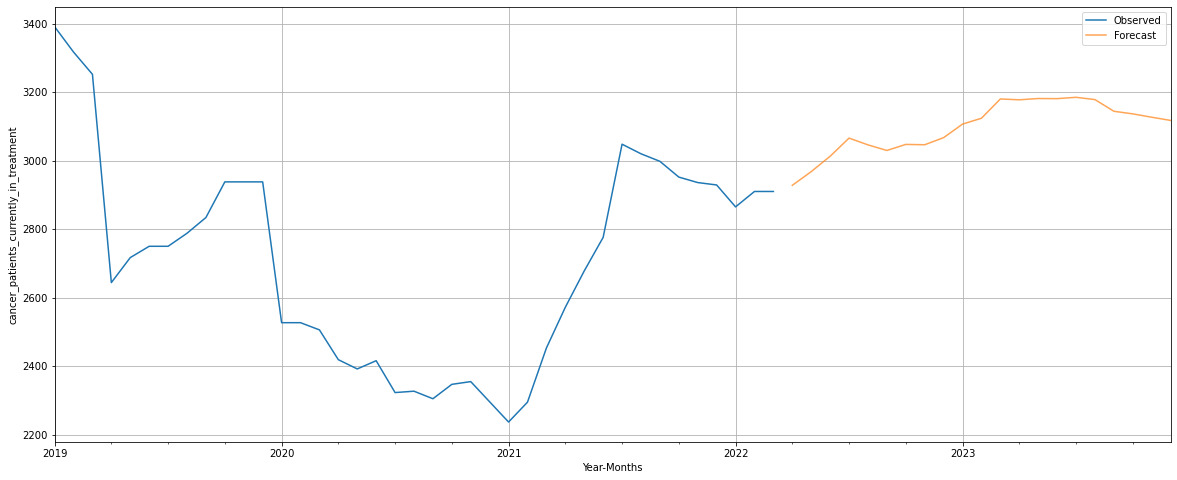

In [1540]:
axis = cancer_patients_currently_in_treatment['cancer_patients_currently_in_treatment'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('cancer_patients_currently_in_treatment')
plt.legend(loc='best')
plt.grid();

# cancer_patients_newly_enrolled_in_treatment

In [937]:
cancer_patients_newly_enrolled_in_treatment=df[['cancer_patients_newly_enrolled_in_treatment']]
cancer_patients_newly_enrolled_in_treatment

cancer_patients_newly_enrolled_in_treatment
Time_Stamp                                             
2019-01-31                                        149.0
2019-02-28                                        136.0
2019-03-31                                        144.0
2019-04-30                                        146.0
2019-05-31                                        168.0
2019-06-30                                        143.0
2019-07-31                                          NaN
2019-08-31                                        144.0
2019-09-30                                        173.0
2019-10-31                                        168.0
2019-11-30                                        145.0
2019-12-31                                        147.0
2020-01-31                                        152.0
2020-02-29                                        128.0
2020-03-31                                        128.0
2020-04-30                                         60.0
2020-05-31                                         97.0
2020-06-30                                        125.0
2020-07-31                                        134.0
2020-08-31                                        130.0
2020-09-30                                        125.0
2020-10-31                                        146.0
2020-11-30                                        128.0
2020-12-31                                         86.0
2021-01-31                                         87.0
2021-02-28                                         88.0
2021-03-31                                        186.0
2021-04-30                                        141.0
2021-05-31                                        138.0
2021-06-30                                        121.0
2021-07-31                                        128.0
2021-08-31                                        123.0
2021-09-30                                        128.0
2021-10-31                                        135.0
2021-11-30                                        162.0
2021-12-31                                        105.0
2022-01-31                                        155.0
2022-02-28                                        122.0
2022-03-31                                        152.0

In [938]:
cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment']=cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment'].fillna(cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment'].median())

In [939]:
df65=cancer_patients_newly_enrolled_in_treatment.copy()

In [940]:
df65.isnull().sum()

cancer_patients_newly_enrolled_in_treatment    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data.

In [941]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

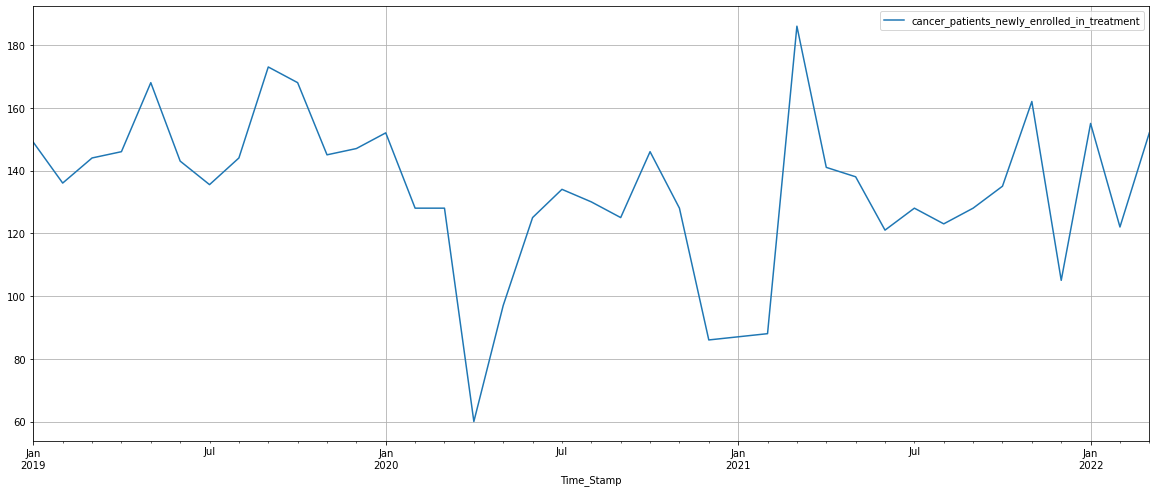

In [942]:
df65.plot(grid=True);

In [943]:
df65.describe()

cancer_patients_newly_enrolled_in_treatment
count                                    39.000000
mean                                    133.551282
std                                      25.477233
min                                      60.000000
25%                                     125.000000
50%                                     135.500000
75%                                     146.500000
max                                     186.000000

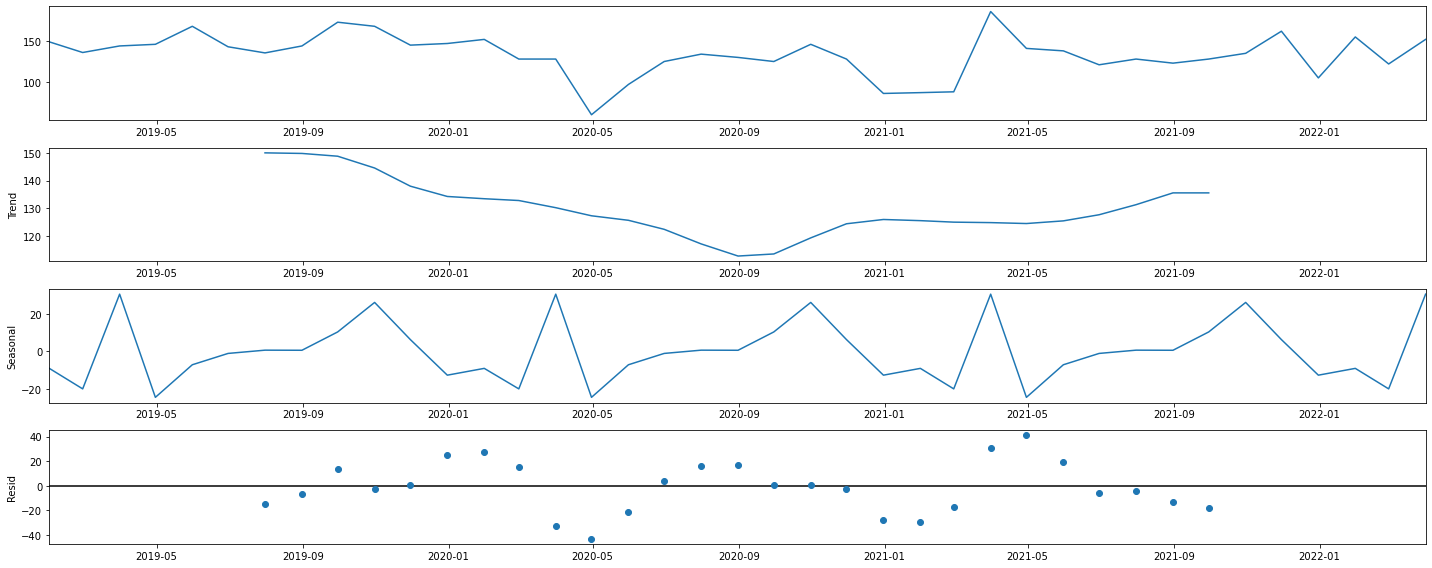

In [944]:
decomposition = seasonal_decompose(df65,model='additive')
decomposition.plot();

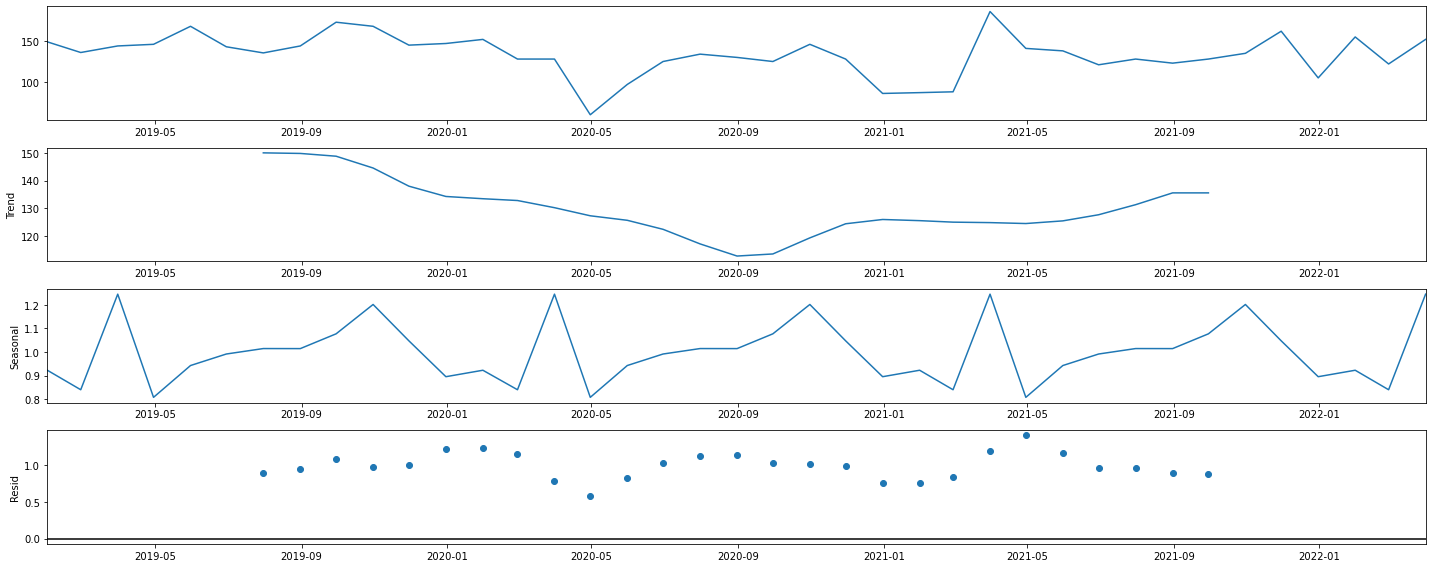

In [945]:
decomposition = seasonal_decompose(df65,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [946]:
df65test = adfuller(df65,regression='ct')
print('DF test statistic is %3.3f' %df65test[0])
print('DF test p-value is' ,df65test[1])
print('Number of lags used' ,df65test[2])

DF test statistic is -4.331
DF test p-value is 0.0028130396161043154
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is stationary.

## Split the data into train and test and plot the training and test data.

In [947]:
train_size = int(len(df65) * 0.8)
train=df65[0:train_size] 
test=df65[train_size:]

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

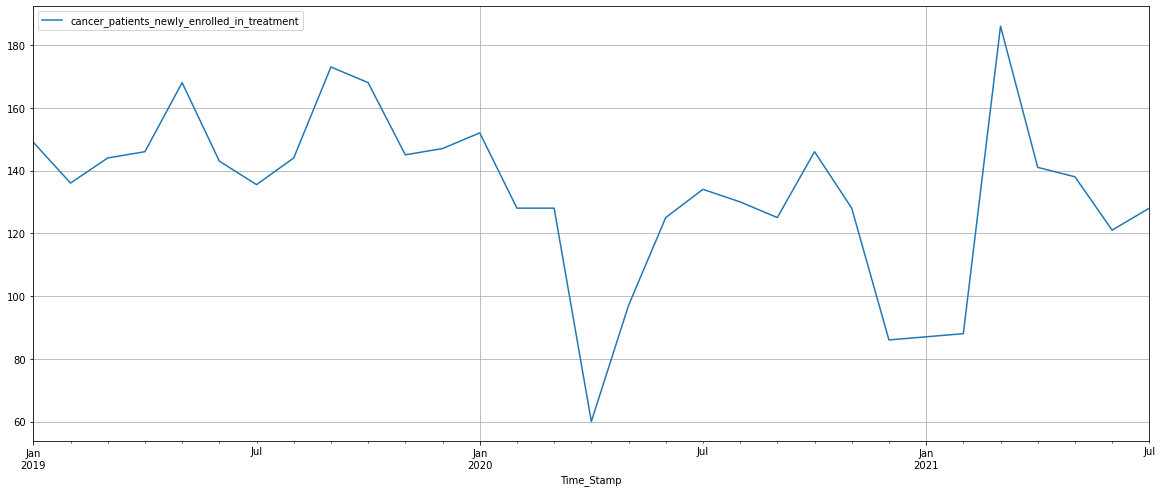

In [948]:
train.plot(grid=True);

In [949]:
df65test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df65test[0])
print('DF test p-value is' ,df65test[1])
print('Number of lags used' ,df65test[2])

DF test statistic is -3.586
DF test p-value is 0.031031694311862586
Number of lags used 0


Observation:

* The training data is stationary at 95% confidence level.

## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df65.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

In [150]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 0, 4)(0, 0, 4, 12)
Model: (1, 0, 0)(0, 1, 0, 12)
Model: (1, 0, 1)(0, 1, 1, 12)
Model: (1, 0, 2)(0, 1, 2, 12)
Model: (1, 0, 3)(0, 1, 3, 12)
Model: (1, 0, 4)(0, 1, 4, 12)
Model: (2, 0, 0)(1, 0, 0, 12)
Model: (2, 0, 1)(1, 0, 1, 12)
Model: (2, 0, 2)(1, 0, 2, 12)
Model: (2, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 4)(1, 0, 4, 12)
Model: (3, 0, 0)(1, 1, 0, 12)
Model: (3, 0, 1)(1, 1, 1, 12)
Model: (3, 0, 2)(1, 1, 2, 12)
Model: (3, 0, 3)(1, 1, 3, 12)
Model: (3, 0, 4)(1, 1, 4, 12)
Model: (4, 0, 0)(2, 0, 0, 12)
Model: (4, 0, 1)(2, 0, 1, 12)
Model: (4, 0, 2)(2, 0, 2, 12)
Model: (4, 0, 3)(2, 0, 3, 12)
Model: (4, 0, 4)(2, 0, 4, 12)


In [151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [152]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['cancer_patients_newly_enrolled_in_treatment'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:381.5785293756182
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:222.72738985686527
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:81.8550122991698
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 0, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:190.66172417991595
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:62.59832325356297
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:6.0
SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:8.0
SARIMA(0, 0, 0)x(0, 1, 4, 12) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:197.3770328050698
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:186.04229401835033
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:70.63418932292288
SARIMA(0, 0, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 0, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:73.90233529131055
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:63.35616286333204
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:8.0
SARIMA(0, 0, 0)x(1, 1, 3, 12) - AIC:10.0
SARIMA(0, 0, 0)x(1, 1, 4, 12) - AIC:12.0
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:73.6907553190899

SARIMA(0, 0, 3)x(3, 0, 4, 12) - AIC:22.0
SARIMA(0, 0, 3)x(3, 1, 0, 12) - AIC:14.0
SARIMA(0, 0, 3)x(3, 1, 1, 12) - AIC:16.0
SARIMA(0, 0, 3)x(3, 1, 2, 12) - AIC:18.0
SARIMA(0, 0, 3)x(3, 1, 3, 12) - AIC:20.0
SARIMA(0, 0, 3)x(3, 1, 4, 12) - AIC:22.0
SARIMA(0, 0, 3)x(4, 0, 0, 12) - AIC:16.0
SARIMA(0, 0, 3)x(4, 0, 1, 12) - AIC:18.0
SARIMA(0, 0, 3)x(4, 0, 2, 12) - AIC:20.0
SARIMA(0, 0, 3)x(4, 0, 3, 12) - AIC:22.0
SARIMA(0, 0, 3)x(4, 0, 4, 12) - AIC:24.0
SARIMA(0, 0, 3)x(4, 1, 0, 12) - AIC:16.0
SARIMA(0, 0, 3)x(4, 1, 1, 12) - AIC:18.0
SARIMA(0, 0, 3)x(4, 1, 2, 12) - AIC:20.0
SARIMA(0, 0, 3)x(4, 1, 3, 12) - AIC:22.0
SARIMA(0, 0, 3)x(4, 1, 4, 12) - AIC:24.0
SARIMA(0, 0, 4)x(0, 0, 0, 12) - AIC:285.66113513254146
SARIMA(0, 0, 4)x(0, 0, 1, 12) - AIC:159.5783660277135
SARIMA(0, 0, 4)x(0, 0, 2, 12) - AIC:36.16721194737667
SARIMA(0, 0, 4)x(0, 0, 3, 12) - AIC:16.0
SARIMA(0, 0, 4)x(0, 0, 4, 12) - AIC:18.0
SARIMA(0, 0, 4)x(0, 1, 0, 12) - AIC:135.79998310682603
SARIMA(0, 0, 4)x(0, 1, 1, 12) - AIC:2.357116

SARIMA(1, 0, 2)x(1, 1, 4, 12) - AIC:18.0
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:66.16152735691617
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:72.10706356442458
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:40.36866383025836
SARIMA(1, 0, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 0, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:12.0
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:14.0
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:16.0
SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:18.0
SARIMA(1, 0, 2)x(2, 1, 4, 12) - AIC:20.0
SARIMA(1, 0, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 0, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 0, 2)x(3, 1, 0, 12) - AIC:14.0
SARIMA(1, 0, 2)x(3, 1, 1, 12) - AIC:16.0
SARIMA(1, 0, 2)x(3, 1, 2, 12) - AIC:18.0
SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:20.0
SARIMA(1, 0, 2)x(3, 1, 4, 12) - AIC:22.0
SARIMA(1, 0, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 0, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 0, 2)x(4

SARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:172.25255984078245
SARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:26.885395841970414
SARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:12.0
SARIMA(2, 0, 1)x(0, 1, 3, 12) - AIC:14.0
SARIMA(2, 0, 1)x(0, 1, 4, 12) - AIC:16.0
SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:172.495302875123
SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:174.6963669504011
SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:32.6302909734863
SARIMA(2, 0, 1)x(1, 0, 3, 12) - AIC:16.0
SARIMA(2, 0, 1)x(1, 0, 4, 12) - AIC:18.0
SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:39.69752857177144
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:40.390055228138614
SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:14.0
SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:16.0
SARIMA(2, 0, 1)x(1, 1, 4, 12) - AIC:18.0
SARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:30.630031322501335
SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:36.792612750672724
SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:34.630005391257015
SARIMA(2, 0, 1)x(2, 0, 3, 12) - AIC:18.0
SARIMA(2, 0, 1)x(2, 0, 4, 12) - AIC:20.0
SARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:12.0
SARIM

SARIMA(2, 0, 4)x(3, 1, 4, 12) - AIC:28.0
SARIMA(2, 0, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 0, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 0, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 0, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 0, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(2, 0, 4)x(4, 1, 0, 12) - AIC:22.0
SARIMA(2, 0, 4)x(4, 1, 1, 12) - AIC:24.0
SARIMA(2, 0, 4)x(4, 1, 2, 12) - AIC:26.0
SARIMA(2, 0, 4)x(4, 1, 3, 12) - AIC:28.0
SARIMA(2, 0, 4)x(4, 1, 4, 12) - AIC:30.0
SARIMA(3, 0, 0)x(0, 0, 0, 12) - AIC:275.0270953249827
SARIMA(3, 0, 0)x(0, 0, 1, 12) - AIC:187.27820273649235
SARIMA(3, 0, 0)x(0, 0, 2, 12) - AIC:73.72156160250631
SARIMA(3, 0, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 0, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 0, 0)x(0, 1, 0, 12) - AIC:163.01937992667655
SARIMA(3, 0, 0)x(0, 1, 1, 12) - AIC:63.67121523594188
SARIMA(3, 0, 0)x(0, 1, 2, 12) - AIC:12.0
SARIMA(3, 0, 0)x(0, 1, 3, 12) - AIC:14.0
SARIMA(3, 0, 0)x(0, 1, 4, 12) - AIC:16.0
SARIMA(3, 0, 0)x(1, 0, 0, 12) - AIC:163.84194952055347
SARIMA(3, 0, 0)x(

SARIMA(3, 0, 3)x(2, 0, 2, 12) - AIC:-15.665637041134424
SARIMA(3, 0, 3)x(2, 0, 3, 12) - AIC:24.0
SARIMA(3, 0, 3)x(2, 0, 4, 12) - AIC:26.0
SARIMA(3, 0, 3)x(2, 1, 0, 12) - AIC:18.0
SARIMA(3, 0, 3)x(2, 1, 1, 12) - AIC:20.0
SARIMA(3, 0, 3)x(2, 1, 2, 12) - AIC:22.0
SARIMA(3, 0, 3)x(2, 1, 3, 12) - AIC:24.0
SARIMA(3, 0, 3)x(2, 1, 4, 12) - AIC:26.0
SARIMA(3, 0, 3)x(3, 0, 0, 12) - AIC:20.0
SARIMA(3, 0, 3)x(3, 0, 1, 12) - AIC:22.0
SARIMA(3, 0, 3)x(3, 0, 2, 12) - AIC:24.0
SARIMA(3, 0, 3)x(3, 0, 3, 12) - AIC:26.0
SARIMA(3, 0, 3)x(3, 0, 4, 12) - AIC:28.0
SARIMA(3, 0, 3)x(3, 1, 0, 12) - AIC:20.0
SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:22.0
SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:24.0
SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:26.0
SARIMA(3, 0, 3)x(3, 1, 4, 12) - AIC:28.0
SARIMA(3, 0, 3)x(4, 0, 0, 12) - AIC:22.0
SARIMA(3, 0, 3)x(4, 0, 1, 12) - AIC:24.0
SARIMA(3, 0, 3)x(4, 0, 2, 12) - AIC:26.0
SARIMA(3, 0, 3)x(4, 0, 3, 12) - AIC:28.0
SARIMA(3, 0, 3)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 0, 3)x(4, 1, 0, 12) - AIC:22.0
S

SARIMA(4, 0, 2)x(0, 1, 3, 12) - AIC:20.0
SARIMA(4, 0, 2)x(0, 1, 4, 12) - AIC:22.0
SARIMA(4, 0, 2)x(1, 0, 0, 12) - AIC:149.0102424856037
SARIMA(4, 0, 2)x(1, 0, 1, 12) - AIC:153.92281002544752
SARIMA(4, 0, 2)x(1, 0, 2, 12) - AIC:-36.95277660229839
SARIMA(4, 0, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 0, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 0, 2)x(1, 1, 0, 12) - AIC:5.822618126988523
SARIMA(4, 0, 2)x(1, 1, 1, 12) - AIC:27.35344715140539
SARIMA(4, 0, 2)x(1, 1, 2, 12) - AIC:20.0
SARIMA(4, 0, 2)x(1, 1, 3, 12) - AIC:22.0
SARIMA(4, 0, 2)x(1, 1, 4, 12) - AIC:24.0
SARIMA(4, 0, 2)x(2, 0, 0, 12) - AIC:-21.56027713592934
SARIMA(4, 0, 2)x(2, 0, 1, 12) - AIC:-14.040178879943063
SARIMA(4, 0, 2)x(2, 0, 2, 12) - AIC:-6.206772383795187
SARIMA(4, 0, 2)x(2, 0, 3, 12) - AIC:24.0
SARIMA(4, 0, 2)x(2, 0, 4, 12) - AIC:26.0
SARIMA(4, 0, 2)x(2, 1, 0, 12) - AIC:18.0
SARIMA(4, 0, 2)x(2, 1, 1, 12) - AIC:20.0
SARIMA(4, 0, 2)x(2, 1, 2, 12) - AIC:22.0
SARIMA(4, 0, 2)x(2, 1, 3, 12) - AIC:24.0
SARIMA(4, 0, 2)x(2, 1, 4, 12)

In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
1112  (4, 0, 2)  (1, 0, 2, 12) -36.952777
766   (3, 0, 0)  (1, 1, 1, 12) -33.886135
970   (3, 0, 4)  (2, 0, 0, 12) -32.079072
1102  (4, 0, 2)  (0, 0, 2, 12) -30.788998
815   (3, 0, 1)  (1, 1, 0, 12) -27.664887

In [996]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['cancer_patients_newly_enrolled_in_treatment'],
                                order=(4, 0, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                            SARIMAX Results                                            
Dep. Variable:     cancer_patients_newly_enrolled_in_treatment   No. Observations:                   31
Model:                          SARIMAX(4, 0, 2)x(1, 0, 2, 12)   Log Likelihood                  28.476
Date:                                         Mon, 17 Oct 2022   AIC                            -36.953
Time:                                                 23:46:17   BIC                            -43.090
Sample:                                             01-31-2019   HQIC                           -50.420
                                                  - 07-31-2021                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

In [997]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [998]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

cancer_patients_newly_enrolled_in_treatment        mean   mean_se  \
2021-08-31                                   150.519426  0.000197   
2021-09-30                                   165.721654  0.000567   
2021-10-31                                   181.312288  0.000881   
2021-11-30                                   150.381597  0.001035   
2021-12-31                                   105.137699  0.001100   

cancer_patients_newly_enrolled_in_treatment  mean_ci_lower  mean_ci_upper  
2021-08-31                                      150.519041     150.519812  
2021-09-30                                      165.720543     165.722764  
2021-10-31                                      181.310561     181.314015  
2021-11-30                                      150.379569     150.383625  
2021-12-31                                      105.135543     105.139855

In [999]:
rmse = mean_squared_error(test['cancer_patients_newly_enrolled_in_treatment'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['cancer_patients_newly_enrolled_in_treatment'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.55258178851435 
MAPE: 20.318820702610804


## Building the most optimum model on the Full Data.

In [1000]:
full_data_model = sm.tsa.statespace.SARIMAX(cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment'],
                                order=(4, 0, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                            SARIMAX Results                                            
Dep. Variable:     cancer_patients_newly_enrolled_in_treatment   No. Observations:                   39
Model:                          SARIMAX(4, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 -47.406
Date:                                         Mon, 17 Oct 2022   AIC                            114.813
Time:                                                 23:46:45   BIC                            119.662
Sample:                                             01-31-2019   HQIC                           113.018
                                                  - 03-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

In [1001]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1002]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

cancer_patients_newly_enrolled_in_treatment        mean    mean_se  \
2022-04-30                                   112.082735   9.316442   
2022-05-31                                   140.864533  14.214894   
2022-06-30                                   132.377912  14.530784   
2022-07-31                                   141.669508  14.809144   
2022-08-31                                   125.608645  16.221594   
2022-09-30                                   135.031084  16.545947   
2022-10-31                                   136.526477  16.652647   
2022-11-30                                   150.099917  16.890270   
2022-12-31                                   121.354702  17.165054   
2023-01-31                                   140.400530  17.197258   
2023-02-28                                   128.446289  17.153183   
2023-03-31                                   148.612111  16.885459   
2023-04-30                                   133.118316  17.795971   
2023-05-31                                   142.461573  18.601592   
2023-06-30                                   132.422118  18.739756   
2023-07-31                                   143.296097  18.789354   
2023-08-31                                   136.673601  19.169702   
2023-09-30                                   142.773552  19.238623   
2023-10-31                                   136.753127  19.297096   
2023-11-30                                   142.289732  19.343963   
2023-12-31                                   139.221706  19.441590   

cancer_patients_newly_enrolled_in_treatment  mean_ci_lower  mean_ci_upper  
2022-04-30                                       93.822844     130.342626  
2022-05-31                                      113.003852     168.725214  
2022-06-30                                      103.898098     160.857725  
2022-07-31                                      112.644120     170.694896  
2022-08-31                                       93.814905     157.402385  
2022-09-30                                      102.601624     167.460543  
2022-10-31                                      103.887890     169.165065  
2022-11-30                                      116.995595     183.204238  
2022-12-31                                       87.711813     154.997590  
2023-01-31                                      106.694524     174.106536  
2023-02-28                                       94.826668     162.065910  
2023-03-31                                      115.517220     181.707002  
2023-04-30                                       98.238855     167.997778  
2023-05-31                                      106.003123     178.920022  
2023-06-30                                       95.692871     169.151365  
2023-07-31                                      106.469641     180.122554  
2023-08-31                                       99.101676     174.245526  
2023-09-30                                      105.066545     180.480560  
2023-10-31                                       98.931514     174.574740  
2023-11-30                                      104.376261     180.203202  
2023-12-31                                      101.116890     177.326522

In [1003]:
rmse = mean_squared_error(cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 36.29115576477613


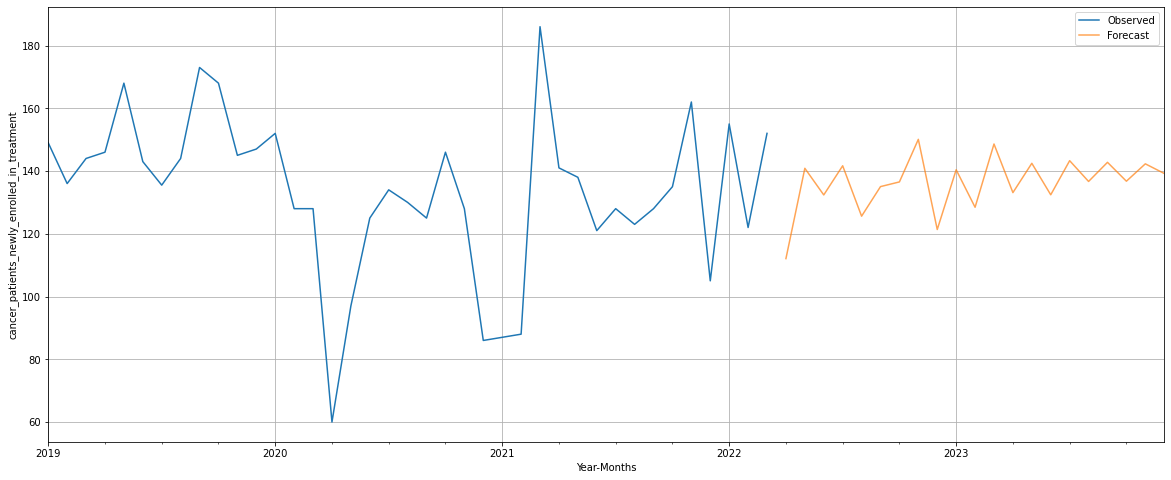

In [1004]:
axis = cancer_patients_newly_enrolled_in_treatment['cancer_patients_newly_enrolled_in_treatment'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('cancer_patients_newly_enrolled_in_treatment')
plt.legend(loc='best')
plt.grid();

# outpatient_visits

In [1005]:
outpatient_visits=df[['outpatient_visits']]
outpatient_visits

outpatient_visits
Time_Stamp                   
2019-01-31             4799.0
2019-02-28             4489.0
2019-03-31             4820.0
2019-04-30             4710.0
2019-05-31             4879.0
2019-06-30             4329.0
2019-07-31             4617.0
2019-08-31             3888.0
2019-09-30             4387.0
2019-10-31             4408.0
2019-11-30             4053.0
2019-12-31             4220.0
2020-01-31           119336.0
2020-02-29           123657.0
2020-03-31           112322.0
2020-04-30           106613.0
2020-05-31           108865.0
2020-06-30           115224.0
2020-07-31           102511.0
2020-08-31           114785.0
2020-09-30           108222.0
2020-10-31           106235.0
2020-11-30           108776.0
2020-12-31           123377.0
2021-01-31           118642.0
2021-02-28           118173.0
2021-03-31           143836.0
2021-04-30           128801.0
2021-05-31           185038.0
2021-06-30           141562.0
2021-07-31           107313.0
2021-08-31           123602.0
2021-09-30           113438.0
2021-10-31           108688.0
2021-11-30           139189.0
2021-12-31           139969.0
2022-01-31           130516.0
2022-02-28           106906.0
2022-03-31           123369.0

In [1006]:
df70=outpatient_visits.copy()

In [1007]:
df70.describe()

outpatient_visits
count          39.000000
mean        85450.358974
std         56561.957972
min          3888.000000
25%          4809.500000
50%        108776.000000
75%        123373.000000
max        185038.000000

## Plot the Time Series to understand the behaviour of the data.

In [1008]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

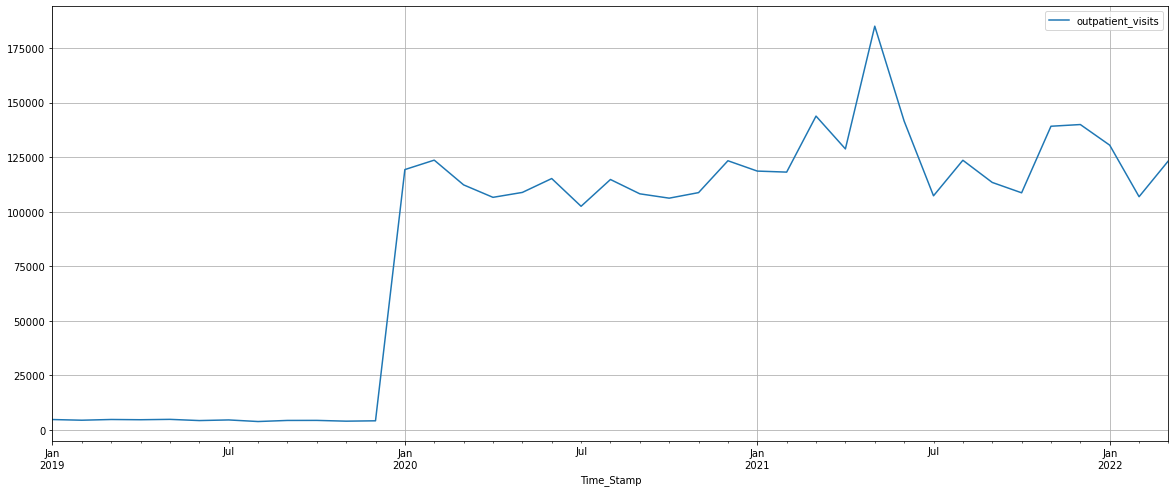

In [1009]:
df70.plot(grid=True);

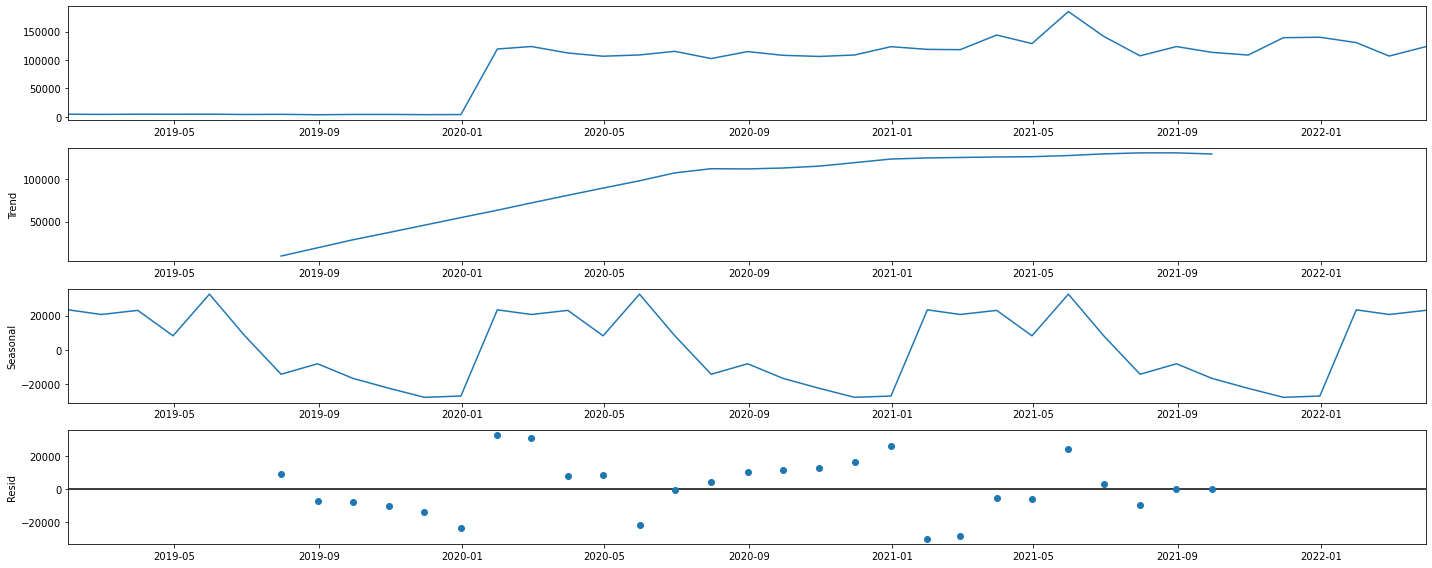

In [1010]:
decomposition = seasonal_decompose(df70,model='additive')
decomposition.plot();

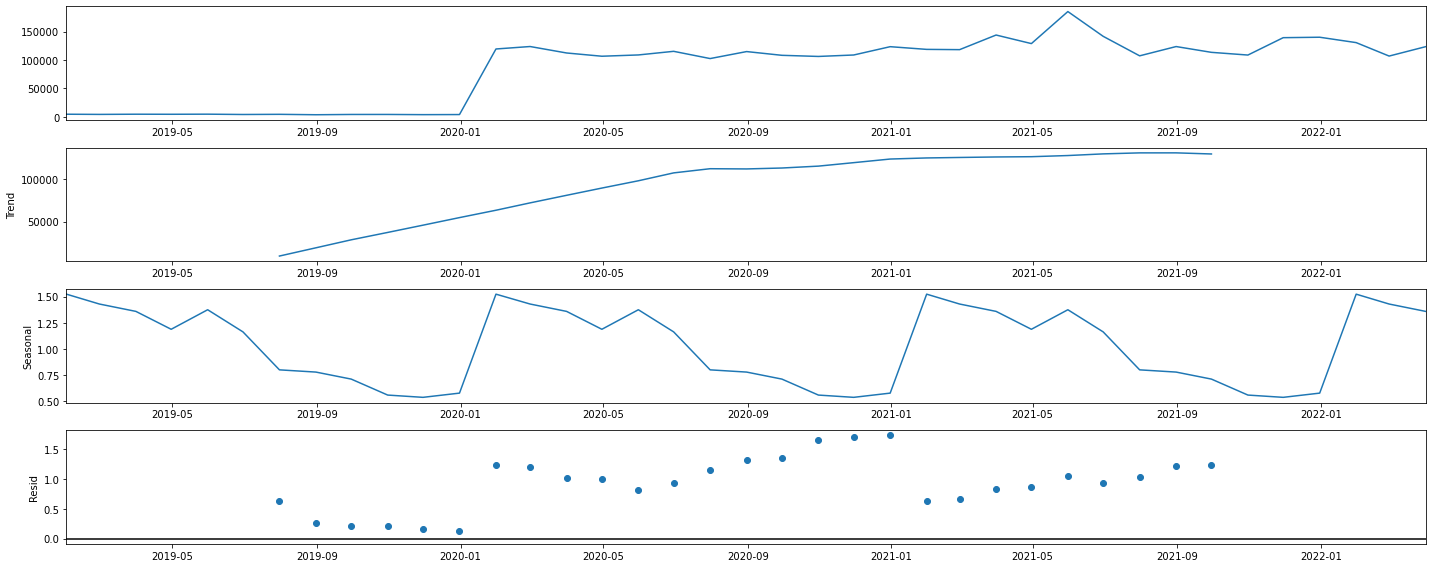

In [1011]:
decomposition = seasonal_decompose(df70,model='multiplicative')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1012]:
df70test = adfuller(df70,regression='ct')
print('DF test statistic is %3.3f' %df70test[0])
print('DF test p-value is' ,df70test[1])
print('Number of lags used' ,df70test[2])

DF test statistic is -2.270
DF test p-value is 0.4507180006263618
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1013]:
df70test = adfuller(df70.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df70test[0])
print('DF test p-value is' ,df70test[1])
print('Number of lags used' ,df70test[2])

DF test statistic is -5.268
DF test p-value is 6.51902461935141e-05
Number of lags used 10


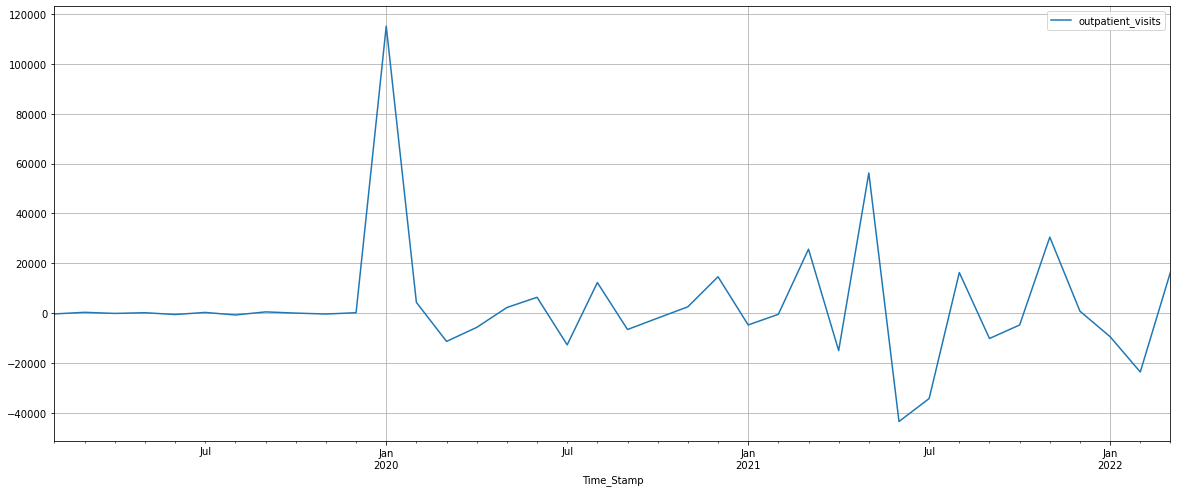

In [1014]:
df70.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1015]:
train_size = int(len(df70) * 0.8)
train=df70[0:train_size] 
test=df70[train_size:]

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

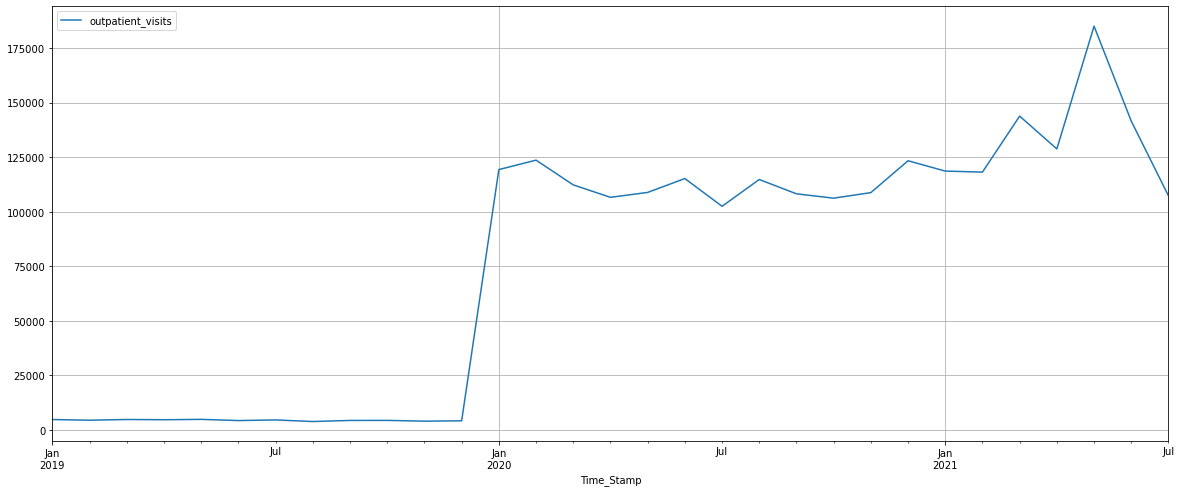

In [1016]:
train.plot(grid=True);

In [1017]:
df70test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df70test[0])
print('DF test p-value is' ,df70test[1])
print('Number of lags used' ,df70test[2])

DF test statistic is -2.369
DF test p-value is 0.39642666334623505
Number of lags used 0


Observation:

* The training data is non-stationary at 95% confidence level. 

In [1018]:
df70test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df70test[0])
print('DF test p-value is' ,df70test[1])
print('Number of lags used' ,df70test[2])

DF test statistic is -5.627
DF test p-value is 1.2836641615418554e-05
Number of lags used 0


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)
### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n','c','t','ct']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df70.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

In [1019]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [1020]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [186]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['outpatient_visits'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:676.2403978100609
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:392.54187666053747
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:124.29674146421753
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:413.322315615802
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:394.54179023781705
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:122.44758010116351
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:142.8304214810941
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:145.17465614667236
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:124.2187132849958
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:10.0
SARIMA(0, 1, 0)x(4, 

SARIMA(1, 1, 2)x(0, 0, 4, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:399.38607414022533
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:355.2946974192107
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:81.5159379814334
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:124.66471268855176
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:129.33631809993523
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:83.77694813050513
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:613.8180909570932
SARIM

SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:105.25786143481893
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:107.20534253076553
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:43.79954937952624
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:637.0718242045139
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:397.52149256874014
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:128.95212819626244
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:351.87226867478364
SA

SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:618.7837922709634
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:358.60031177312993
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:85.46389318836651
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:333.94978185306405
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:335.9497775308827
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:87.46387170749684
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:62.97587104662277
SARIM

In [187]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal   AIC
3    (0, 1, 0)  (0, 0, 3, 12)   8.0
15   (0, 1, 0)  (3, 0, 0, 12)   8.0
40   (0, 1, 1)  (3, 0, 0, 12)  10.0
140  (1, 1, 0)  (3, 0, 0, 12)  10.0
28   (0, 1, 1)  (0, 0, 3, 12)  10.0

In [1029]:
### import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['outpatient_visits'],
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())


                                 SARIMAX Results                                  
Dep. Variable:          outpatient_visits   No. Observations:                   31
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                 -70.696
Date:                    Mon, 17 Oct 2022   AIC                            145.392
Time:                            23:55:50   BIC                            144.976
Sample:                        01-31-2019   HQIC                           143.725
                             - 07-31-2021                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.2391      0.277      0.864      0.387      -0.303       0.781
sigma2      1.888e+09    1.4e-11   1.35e+20      0.000    1.89e+09    1.89e+09
Ljung-Box (L1) (Q): 

In [1030]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1031]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

outpatient_visits           mean       mean_se  mean_ci_lower  mean_ci_upper
2021-08-31         141078.150460  43456.058309   55905.841265  226250.459655
2021-09-30         132798.145667  43456.058309   47625.836472  217970.454862
2021-10-31         130329.838547  43456.058309   45157.529352  215502.147742
2021-11-30         133583.539193  43456.058309   48411.229998  218755.848388
2021-12-31         151626.135167  43456.058309   66453.825972  236798.444362

In [1032]:
rmse = mean_squared_error(test['outpatient_visits'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['outpatient_visits'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16401.81439912371 
MAPE: 12.309937959561697


## Building the most optimum model on the Full Data.

In [1033]:
full_data_model = sm.tsa.statespace.SARIMAX(outpatient_visits['outpatient_visits'],
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                 SARIMAX Results                                  
Dep. Variable:          outpatient_visits   No. Observations:                   39
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -165.344
Date:                    Mon, 17 Oct 2022   AIC                            334.688
Time:                            23:56:04   BIC                            335.966
Sample:                        01-31-2019   HQIC                           334.570
                             - 03-31-2022                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.1820      0.322      0.565      0.572      -0.449       0.813
sigma2      2.423e+09   1.91e-11   1.27e+20      0.000    2.42e+09    2.42e+09
Ljung-Box (L1) (Q): 

In [1034]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1035]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

outpatient_visits           mean       mean_se  mean_ci_lower  mean_ci_upper
2022-04-30         129492.777407  49224.701558   33014.135203  225971.419610
2022-05-31         195485.089375  49224.701558   99006.447171  291963.731578
2022-06-30         142708.908103  49224.701558   46230.265900  239187.550307
2022-07-31         104973.348619  49224.701558    8494.706416  201451.990822
2022-08-31         121558.016909  49224.701558   25079.374706  218036.659113
2022-09-30         110975.592618  49224.701558   14496.950415  207454.234822
2022-10-31         105789.439861  49224.701558    9310.797657  202268.082064
2022-11-30         141280.097446  49224.701558   44801.455243  237758.739650
2022-12-31         139068.291065  49224.701558   42589.648862  235546.933269
2023-01-31         133389.383943  49224.701190   36910.742462  229868.025425
2023-02-28         105750.437781  49224.700846    9271.796974  202229.078588
2023-03-31         119243.709671  49224.700846   22765.068864  215722.350478
2023-04-30         129492.777407  76211.482102  -19878.982721  278864.537534
2023-05-31         195485.089375  76211.482102   46113.329247  344856.849502
2023-06-30         142708.908103  76211.482102   -6662.852024  292080.668231
2023-07-31         104973.348619  76211.482102  -44398.411509  254345.108747
2023-08-31         121558.016909  76211.482102  -27813.743218  270929.777037
2023-09-30         110975.592618  76211.482102  -38396.167509  260347.352746
2023-10-31         105789.439861  76211.482102  -43582.320267  255161.199988
2023-11-30         141280.097446  76211.482102   -8091.662681  290651.857574
2023-12-31         139068.291065  76211.482102  -10303.469062  288440.051193

In [1036]:
rmse = mean_squared_error(outpatient_visits['outpatient_visits'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 61036.30060407473


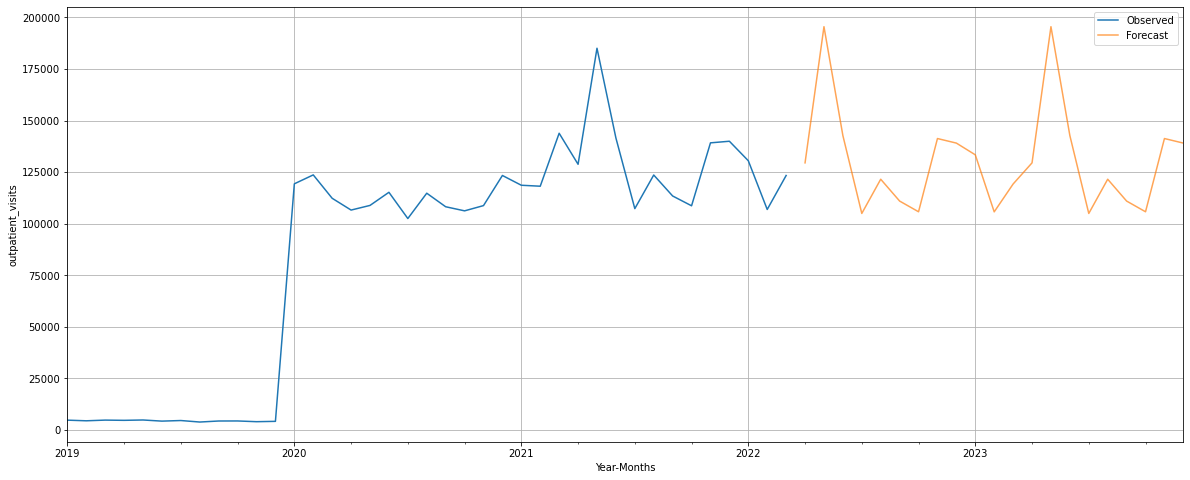

In [1037]:
axis = outpatient_visits['outpatient_visits'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('outpatient_visits')
plt.legend(loc='best')
plt.grid();

# inpatient_admissions

In [1039]:
inpatient_admissions=df[['inpatient_admissions']]
inpatient_admissions

inpatient_admissions
Time_Stamp                      
2019-01-31                1776.0
2019-02-28                1726.0
2019-03-31                1919.0
2019-04-30                1847.0
2019-05-31                2083.0
2019-06-30                1679.0
2019-07-31                2332.0
2019-08-31                2468.0
2019-09-30                2332.0
2019-10-31                2358.0
2019-11-30                2169.0
2019-12-31                2231.0
2020-01-31                4771.0
2020-02-29                4786.0
2020-03-31                5150.0
2020-04-30                4444.0
2020-05-31                4933.0
2020-06-30                4835.0
2020-07-31                4695.0
2020-08-31                4726.0
2020-09-30                4425.0
2020-10-31                4284.0
2020-11-30                4038.0
2020-12-31                4586.0
2021-01-31                4268.0
2021-02-28                4240.0
2021-03-31                5192.0
2021-04-30                5090.0
2021-05-31                5262.0
2021-06-30                5116.0
2021-07-31                4934.0
2021-08-31                5079.0
2021-09-30                4759.0
2021-10-31                4746.0
2021-11-30                4624.0
2021-12-31                4975.0
2022-01-31                5039.0
2022-02-28                4766.0
2022-03-31                5356.0

In [1040]:
df80=inpatient_admissions.copy()

In [1041]:
df80.describe()

inpatient_admissions
count             39.000000
mean            3949.717949
std             1304.270434
min             1679.000000
25%             2345.000000
50%             4624.000000
75%             4933.500000
max             5356.000000

## Plot the Time Series to understand the behaviour of the data.

In [1042]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

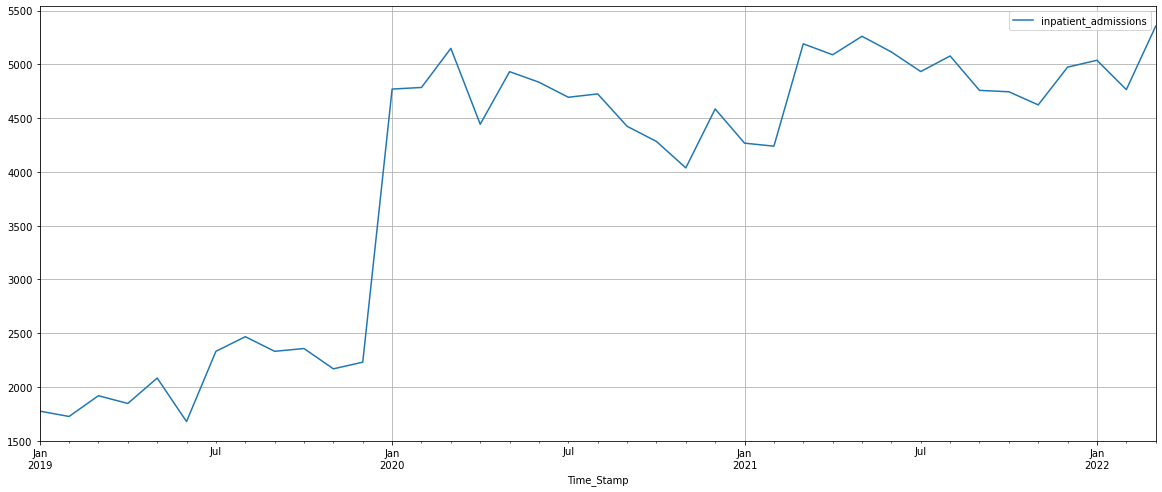

In [1043]:
df80.plot(grid=True);

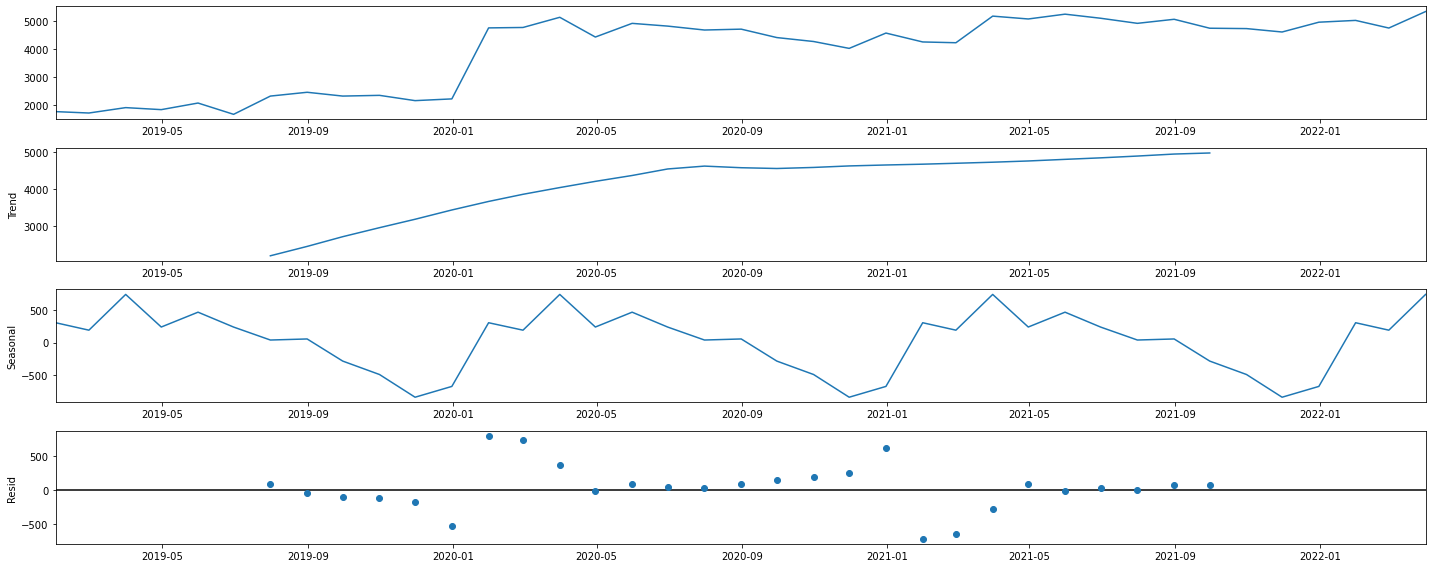

In [1044]:
decomposition = seasonal_decompose(df80,model='additive')
decomposition.plot();

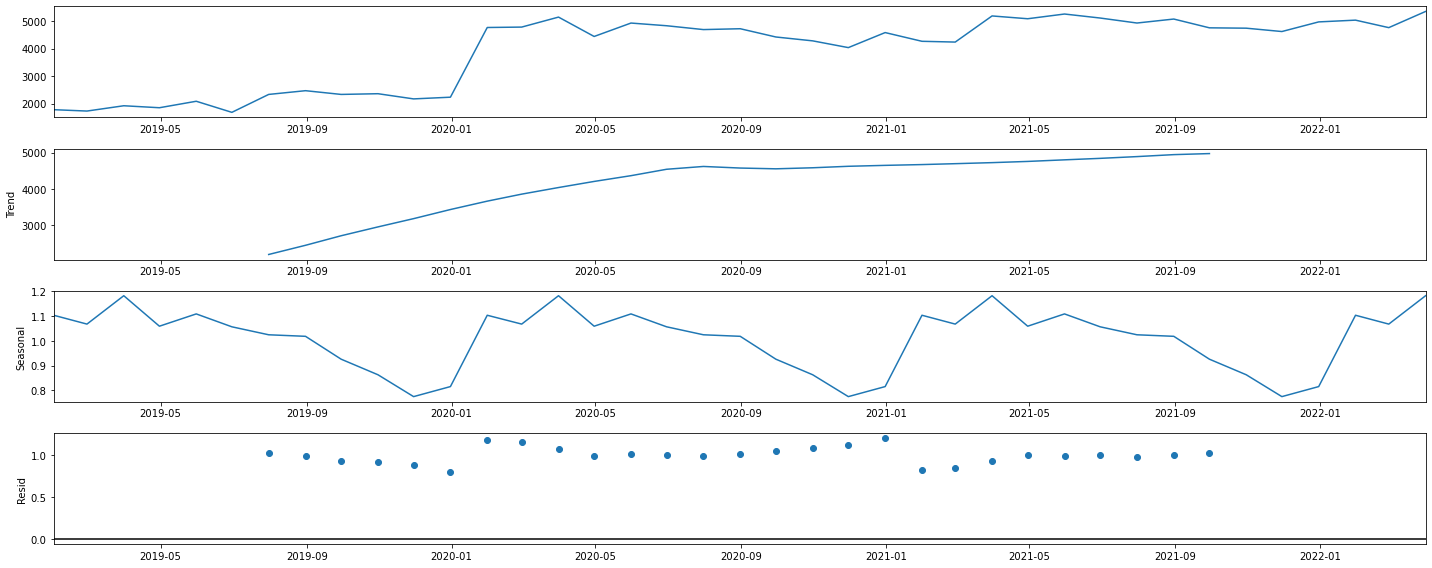

In [1045]:
decomposition = seasonal_decompose(df80,model='multiplictive')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [1046]:
df80test = adfuller(df80,regression='ct')
print('DF test statistic is %3.3f' %df80test[0])
print('DF test p-value is' ,df80test[1])
print('Number of lags used' ,df80test[2])

DF test statistic is -2.227
DF test p-value is 0.47445484988710723
Number of lags used 0


Observation:

* We see that at 95% confidence level the Time Series is non-stationary.

In [1047]:
df80test = adfuller(df80.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df80test[0])
print('DF test p-value is' ,df80test[1])
print('Number of lags used' ,df80test[2])

DF test statistic is -6.949
DF test p-value is 1.8400955633062283e-08
Number of lags used 0


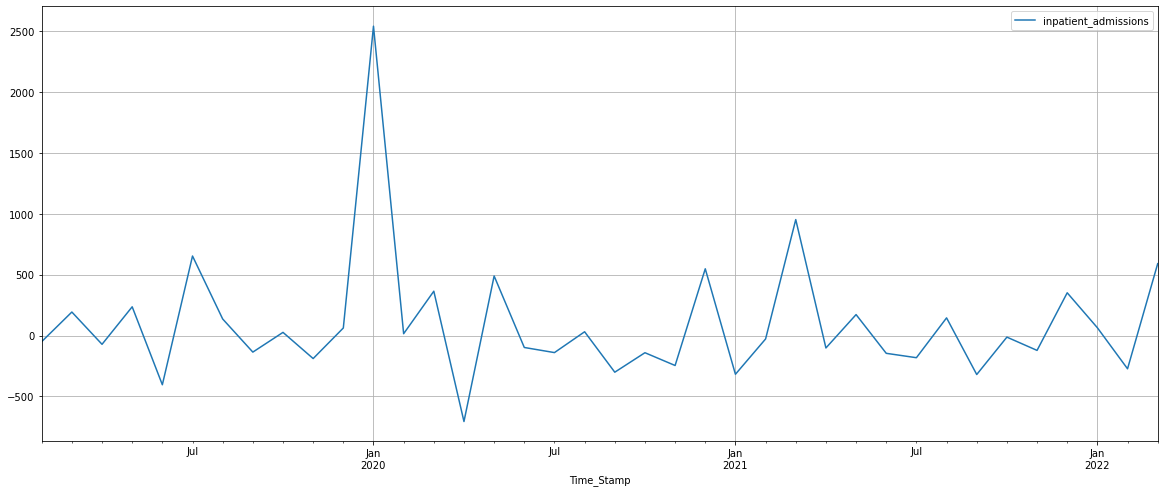

In [1048]:
df80.diff().dropna().plot(grid=True);

## Split the data into train and test and plot the training and test data.

In [1049]:
train_size = int(len(df80) * 0.8)
train=df80[0:train_size] 
test=df80[train_size:]

## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

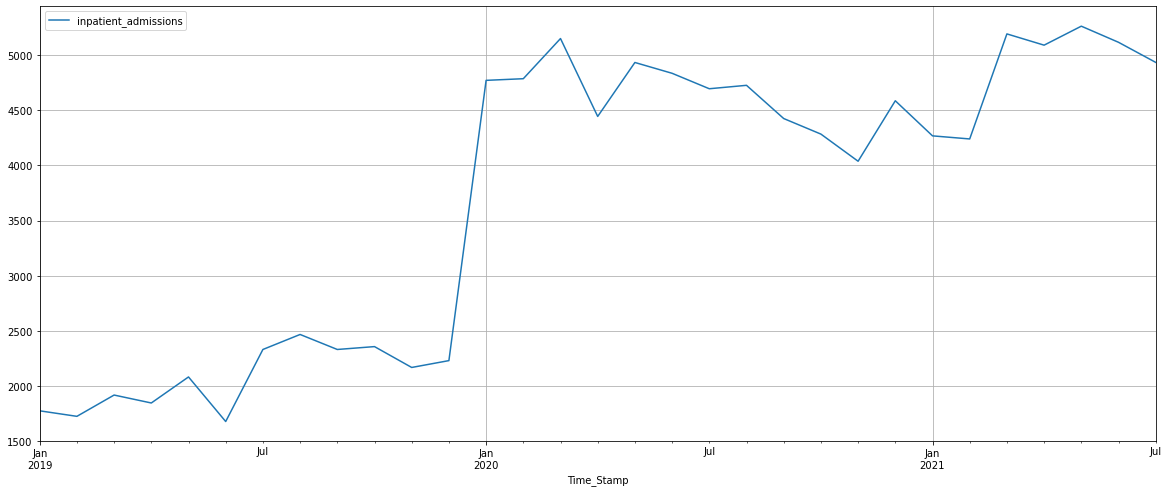

In [1050]:
train.plot(grid=True);

In [1051]:
df80test = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %df80test[0])
print('DF test p-value is' ,df80test[1])
print('Number of lags used' ,df80test[2])

DF test statistic is -2.161
DF test p-value is 0.5120735072235876
Number of lags used 0


Observation:

* The training data is non-stationary at 95% confidence level. 

In [1052]:
df80test = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %df80test[0])
print('DF test p-value is' ,df80test[1])
print('Number of lags used' ,df80test[2])

DF test statistic is -6.054
DF test p-value is 1.6910473128580453e-06
Number of lags used 0


## SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)

### Let's find the best seasonal frequency

In [ ]:
%%time

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1]
	d_params = [0, 1]
	q_params = [0, 1]
	t_params = ['n']
	P_params = [0, 1]
	D_params = [0, 1]
	Q_params = [0, 1]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df80.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0,4,6,8,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

In [1054]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [1055]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [215]:
%%time

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['inpatient_admissions'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:453.1615164226044
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:252.7280633750459
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:80.51477728095337
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:268.040694089177
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:253.98075842500512
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:81.20176916826696
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:10.0
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:92.7574077996816
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:94.75740780615287
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:83.20176904721865
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:12.0
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:8.0
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:10.0
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:12.0
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:16.0
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:10.0
SARIMA(0, 1, 0)x(4, 0, 1,

SARIMA(1, 1, 2)x(0, 0, 4, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:256.2069830281005
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:226.72717336708413
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:-1.4472055953513951
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:74.77936749808097
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:76.4969015786999
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:34.832009006402366
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:14.0
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:16.0
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:16.0
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:18.0
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:20.0
SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:416.3534909320713
SARI

SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:-12.986695695193106
SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:49.598026760952976
SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:32.66356382302763
SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:24.0
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:20.0
SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:22.0
SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:24.0
SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:26.0
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:22.0
SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:24.0
SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:26.0
SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:28.0
SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:30.0
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:428.96471303934607
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:255.17251854213836
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:85.10274141618157
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:14.0
SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:16.0
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:225.1560800143828
SA

SARIMA(4, 1, 1)x(2, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:18.0
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:20.0
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:22.0
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:24.0
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:20.0
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:22.0
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:24.0
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:28.0
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:419.4294353421173
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:230.29472473026635
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:62.12080066809166
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:20.0
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:213.27896717689154
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:213.48340077202656
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:64.1219230216693
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:24.0
SARIMA(4, 1, 2)x(2

In [216]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
261  (2, 1, 0)  (2, 0, 1, 12) -21.560998
262  (2, 1, 0)  (2, 0, 2, 12) -20.486838
311  (2, 1, 2)  (2, 0, 1, 12) -20.268522
386  (3, 1, 0)  (2, 0, 1, 12) -14.154670
336  (2, 1, 3)  (2, 0, 1, 12) -14.070611

In [1064]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['inpatient_admissions'],
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 inpatient_admissions   No. Observations:                   31
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -123.990
Date:                              Tue, 18 Oct 2022   AIC                            253.981
Time:                                      00:14:57   BIC                            256.480
Sample:                                  01-31-2019   HQIC                           254.229
                                       - 07-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1129      0.261     -0.433      0.665      -0.624       0.399
ma.S.L12       0.99

In [1065]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [1066]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

inpatient_admissions         mean     mean_se  mean_ci_lower  mean_ci_upper
2021-08-31            4949.800008  325.042364    4312.728682    5586.871334
2021-09-30            4824.862254  459.679319    3923.907344    5725.817163
2021-10-31            4768.493125  562.989888    3665.053221    5871.933030
2021-11-30            4664.513038  650.084727    3390.370386    5938.655690
2021-12-31            4887.512694  726.816820    3462.977902    6312.047485

In [1093]:
rmse = mean_squared_error(test['inpatient_admissions'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['inpatient_admissions'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 110.05663344376309 
MAPE: 1.8077010360176473


In [1094]:
test.mean(),np.sqrt(test.var())

(inpatient_admissions    4918.0
 dtype: float64,
 inpatient_admissions    239.06365
 dtype: float64)

## Building the most optimum model on the Full Data.

In [1088]:
full_data_model = sm.tsa.statespace.SARIMAX(inpatient_admissions['inpatient_admissions'],
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 inpatient_admissions   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -177.898
Date:                              Tue, 18 Oct 2022   AIC                            361.795
Time:                                      00:20:03   BIC                            365.452
Sample:                                  01-31-2019   HQIC                           362.809
                                       - 03-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0951      0.158     -0.603      0.547      -0.404       0.214
ma.S.L12       0.99

In [1089]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=21)

In [1090]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(30)

inpatient_admissions         mean      mean_se  mean_ci_lower  mean_ci_upper
2022-04-30            5496.519167   264.092534    4978.907313    6014.131021
2022-05-31            5454.798642   373.483243    4722.784938    6186.812347
2022-06-30            5404.334652   457.421686    4507.804622    6300.864682
2022-07-31            5328.409181   528.185067    4293.185472    6363.632889
2022-08-31            5401.290011   590.528857    4243.874719    6558.705303
2022-09-30            5303.213196   646.891952    4035.328269    6571.098124
2022-10-31            5334.903111   698.723167    3965.430869    6704.375353
2022-11-30            5336.508868   746.966485    3872.481459    6800.536277
2022-12-31            5384.264968   792.277601    3831.429405    6937.100530
2023-01-31            5472.181312   835.134717    3835.347344    7109.015279
2023-02-28            5307.274751   873.469074    3595.306824    7019.242677
2023-03-31            5360.875058   910.190337    3576.934778    7144.815338
2023-04-30            5347.510353  1007.945845    3371.972798    7323.047908
2023-05-31            5351.478370  1097.024705    3201.349458    7501.607283
2023-06-30            5356.277974  1179.394583    3044.707069    7667.848880
2023-07-31            5363.499207  1256.375723    2901.048038    7825.950376
2023-08-31            5356.567549  1328.904939    2751.961730    7961.173367
2023-09-30            5365.895584  1397.675468    2626.502005    8105.289162
2023-10-31            5362.881572  1463.217376    2495.028214    8230.734931
2023-11-30            5362.728850  1525.946744    2371.928188    8353.529511
2023-12-31            5358.186792  1586.197290    2249.297230    8467.076353

In [1091]:
rmse = mean_squared_error(inpatient_admissions['inpatient_admissions'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 580.2231624070965


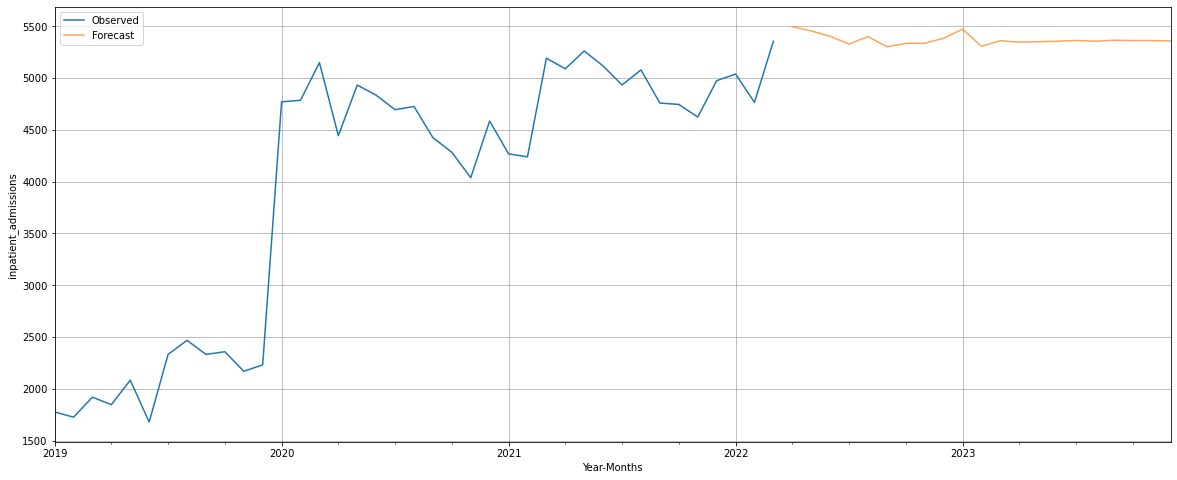

In [1092]:
axis = inpatient_admissions['inpatient_admissions'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('inpatient_admissions')
plt.legend(loc='best')
plt.grid();